# One Genre To Rule Them All... Globally

We're going to analyze the worldwide box office returns of movies based on their genre.

This is the second step in our analysis. The first step was only considering the domestic market and can be found in the `Domestic.ipynb` notebook. 

To recap our findings there:
- Horror is the safest genre to invest in. Its production budget is much lower than spectacle genres, and it has a higher chance of profitability on a per movie basis.
- Action and Adventure are the riskiest genres. They're more expensive, and more often than not, they do not break even.
  
It's time now to see what the addition of the worldwide market does to our study!

# The Worldwide Market

It's difficult to pin down exact totals for the domestic versus worldwide box office, but it's clear with each passing year, more and more of a movie's gross comes from abroad.

[Statista](https://www.statista.com/) has 2018 totals being &#0036;11.9 billion for the [domestic market](https://www.statista.com/statistics/243180/leading-box-office-markets-worldwide-by-revenue/) and &#0036;29.2 billion for the [international market](https://www.statista.com/statistics/271856/global-box-office-revenue/).

That puts the total box office ratio at 29% domestic and 71% international.

We will use the same approach as our domestic analysis:
- Decide which genres to consider in our analysis.
 
- Decide on a profitability measure.

- Whittle our dataset down to movies released by the Big Five. This is to control for factors like lack of budget or marketing affecting a movie's success. Sure, independent movies can succeed, but our bosses want to see how the genres performed with all the help of a studio behind them.

- Analyze the historical performance of the genres by decade. There might be some trends over time that would be useful to know.

- Analyze the historical performance of the genres by release week. Maybe certain genres perform better at certain times of year.

- Incorporate our findings into a strategy for our bosses!

# Deciding on Genres

According to [The Numbers](https://www.the-numbers.com/market/), the top six genres in terms of box office gross are:
- Adventure
- Action
- Drama
- Comedy
- Thriller/Suspense
- Horror

Our bosses like making money.

Sold.

# Is This Movie Profitable? 

The question: How can we determine a movie's profitability?

The problem: Hollywood isn't exactly known for its transparency. 

Exhibit A is [Harry Potter And The Order Of The Phoenix](https://www.techdirt.com/articles/20100708/02510310122.shtml). It made 938 million dollars at the box office and yet somehow lost the studio 167 million dollars.

Exhibit B is [My Big Fat Greek Wedding](https://www.cbsnews.com/news/big-fat-greek-wedding-lawsuit/). The movie had a budget of 6 million dollars. It earned over 600 million dollars from worldwide box office receipts, home video sales, rentals, and television broadcast rights. The movie still somehow lost 20 million dollars.

Exhibit C is [Return Of The Jedi](https://www.slashfilm.com/lucasfilm-tells-darth-vader-that-return-of-the-jedi-hasnt-made-a-profit/). It made 572 million on a 32 million budget, and still isn't profitable.

I could go on and on, but let's just leave it at that.

Even if we put Hollywood's accounting shenanigans aside for a moment, its very difficult to know how much money the studio even keeps from the reported worldwide box office figure.

From our analysis in the `Domestic.ipynb` notebook, we know that studios generally keep about 50% of domestic box office ticket sales. (Although even this is an estimate, and the amount varies by movie theater chain, distribution company, how long the movie has been out, etc.)

But what about worldwide? There's no simple way to sum up all the many differences in each country. 

We must go with an estimate for the purposes of our analysis.

[A good rule of thumb](https://io9.gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305) is that a movie breaks even when it earns twice its production budget worldwide.

We can use this rule of thumb, but we still need an equation we can use to analyze profitability.

## Profitability Equations

If we assume the studio keeps about 50% of all worldwide box office money, then the amount of money a studio earns is **Worldwide Box Office / 2**.

If we include marketing costs into the movie's expenses, then we can say the total cost of a movie is **1.5 * Production Budget**. (This is assuming each movie spends an additional 50% of its production budget as a marketing budget. Marking budgets vary wildly, so this is again a simplification.)

### Breakeven Point

The breakeven point is where total earnings equal total expenses: **(Worldwide Box Office / 2) = (1.5 * Production Budget)**

Or, to simplify: **Worldwide Box Office = 3 * Production Budget**

At the point where the worldwide box office has earned three times the original production budget (or two times its production budget when adjusted for marketing costs), we shall say the movie has broken even.

This explains why we have created a column called `worldwide_breakeven` that performs this calculation to classify our movies. 

### Profits Equation

We derive our profits equation from the breakeven equation, as profits are what remain after subtracting expenses from earnings.

**Profit = (Worldwide Box Office / 2) - (1.5 * Production Budget)**

If the result is 0, the movie broke even.
<br>
If the result is positive, the movie made money.
<br>
If the result is negative, the movie lost money.

This explains why we have created a column called `profit` that performs this calculation to determine the amount of profit/loss each movie made.

# Curate our dataset

In this section of the notebook, we:
- 5.1 Import the code libraries we need for our analysis.
- 5.2 Import our dataset and clean it up a bit.
- 5.3 Filter our dataset to contain only the movies produced by the Big 5 Studios.
- 5.4 Remove all movies produced before 1970 to simplify our analysis. We do this because we do not have many movies from before 1970, and we don't want to draw conclusions based on very limited data.
- 5.5 Summarize what our dataset looks like after these changes.

## Import libraries and settings

We import a few libaries and set some global Jupyter notebook settings.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# For creating colormaps
import matplotlib.cm as cm

plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

pd.options.display.max_rows = 400
pd.options.display.max_columns = 50

## Import data

We import the data and create a few columns we will use in our analysis.

Columns we are adding:
<br>
`release_decade` - We calculate the decade a movie was released using its release year.
<br><br>
`worldwide_breakeven` - This is a boolean column (i.e. either True or False) based on whether the movie broke even according to our Profitability Equation.
<br><br>
`profit` - This is a numerical column that calculates the amount of profit a movie earned. We take the amount of worldwide box office dollars it earned, then subtract away three times its production budget. Any money left over is profit.
<br><br>
`action`, `adventure`, `comedy`, `drama`, `horror`, `thriller_suspense` - These columns are boolean columns (i.e. either True or False) that convey whether the movie in question is of the corresponding genre. For example, if a movie has the genre Comedy Drama, it will have a True value in both the `comedy` and `drama` column. This is very useful for separating our dataset by genre for graphing purposes. 

In [120]:
# Read in our dataset
data = pd.read_csv('cleaned_movie_data.csv', parse_dates=['release_date'], usecols=['title', 'distributor_mojo', 'worldwide_adj', 'budget_adj', 'genres_mojo', 'release_year', 'release_week', 'release_date'])

# Only look at movies that made money
data = data[data['worldwide_adj'].notna() & data['worldwide_adj'] > 0]

# Only look at movies with budget information
data = data[data['budget_adj'].notna()]

# For decade analysis
data['release_decade'] = data['release_year'].apply(lambda x: x // 10 * 10)

# For breakeven analysis
data['worldwide_breakeven'] = data['worldwide_adj'] >= 3 * data['budget_adj']

# For profit analysis
data['profit'] = (data['worldwide_adj'] / 2) - (1.5 * data['budget_adj'])

# For ratio analysis of worldwide box office to production budget
data['gross_budget_ratio'] = data['worldwide_adj'] / data['budget_adj']

# Create columns for genres
# A movie can have multiple genres. If so, we will count them for all the genres its classified with.
data['action'] = data['genres_mojo'].str.contains('Action', na=False)
data['adventure'] = data['genres_mojo'].str.contains('Adventure', na=False) 
data['comedy'] = data['genres_mojo'].str.contains('Comedy', na=False)
data['drama'] = data['genres_mojo'].str.contains('Drama', na=False)
data['horror'] = data['genres_mojo'].str.contains('Horror', na=False)
data['thriller_suspense'] = data['genres_mojo'].str.contains('Thriller|Suspense', na=False, regex=True)

# Remove rows that don't contain one of our genres
data = data[data['action'] | data['adventure'] | data['comedy'] | data['drama'] | data['horror'] | data['thriller_suspense']]

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 20 to 19775
Data columns (total 18 columns):
title                  3749 non-null object
release_year           3749 non-null int64
distributor_mojo       3749 non-null object
genres_mojo            3749 non-null object
release_date           3749 non-null datetime64[ns]
worldwide_adj          3749 non-null float64
budget_adj             3749 non-null float64
release_week           3749 non-null int64
release_decade         3749 non-null int64
worldwide_breakeven    3749 non-null bool
profit                 3749 non-null float64
gross_budget_ratio     3749 non-null float64
action                 3749 non-null bool
adventure              3749 non-null bool
comedy                 3749 non-null bool
drama                  3749 non-null bool
horror                 3749 non-null bool
thriller_suspense      3749 non-null bool
dtypes: bool(7), datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 377.1+ KB


## Organize By Distributors

The [Big Five](https://en.wikipedia.org/wiki/Major_film_studio#Past) studios we will use in our analysis are:
- Universal
- Paramount
- Warner Bros.
- Disney
- Sony

Studios have come and gone a lot historically. They get bought out by competitors, or go out of business. A lot of messy stuff.

To simplify, we will categorize a movie by its current studio owner. So for example, Disney [recently purchased](https://theweek.com/speedreads/780191/disney-buys-21st-century-fox-713-billion) 20th Century Fox. So we will categorize a 20th Century Fox movie as Disney.

In [4]:
print('Here are all the distributors currently in our dataset:')
data[data['distributor_mojo'].notna()]['distributor_mojo'].value_counts()

Here are all the distributors currently in our dataset:


Universal                           355
Warner Bros.                        346
Fox                                 301
Sony / Columbia                     266
Paramount                           264
Buena Vista                         217
New Line                            122
Miramax                             114
Fox Searchlight                     106
Lionsgate                           104
MGM                                  89
Sony Classics                        81
Sony / Screen Gems                   69
Focus Features                       64
Weinstein Company                    49
Warner Bros. (New Line)              49
IFC                                  46
DreamWorks                           42
Columbia                             41
Lions Gate                           41
United Artists                       41
Magnolia                             41
Roadside Attractions                 35
TriStar                              34
Sony (Revolution)                    30


In [5]:
# Create a regex string to combine movies into their respective distributor
# https://en.wikipedia.org/wiki/Major_film_studio#Past
nbcuniversal = 'Universal|Focus Features|Focus World|Gramercy|Working Title|Big Idea|DreamWorks$|Illumination|Carnival|Mac Guff|United International'

print('Here are all the distributors that fall under the Universal umbrella:\n')
print(data[data['distributor_mojo'].str.contains(nbcuniversal, na=False, regex=True)]['distributor_mojo'].value_counts())
print('Sum:', data[data['distributor_mojo'].str.contains(nbcuniversal, na=False, regex=True)]['distributor_mojo'].value_counts().sum())

Here are all the distributors that fall under the Universal umbrella:

Universal         355
Focus Features     64
DreamWorks         42
Gramercy           13
Focus World         3
Name: distributor_mojo, dtype: int64
Sum: 477


In [6]:
viacom = 'Paramount|BET|Comedy Central|MTV|Nickelodeon|Bardel Entertainment|MTV Animation|Nickelodeon Animation Studio|Awesomeness|CMT|Melange|United International Pictures|VH1|Viacom 18 Motion Pictures'

print('Here are all the distributors that fall under the Paramount umbrella:\n')
print(data[data['distributor_mojo'].str.contains(viacom, na=False, regex=True)]['distributor_mojo'].value_counts())
print('Sum:', data[data['distributor_mojo'].str.contains(viacom, na=False, regex=True)]['distributor_mojo'].value_counts().sum())

Here are all the distributors that fall under the Paramount umbrella:

Paramount                 264
Paramount (DreamWorks)     18
Paramount Vantage          14
Paramount Classics         10
Paramount Insurge           2
Name: distributor_mojo, dtype: int64
Sum: 308


In [7]:
warnermedia = 'Warner Bros.|CNN Films|HBO|DC Films|New Line|Cartoon Network Studios|Wang Film Productions|Adult Swim Films|Castle Rock Entertainment|Cinemax|Flagship|Fullscreen|Hello Sunshine|Spyglass'

print('Here are all the distributors that fall under the Warner Bros. umbrella:\n')
print(data[data['distributor_mojo'].str.contains(warnermedia, na=False, regex=True)]['distributor_mojo'].value_counts())
print('Sum:', data[data['distributor_mojo'].str.contains(warnermedia, na=False, regex=True)]['distributor_mojo'].value_counts().sum())

Here are all the distributors that fall under the Warner Bros. umbrella:

Warner Bros.               346
New Line                   122
Warner Bros. (New Line)     49
Name: distributor_mojo, dtype: int64
Sum: 517


In [8]:
disney = 'Walt Disney|^Fox$|Fox Atomic|A&E|Disneynature|ESPN|Fox Searchlight|Hulu|National Geographic|VICE|Fox Family|Lucasfilm|Marvel|The Muppets Studio|UTV Motion Pictures|20th Century Fox Animation|Blue Sky Studios|Lucasfilm Animation|Marvel Animation|Pixar Animation Studios|Buena Vista|Disney|Dragonfly Film Productions|Fox Star Studios|Fox Studios Australia|Kudos Film|New Regency|Patagonik Film Group|Shine Group|Tiger Aspect Productions|Zero Day Fox'

print('Here are all the distributors that fall under the Disney umbrella:\n')
print(data[data['distributor_mojo'].str.contains(disney, na=False, regex=True)]['distributor_mojo'].value_counts())
print('Sum:', data[data['distributor_mojo'].str.contains(disney, na=False, regex=True)]['distributor_mojo'].value_counts().sum())

Here are all the distributors that fall under the Disney umbrella:

Fox                301
Buena Vista        217
Fox Searchlight    106
Fox Atomic           3
Disney               1
Name: distributor_mojo, dtype: int64
Sum: 628


In [9]:
sony = 'Sony|Columbia|Affirm|Screen Gems|Stage 6|Ghost Corps|Funimation|Madhouse|Manga Entertainment UK|TriStar|Destination Films|Left Bank Pictures|Triumph Films'

print('Here are all the distributors that fall under the Sony umbrella:\n')
print(data[data['distributor_mojo'].str.contains(sony, na=False, regex=True)]['distributor_mojo'].value_counts())
print('Sum:', data[data['distributor_mojo'].str.contains(sony, na=False, regex=True)]['distributor_mojo'].value_counts().sum())

Here are all the distributors that fall under the Sony umbrella:

Sony / Columbia        266
Sony Classics           81
Sony / Screen Gems      69
Columbia                41
TriStar                 34
Sony (Revolution)       30
Sony / AFFIRM Films      2
Name: distributor_mojo, dtype: int64
Sum: 523


In [122]:
data['universal'] = data['distributor_mojo'].str.contains(nbcuniversal, na=False, regex=True)
data['paramount'] = data['distributor_mojo'].str.contains(viacom, na=False, regex=True)
data['warner'] = data['distributor_mojo'].str.contains(warnermedia, na=False, regex=True)
data['disney'] = data['distributor_mojo'].str.contains(disney, na=False, regex=True)
data['sony'] = data['distributor_mojo'].str.contains(sony, na=False, regex=True)
data['distributor'] = np.nan

In [123]:
data.loc[data['universal'], 'distributor'] = 'Universal'
data.loc[data['paramount'], 'distributor'] = 'Paramount'
data.loc[data['warner'], 'distributor'] = 'Warner'
data.loc[data['disney'], 'distributor'] = 'Disney'
data.loc[data['sony'], 'distributor'] = 'Sony'

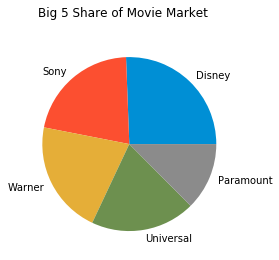

In [124]:
# We only want to keep rows that have one of the Big Five
data = data[data['distributor'].notna()]

figure, axis = plt.subplots()
figure.suptitle('Big 5 Share of Movie Market')

data['distributor'].value_counts().plot(kind='pie')
axis.set_ylabel('');

## Check Movies By Decade

We have very few movies from before the 1970s. We will remove these entries to simplify our analysis.

In [125]:
data['release_decade'].value_counts()

2000    1047
2010     740
1990     501
1980     114
1970      31
1960       9
1950       8
1930       2
1940       1
Name: release_decade, dtype: int64

In [126]:
data = data[data['release_decade'] >= 1970]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 20 to 19775
Data columns (total 24 columns):
title                  2433 non-null object
release_year           2433 non-null int64
distributor_mojo       2433 non-null object
genres_mojo            2433 non-null object
release_date           2433 non-null datetime64[ns]
worldwide_adj          2433 non-null float64
budget_adj             2433 non-null float64
release_week           2433 non-null int64
release_decade         2433 non-null int64
worldwide_breakeven    2433 non-null bool
profit                 2433 non-null float64
gross_budget_ratio     2433 non-null float64
action                 2433 non-null bool
adventure              2433 non-null bool
comedy                 2433 non-null bool
drama                  2433 non-null bool
horror                 2433 non-null bool
thriller_suspense      2433 non-null bool
universal              2433 non-null bool
paramount              2433 non-null bool
warner              

## Summary

Our filtered dataset now has 2,433 entries. 

The movie studios all have a fair chunk of the dataset. This will hopefully prevent bias stemming from lack of equitable market share.

We have no missing values, so we can do all monetary calculations safely. 

# Create Functions To Help With Graphing 

In this section of the notebook, we:
  - Create the function **autolabel** that adds numbers to our bar graphs showing what the value of each bar height is. We use this for graphs where it might otherwise be difficult to tell what the values are.
  - Create the function **generate_color_list** that calculates a list of colors depending on the order of the genres for a particular chart. Because we want each genre to be associated with a specific color, this step allows us to show charts with the genres in different orders other than alphabetical and still be easily interpretable.

In [15]:
# Tailored from matplotlib documentation
# https://matplotlib.org/examples/api/barchart_demo.html

# Function to add counts/percentages to bar plots
def autolabel(axis, num_decimals=0, counts=None):
    """
    Attach a text label above each bar displaying its height.
    If sent a list of counts, display those instead.
    """
    for i, val in enumerate(axis.patches):
        if counts is not None:
            height = counts[i]
        else:
            height = round(val.get_height(), num_decimals) if num_decimals > 0 else int(round(val.get_height(), 0))
        
        # We don't want to display zeros on our bar plots
        if (height == 0) or pd.isnull(height):
            continue
            
        # Put the count below a negative value bar
        if height < 0:
            axis.text(val.get_x() + val.get_width()/2, val.get_height()*0.95, '{}'.format(height), ha='center', va='bottom', fontsize=20)
        else:
            axis.text(val.get_x() + val.get_width()/2, val.get_height()*1.05, '{}'.format(height), ha='center', va='bottom', fontsize=20)

In [16]:
# Create custom function to generate the color list when graphing
def generate_color_list(colors_needed=1, order_list=['action', 'adventure', 'comedy', 'drama', 'horror', 'thriller_suspense']):
    colors_available = ['color1', 'color2', 'color3']
    c_list = []
    
    # Matplotlib needs a list of colors if the graph doesn't have multiple columns per index
    if colors_needed == 1:
        c_list = [genres_dict[genre][colors_available[0]] for genre in order_list]
        return c_list
    
    # Matplotlib needs a list of tuples if the graph has multiple columns per index
    for i in range(colors_needed):
        temp_tuple = tuple([genres_dict[genre][colors_available[i]] for genre in order_list])
        c_list.append(temp_tuple)
        
    return c_list

# Create Summary DataFrame

In this section of the notebook, we:
  - Create a list containing the genres and lists containing the colors associated with them.
  - Create a dictionary to store individual colors and a colormap to each genre. This is useful if we need to plot multiple values per genre. For example, if we want to plot a mean and median value for each genre, we need two distinct colors per genre. Rather than set these up manually each time, a dictionary will let us access these values easily.   
  - Create a summary dataframe containing useful stats for our genres. This dataframe will allow graphing some simple charts.

In [17]:
# Create lists of useful information for graphing
genres = ['action', 'adventure', 'comedy', 'drama', 'horror', 'thriller_suspense']
colors = ['#008FD5', '#FC4F30', '#E5AE38', '#6D904F', '#8B8B8B', '#810F7C']
colors2 = ['#87C7E5', '#F4BAB0', '#F4DBA8', '#C7E2AE', '#D6D1D1', '#CE8EDB']
colors3 = ['#C5E7F7', '#F4D7D2', '#F9ECD1', '#E3F2D5', '#EAE8E8', '#ECC8F4']

# Create a dictionary holding the colors for each genre
genres_dict = {
    'action': {'color1': '#008FD5', 'color2': '#87C7E5', 'color3': '#C5E7F7', 'colormap': 'Blues'},
    'adventure': {'color1': '#FC4F30', 'color2': '#F4BAB0', 'color3': '#F4D7D2', 'colormap': 'Oranges'},
    'comedy': {'color1': '#E5AE38', 'color2': '#F4DBA8', 'color3': '#F9ECD1', 'colormap': 'Reds'},
    'drama': {'color1': '#6D904F', 'color2': '#C7E2AE', 'color3': '#E3F2D5', 'colormap': 'Greens'},
    'horror': {'color1': '#8B8B8B', 'color2': '#D6D1D1', 'color3': '#EAE8E8', 'colormap': 'Greys'},
    'thriller_suspense': {'color1': '#810F7C', 'color2':  '#CE8EDB', 'color3': '#ECC8F4', 'colormap': 'Purples'}
    }

# Create a summary statistics dataframe separated by genre to make graphing easier
# The columns are:
# Number of movies
# Average gross
# All-time gross
# Average budget
# All-time budget
# Dollar earned for dollar spent (including marketing -- adjusted budget is 1.5 times original budget)
# Median dollars earned for dollars spent
# Mean dollars earned for dollars spent
# Median profit
# Mean profit
# All-time profit
# Breakeven percentage
# Current decade (2010s) median profit
# Current decade (2010s) mean profit
# Current decade (2010s) all profit
# Current decade (2010s) breakeven percentage

aggregation_stats_per_genre = {
    'num_movies': [data[genre].sum() for genre in genres],
    'avg_gross': [round(data[data[genre]]['worldwide_adj'].mean() / 1000000, 1) for genre in genres],
    'median_gross': [round(data[data[genre]]['worldwide_adj'].median() / 1000000, 1) for genre in genres], 
    'all_time_gross': [round(data[data[genre]]['worldwide_adj'].sum() / 1000000000, 1) for genre in genres],
    'avg_budget': [round(data[data[genre]]['budget_adj'].mean() / 1000000, 1) for genre in genres],
    'median_budget': [round(data[data[genre]]['budget_adj'].median() / 1000000, 1) for genre in genres],
    'all_time_budget': [round(data[data[genre]]['budget_adj'].sum() / 1000000000, 1) for genre in genres],
    'dollars_earned_for_dollars_spent': [round((data[data[genre]]['worldwide_adj'].sum() / 2000000) / (1.5 * data[data[genre]]['budget_adj'].sum() / 1000000), 1) for genre in genres],
    'median_dollars_earned_for_dollars_spent': [round((data[data[genre]]['worldwide_adj'].median() / 2000000) / (1.5 * data[data[genre]]['budget_adj'].median() / 1000000), 1) for genre in genres],
    'mean_dollars_earned_for_dollars_spent': [round((data[data[genre]]['worldwide_adj'].mean() / 2000000) / (1.5 * data[data[genre]]['budget_adj'].mean() / 1000000), 1) for genre in genres],
    'median_profit': [round((data[data[genre]]['profit'].median() / 1000000), 1) for genre in genres],
    'mean_profit': [round((data[data[genre]]['profit'].mean() / 1000000), 1) for genre in genres],
    'all_time_profit': [round(data[data[genre]]['profit'].sum() / 1000000000, 1) for genre in genres],
    'breakeven_percentage': [round(data[data[genre]]['worldwide_breakeven'].sum() / data[data[genre]]['worldwide_breakeven'].count() * 100, 1) for genre in genres],
    'current_decade_median_profit': [round((data[(data[genre]) & (data['release_year'] >=2010)]['profit'].median() / 1000000), 1) for genre in genres],
    'current_decade_mean_profit': [round((data[(data[genre]) & (data['release_year'] >=2010)]['profit'].mean() / 1000000), 1) for genre in genres],
    'current_decade_profit': [round(data[(data[genre]) & (data['release_year'] >=2010)]['profit'].sum() / 1000000000, 1) for genre in genres],
    'current_decade_breakeven_percentage': [round(data[(data[genre]) & (data['release_year'] >=2010)]['worldwide_breakeven'].mean() * 100, 1) for genre in genres]
}

In [18]:
# Create a summary dataframe for simple graphs
summary = pd.DataFrame(aggregation_stats_per_genre, index=genres)
summary

num_movies  avg_gross  median_gross  all_time_gross  \
action                    479      315.6         208.5           151.2   
adventure                 250      392.9         258.3            98.2   
comedy                    955      131.1          77.6           125.2   
drama                     654      104.8          57.2            68.5   
horror                    252      174.3          95.9            43.9   
thriller_suspense         347      147.9          93.2            51.3   

                   avg_budget  median_budget  all_time_budget  \
action                  102.5           90.3             49.1   
adventure               124.1          120.4             31.0   
comedy                   45.6           35.8             43.6   
drama                    40.8           30.7             26.7   
horror                   44.4           31.5             11.2   
thriller_suspense        57.0           53.0             19.8   

                   dollars_earned_for_dollars_spent  \
action                                          1.0   
adventure                                       1.1   
comedy                                          1.0   
drama                                           0.9   
horror                                          1.3   
thriller_suspense                               0.9   

                   median_dollars_earned_for_dollars_spent  \
action                                                 0.8   
adventure                                              0.7   
comedy                                                 0.7   
drama                                                  0.6   
horror                                                 1.0   
thriller_suspense                                      0.6   

                   mean_dollars_earned_for_dollars_spent  median_profit  \
action                                               1.0          -12.9   
adventure                                            1.1          -22.8   
comedy                                               1.0          -10.0   
drama                                                0.9          -12.3   
horror                                               1.3           -2.4   
thriller_suspense                                    0.9          -18.2   

                   mean_profit  all_time_profit  breakeven_percentage  \
action                     4.1              1.9                  40.3   
adventure                 10.3              2.6                  39.2   
comedy                    -2.9             -2.8                  35.7   
drama                     -8.8             -5.8                  33.9   
horror                    20.5              5.2                  47.6   
thriller_suspense        -11.5             -4.0                  32.6   

                   current_decade_median_profit  current_decade_mean_profit  \
action                                      2.9                        35.2   
adventure                                   5.2                        36.3   
comedy                                     -6.3                        -2.3   
drama                                      -6.3                        -0.2   
horror                                     11.6                        26.6   
thriller_suspense                          -7.7                         2.7   

                   current_decade_profit  current_decade_breakeven_percentage  
action                               6.2                                 51.7  
adventure                            3.2                                 50.6  
comedy                              -0.6                                 39.1  
drama                               -0.0                                 38.8  
horror                               2.0                                 62.2  
thriller_suspense                    0.2                                 41.3

# Bird's Eye View Of The Data

In this section of the notebook, we want to get a broad overview of the entire dataset.

- 8.1 Look at the number of movies released in each genre for our entire dataset (spanning 1970 - 2018).
- 8.2 Look at how much money our movies have earned at the worldwide box office. This is a histogram that separates our movies into groups at increments of 50 million dollars. For example, a movie that grossed 67 million dollars would be in the 50-100 million bucket.
- 8.3 Look at how much our movies cost to produce. This is a histograph separating our movies into groups based on their production budgets in increments of 10 million dollars.
- 8.4 Look at how much our movies have profited or lost. This is a histogram separating our movies into groups based on their profits in increments of 25 million dollars. The chart starts at -575 million dollars to account for our biggest losing movie (The 13th Warrior with a loss of -551,351,843 dollars)
- 8.5 Summarize our findings.

## Number of movies

In [19]:
# Create custom function to make bar graphs with our summary dataframe
def plot_summary_dataframe(summary, sort_column, plot_columns, title, colors_needed=1, legend_needed=False, legend_text=[], y_label='Millions', num_decimals=0):
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24, 9))
    figure.suptitle(title, fontsize=20, y=1.02)

    summary.sort_values(sort_column, ascending=False, inplace=True)

    color_list = generate_color_list(colors_needed=colors_needed, order_list=summary.index)

    summary.plot(y=plot_columns, kind='bar', ax=axis, color=color_list, legend=legend_needed)
    axis.set_ylabel(y_label, fontsize=20)
    axis.set_xlabel('')
    axis.tick_params(labelsize=20)
    
    if legend_needed:
        axis.legend(legend_text, fontsize=20)
        
    autolabel(axis, num_decimals=num_decimals)

    plt.tight_layout()

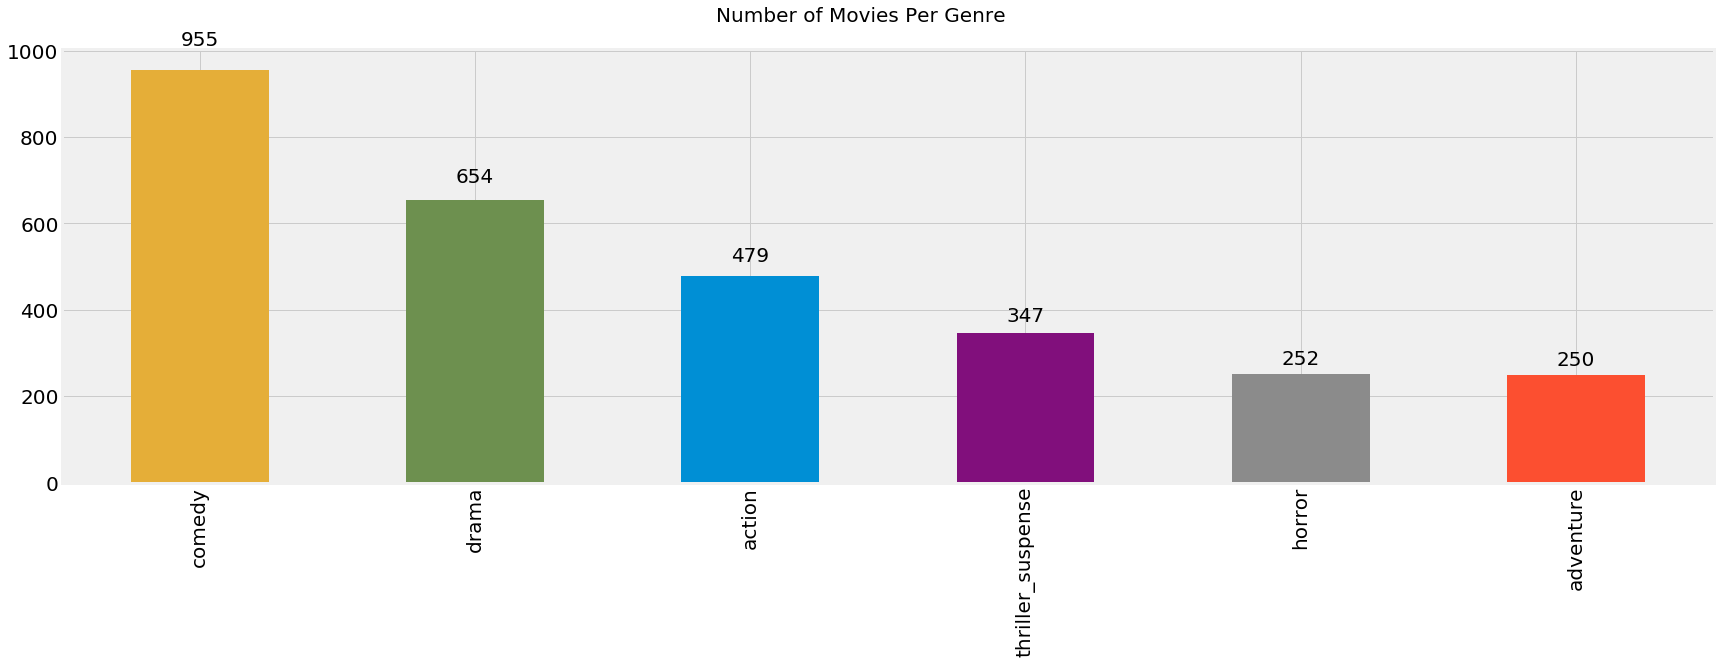

In [20]:
plot_summary_dataframe(summary=summary, sort_column='num_movies', plot_columns='num_movies', 
                       title='Number of Movies Per Genre', colors_needed=1, legend_needed=False, legend_text=[], y_label='', num_decimals=0)

## Grosses

Let's start with some exploratory data analysis looking at the big picture.

Here, we look at overall trends of how much money the movies in our dataset have earned at the worldwide box office.

In [21]:
# Create custom function to plot different aggregate statistics as histograms
def plot_aggregate_histogram(data, stat, title, bins=10, color=genres_dict['action']['color2']):
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24,9))
    figure.suptitle(title, fontsize=20)

    (data[stat] / 1000000).plot.hist(bins=bins, ax=axis, fontsize=20, color=color)
    axis.set_xlabel('Millions of Dollars', fontsize=20)
    axis.set_ylabel('Number of Movies', fontsize=20)
    axis.axvline(data[stat].median() / 1000000, color='k', linewidth=1)
    axis.axvline(data[stat].mean() / 1000000, color='r', linewidth=1)
    axis.legend(['Median: {:.1f} million'.format(data[stat].median() / 1000000), 'Mean: {:.1f} million'.format(data[stat].mean() / 1000000)], fontsize=20)

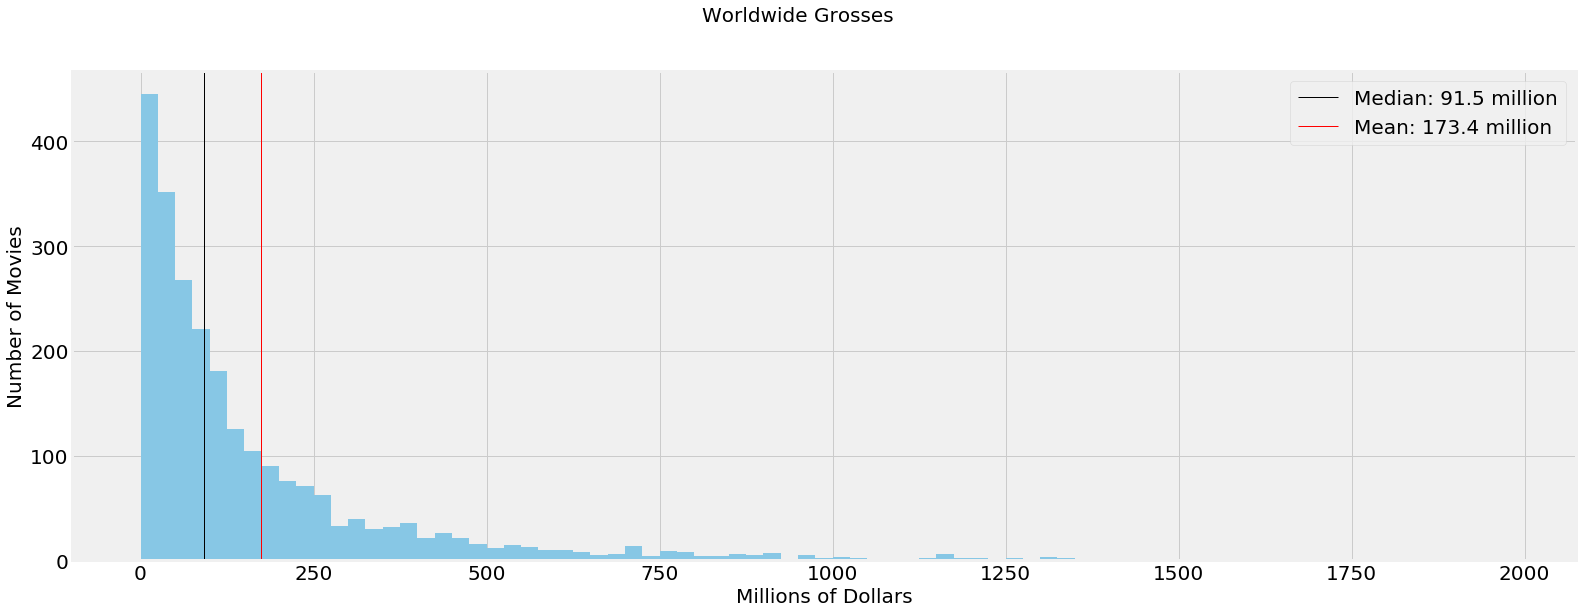

In [22]:
plot_aggregate_histogram(data=data, stat='worldwide_adj', title='Worldwide Grosses', 
                         bins=range(0, 2000, 25), color=genres_dict['action']['color2'])

## Budgets

Here, we look at overall trends for production budgets for the movies in our dataset.

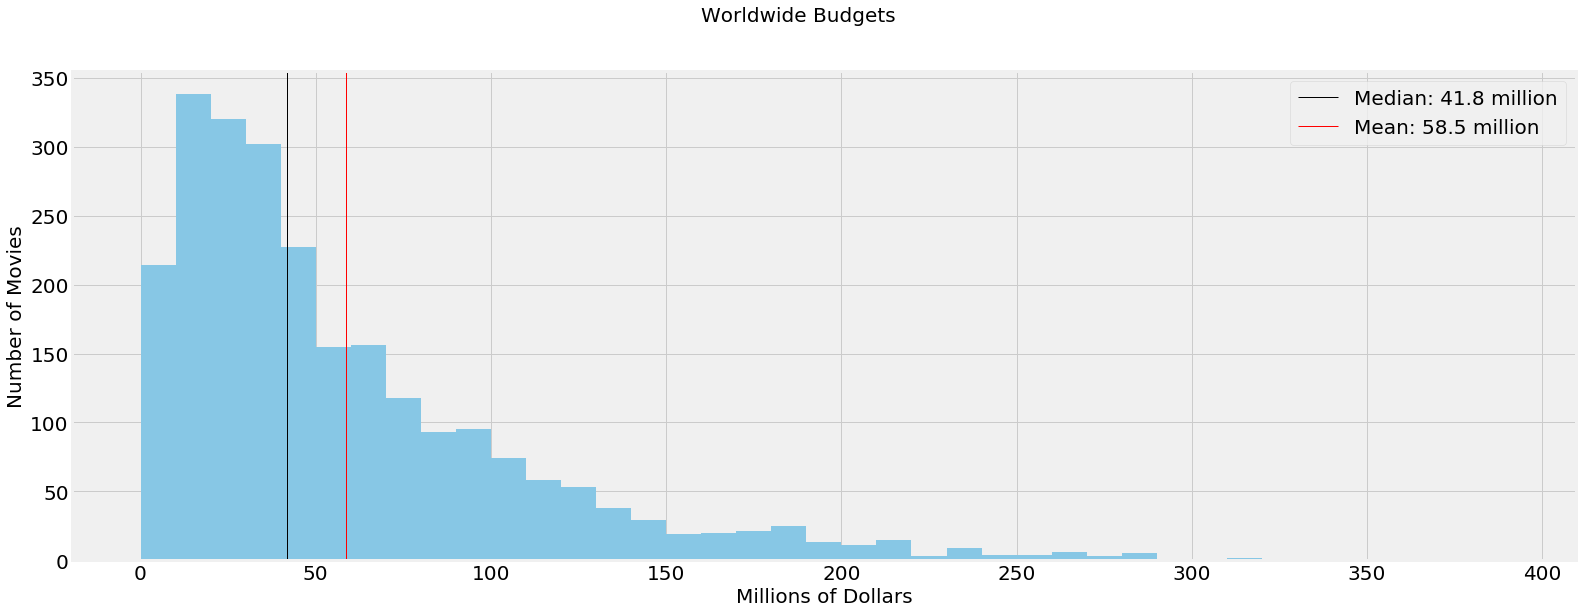

In [23]:
plot_aggregate_histogram(data=data, stat='budget_adj', title='Worldwide Budgets', 
                         bins=range(0, 400, 10), color=genres_dict['action']['color2'])

## Profits

Here, we look at overall trends for how much profit (as defined by our profitability equation) the movies in our dataset have earned.

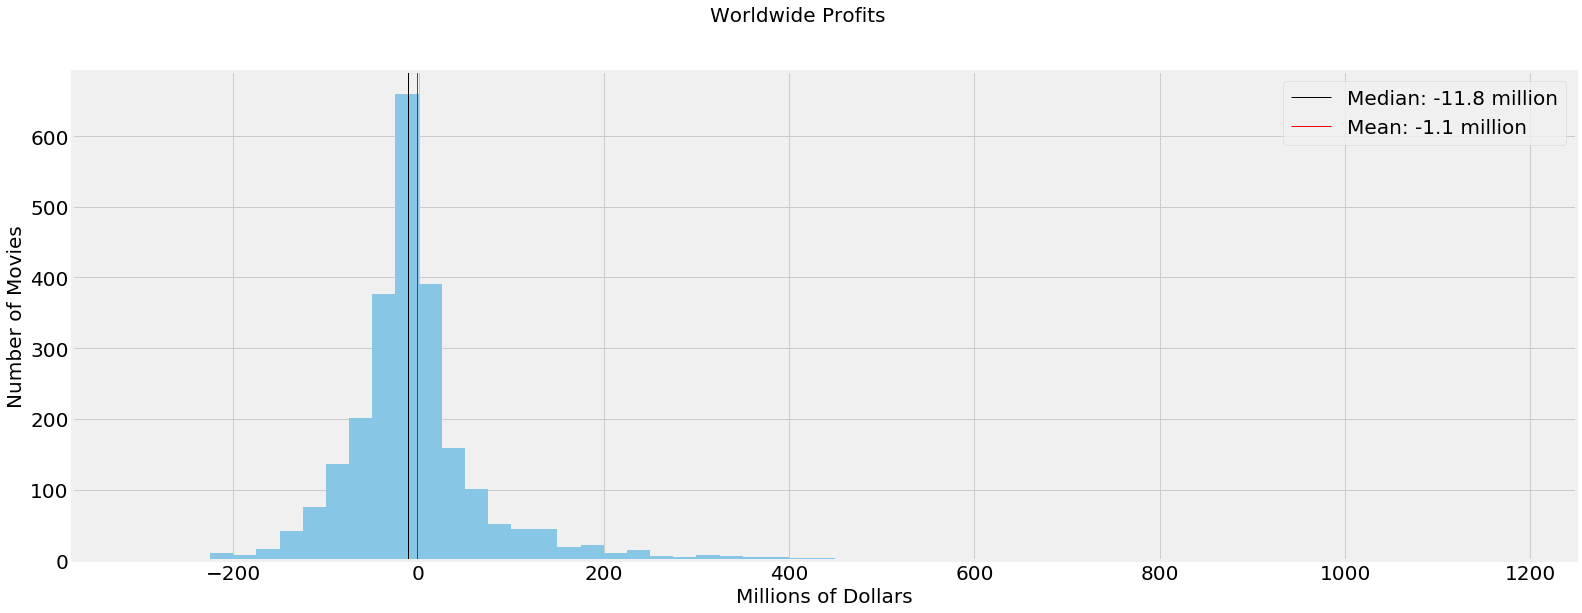

In [24]:
plot_aggregate_histogram(data=data, stat='profit', title='Worldwide Profits', bins=range(-300, 1200, 25), color=genres_dict['action']['color2'])

## Quick Takeaways

**Number of movies**
  - Comedy and Drama are historically the most produced genres by big movie studios by a healthy margin.

**Skewed grosses**
  - Worldwide gross is heavily right-skewed, meaning it has a much higher median than mean (almost double!).
  - This fits with our understanding of the movie business -- there are a few megahits that earn outsized returns while the majority of movies earn a little or even lose money.
  
**Skewed budgets**
  - Budgets are also heavily right-skewed, but with a much shorter right-tail than worldwide gross.
  - This also fits our understanding of the movie business -- most movies are made for relatively small budgets, and there are only a few blockbusters made that have very large budgets.
  
**Skewed profits**
  - Profits look almost bell-shaped, but they do have a slight right-skew. 
  - This is caused by our biggest loss being 275 million dollars (for The 13th Warrior), whereas the biggest profit is 1.12 billion dollars (for The Exorcist).
  - It's interesting that both mean and median profits are negative. Movies are indeed not a slam-dunk investment.
  
**Use median**
  - We will err on the side of using the median for our summary statistic. Our bosses are looking for insight into what they can expect as an average return from a movie they produce. We'd all like to have the mega blockbusters, but to keep their expectations in check, we will report a more fair assessment of our prospects.

# Genres Overview

In this section of the notebook, we get an overall sense of how the genres compare to each other historically.

- 9.1 Check out how much money each genre has made since the 1970s.
- 9.2 Check out how much money was spent producing each genre since the 1970s.
- 9.3 Check out how much overall profit each genre has made since the 1970s. (We calculate this by simply summing up the individual profts/losses for each movie.)
- 9.4 Check out the median amount of profit each genre has made since the 1970s.
- 9.5 Check out the mean amount of profit each genre has made since the 1970s.
- 9.6 Summarize our findings.

## Adding Up The Worldwide Grosses

This graph shows the results of adding up the worldwide box office grosses for all movies, separated by genre.

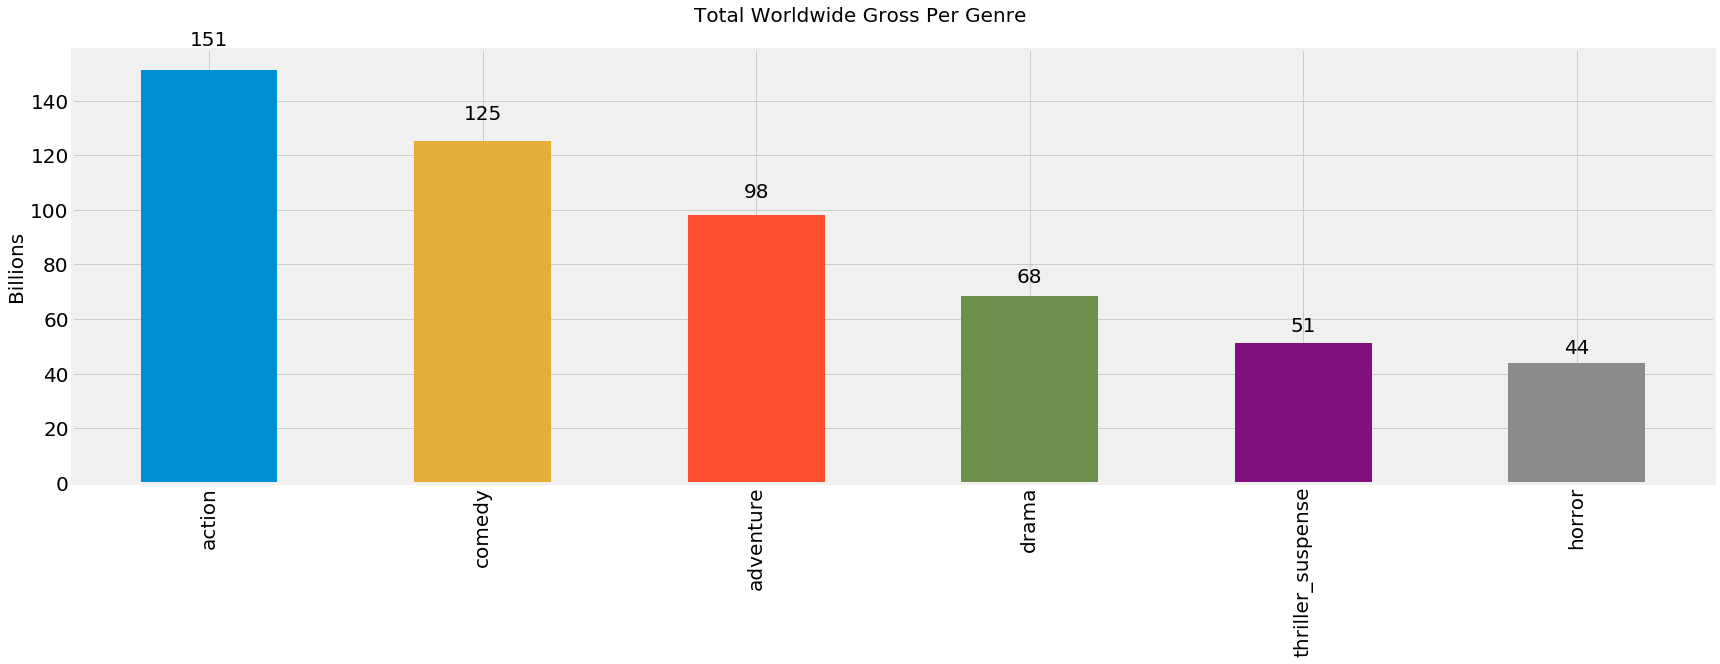

In [25]:
plot_summary_dataframe(summary=summary, sort_column='all_time_gross', plot_columns='all_time_gross', 
                       title='Total Worldwide Gross Per Genre', colors_needed=1, legend_needed=False, 
                       legend_text=[], y_label='Billions', num_decimals=0)

## Adding Up The Budgets

This graph shows the results of adding up the worldwide budgets for all movies, separated by genre.

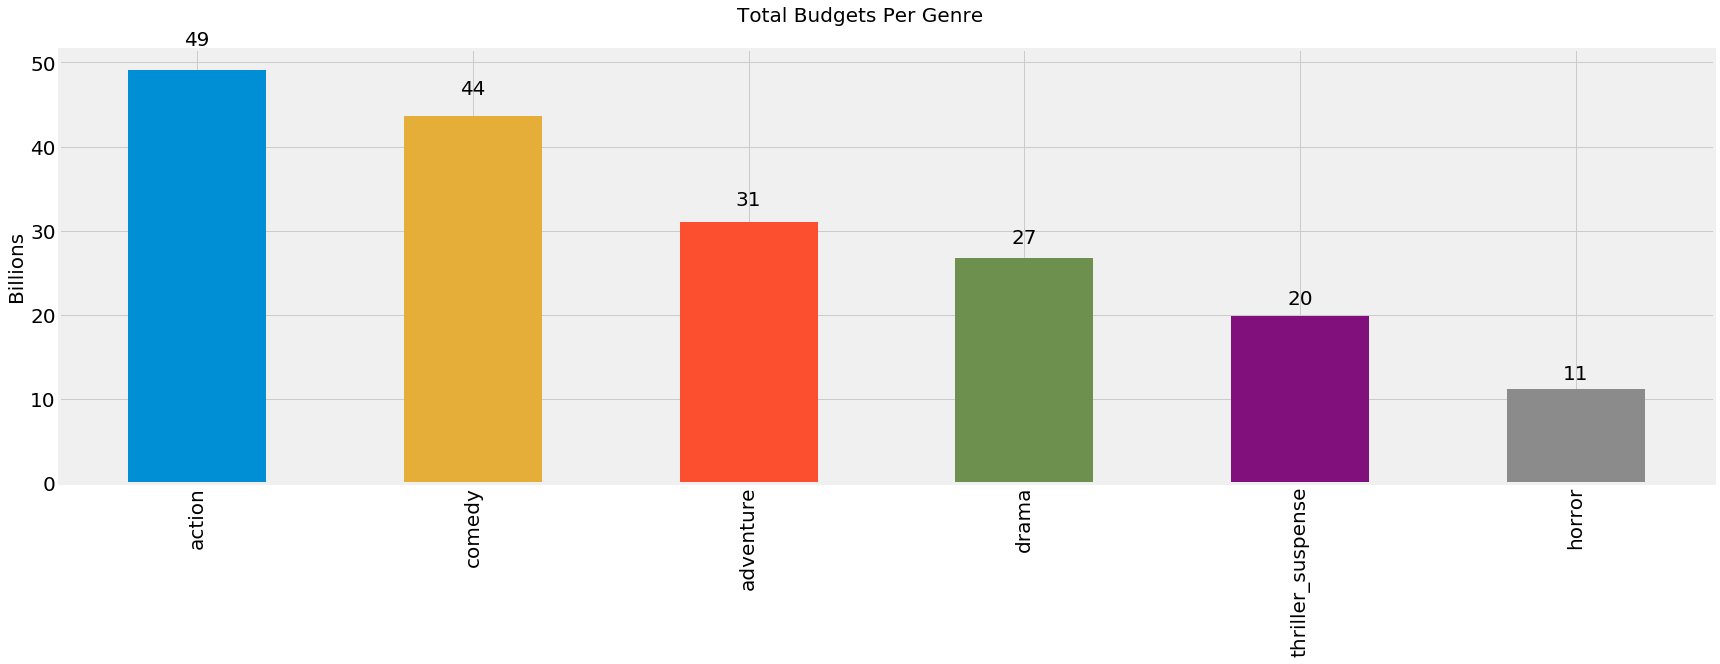

In [26]:
plot_summary_dataframe(summary=summary, sort_column='all_time_budget', plot_columns='all_time_budget', 
                       title='Total Budgets Per Genre', colors_needed=1, legend_needed=False, 
                       legend_text=[], y_label='Billions', num_decimals=0)

## Adding Up The Profits

This graph shows the results of adding up the worldwide profits for all movies, separated by genre.

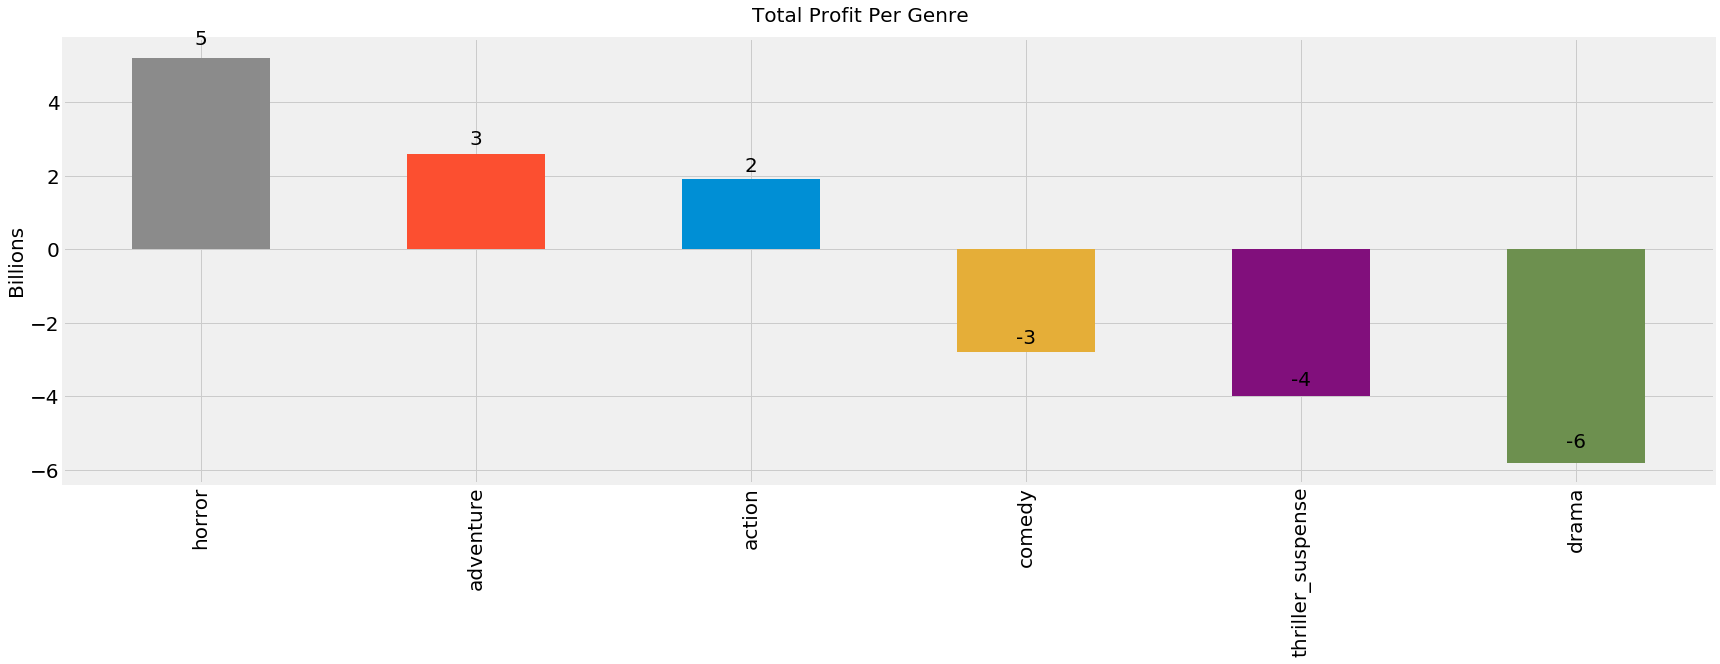

In [27]:
plot_summary_dataframe(summary=summary, sort_column='all_time_profit', plot_columns='all_time_profit', 
                       title='Total Profit Per Genre', colors_needed=1, legend_needed=False, 
                       legend_text=[], y_label='Billions', num_decimals=0)

## Median Profit

This graph shows the results of taking the median value of worldwide profits for all movies, separated by genre.

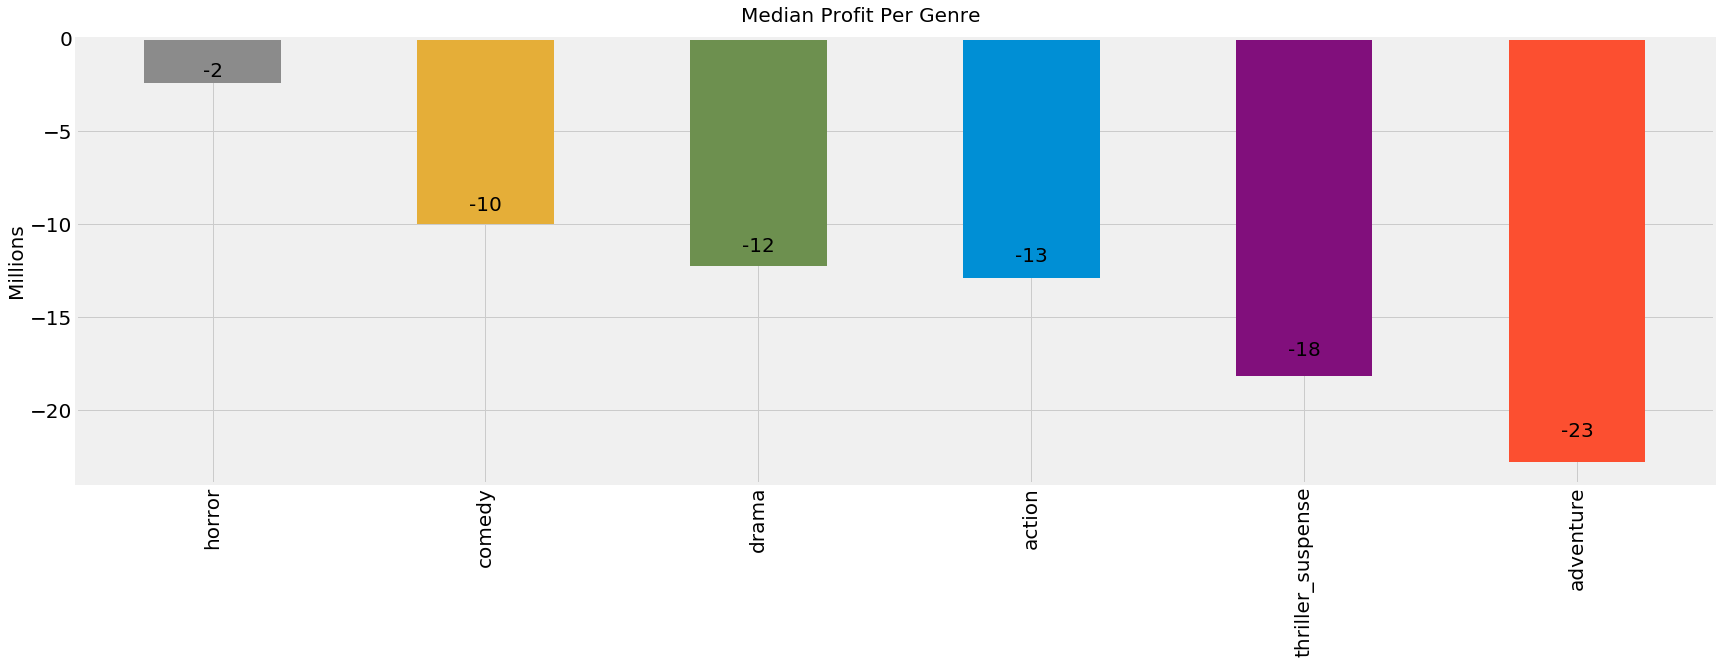

In [28]:
plot_summary_dataframe(summary=summary, sort_column='median_profit', plot_columns='median_profit', 
                       title='Median Profit Per Genre', colors_needed=1, legend_needed=False, 
                       legend_text=[], y_label='Millions', num_decimals=0)

## Mean Profit

This graph shows the results of taking the mean value of worldwide profits for all movies, separated by genre.

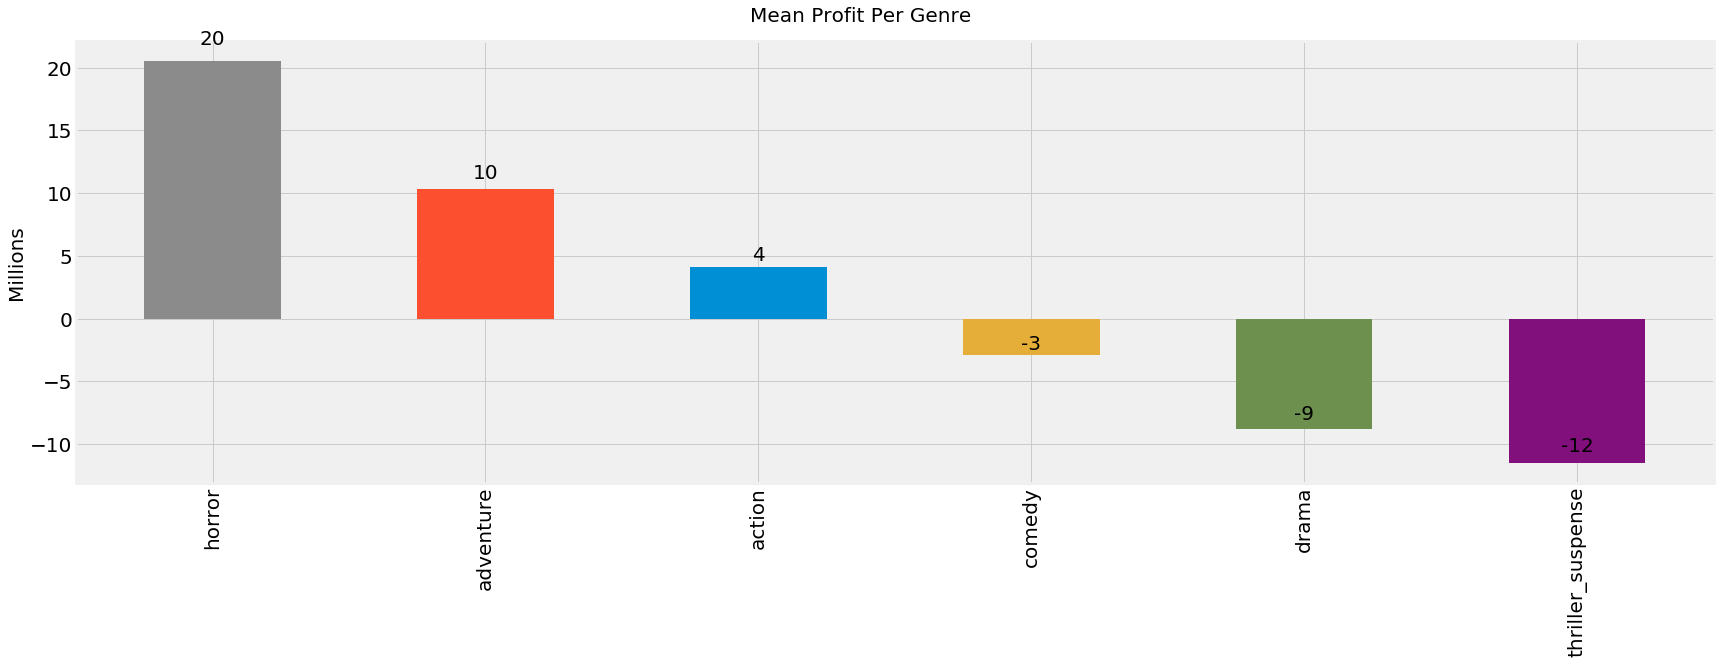

In [29]:
plot_summary_dataframe(summary=summary, sort_column='mean_profit', plot_columns='mean_profit', 
                       title='Mean Profit Per Genre', colors_needed=1, legend_needed=False, 
                       legend_text=[], y_label='Millions', num_decimals=0)

## Summary

**Highest gross**
  - Action, Comedy, and Adventure have grossed the most money. 
  
**Profitability**
  - Horror, Adventure, and Action are the only genres that are net winners.
  
**Median profit**
  - No genre is a net winner in terms of median profit.
  
**Mean profit**
  - Horror has the biggest boost from the right skew in terms of mean profitability.
  - Adventure and Action also go from net losers to net winners when looking at mean profits.
  
**Thoughts**
  - We are going to dig way deeper, but it's nice to get a sense of the overall big picture by genre.

# Deeper Dive On Worldwide Grosses

In this section of the notebook, we take a closer look at the worldwide box office grosses by genre.

- 10.1 Look at the mean and median worldwide box office gross amounts of each genre since the 1970s.
- 10.2 Look at histograms that shows us the distribution of worldwide box office gross amounts for each genre since the 1970s.
- 10.3 Summarize our findings in 10.1 and 10.2.
- 10.4 Look at how the subgenre Action/Adventure affects the results (in terms of worldwide box office gross amounts) for its parent genres of Action and Adventure.

## Mean and Median Gross

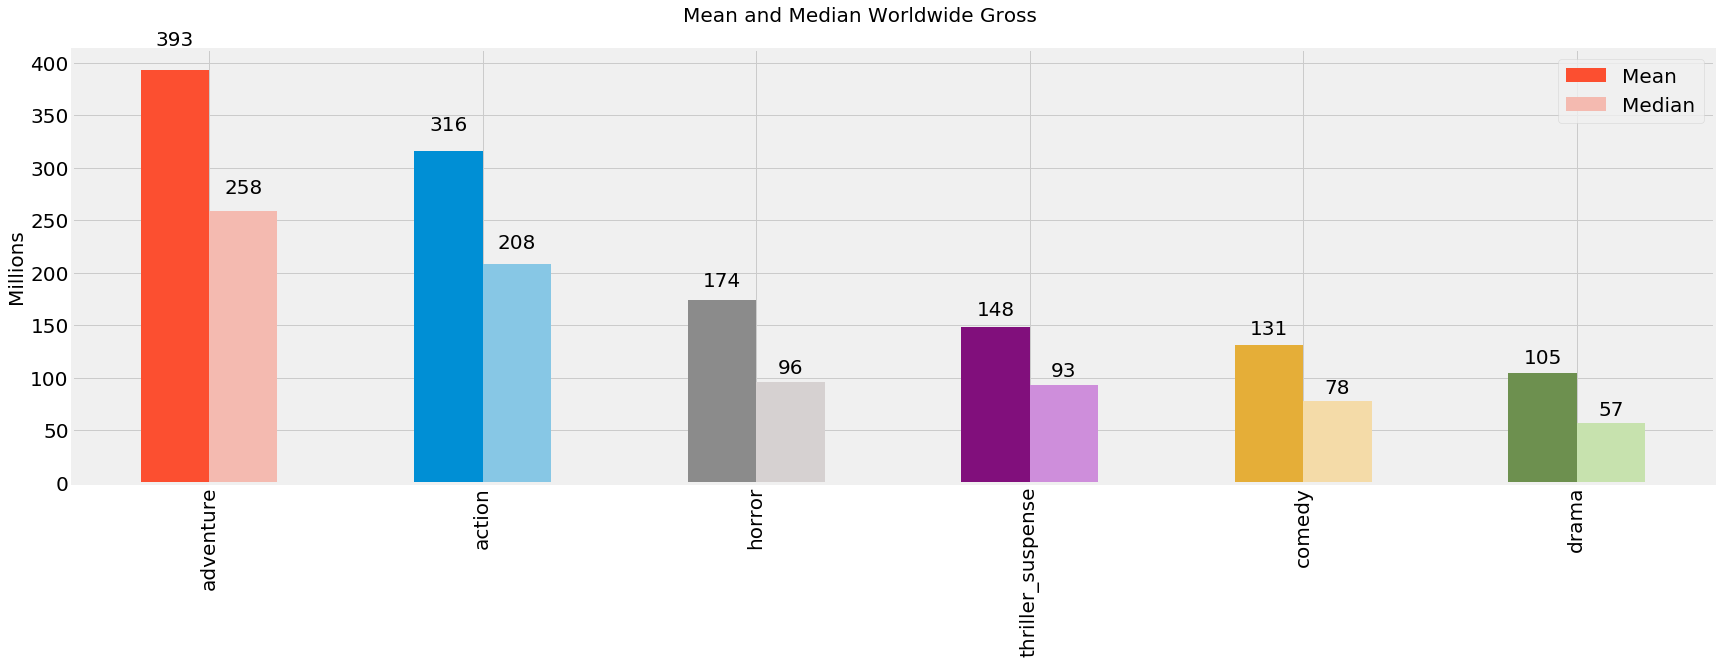

In [30]:
plot_summary_dataframe(summary=summary, sort_column='avg_gross', plot_columns=['avg_gross', 'median_gross'], 
                       title='Mean and Median Worldwide Gross', colors_needed=2, legend_needed=True, 
                       legend_text=['Mean', 'Median'], y_label='Millions', num_decimals=0)

## Gross Distributions

This graph shows a histogram of the worldwide box office grosses of all movies in our dataset, separated by genre.

The width of the bars is 50 million dollars. This means that each bar represents the number of movies that have grossed an amount of money somewhere in that 50 million dollar range.

In [31]:
# Custom function to plot histograms of a stat by genre
def plot_histograms_by_genre(data, stat, title, genres, bins=10, colors_needed=1):
    figure, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(24,15))
    figure.suptitle(title, fontsize=20)

    sorted_genres = sorted([{'genre': genre, 'amount': (data[data[genre]][stat].median() / 1000000)} for genre in genres], key=lambda k: k['amount'], reverse=True)
    genres_list = [item['genre'] for item in sorted_genres]
    color_list = generate_color_list(colors_needed=1, order_list=genres_list)

    for genre, axis, color in zip(genres_list, axes.flat, color_list):
        (data[data[genre]][stat] / 1000000).plot.hist(bins=bins, ax=axis, color=color)
        axis.set_title(genre, fontsize=20)
        axis.axvline(data[data[genre]][stat].median() / 1000000, color='k', linewidth=1)
        axis.axvline(data[data[genre]][stat].mean() / 1000000, color='r', linewidth=1)
        axis.legend(['Median: {:.1f} million'.format(data[data[genre]][stat].median() / 1000000), 'Mean: {:.1f} million'.format(data[data[genre]][stat].mean() / 1000000)], fontsize=15)
        axis.set_xlabel('Millions', fontsize=20)
        axis.set_ylabel('Number of Movies')

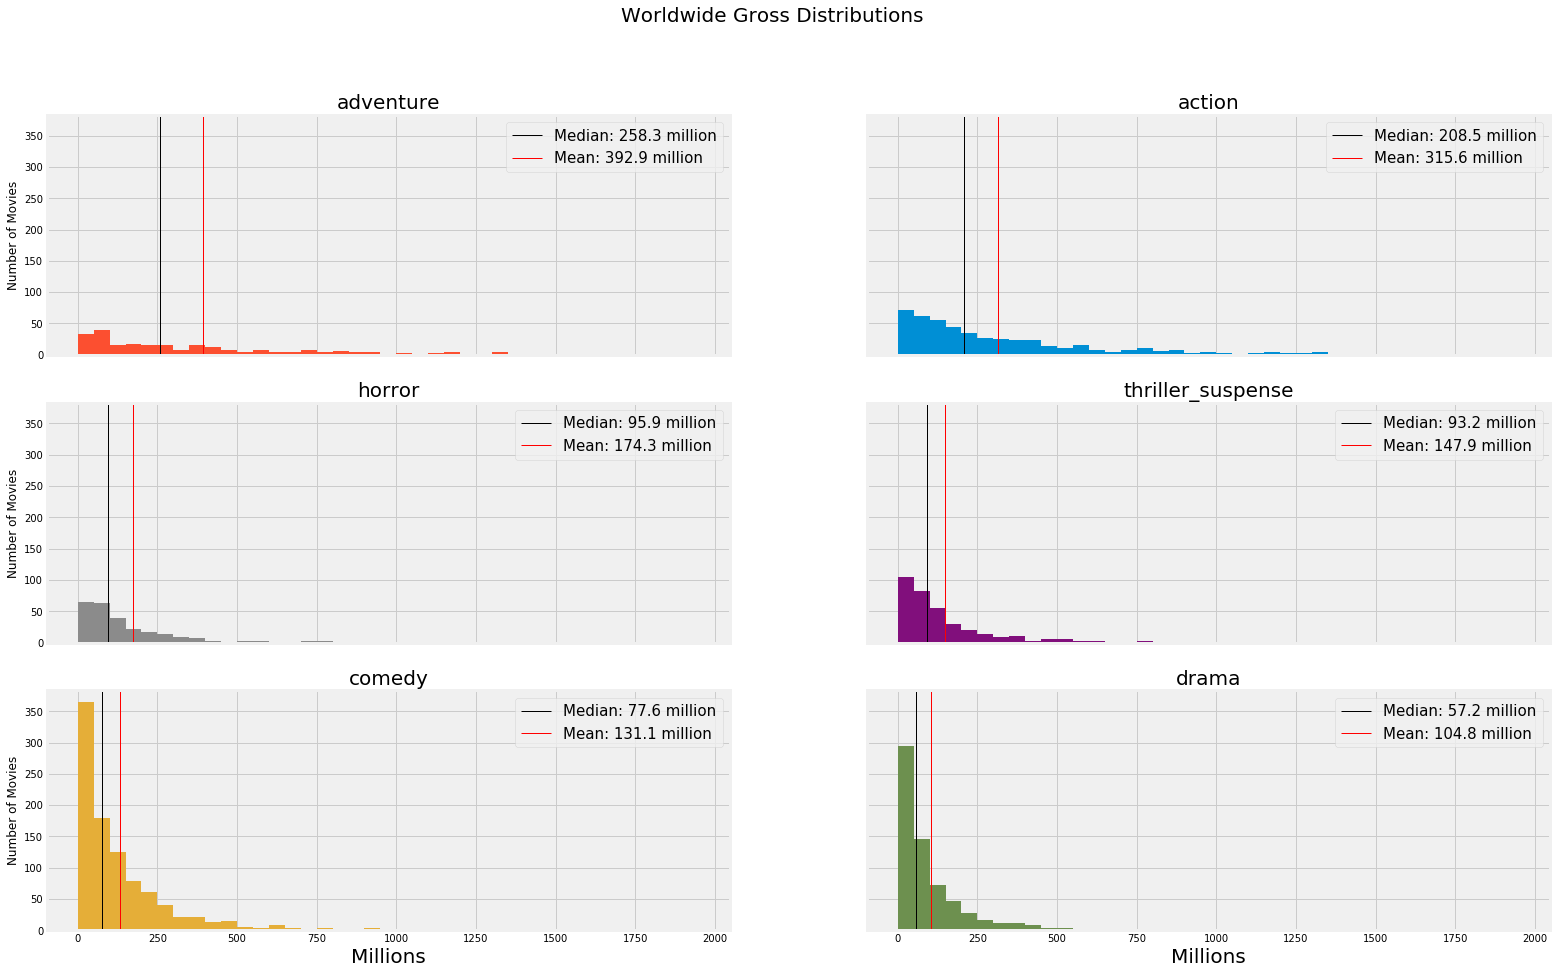

In [32]:
plot_histograms_by_genre(data=data, stat='worldwide_adj', title='Worldwide Gross Distributions', 
                         genres=genres, bins=range(0, 2000, 50), colors_needed=1)

## Quick Takeaways

**Skew**
  - Even subdivided by genre, the worldwide box office gross distributions are all right-skewed.
  
**Mean and median**
  - Mean and median gross for Adventure and Action are far higher than any other genre.
  - Adventure's median gross is approximately 2.6 times as large as the third place median gross, Horror.
  - The most common gross amount in every genre except Adventure is 0-50 milllion dollars.
  
**Action/Adventure**
  - Action and Adventure are the two genres with the biggest spread between mean and median gross.
  - Something to keep in mind is the frequency of movies labeled Action/Adventure. In our analysis, such movies would count as both an Action movie and an Adventure movie. (We are assigning movies to every genre they have.) 
  - Since both of these genres are big on spectacle, they tend to be more likely to be blockbuster material.
  - We might have a situation where duplicate entries in both columns are artificially boosting their totals.
  - Let's investigate this a little further.

## Action/Adventure

In this section, we examine the Action/Adventure subgenre to see how it affects the Gross, Budget, and Profit of the Action and Adventure genres.

In [33]:
print('Median gross of Action/Adventure movies: ${:.1f} million'.format(data[data['genres_mojo'] == 'Action / Adventure']['worldwide_adj'].median() / 1000000))
print('Median gross of Action (without Adventure component) movies: ${:.1f} million'.format(data[(data['genres_mojo'].str.contains('Action', na=False)) & (~data['genres_mojo'].isin(['Action / Adventure']))]['worldwide_adj'].median() / 1000000))
print('Median gross of Adventure (without Action component) movies: ${:.1f} million'.format(data[(data['genres_mojo'].str.contains('Adventure', na=False)) & (~data['genres_mojo'].isin(['Action / Adventure']))]['worldwide_adj'].median() / 1000000))

Median gross of Action/Adventure movies: $437.8 million
Median gross of Action (without Adventure component) movies: $173.2 million
Median gross of Adventure (without Action component) movies: $156.8 million


In [34]:
def action_adventure_stats(genre, stat, title):
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24, 9))
    figure.suptitle(title, fontsize=20)

    median_with_action_adventure = data[data[genre]][stat].median() / 1000000
    median_without_action_adventure = data[(data[genre]) & (data['genres_mojo'] != 'Action / Adventure')][stat].median() / 1000000

    grp = data[data[genre]].groupby('genres_mojo')[stat].median().sort_values(ascending=False) / 1000000

    grp.plot(kind='bar', ax=axis, color=genres_dict[genre]['color1'])
    axis.axhline(median_with_action_adventure, color='k', linewidth=1)
    axis.axhline(median_without_action_adventure, color='r', linewidth=1)
    axis.tick_params(labelsize=20)
    axis.set_xlabel('')
    axis.set_ylabel('Millions', fontsize=20);
    axis.legend(['Overall Median With Action/Adventure: {:.1f}'.format(median_with_action_adventure),
                 'Overall Median Without Action/Adventure: {:.1f}'.format(median_without_action_adventure)], loc='best', fontsize=20)
    autolabel(axis)

### Action

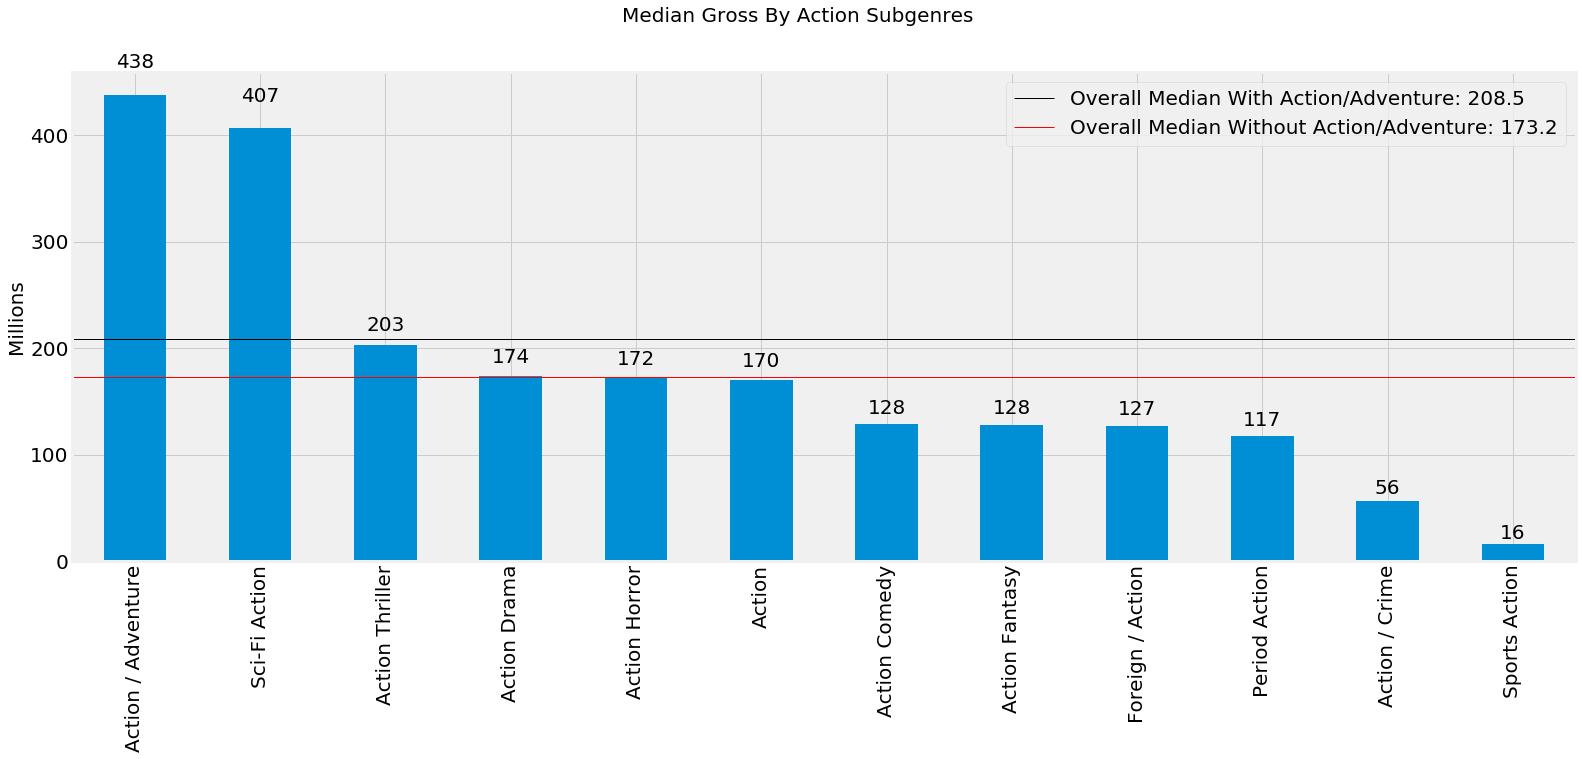

In [35]:
action_adventure_stats(genre='action', stat='worldwide_adj', title='Median Gross By Action Subgenres')

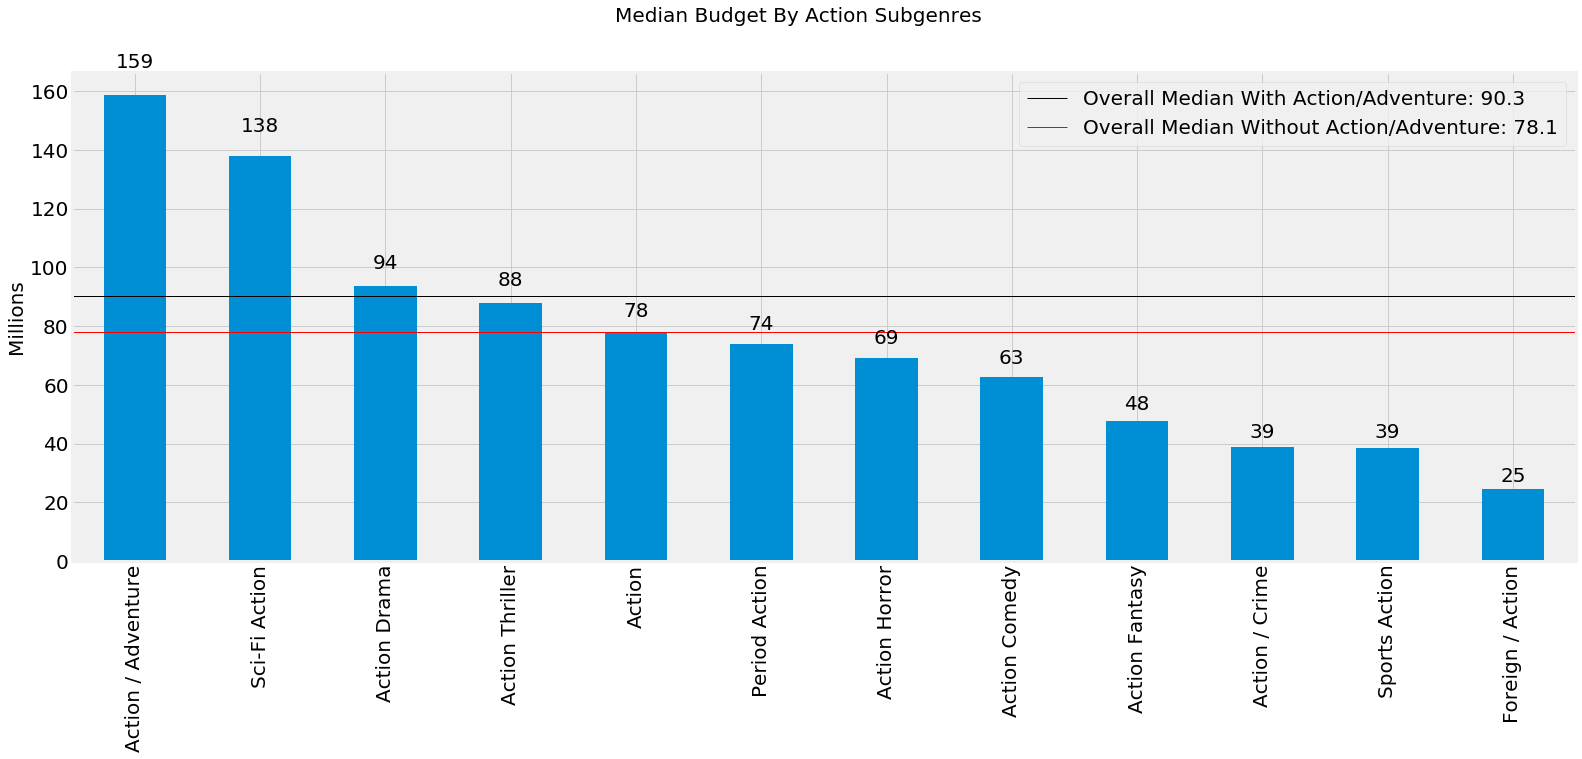

In [36]:
action_adventure_stats(genre='action', stat='budget_adj', title='Median Budget By Action Subgenres')

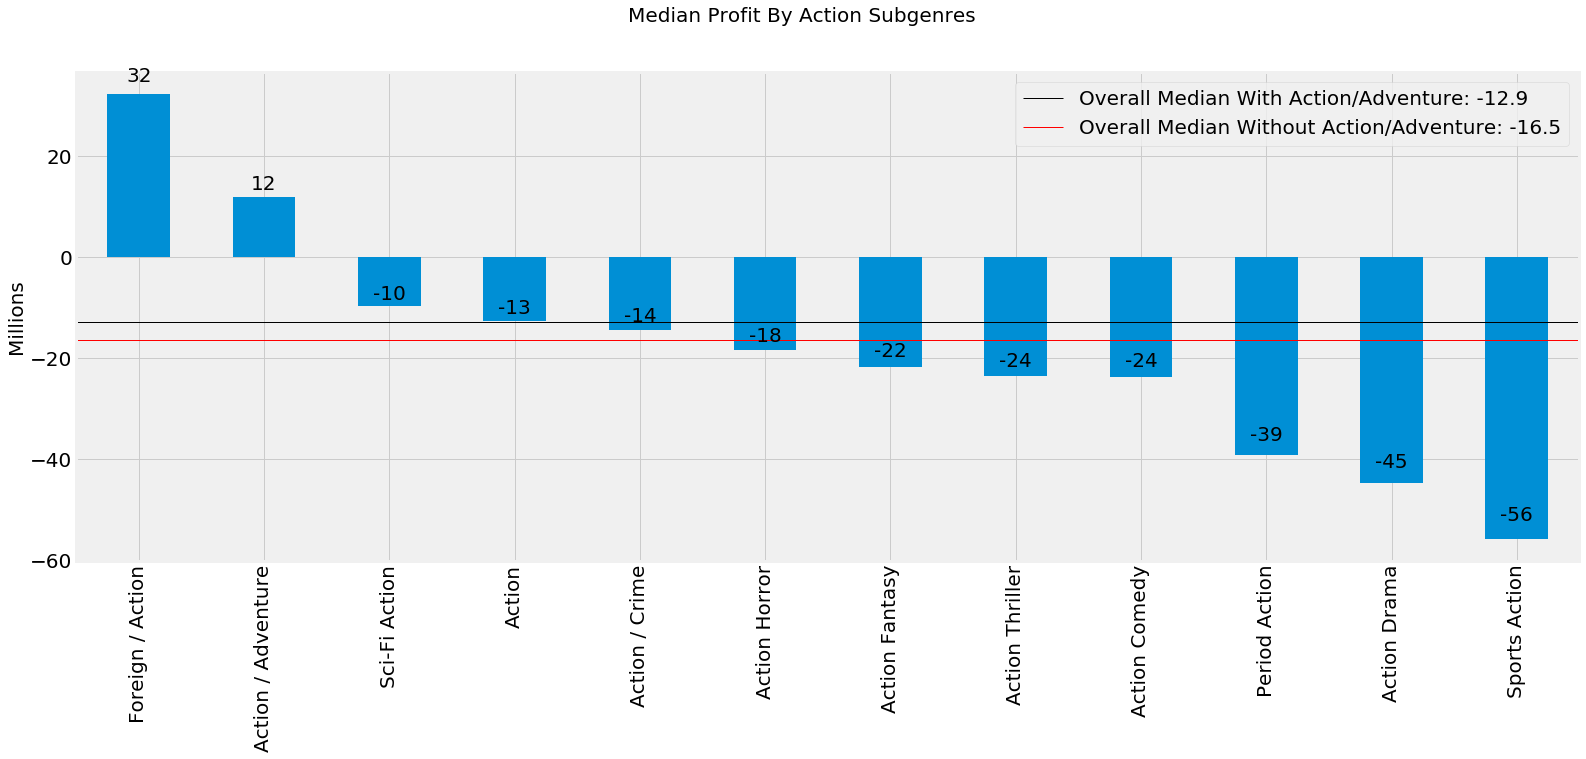

In [37]:
action_adventure_stats(genre='action', stat='profit', title='Median Profit By Action Subgenres')

### Quick Takeaways

  - Action/Adventure and Sci-Fi Action are the highest grossing subgenres. They also carry the highest production budgets.
  - Only Foreign/Action and Action/Adventure have a positive median profit.
  - Since Action/Adventure is such a huge grossing subgenre, it boosts the median gross for the entire genre by about &#0036;34 million.

### Adventure

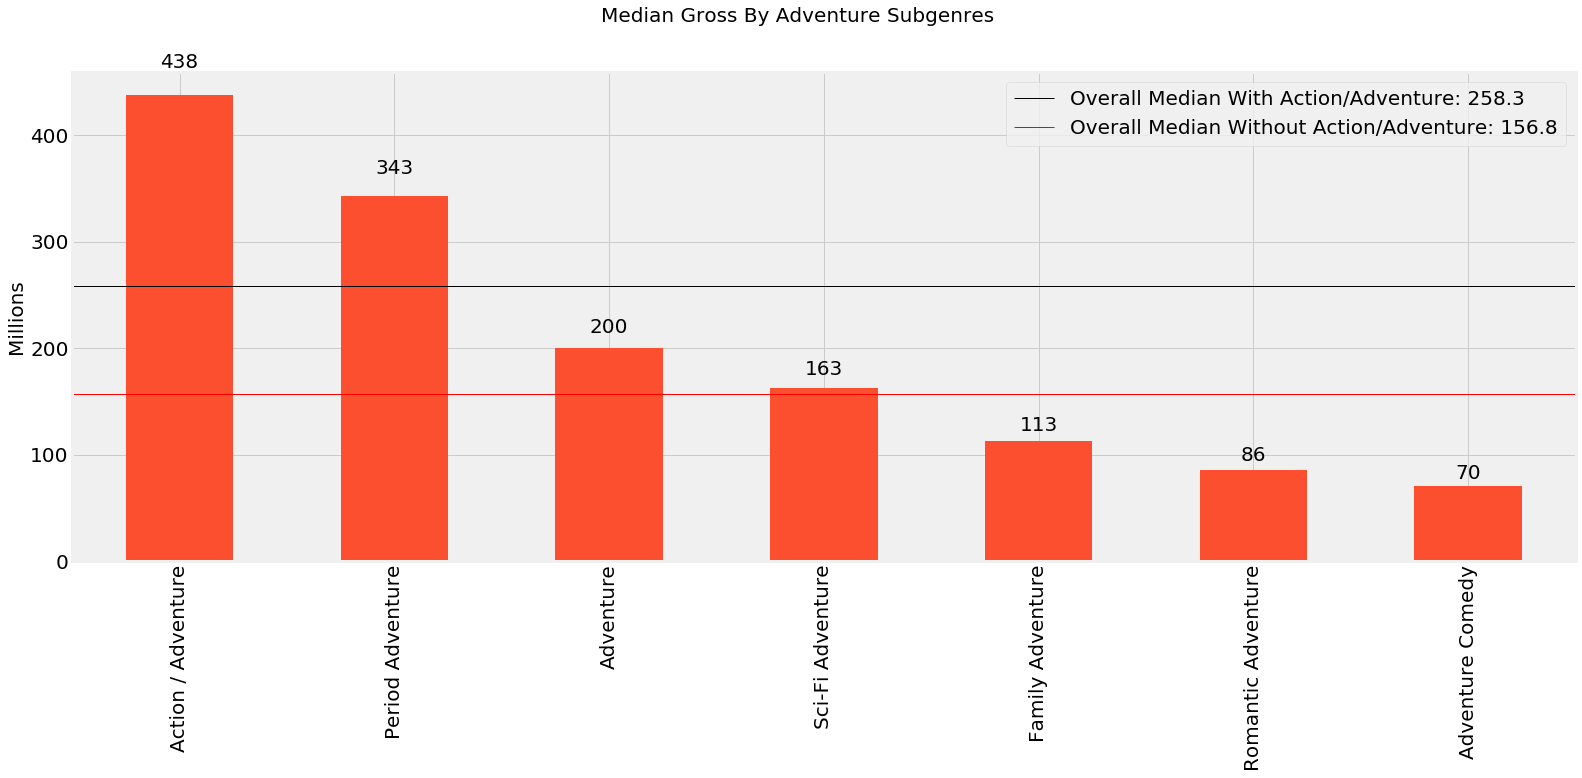

In [38]:
action_adventure_stats(genre='adventure', stat='worldwide_adj', title='Median Gross By Adventure Subgenres')

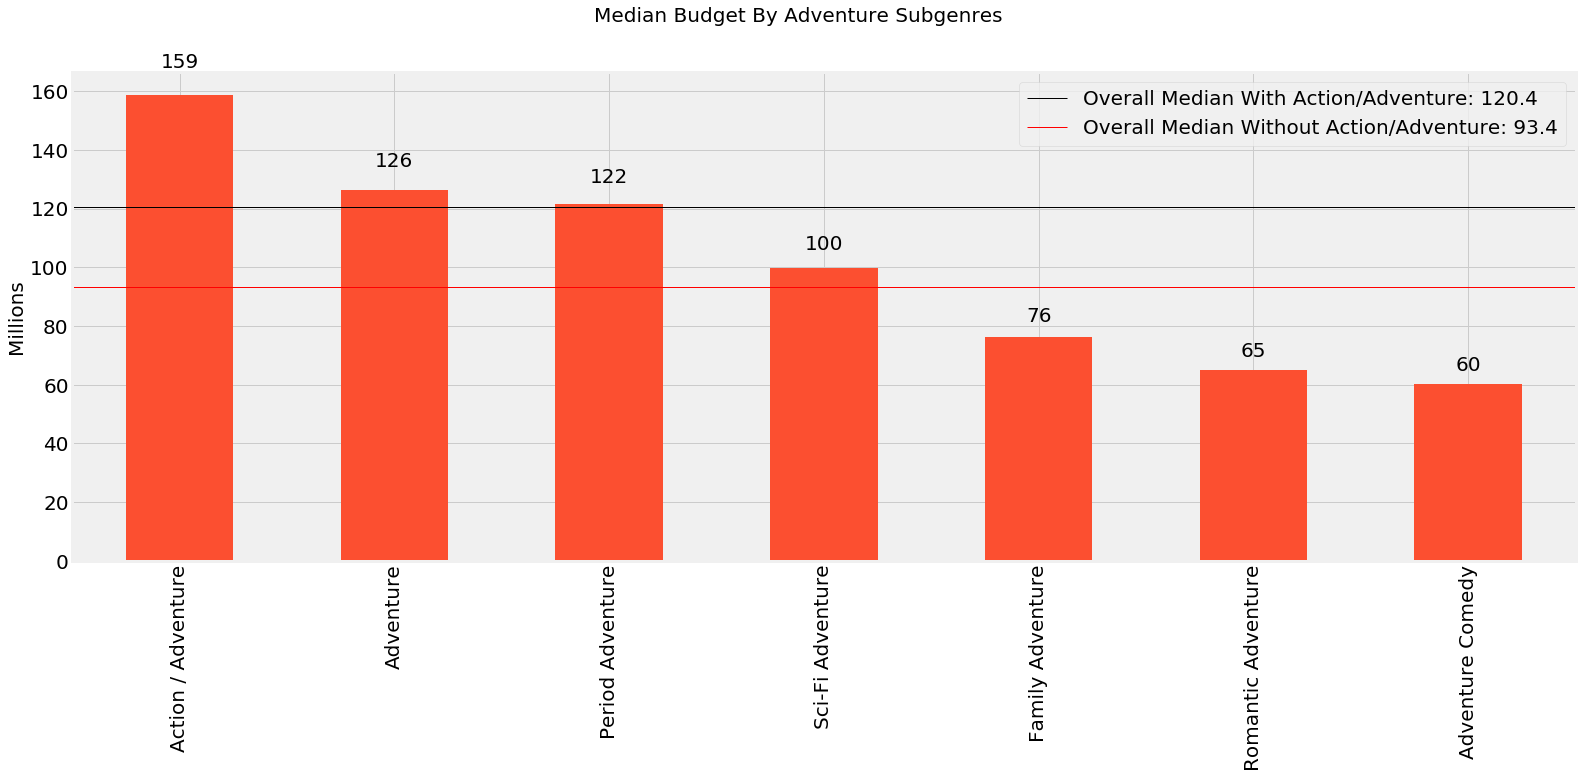

In [39]:
action_adventure_stats(genre='adventure', stat='budget_adj', title='Median Budget By Adventure Subgenres')

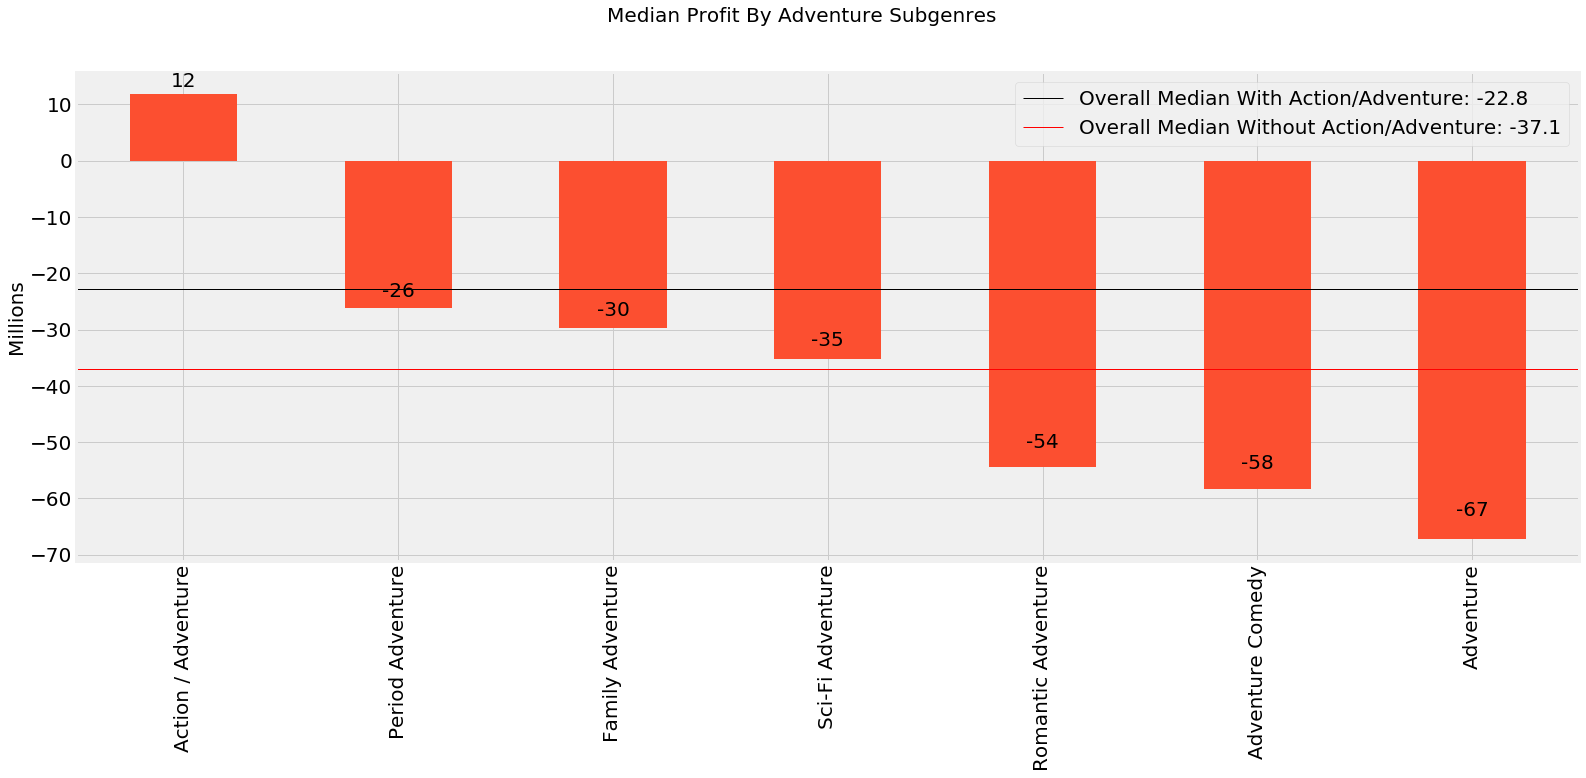

In [40]:
action_adventure_stats(genre='adventure', stat='profit', title='Median Profit By Adventure Subgenres')

### Quick Takeaways

  - Action/Adventure is the highest grossing and most expensive subgenre.
  - Period Adventure is the second highest grossing subgenre and third most expensive.
  - Only Action/Adventure has a positive median profit.
  - The Action/Adventure subgenre boosts the median gross for the entire genre by about &#0036;100 million.

### Summary

**Action/Adventure is the culprit!**
  - Action/Adventure movies are so high-grossing that they are boosting the median stats of Action and Adventure movies by a big margin.
  
**Gross**
  - Action's median gross increases about &#0036;34 million.
  - Adventure's median gross increases about &#0036;100 million.
    
**Budget**
  - Action's median budget increases about &#0036;12 million.
  - Adventure's median budget increases about &#0036;27 million.
    
**Profit**
  - Action's median profit increases about &#0036;7 million.
  - Adventure's median profit increases about &#0036;29 million.
    
**Keep it in the back of our minds**
  - We should be aware this one subgenre has that much impact on our otherwise separate genres, Action and Adventure.

# Deeper Dive on Production Budgets

In this section of the notebook, we take a closer look at worldwide production budgets of each genre since the 1970s.

- 11.1 Look at the mean and median values for worldwide production budget of each genre.
- 11.2 Look at histograms that show us the distribution of worldwide production budget amounts for each genre.
- 11.3 Another look at the distribution of production budgets (not separated by genre).
- 11.4 Summarize our findings. 

## Mean and Median Production Budget

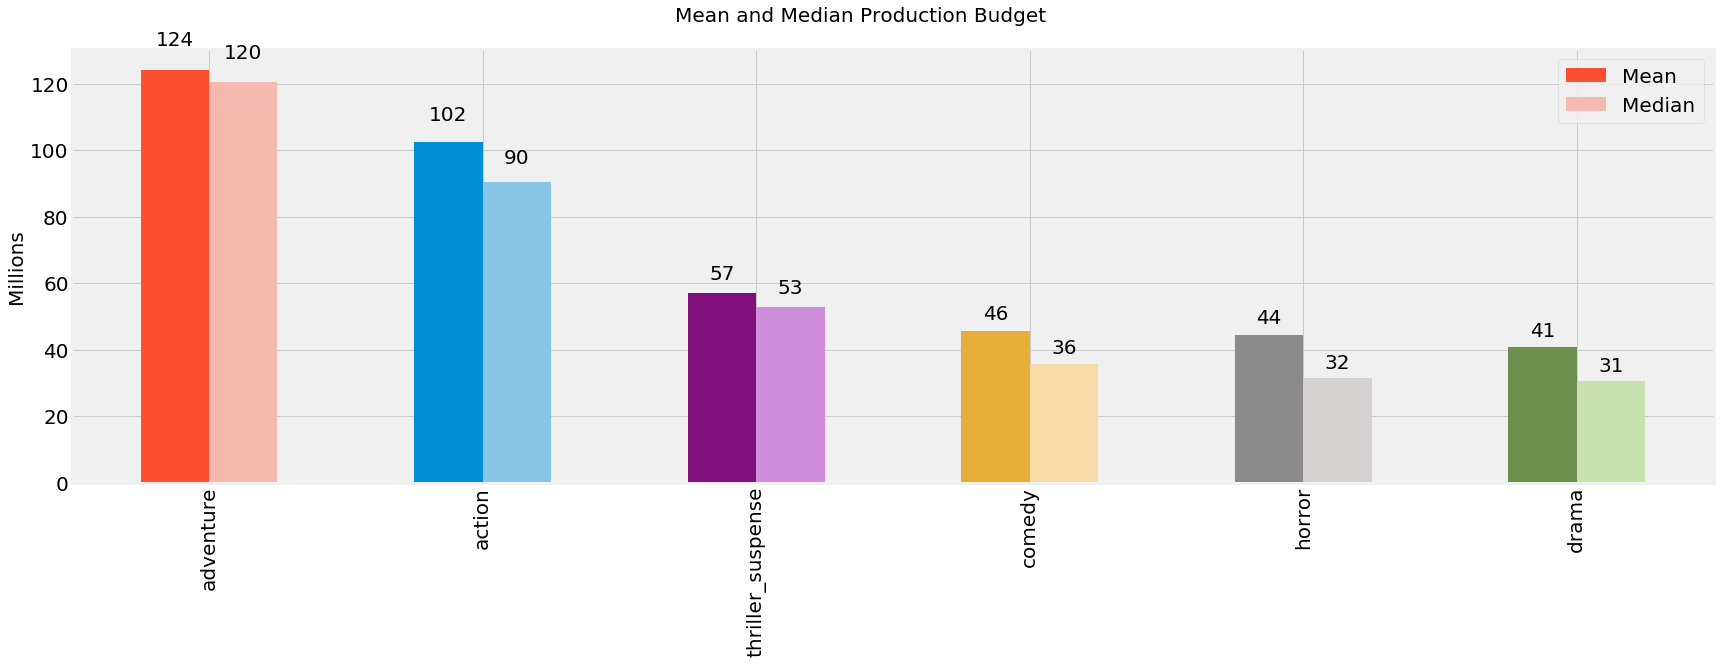

In [41]:
plot_summary_dataframe(summary=summary, sort_column='avg_budget', plot_columns=['avg_budget', 'median_budget'], 
                       title='Mean and Median Production Budget', colors_needed=2, legend_needed=True, 
                       legend_text=['Mean', 'Median'], num_decimals=0)

## Production Budget Distributions

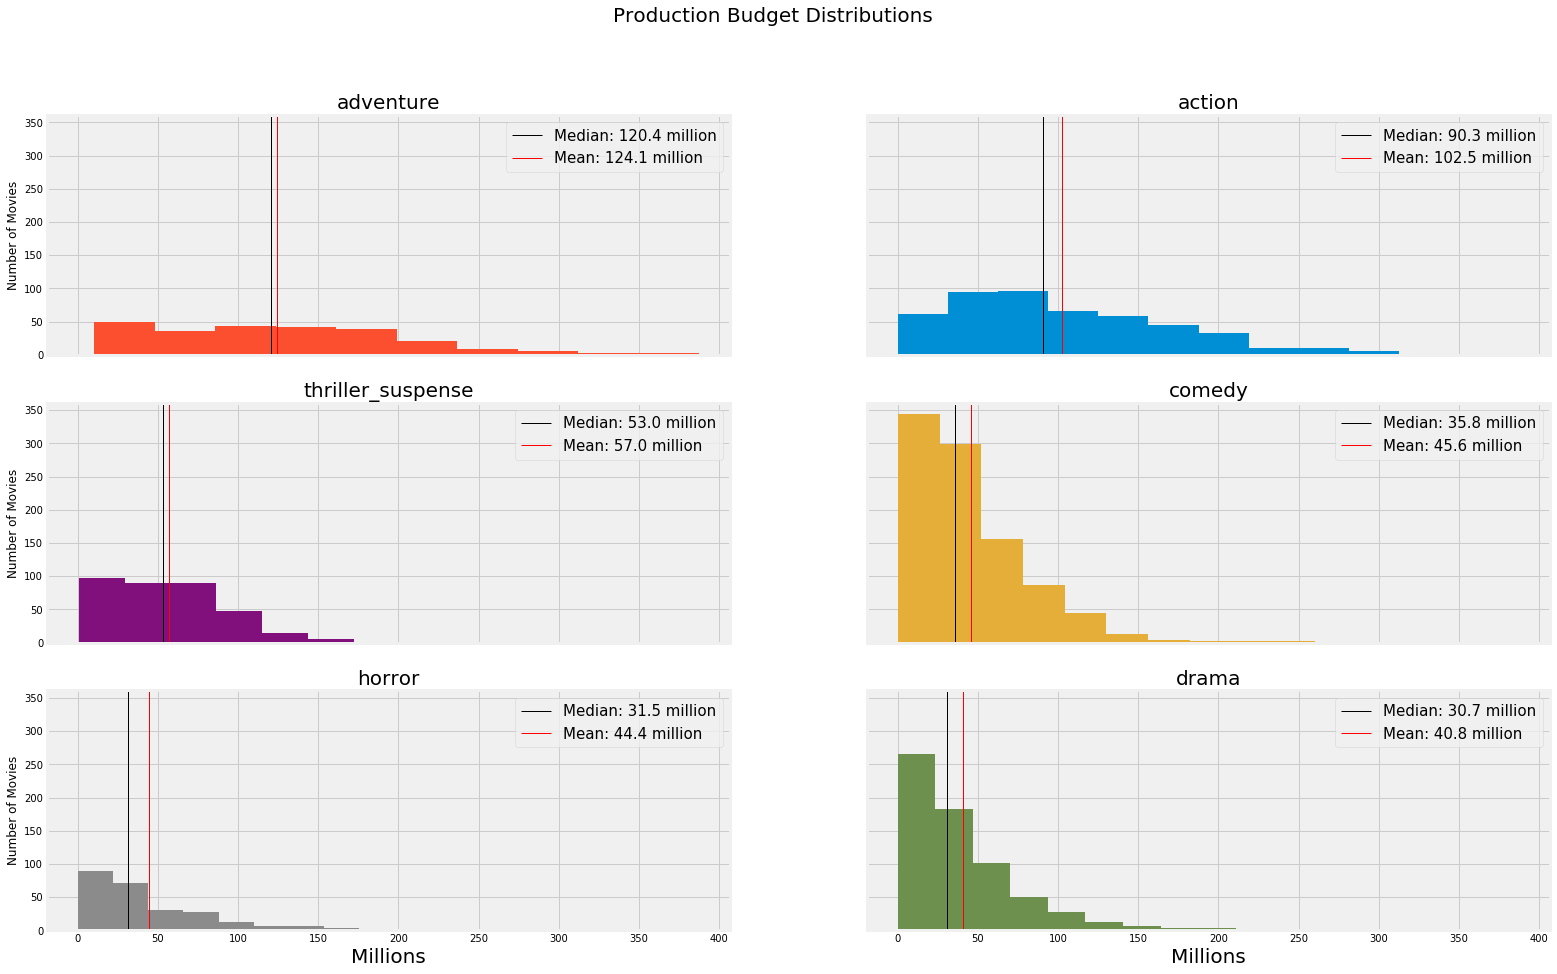

In [42]:
plot_histograms_by_genre(data=data, stat='budget_adj', title='Production Budget Distributions', 
                         genres=genres, bins=10, colors_needed=1)

## Production Budget Distribution (Not Separated By Genre)

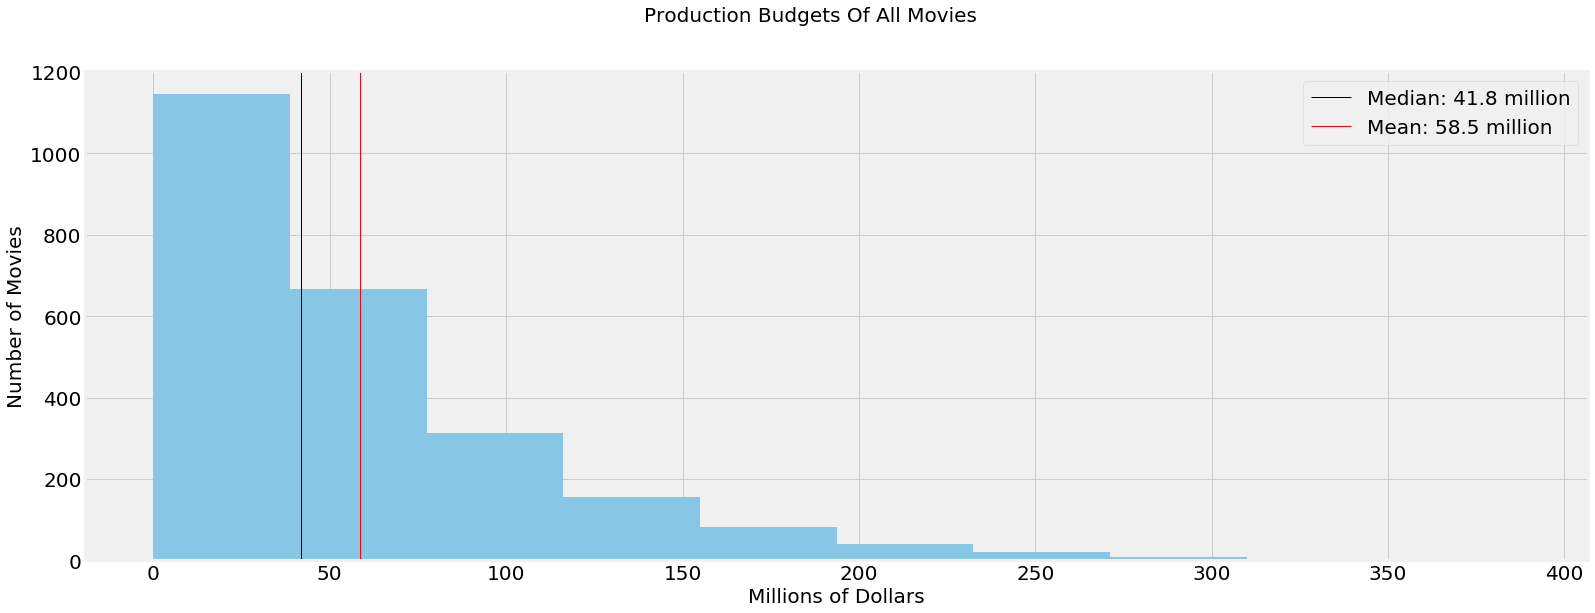

In [43]:
plot_aggregate_histogram(data=data, stat='budget_adj', title='Production Budgets Of All Movies', 
                         bins=10, color=genres_dict['action']['color2'])

## Quick Takeaways

**Median production budget**
  - Adventure and Action have by far the largest median budget. This makes sense, as those movies tend to require more set pieces and CGI than other genres.
  - Adventure is 2.3 times the median budget of the third place genre, Thriller/Suspense.
  - Comedy, Horror, and Drama all have very similar, low median production budgets. 
  - Production budgets (when separated by genre) are also right-skewed, but they have far less skew than worldwide grosses.
  
**Low budgets**
  - We can tell by the median production budget of &#0036;41.8 million that the majority of movies produced have a relatively small budget.
  - Blockbusters (those costing 200-300 million dollars) are the exception, rather than the rule.
  - Something to keep in mind is if this trend has changed in the past decade. (We will look at this a bit later.)

# Deeper Dive On Profits

In this section of the notebook, we take a closer look at worldwide profits for each genre since the 1970s.

- 12.1 Define a few custom functions for making some graphing situations easier later on. 
- 12.2 Look at a boxplot showing the distribution of worldwide profit amounts for each genre.
- 12.3 Summarize our findings.
- 12.4 Look at the median profits of each subgenre within our main genres.
- 12.5 Summarize our findings. 
- 12.6 Look at the mean profits of each subgenre within our main genres.
- 12.7 Summarize our findings.  
- 12.8 Look at earnings divided by expenses for our main genres.
- 12.9 Summarize our findings.

## Custom Functions To Create New Columns Containing Stats Separated By Genre

Since we define a movie's genre by all the genres it contains, many of our movies have multiple genres that we care about.

It would make life easier if in one column, we could store a statistic and the genre of the movie.

Obviously, this involves duplication in situations where a movie has multiple genres (for example, an Action/Adventure movie counts as both an Action and Adventure movie).

These custom functions create new columns that contain the corresonding statistic (worldwide gross, budget, profit, breakeven) and whether the movie is of a certain genre.

This makes graphing certain things much easier.

In [127]:
# We want individual columns that hold a specific worldwide stat for each genre.
# Since a movie can have multiple genres, right now we must isolate each genre with a groupby while looping over each genre.
# If we create individual columns that contain information about a genre and a worldwide stat, it's easier to graph later.
def worldwide_stat_by_genre(row, genre, stat):
    # Returns either 0 or the stat value due to boolean multiplication.
    test = row[genre] * row[stat]
        
    # If the row is not in the genre (i.e. False * $100 = 0)
    if test == 0:
        return np.nan
    else:
        return test

# We want individual columns that store breakeven information for each genre.
# Since we will be adding the entries in these columns (and using pd.DataFrame.mean()), we need to convert them to 1's and 0's.
# Thus, we need to create a separate function from the 'worldwide_stat_by_genre' function.
def test_for_breakeven_by_genre(row, genre, breakeven_column):
    if row[genre]:
        if row[breakeven_column]:
            return 1
        else:
            return 0
    else:
        return np.nan
    
# List of new columns to hold worldwide stats by genre.
budget_columns = ['worldwide_budget_{}'.format(genre) for genre in genres]
gross_columns = ['worldwide_gross_{}'.format(genre) for genre in genres]
profit_columns = ['worldwide_profit_{}'.format(genre) for genre in genres]
breakeven_columns = ['worldwide_breakeven_{}'.format(genre) for genre in genres]
ratio_columns = ['worldwide_ratio_{}'.format(genre) for genre in genres]

for genre, col in zip(genres, budget_columns):
    data[col] = data.apply(lambda x: worldwide_stat_by_genre(x, genre, 'budget_adj'), axis=1)
    
for genre, col in zip(genres, gross_columns):
    data[col] = data.apply(lambda x: worldwide_stat_by_genre(x, genre, 'worldwide_adj'), axis=1)
    
for genre, col in zip(genres, profit_columns):
    data[col] = data.apply(lambda x: worldwide_stat_by_genre(x, genre, 'profit'), axis=1)
        
for genre, col in zip(genres, breakeven_columns):
    data[col] = data.apply(lambda x: test_for_breakeven_by_genre(x, genre, 'worldwide_breakeven'), axis=1)
    
for genre, col in zip(genres, ratio_columns):
    data[col] = data.apply(lambda x: worldwide_stat_by_genre(x, genre, 'gross_budget_ratio'), axis=1)

## Boxplot To The Rescue!

In [45]:
def plot_boxplot(data, genres, title, columns, starting_year=1970, y_label=''):
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24,15))
    figure.suptitle(title, fontsize=20, y=1.05)

    data[data['release_year'] >= starting_year][columns].plot(kind='box', ax=axis)
    axis.set_ylabel(y_label, fontsize=20)
    axis.set_xticklabels(genres)
    axis.tick_params(labelsize=20)
    axis.axhline(0, color='k', linewidth=1)

    plt.tight_layout()

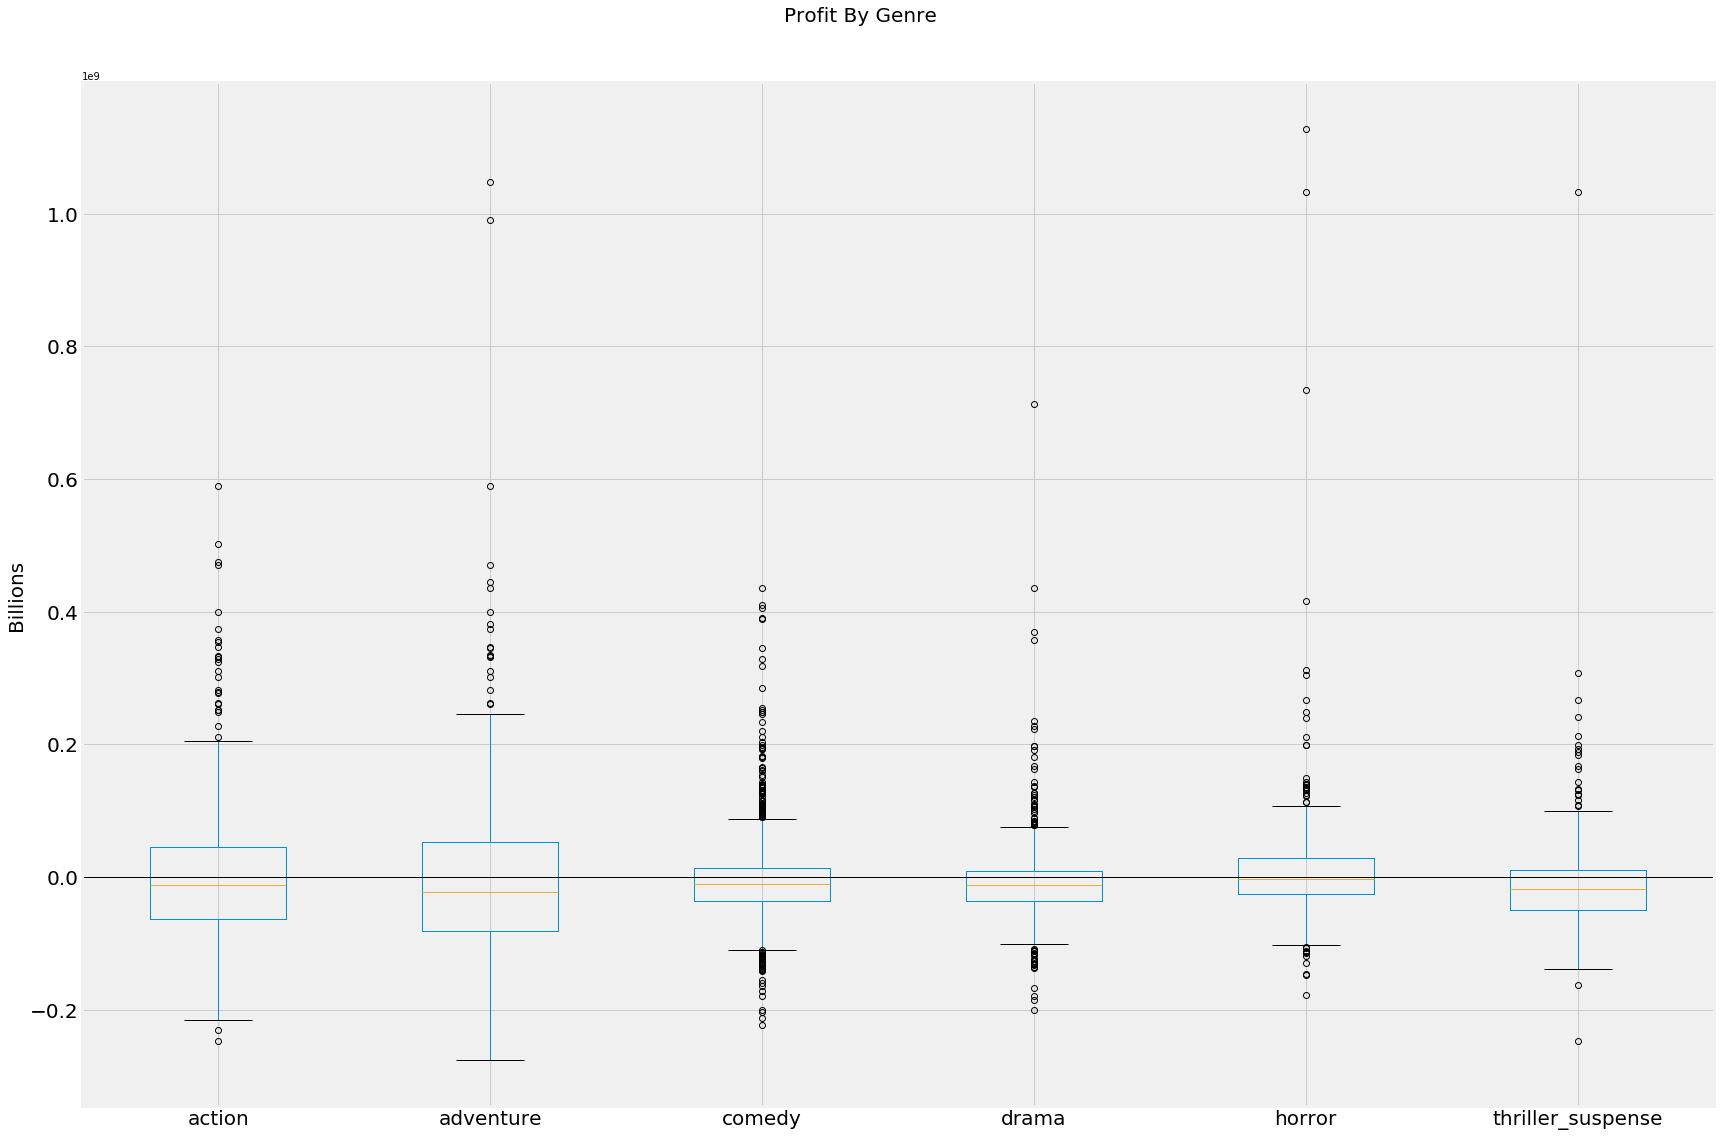

In [46]:
plot_boxplot(data=data, genres=genres, title='Profit By Genre', columns=profit_columns, starting_year=1970, y_label='Billions')

## Quick Takeaways

**Long right tails and negative medians!**
  - All genres have negative median profit.
  - All genres have those glorious right tails (meaning big earners), the mega-super-duper-blockbuster hits.
  - Comedy, Drama, and Horror have many mega-losers.

## Median Profits By Subgenre

In [47]:
def profit_by_subgenres(data, genres, aggregation_function='median', apply_function=lambda x: x / 1000000):
    sorted_genres = sorted([{'genre': genre, 'amount': (data[data[genre]]['profit'].agg(aggregation_function))} for genre in genres], key=lambda k: k['amount'], reverse=True)
    genres_list = [item['genre'] for item in sorted_genres]
    color_list = generate_color_list(colors_needed=1, order_list=genres_list)
    
    figure, axes = plt.subplots(nrows=6, ncols=1, figsize=(24, 54))
      
    for genre, color, axis in zip(genres_list, color_list, axes.flat): 
        overall_stat = data[data[genre]]['profit'].agg(aggregation_function) / 1000000
    
        (data[data[genre]].groupby('genres_mojo')['profit'].agg(aggregation_function).apply(apply_function).sort_values(ascending=False)).plot(kind='bar', ax=axis, color=color)

        axis.axhline(overall_stat, color='k', linewidth=1)
        axis.tick_params(labelsize=20)
        axis.set_xlabel('')
        axis.set_ylabel('Millions', fontsize=20)
        axis.set_title('{} Profit By {} Subgenres'.format(aggregation_function.title(), genre.title()), fontsize=20, y=1.02)
        axis.legend(['Overall {}: {:.1f}'.format(aggregation_function.title(), overall_stat)], loc=3, fontsize=20)
        autolabel(axis)
        
    plt.tight_layout()

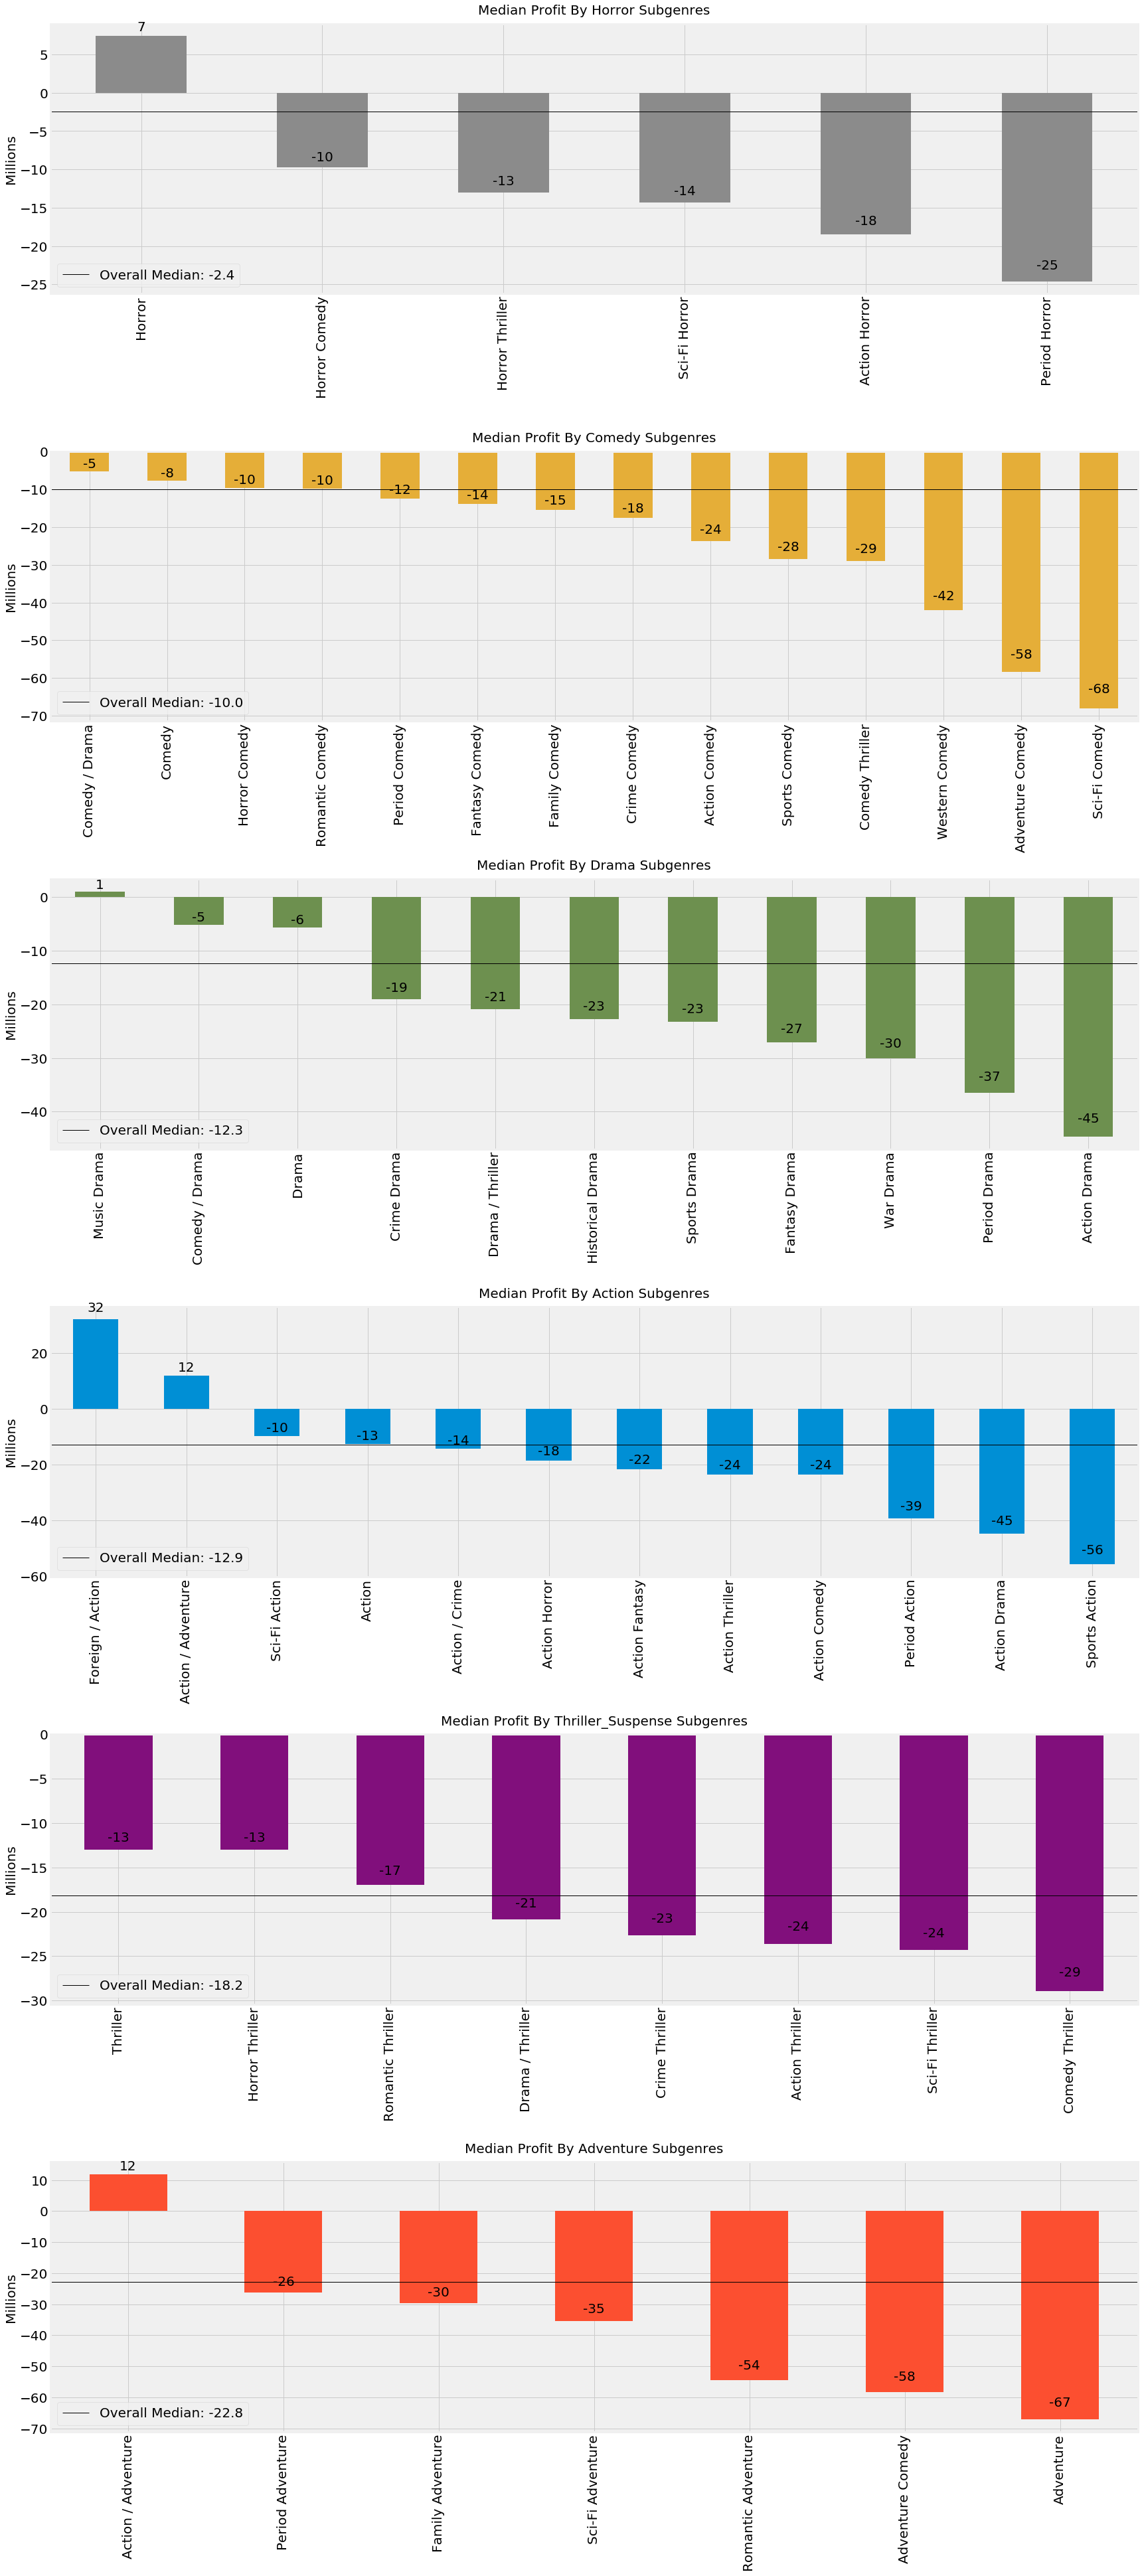

In [48]:
profit_by_subgenres(data=data, genres=genres, aggregation_function='median', apply_function=lambda x: x / 1000000)

## Quick Takeaways

**Movies are a tough business**
  - Just looking at the aggregate movie data we have, it seems like almost no genre is a safe bet.
  - No genre (when including all its subgenres) has a positive median profitability.
  - The only subgenres with a positive median profit are (in descending order) Foreign/Action, Action/Adventure, Horror, and Music Drama.

## Mean Profits By Subgenre

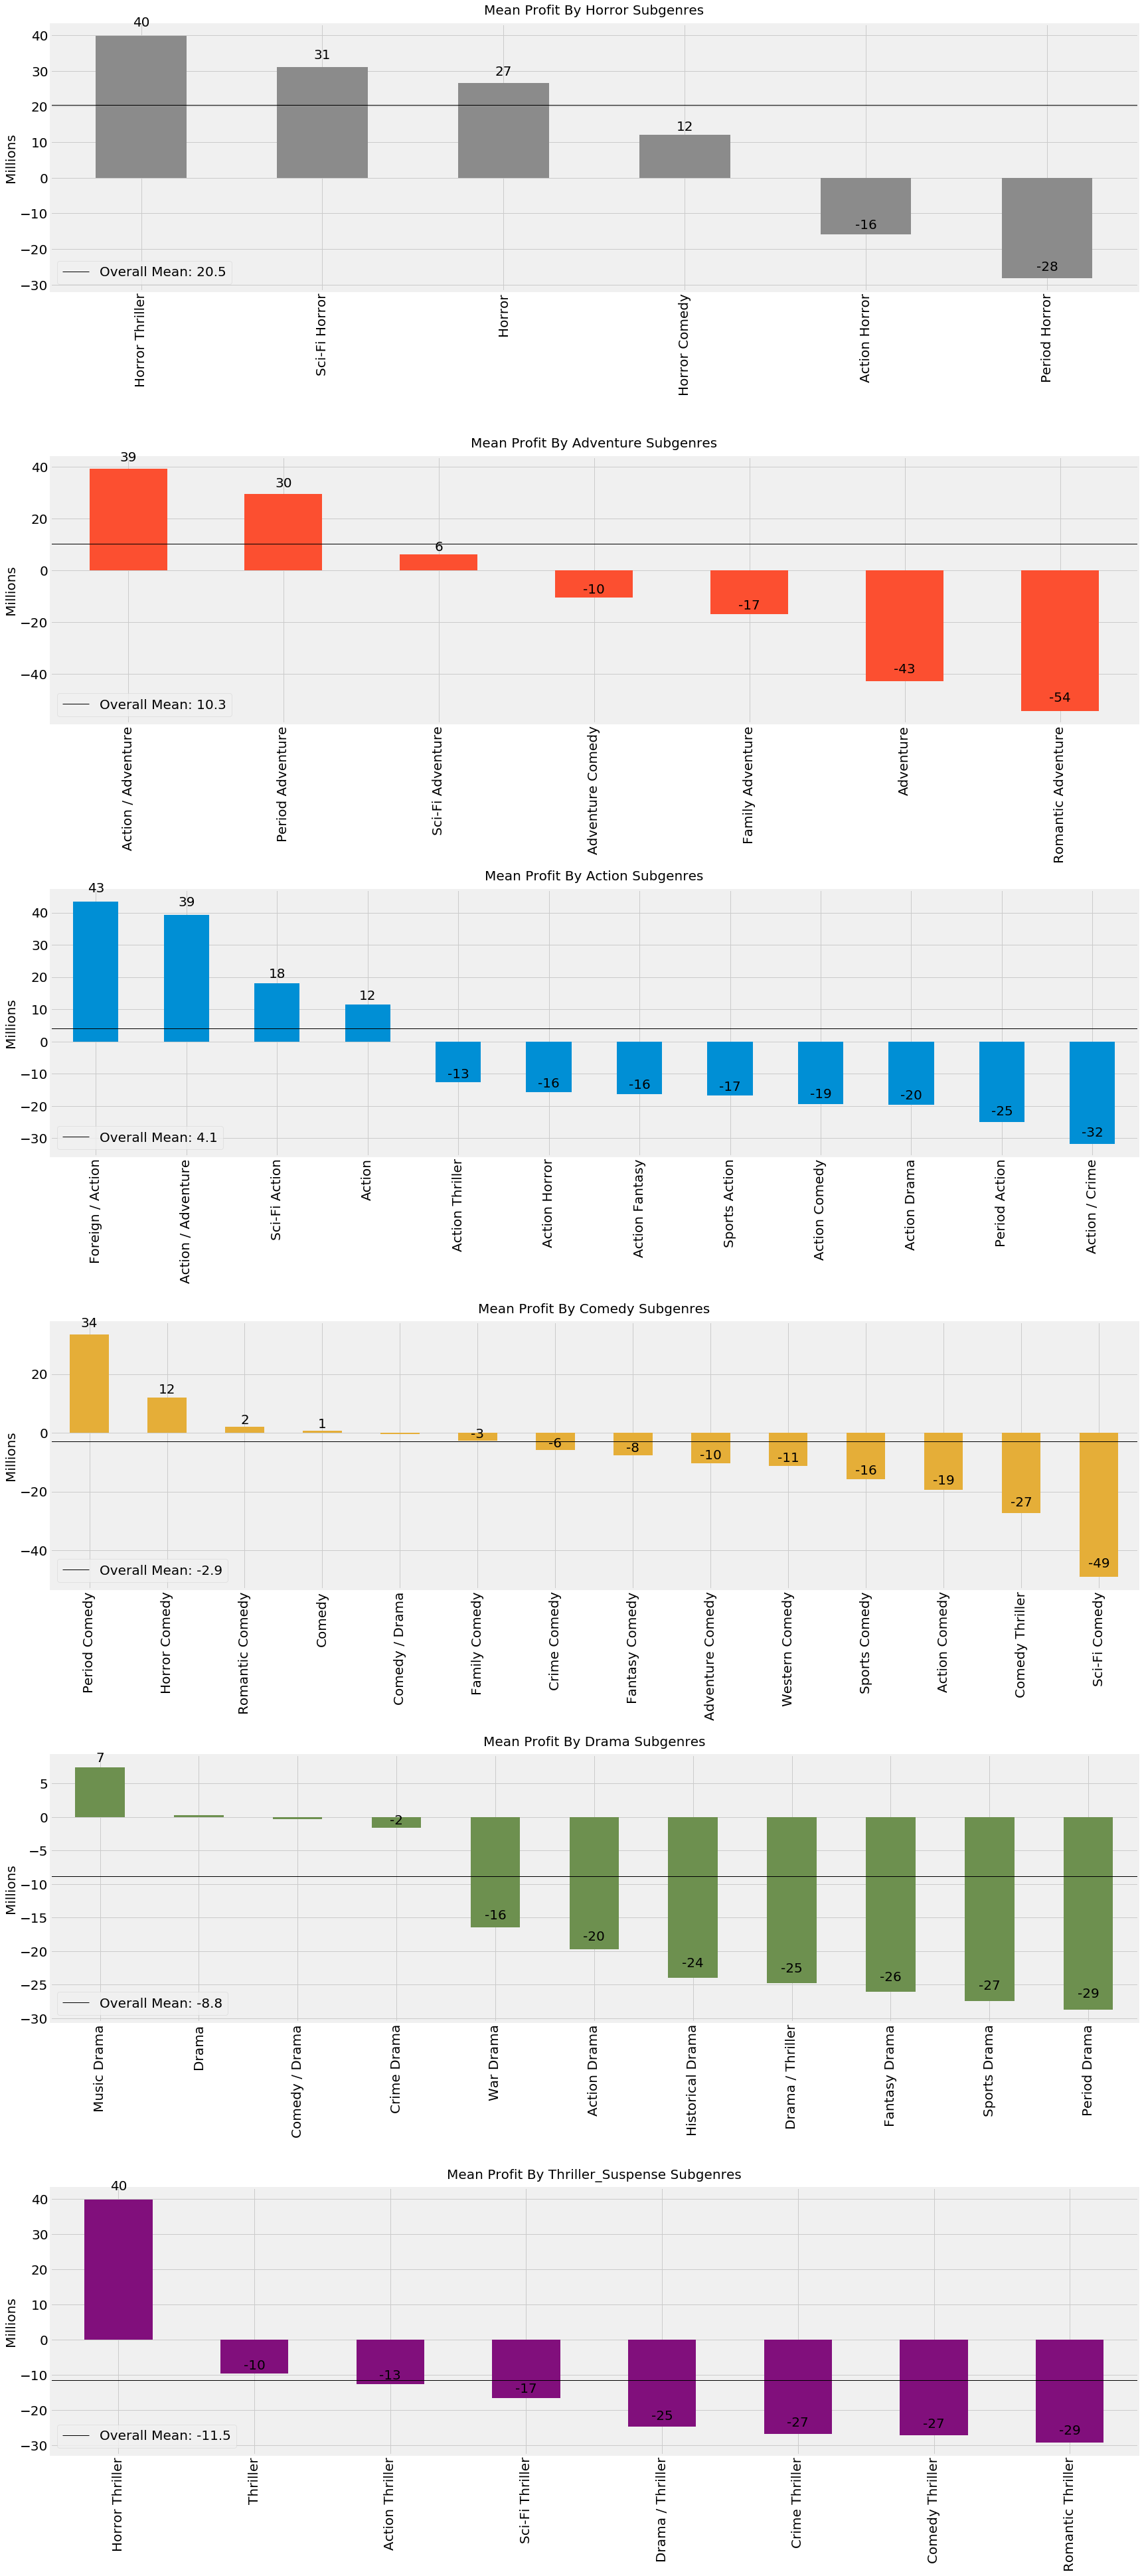

In [49]:
profit_by_subgenres(data=data, genres=genres, aggregation_function='mean', apply_function=lambda x: x / 1000000)

## Quick Takeaways

**The skew strongly affects the results**
  - If we look at mean profits instead of median, the results are much different.
  - Horror, Adventure, and Action are all profitable on the genre level.
  - In addition, many more subgenres are profitable historically.
  - This is the result of very high-earning movies drastically increasing the average return of other members of their subgenre.

## Earnings Divided By Expenses (Or Dollars Earned Per Dollar Spent)

Here's another way to measure how successful a genre is -- you look at the ratio of earnings to expenses.

In other words, for each movie we capture **(Worldwide Box Office / 2) / (1.5 * Production Budget)**.

Then for each genre, we can either add up all the results (i.e. see how the genre fares for every datapoint we have), take the median, or take the mean. 

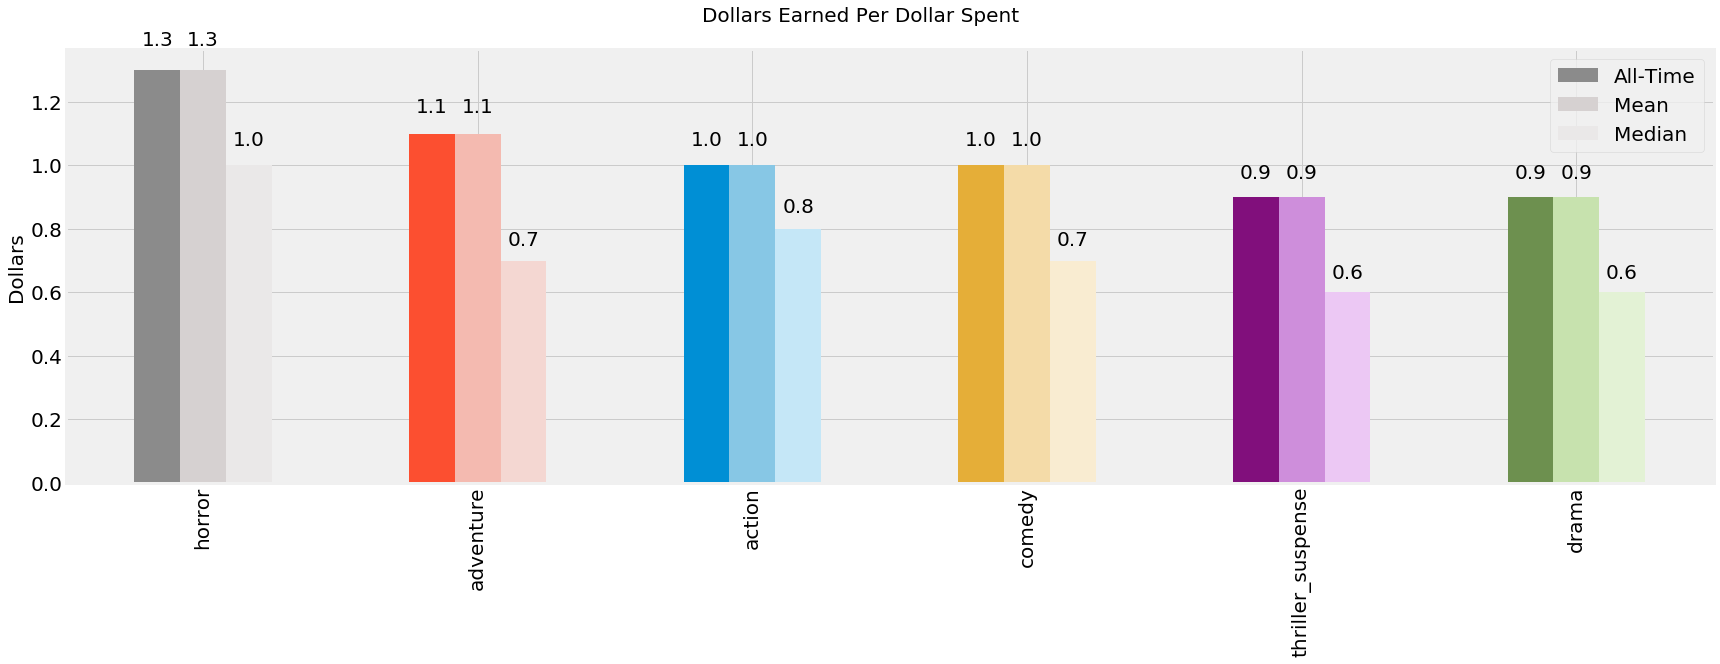

In [50]:
plot_summary_dataframe(summary=summary, sort_column='dollars_earned_for_dollars_spent', 
                       plot_columns=['dollars_earned_for_dollars_spent', 'mean_dollars_earned_for_dollars_spent', 'median_dollars_earned_for_dollars_spent'], 
                       title='Dollars Earned Per Dollar Spent', colors_needed=3, legend_needed=True, 
                       legend_text=['All-Time', 'Mean', 'Median'], y_label='Dollars', num_decimals=1)

## Quick Takeaways

**Mean versus Median is very important**
  - When directly using every single datapoint (`all-time` and `mean`), both Horror and Adventure are profitable.
  - However, when using only the median results, Horror is breakeven and all other genres lose money.
  - This is evidence of the power of those long right tails in blockbusters' earnings.

# Percentage Chance To Break Even

We can calculate the percentage chance a movie has to break even as another way to judge relative risk.

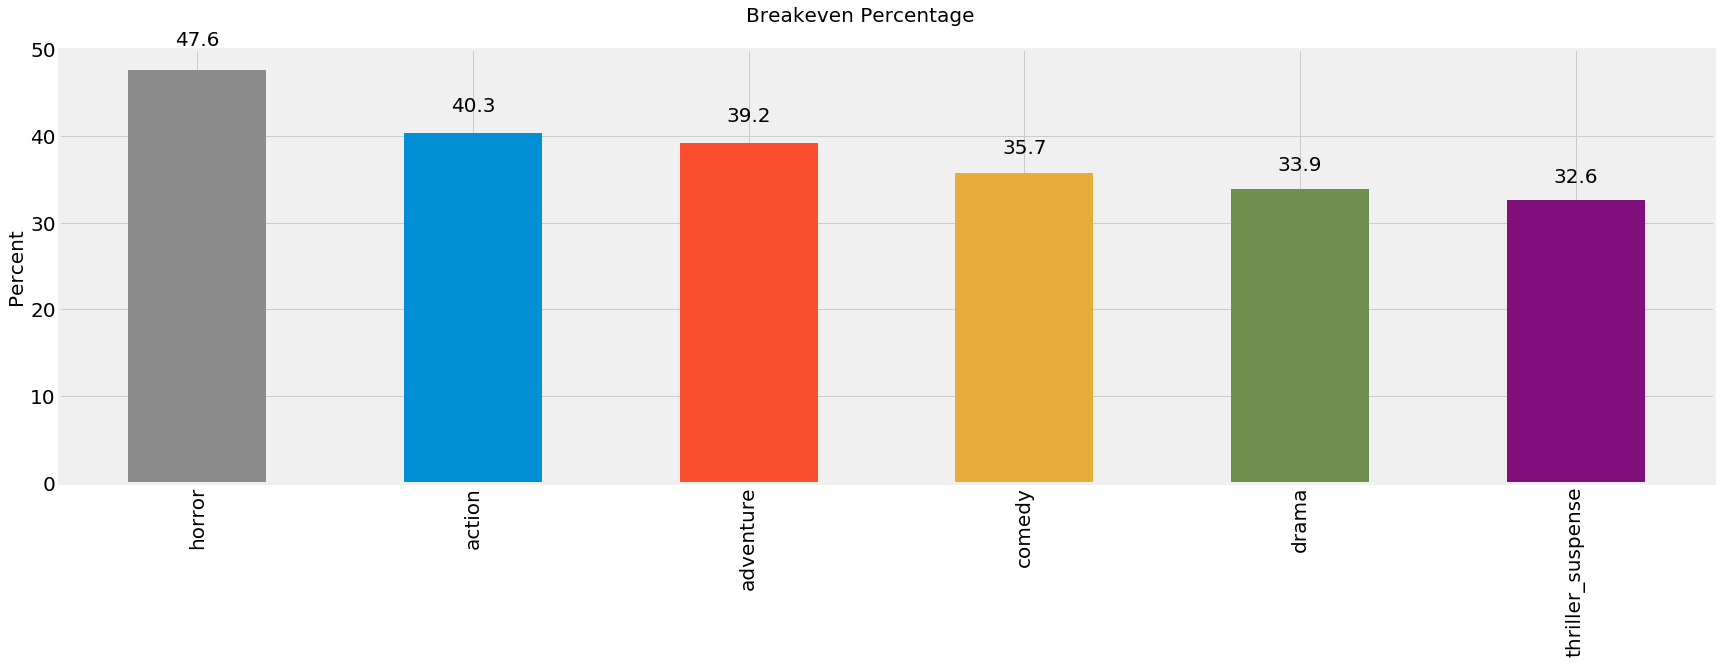

In [51]:
plot_summary_dataframe(summary=summary, sort_column='breakeven_percentage', plot_columns='breakeven_percentage', 
                       title='Breakeven Percentage', colors_needed=1, legend_needed=False, 
                       legend_text=[], y_label='Percent', num_decimals=1)

## Quick Takeaways

**Less than 50%**
  - No genre has a better than 50% chance of breaking even.
  - The least risky one just from a breakeven perpective is Horror.
  - The next least risky movies are Action and Adventure.

# If A Decision Must Be Made Now

This would be a difficult decision to make. 

Action, Comedy, and Adventure have made the most overall money worldwide. Action and Adventure have far higher median worldwide grosses than Comedy. Comedy must be making up for this with its higher numbers of movies released. However, Adventure and Action are the two most expensive genres to make, whereas Comedy is fourth.

The highest aggregate return for every dollar spent comes from Horror, then Adventure. 

The highest median return for every dollar spent comes from Horror, then Action.

The highest median profit per genre is Horror, then Comedy. (Note though that both these numbers are negative, since no genre has a positive median profit all-time.)

The genres with the lowest median budgets are Drama, then Horror, then Comedy.

Genres with the best chance to breakeven are Horror, then Action, then Adventure.

## A Few Strategies

### "Let's not lose money" strategy

If our bosses are all about capital preservation and are more risk-averse as opposed to reward-inclined, I would suggest Horror and Comedy.

Horror is one of the cheapest genres to produce and yet it has the highest median profit per genre. It also has the highest chance to break even. Our bosses could make around three Horror movies for the price of a single Action movie, or four Horror movies for the price of one Adventure movie. Horror's median gross of \\$94 million is well below Action's \\$206 million and Adventure's \\$257 million, but it would be a safer play.

Comedy has the second cheapest median budget and the second highest median profit. Historically, it is a solid genre, as it has earned in aggregate the second-most amount of box office dollars (behind only Action). It tends to have a ceiling in terms of box office gross (only one Comedy has ever earned \\$1 billion at the box office, Forrest Gump), but it's a reliable bet given it's much lower budget compared to big fare like Action and Adventure.

### "Swing for the fences" strategy

If our bosses really care about releasing those mega blockbusters and risk be damned, then we all know they're talking about Action and Adventure, the kings of the right tails. 16 of the top 20 all-time highest grossing movies are in one of those two genres. Three of the other four are in the Horror genre.

I would suggest sticking to those three genres.

## Disclaimer

There are a lot of reasons why studios prefer to make certain genres over others. After all, it's tough to make theme park rides based on Drama and Comedy movies. This analysis assumes we only care about how much money a movie makes at the box office.

## Let's Keep Digging

So far, we have only analyzed these genres in aggregate. 

Our bosses want more pinpoint accuracy. Which genres are the hottest right now? Which genres perform the best during which parts of the year?

So we've got more digging to do, and we'll next look for trends by Release Decade and Release Week. 

# Performance By Decade

We will now dive into the performance of movies by decade of release.

- 15.1 Create a custom function to facilitate plotting by time as well as a statistic.
- 15.2 Look at how the number of movies released has changed over time for all genres.
- 15.3 Summarize our findings.
- 15.4 Look at how worldwide box office grosses have changed over time for all genres. 
- 15.5 Look at how production budgets have changed over time for all genres. 
- 15.6 Summarize our findings.
- 15.7 Look at how profits have changed over time for all genres.
- 15.8 Summarize our findings.
- 15.9 Look at how the breakeven percentages have changed over time for all genres.
- 15.10 Summarize our findings.
- 15.11 Look at how worldwide box office grosses have changed over time for the subgenres of our main genres.

## Create Custom Function To Plot By Time As Well As A Statistic

Up until now, we haven't been looking at our data from a time perspective. We have only been looking at movies by genre.

It's time to look at our data by genre and by decade.

To make graphing easier, we create a custom function to help us do this.

In [52]:
def plot_by_time_and_stat(data, genres, title, groupby_column, stat_columns, aggregate_function, apply_needed=False, apply_function=None, y_label='', y_ticks_needed=False, y_ticks='', legend_needed=True, legend_text=genres, color=colors, axhline_needed=False, axhline_value='', autolabel_needed=False, num_decimals=0):
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24,9))
    figure.suptitle(title, fontsize=20)
    
    if apply_needed: 
        data.groupby(groupby_column)[stat_columns].agg(aggregate_function).apply(apply_function).plot(kind='bar', ax=axis, color=color)
    else: 
        data.groupby(groupby_column)[stat_columns].agg(aggregate_function).plot(kind='bar', ax=axis, color=color)
        
    axis.set_xlabel('')
    axis.set_ylabel(y_label, fontsize=20)
    axis.tick_params(labelsize=20)
    
    if legend_needed: 
        axis.legend(legend_text, loc='best', fontsize=15)
    
    if y_ticks_needed:
        axis.set_yticks(y_ticks)
        
    if axhline_needed:
        axis.axhline(axhline_value, color='k', linewidth=1)
        
    if autolabel_needed:
        autolabel(axis, num_decimals=num_decimals)

## Number of movies

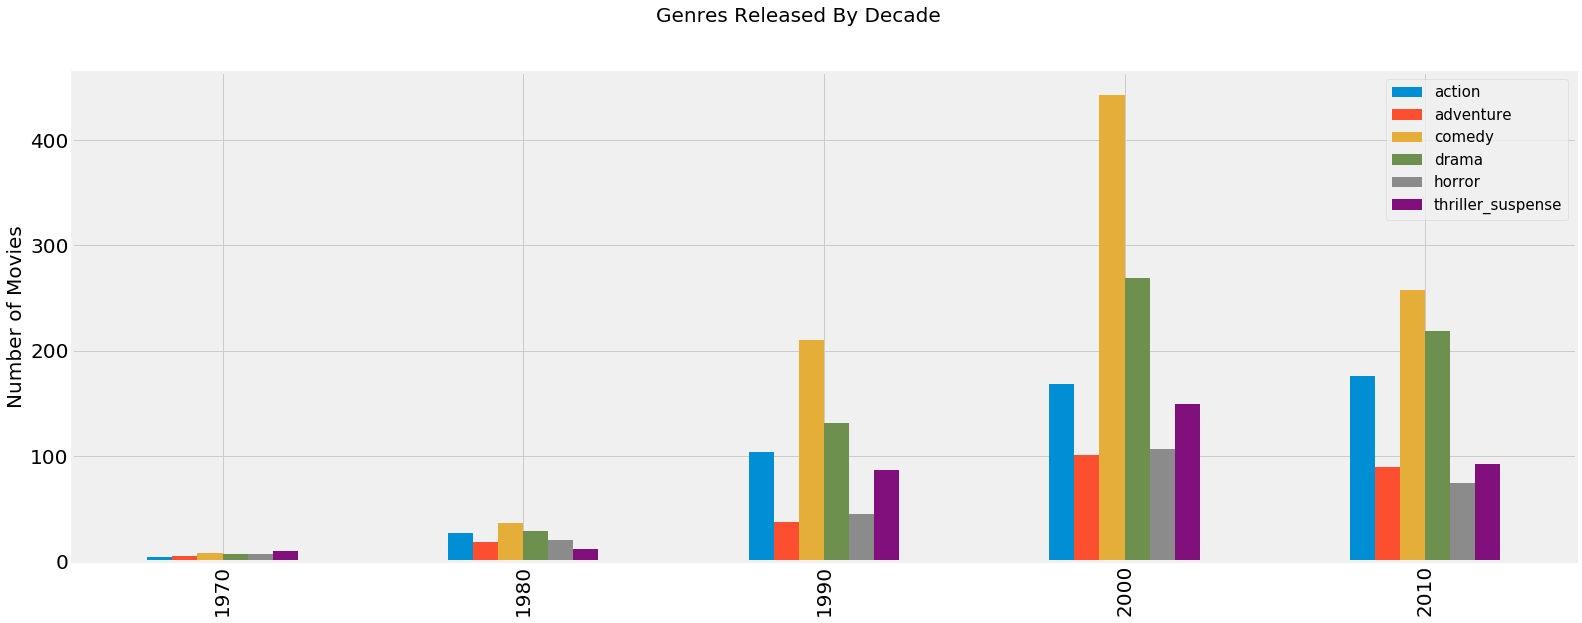

In [53]:
plot_by_time_and_stat(data=data, genres=genres, title='Genres Released By Decade', 
                      groupby_column='release_decade', stat_columns=genres, aggregate_function='sum', 
                      apply_needed=False, apply_function=None, y_label='Number of Movies', y_ticks_needed=False, y_ticks='')

## Quick Takeaways

**1970s to 2000s**
  - We see huge increases in the number of movies released per genre.
  - Comedy and Drama are the most produced genres from then to the present by a wide margin.
  
**2000s to 2010s**
  - We see a reduction in the number of movies released for all genres except Action. 
  
**Fewer movies made now**
- Our gut should tell us movies are not as profitable now as they used to be because the Big Five release far fewer movies now than they did in the 2000s.

## Grosses

### Not Separated By Genre

We will look at a couple graphs to get a sense of our movies without separating them by genre.

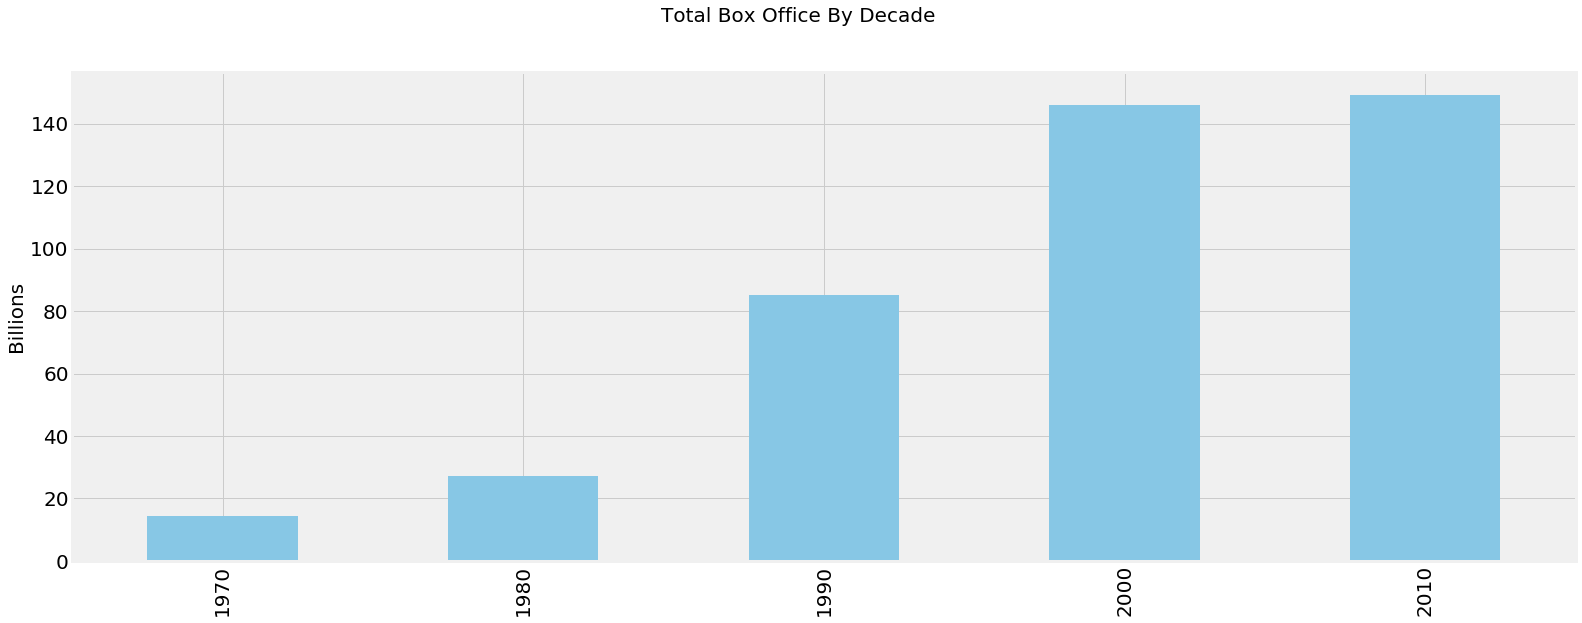

In [54]:
plot_by_time_and_stat(data=data, genres=genres, title='Total Box Office By Decade', 
                      groupby_column='release_decade', stat_columns='worldwide_adj', 
                      aggregate_function='sum', apply_needed=True, apply_function=lambda x: x / 1000000000, 
                      y_label='Billions', y_ticks_needed=False, y_ticks='', legend_needed=False, 
                      legend_text='', color=genres_dict['action']['color2'])

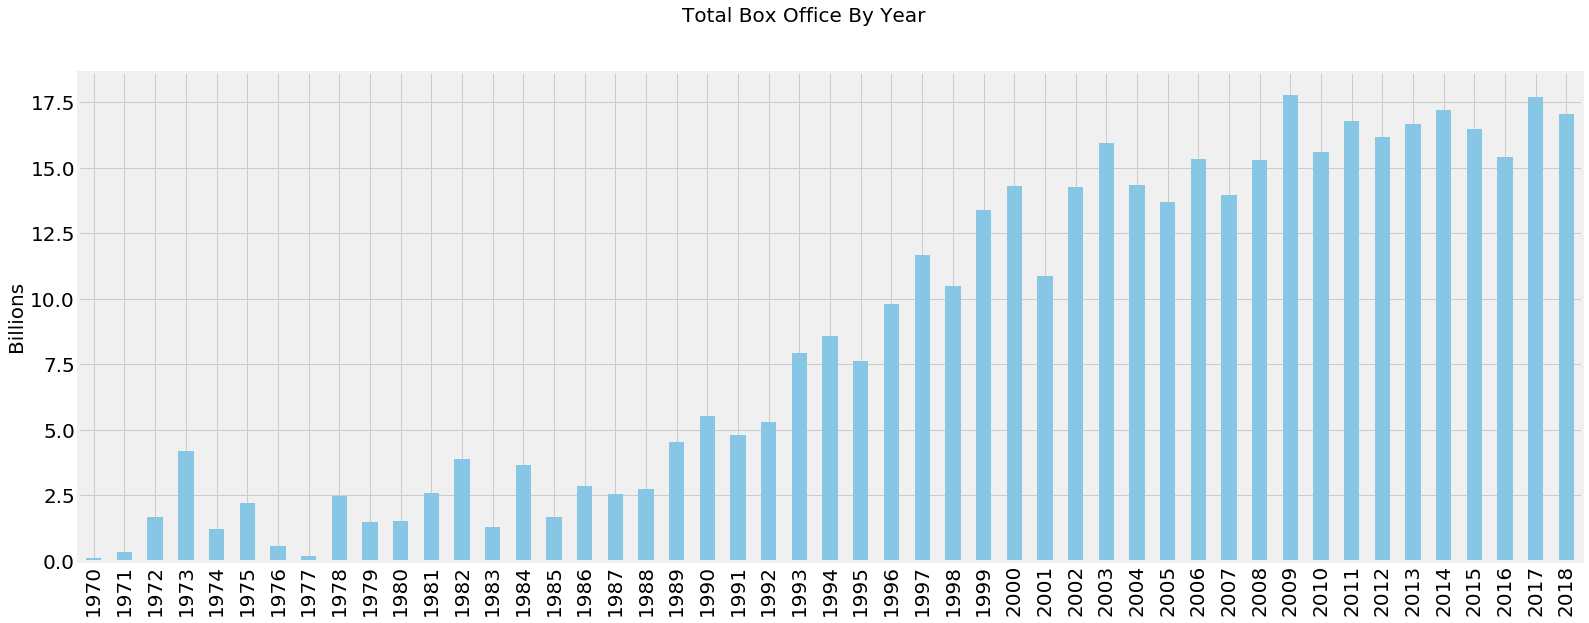

In [55]:
plot_by_time_and_stat(data=data, genres=genres, title='Total Box Office By Year', 
                      groupby_column='release_year', stat_columns='worldwide_adj', 
                      aggregate_function='sum', apply_needed=True, apply_function=lambda x: x / 1000000000, 
                      y_label='Billions', y_ticks_needed=False, y_ticks='', legend_needed=False, 
                      legend_text='', color=genres_dict['action']['color2'])

### Separated By Genre

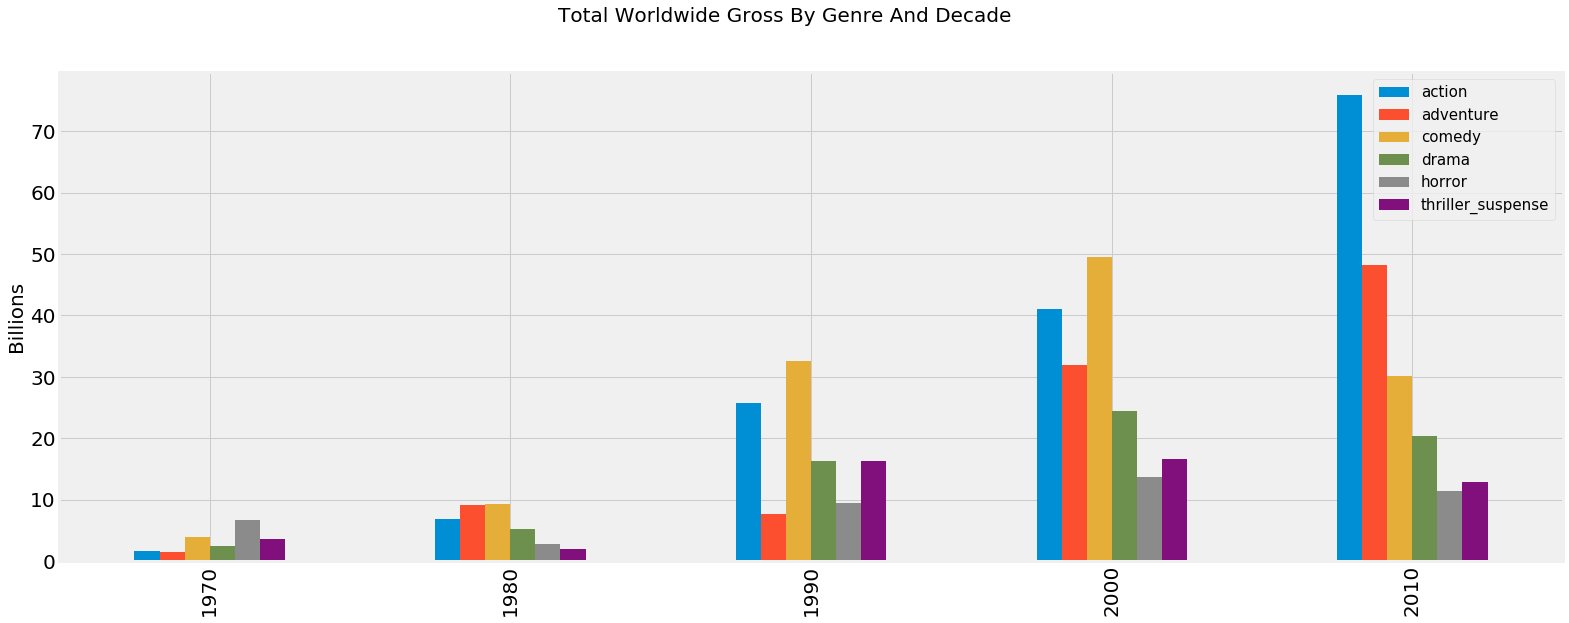

In [56]:
plot_by_time_and_stat(data=data, genres=genres, title='Total Worldwide Gross By Genre And Decade', groupby_column='release_decade', stat_columns=gross_columns, aggregate_function='sum', apply_needed=True, apply_function=lambda x: x / 1000000000, y_label='Billions', y_ticks_needed=False, y_ticks='')

In [57]:
# Create custom function to determine the background color for labeling the genre with the highest stat per decade
def find_genre_for_background_color(groupby_instance, decade):
    column_name_list = groupby_instance.loc[decade].sort_values(ascending=False).index[0].split('_')
    
    # Check if the split string has length 4, if so it is thriller_suspense and requires extra filtering
    # The reason is our genres are 'action', 'adventure', 'comedy', 'drama', 'horror', and 'thriller_suspense'
    # Our worldwide stat column names have the following form: worldwide_(stat name)_genre
    # Thus five of our six genres will have length 3 when split on '_', but 'thriller_suspense' will have length 4
    if len(column_name_list) == 4:
        return '_'.join(column_name_list[-2:])
    
    # If the genre is not 'thriller_suspense', we just need the last word in the list
    return column_name_list[-1]

In [58]:
# Create a stacked bar plot of a stat by genre for each year, highlighting the genre with the highest value in each decade 
def plot_stat_by_year_and_highlight_decade_winner(data, genres, title, stat_columns, aggregation_function, apply_function=None, y_label=''):
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24, 9))
    figure.suptitle(title, fontsize=20, y=1.05)

    # Determine background colors for each decade
    grp = data.groupby('release_decade')[stat_columns].agg(aggregation_function)
    bg_1970 = genres_dict[find_genre_for_background_color(grp, 1970)]['color1']
    bg_1980 = genres_dict[find_genre_for_background_color(grp, 1980)]['color1']
    bg_1990 = genres_dict[find_genre_for_background_color(grp, 1990)]['color1']
    bg_2000 = genres_dict[find_genre_for_background_color(grp, 2000)]['color1']
    bg_2010 = genres_dict[find_genre_for_background_color(grp, 2010)]['color1']

    # Set up plot
    grp = data.groupby('release_year')[stat_columns].agg(aggregation_function).apply(apply_function)
    grp.plot(kind='bar', stacked=True, ax=axis)
    axis.set_ylabel(y_label, fontsize=20)
    axis.set_xlabel('')
    axis.tick_params(labelsize=20)
    axis.legend(genres, fontsize=20)
    axis.axvspan(0, 10, color=bg_1970, alpha=0.2)
    axis.axvspan(10, 20, color=bg_1980, alpha=0.2)
    axis.axvspan(20, 30, color=bg_1990, alpha=0.2)
    axis.axvspan(30, 40, color=bg_2000, alpha=0.2)
    axis.axvspan(40, 50, color=bg_2010, alpha=0.2)
    axis.axvline(10, color='k', alpha=0.2)
    axis.axvline(20, color='k', alpha=0.2)
    axis.axvline(30, color='k', alpha=0.2)
    axis.axvline(40, color='k', alpha=0.2)

    plt.tight_layout()

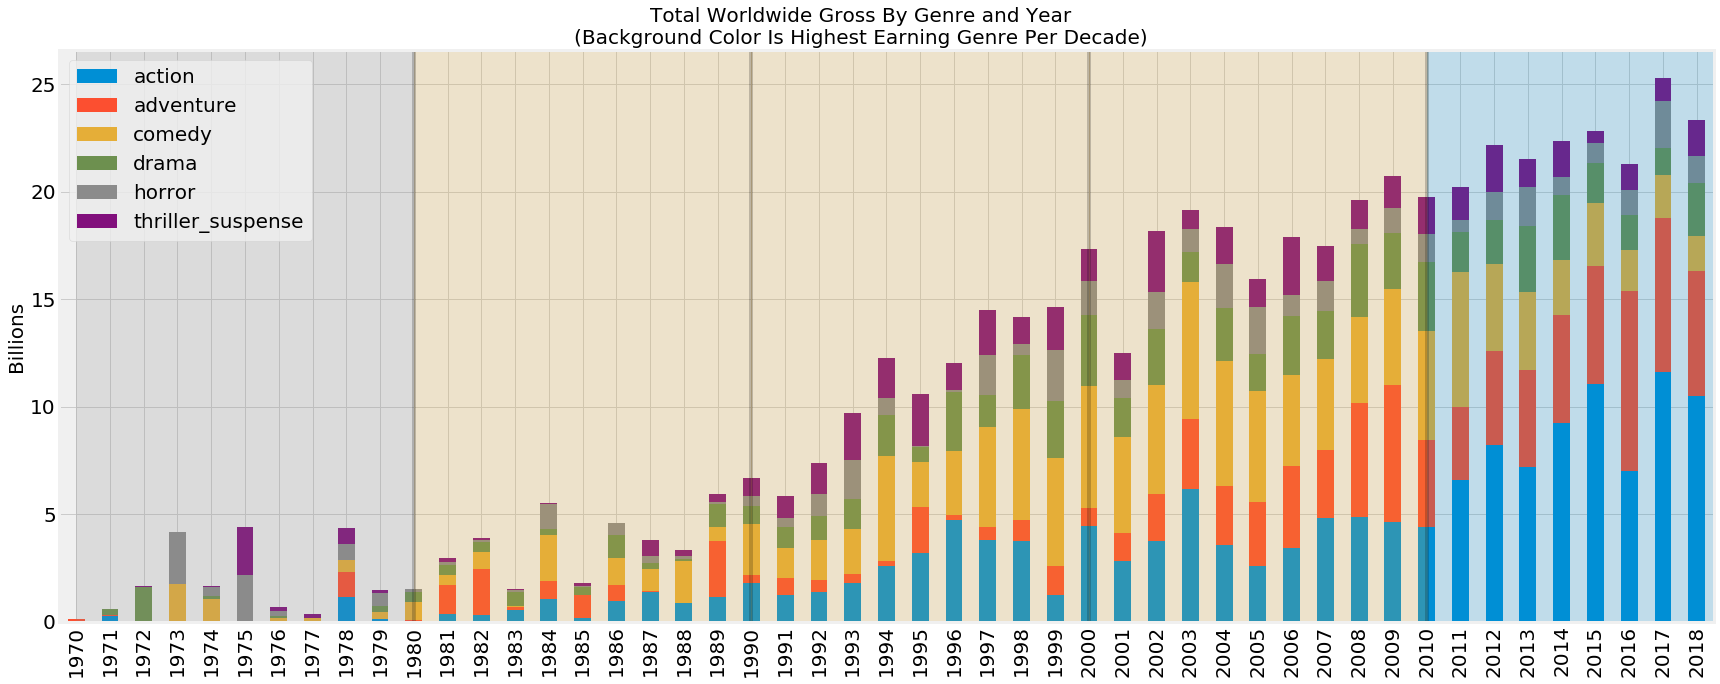

In [59]:
plot_stat_by_year_and_highlight_decade_winner(data=data, genres=genres, 
                                              title='Total Worldwide Gross By Genre and Year\n(Background Color Is Highest Earning Genre Per Decade)', 
                                              stat_columns=gross_columns, aggregation_function='sum',
                                              apply_function=lambda x: x / 1000000000, y_label='Billions')

### Quick Takeaways

**Box office increasing at a slower rate**
  - Decade by decade, the global box office revenue is increasing, but its rate of growth has slowed down.
  - Action and Adventure have increased their overall gross every decade since the 1980s.
  - Horror was the highest grossing genre in the 1970s.
  - Comedy was the highest grossing genre for the 1980s, 1990s, and 2000s.
  - Comedy had a big jump from the 1990s to 2000s, but has contracted in the 2010s.
  - Action is the highest grossing genre in the 2010s.
  - Drama, Horror, and Thriller/Suspense seem flat from the 2000s to 2010s.
  
**Note**
  - This graph shows higher global box office numbers than the 'Total Box Office By Year' graph above. This is due to how we count a movie multiple times if it has multiple genres. For example, an Action/Adventure movie would count as both an Action movie and an Adventure movie. Thus, the box office results for that movie would be reported twice when we subdivide by genre.

### Mean and Median Gross

In [60]:
def plot_mean_and_median_by_time_and_stat(data, genres, groupby_column, stat_columns, stat_name_for_title, apply_needed=False, apply_function=None, y_label='', y_ticks_needed=False, y_ticks='', axhline_needed=False, axhline_value=''):
    figure, (axis1, axis2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(24, 16))
    
    if apply_needed: 
        data.groupby(groupby_column)[stat_columns].agg('mean').apply(apply_function).plot(kind='bar', ax=axis1)
        data.groupby(groupby_column)[stat_columns].agg('median').apply(apply_function).plot(kind='bar', ax=axis2)
    else:
        data.groupby(groupby_column)[stat_columns].agg('mean').plot(kind='bar', ax=axis1)
        data.groupby(groupby_column)[stat_columns].agg('median').plot(kind='bar', ax=axis2)
    
    axis1.set_ylabel(y_label, fontsize=20)
    
    if y_ticks_needed:
        axis1.set_yticks(y_ticks)
        axis2.set_yticks(y_ticks)
        
    axis1.set_xlabel('')
    axis1.tick_params(labelsize=20)
    axis1.legend(genres, fontsize=20)
    axis1.set_title('Mean {} By Genre And Decade'.format(stat_name_for_title), fontsize=20, y=1.02)

    axis2.set_ylabel(y_label, fontsize=20)
    axis2.set_xlabel('')
    axis2.tick_params(labelsize=20)
    axis2.legend(genres, fontsize=20)
    axis2.set_title('Median {} By Genre And Decade'.format(stat_name_for_title), fontsize=20, y=1.02)
    
    if axhline_needed:
        axis1.axhline(axhline_value, color='k', linewidth=1)
        axis2.axhline(axhline_value, color='k', linewidth=1)

    plt.tight_layout()

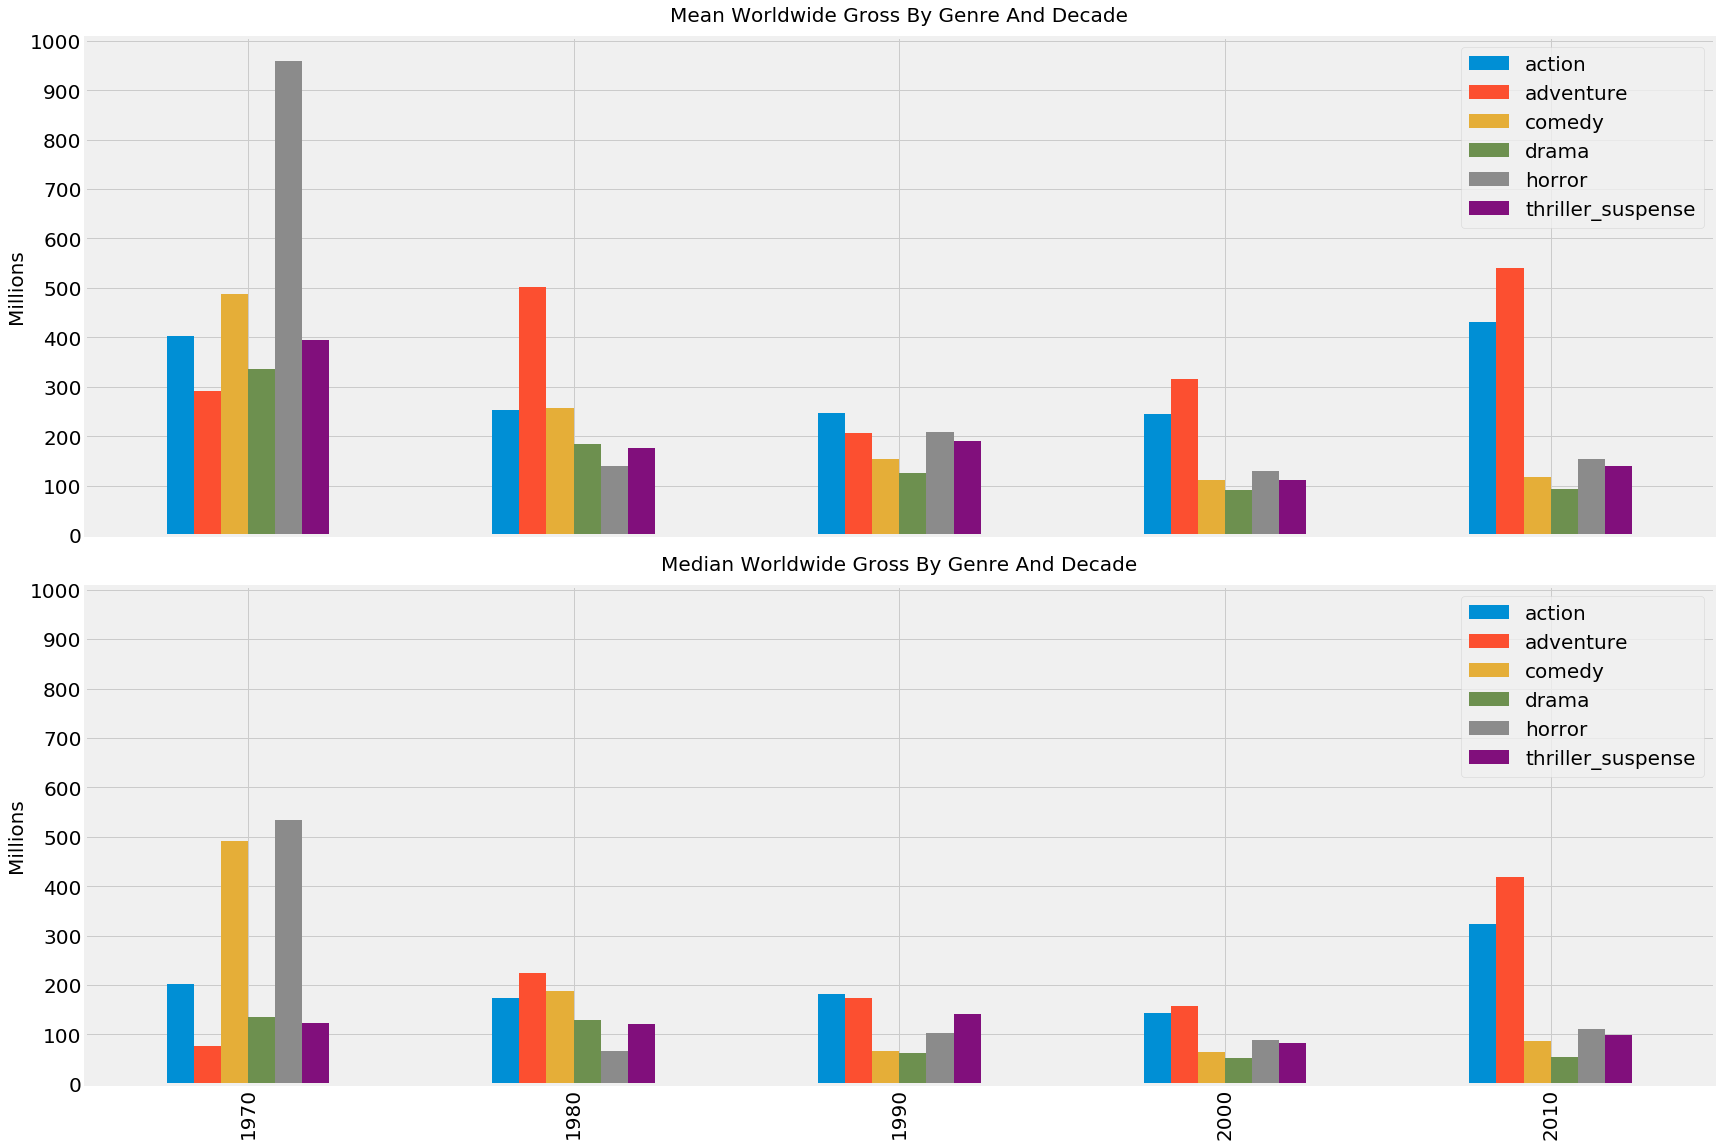

In [61]:
plot_mean_and_median_by_time_and_stat(data=data, genres=genres, groupby_column='release_decade', 
                                      stat_columns=gross_columns, stat_name_for_title='Worldwide Gross', 
                                      apply_needed=True, apply_function=lambda x: x / 1000000, 
                                      y_label='Millions', y_ticks_needed=True, y_ticks=range(0, 1100, 100))

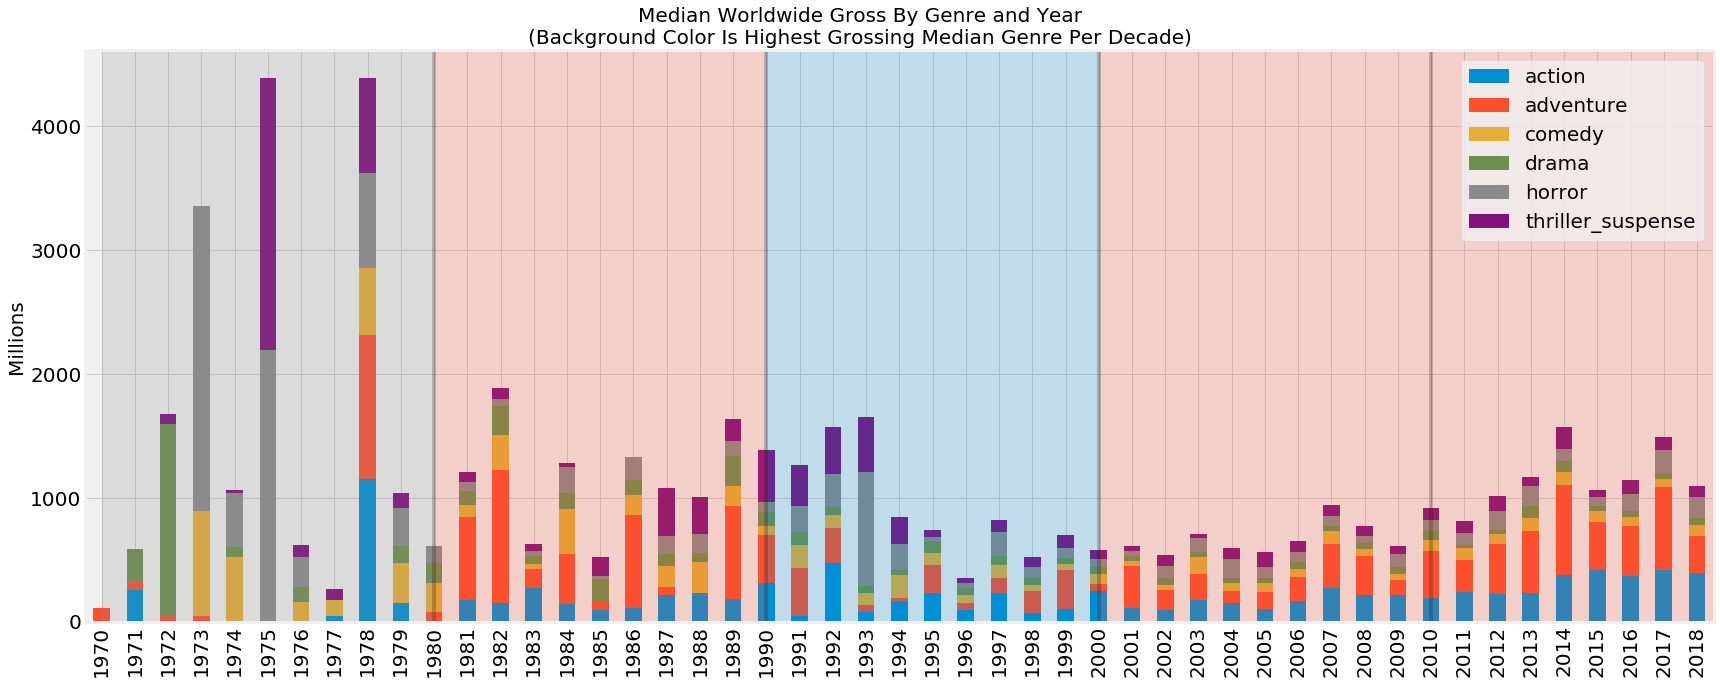

In [62]:
plot_stat_by_year_and_highlight_decade_winner(data=data, genres=genres, 
                                              title='Median Worldwide Gross By Genre and Year\n(Background Color Is Highest Grossing Median Genre Per Decade)', 
                                              stat_columns=gross_columns, aggregation_function='median',
                                              apply_function=lambda x: x / 1000000, y_label='Millions')

### Quick Takeaways

**Contracting period, then expanding period**
  - We see an overall contraction in mean/median gross by decade from the 1980s to the 2000s. The exceptions are Action, Horror, and Thriller/Suspense having median increases from the 1980s to the 1990s, but then falling in the 2000s like the other genres.  
  - From the 2000s to the 2010s, Action and Adventure's median grosses have more than doubled.
  - From the 2000s to the 2010s, Comedy, Horror, and Thriller/suspense all have double digit median gross increases.
  - Drama has the smallest increase in the last decade, only 6.4% median gross increase.
  
**Median gross change from 2000s to 2010s ranked from highest to lowest**
  - Adventure:         &#0036;261 million    -- 165.0%
  - Action:            &#0036;180.9 million  -- 126.3%
  - Comedy:            &#0036;22.8 million   -- 35.3%
  - Horror:            &#0036;21.1 million   -- 23.6%
  - Thriller/Suspense: &#0036;16.3 million   -- 19.7%
  - Drama:             &#0036;3.3 million    -- 6.4%
  
**Highest median gross by decade**
  - 1970s: Horror
  - 1980s: Adventure
  - 1990s: Action
  - 2000s: Adventure
  - 2010s: Adventure

In [63]:
def one_stat_over_time_in_separate_graphs(data, genres, title, figsize, colors, groupby_column, stat_column, aggregation_function, starting_year=1970, apply_needed=False, apply_function=None, xtick_values='', y_label='', axhline_needed=False, axhline_value=''):
    figure, axes = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=True, figsize=figsize)
    figure.suptitle(title, fontsize=20, y=1.02)

    for genre, axis, color in zip(genres, axes.flat, colors):    
        # Create a series with decades as indexes and median budget as values
        
        if apply_needed:
            (data[(data[genre]) & (data['release_year'] >= starting_year)].groupby(groupby_column)[stat_column].agg(aggregation_function).apply(apply_function)).sort_index(ascending=True).plot(kind='bar', xticks=xtick_values, ax=axis, linewidth=3, color=color)
        else:
            (data[(data[genre]) & (data['release_year'] >= starting_year)].groupby(groupby_column)[stat_column].agg(aggregation_function)).sort_index(ascending=True).plot(kind='bar', xticks=xtick_values, ax=axis, linewidth=3, color=color)
                
        axis.set_ylabel(y_label, fontsize=20)
        axis.tick_params(labelsize=20)
        axis.set_xlabel('')
        axis.legend([genre], loc=2, fontsize=15)
        autolabel(axis)
        
        if axhline_needed:
            axis.axhline(axhline_value, color='k', linewidth=1)

    plt.tight_layout()

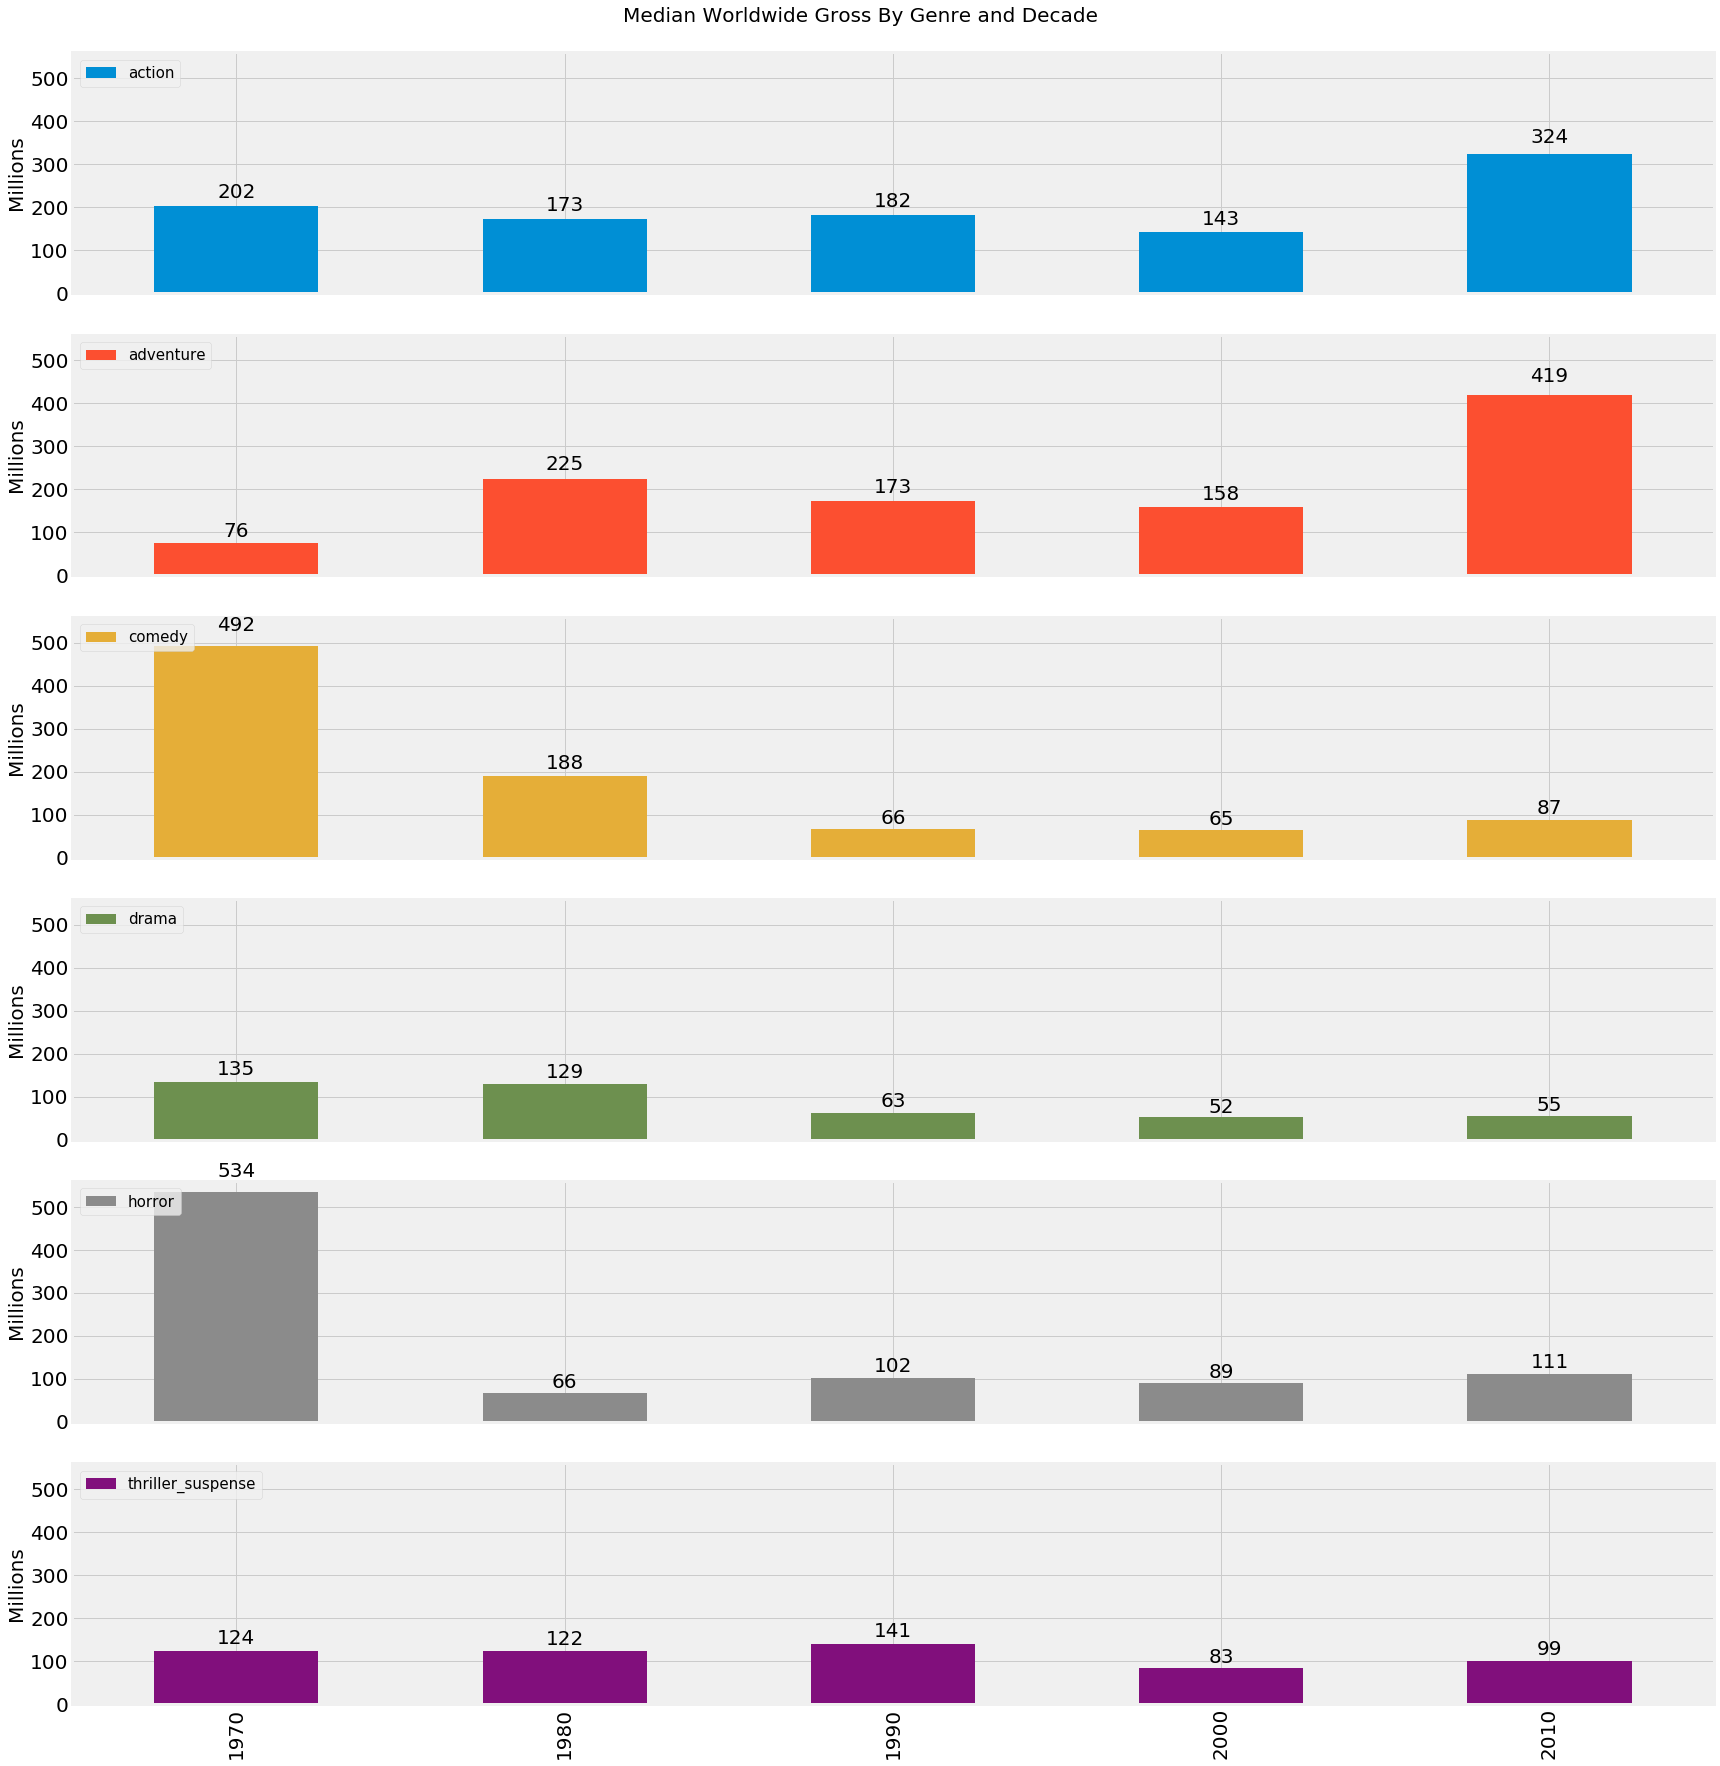

In [64]:
one_stat_over_time_in_separate_graphs(data=data, genres=genres, title='Median Worldwide Gross By Genre and Decade', figsize=(24,24), 
                                      colors=colors, groupby_column='release_decade', stat_column='worldwide_adj', 
                                      aggregation_function='median', apply_needed=True, apply_function=lambda x: x / 1000000, 
                                      xtick_values=range(1970, 2020, 10), y_label='Millions', axhline_needed=False, axhline_value='')    

### Quick Takeaways:

**1990s to 2000s**
  - Every genre saw a reduction in median gross from the 1990s to 2000s.
  - This reduction coincided with a huge increase in the number of movies released per genre.
  
**2000s to 2010s**
  - Every genre has seen an increase in median gross from the 2000s to 2010s.
  - Except for Action, this has coincided with a decrease in the number of movies per genre.
  - Action and Adventure's median grosses have more than doubled from the 2000s to 2010s!

**Horror**
  - Horror has the third highest median gross with &#0036;110 million.

## Budgets

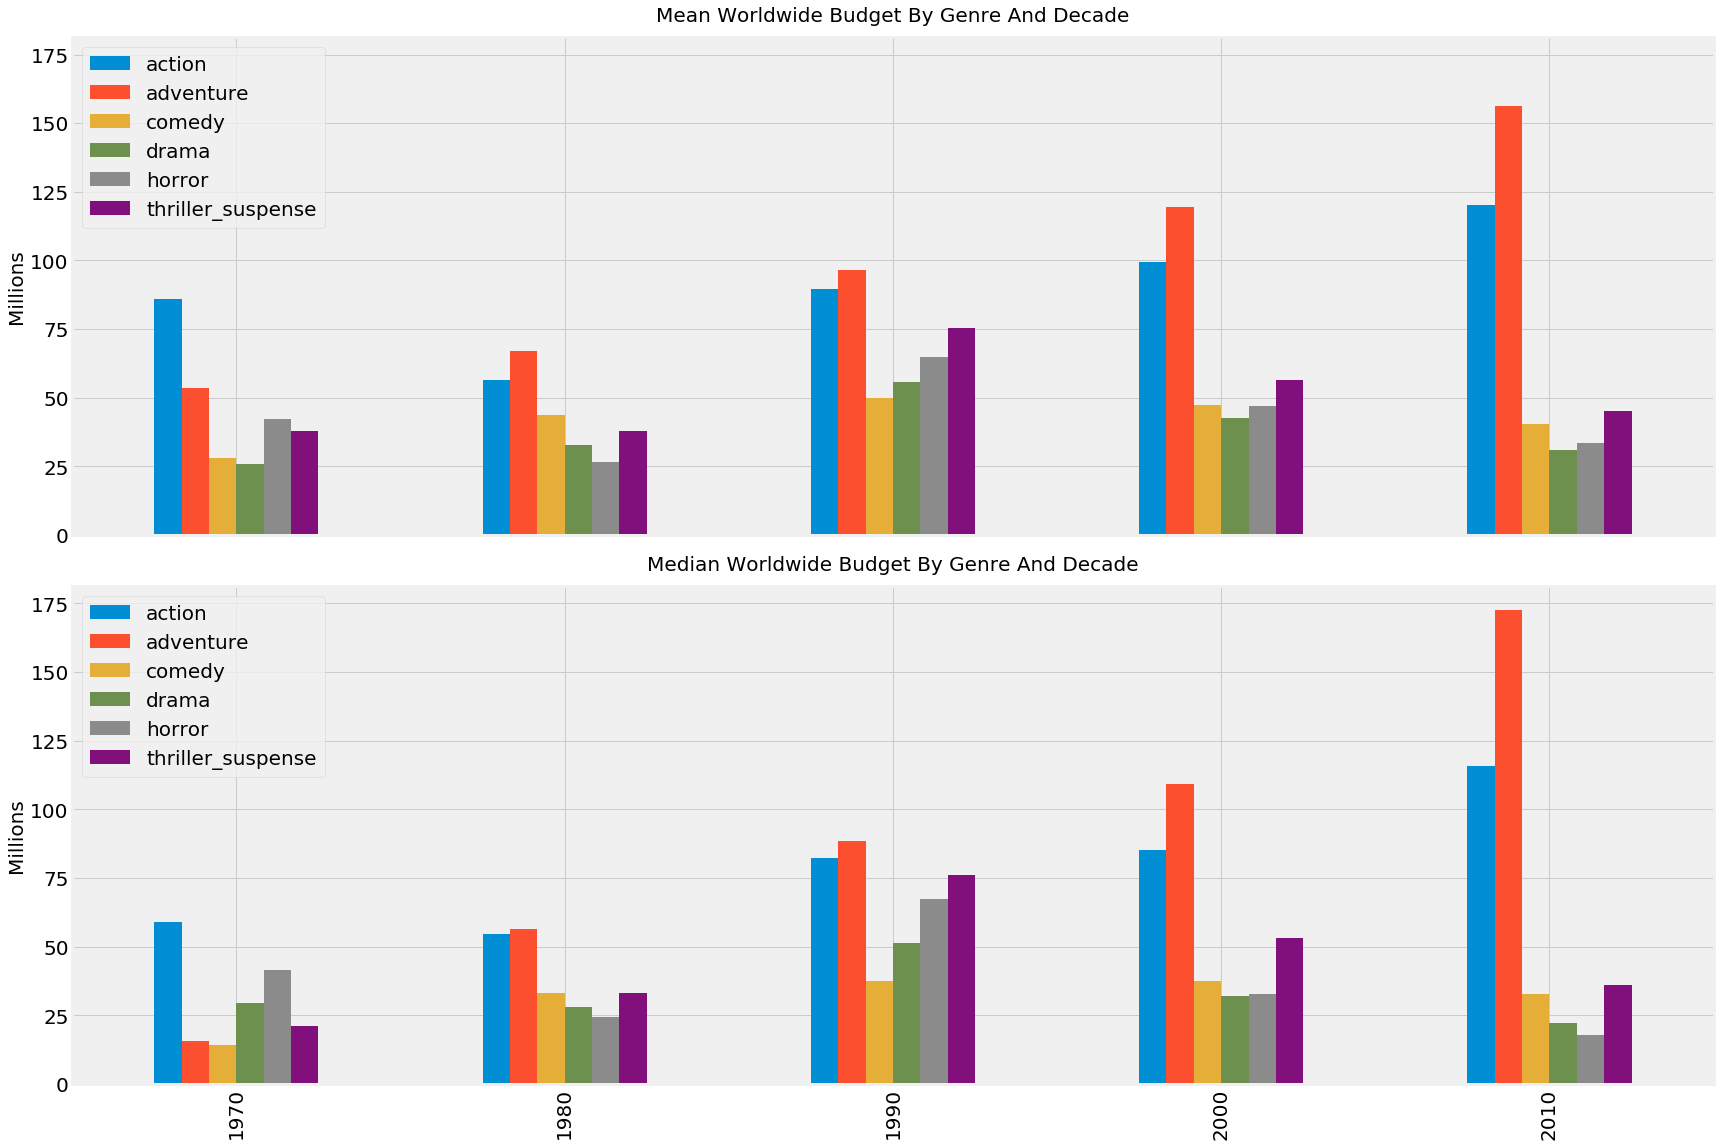

In [65]:
plot_mean_and_median_by_time_and_stat(data=data, genres=genres, groupby_column='release_decade', 
                                      stat_columns=budget_columns, stat_name_for_title='Worldwide Budget', 
                                      apply_needed=True, apply_function=lambda x: x / 1000000, y_label='Millions', y_ticks_needed=False, y_ticks='')

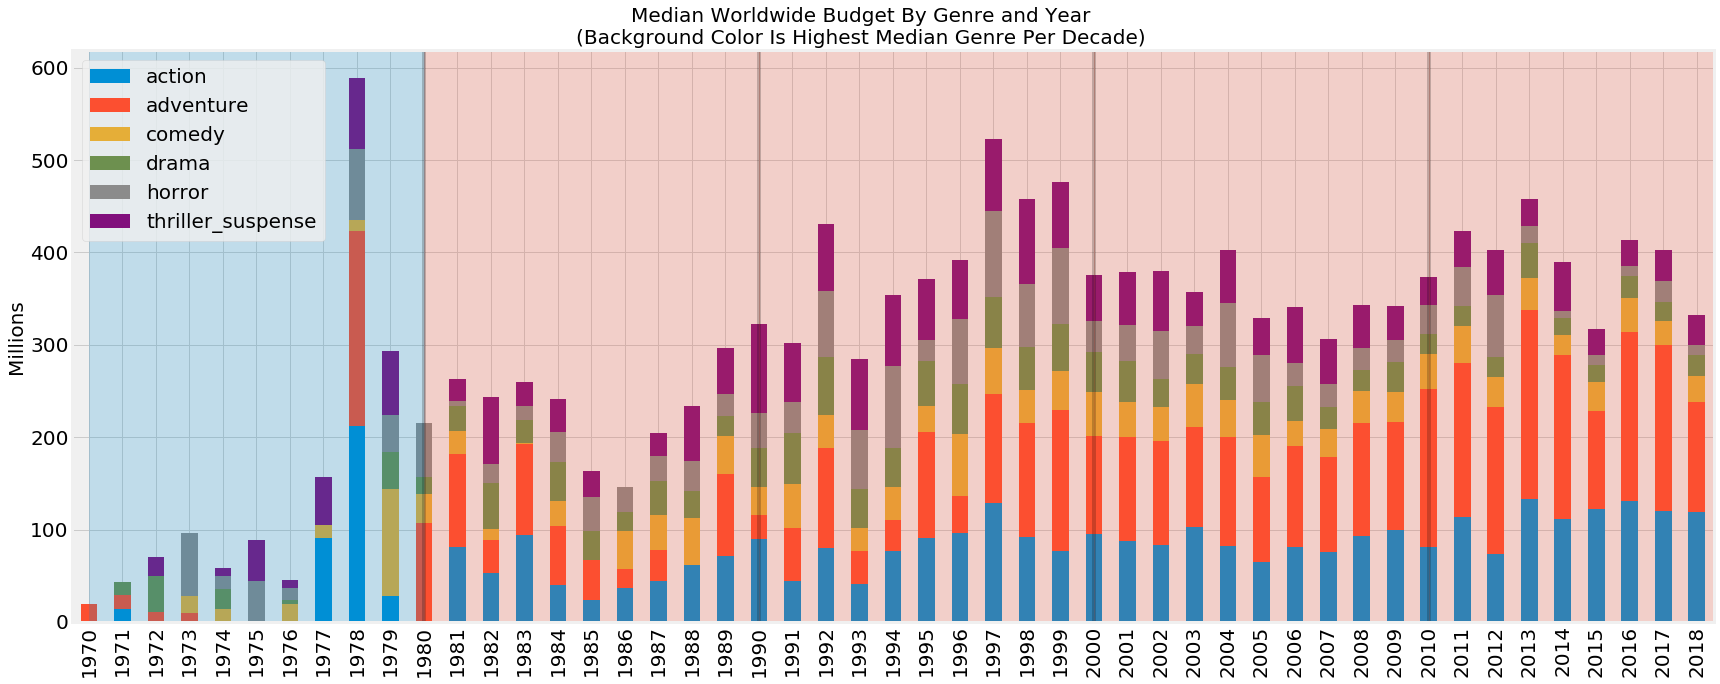

In [66]:
plot_stat_by_year_and_highlight_decade_winner(data=data, genres=genres, 
                                              title='Median Worldwide Budget By Genre and Year\n(Background Color Is Highest Median Genre Per Decade)', 
                                              stat_columns=budget_columns, aggregation_function='median',
                                              apply_function=lambda x: x / 1000000, y_label='Millions')

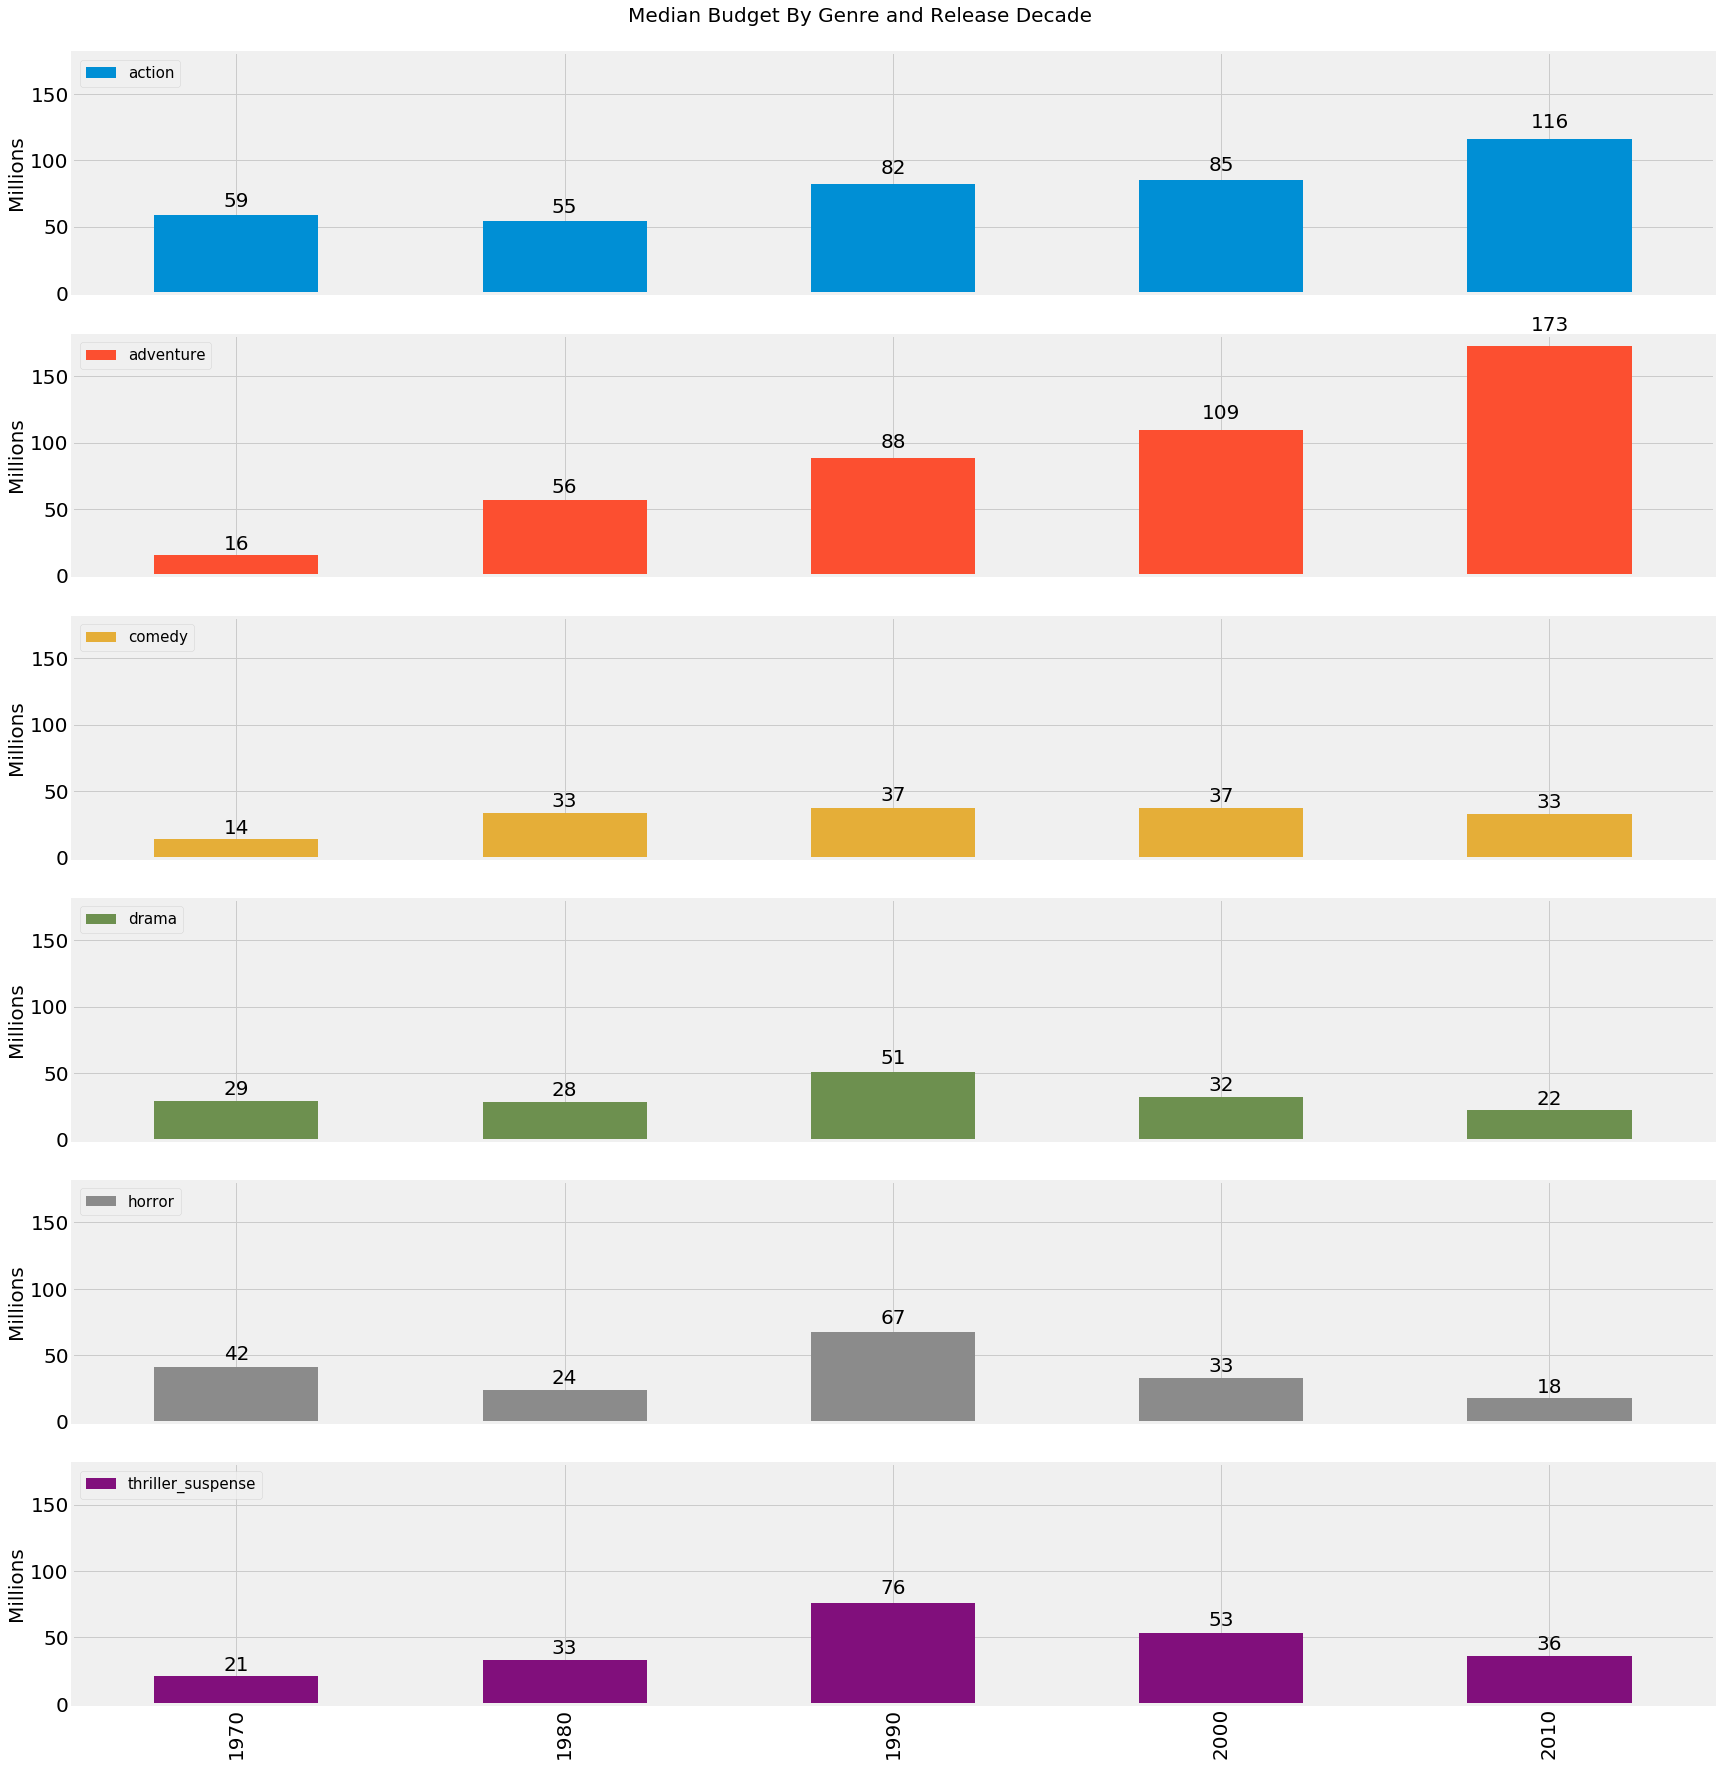

In [67]:
one_stat_over_time_in_separate_graphs(data=data, genres=genres, title='Median Budget By Genre and Release Decade', figsize=(24,24), 
                                      colors=colors, groupby_column='release_decade', stat_column='budget_adj', 
                                      aggregation_function='median', apply_needed=True, apply_function=lambda x: x / 1000000, 
                                      xtick_values=range(1970, 2020, 10), y_label='Millions', axhline_needed=False, axhline_value='')

## Quick Takeaways 

**Mean and median pretty much the same**
  - There's not much difference between the shapes of the mean and median in terms of budgets.
  
**Since the 1990s**
  - Budgets have decreased since the 1990s for all genres except Action and Adventure, whose budgets have increased substantially.
  
**Action and Adventure**
  - Action had the highest median budget in the 1970s. Since then, Adventure has the highest.

## Profits

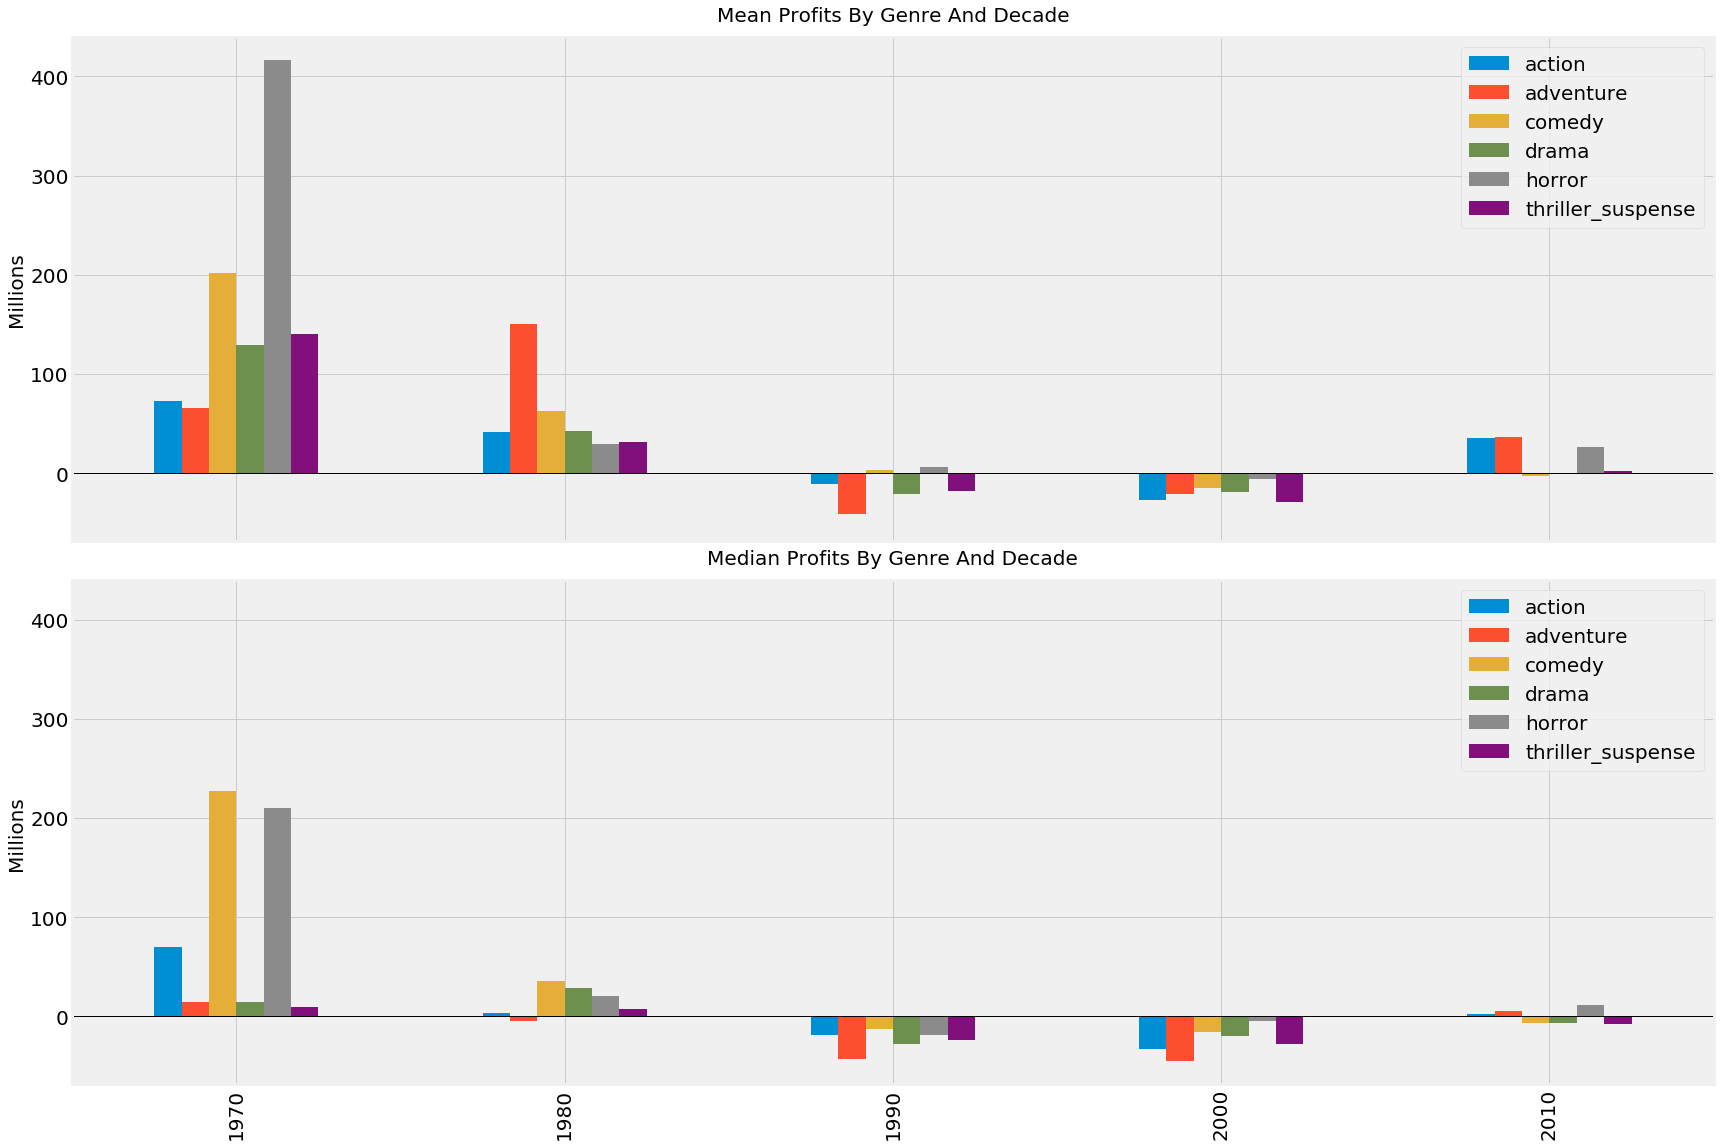

In [68]:
plot_mean_and_median_by_time_and_stat(data=data, genres=genres, groupby_column='release_decade', 
                                      stat_columns=profit_columns, stat_name_for_title='Profits', 
                                      apply_needed=True, apply_function=lambda x: x / 1000000, 
                                      y_label='Millions', y_ticks_needed=False, y_ticks='', axhline_needed=True, axhline_value=0)

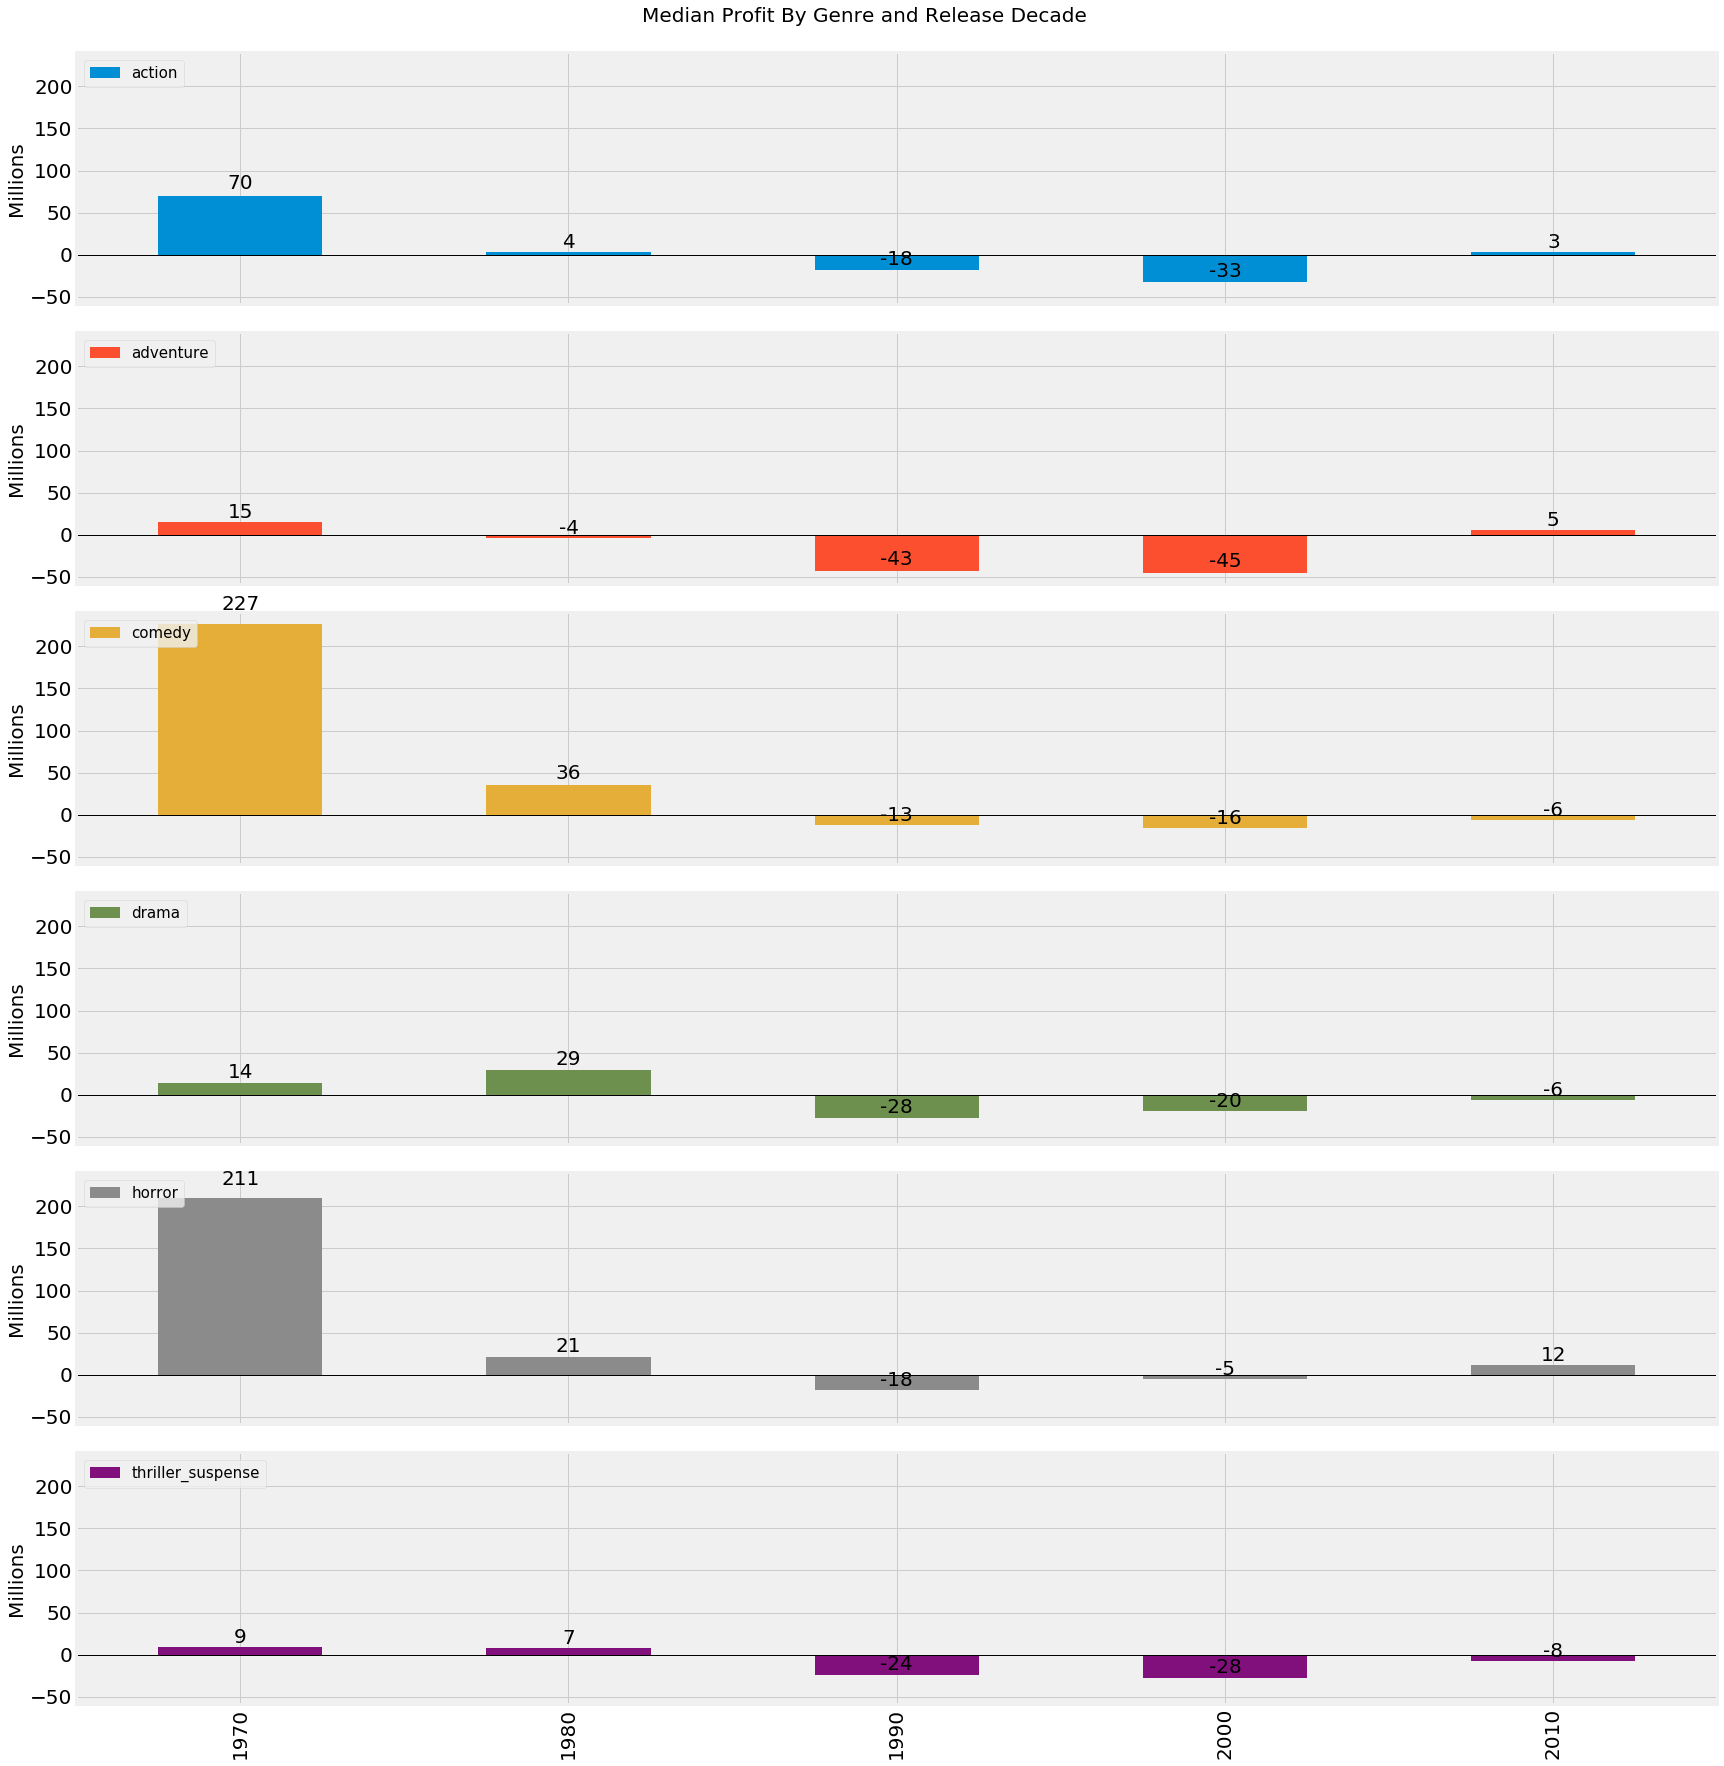

In [69]:
one_stat_over_time_in_separate_graphs(data=data, genres=genres, title='Median Profit By Genre and Release Decade', figsize=(24,24), 
                                      colors=colors, groupby_column='release_decade', stat_column='profit', 
                                      aggregation_function='median', apply_needed=True, apply_function=lambda x: x / 1000000, 
                                      xtick_values=range(1970, 2020, 10), y_label='Millions', axhline_needed=True, axhline_value=0)

## Quick Takeaways

**The average movie is not a winner**
  - From the 1990s onwards, most genres have had a negative median profit. In other words, they are net losers of money.
  - In the 1990s, no genre had a positive median profit.
  - In the 2000s, no genre had a positive median profit.
  - In the 2010s, Horror has the best median profit of 11 million dollars, followed by Adventure at 5 million dollars and Action at 2 million dollars.

## Breakeven Percentage

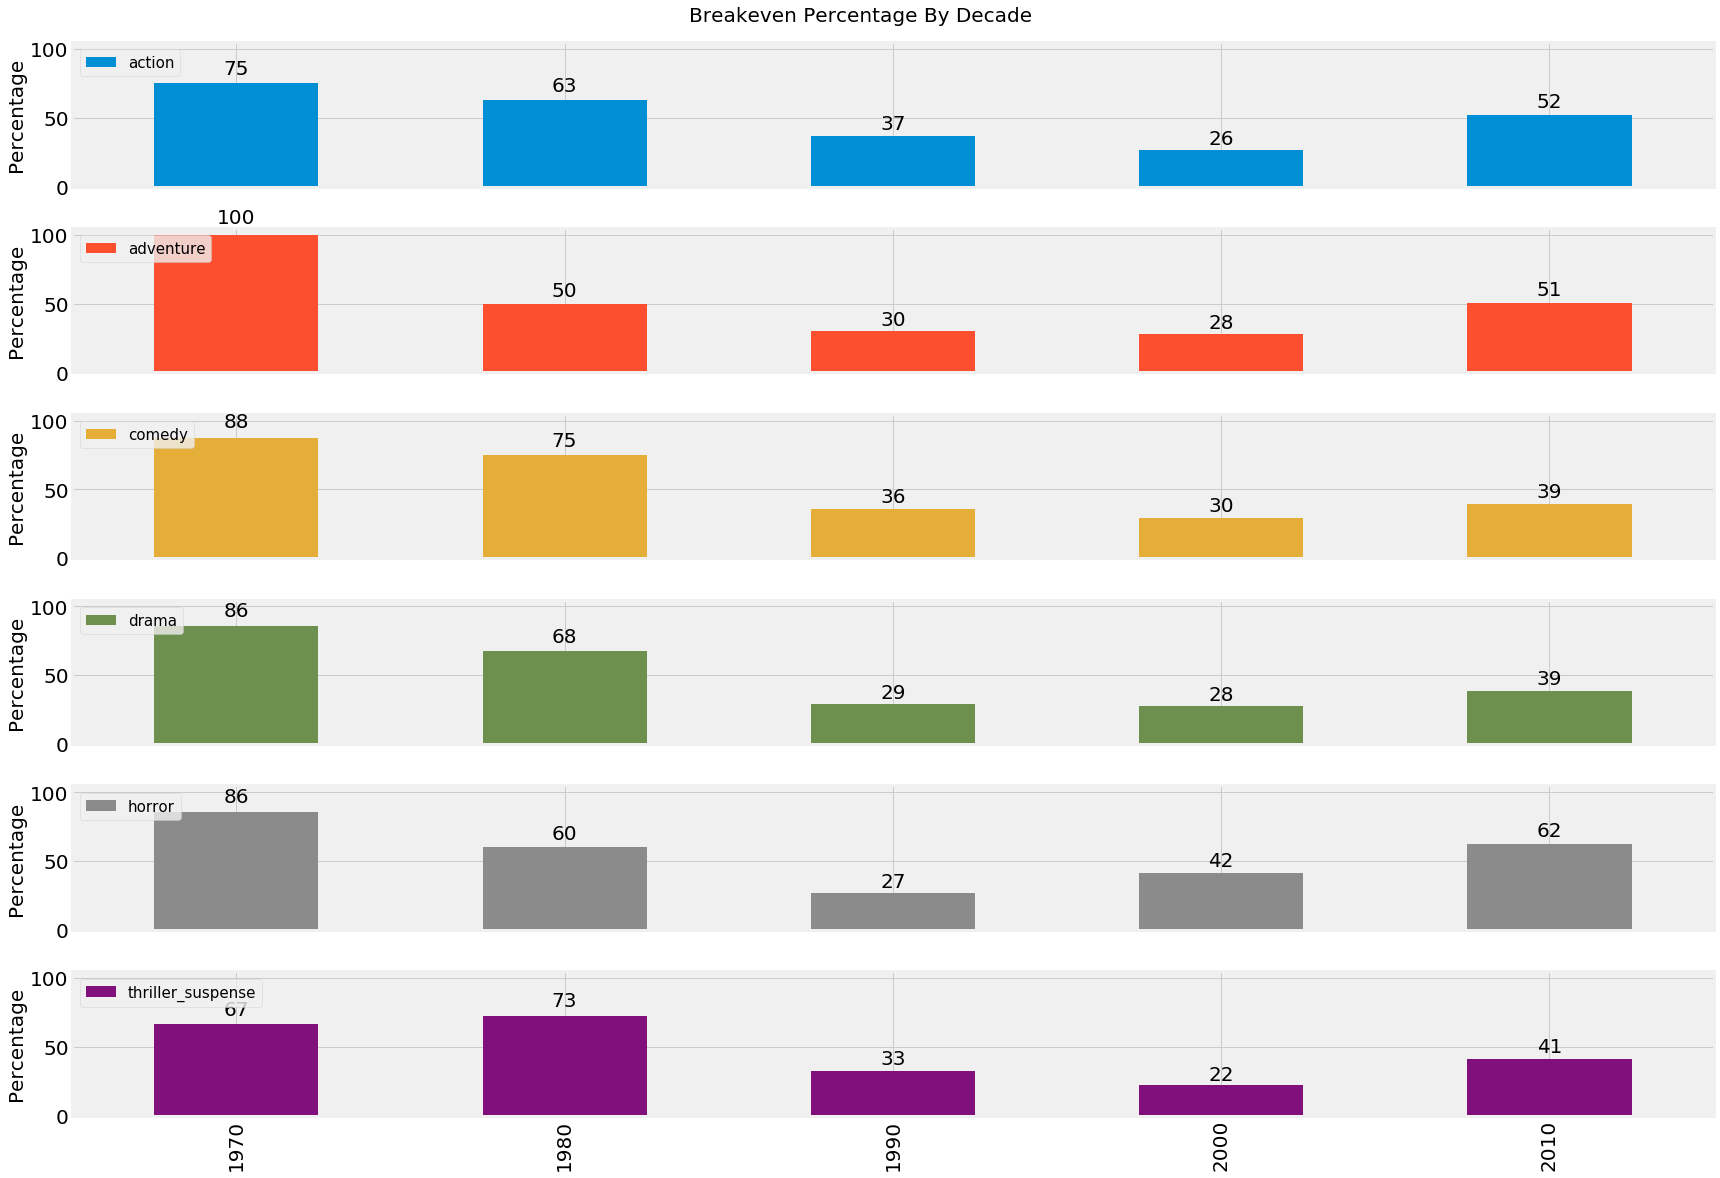

In [70]:
one_stat_over_time_in_separate_graphs(data=data, genres=genres, title='Breakeven Percentage By Decade', figsize=(24,16), 
                                      colors=colors, groupby_column='release_decade', stat_column='worldwide_breakeven', 
                                      aggregation_function='mean', apply_needed=True, apply_function=lambda x: x * 100, 
                                      xtick_values=range(1970, 2020, 10), y_label='Percentage', axhline_needed=False, axhline_value='')

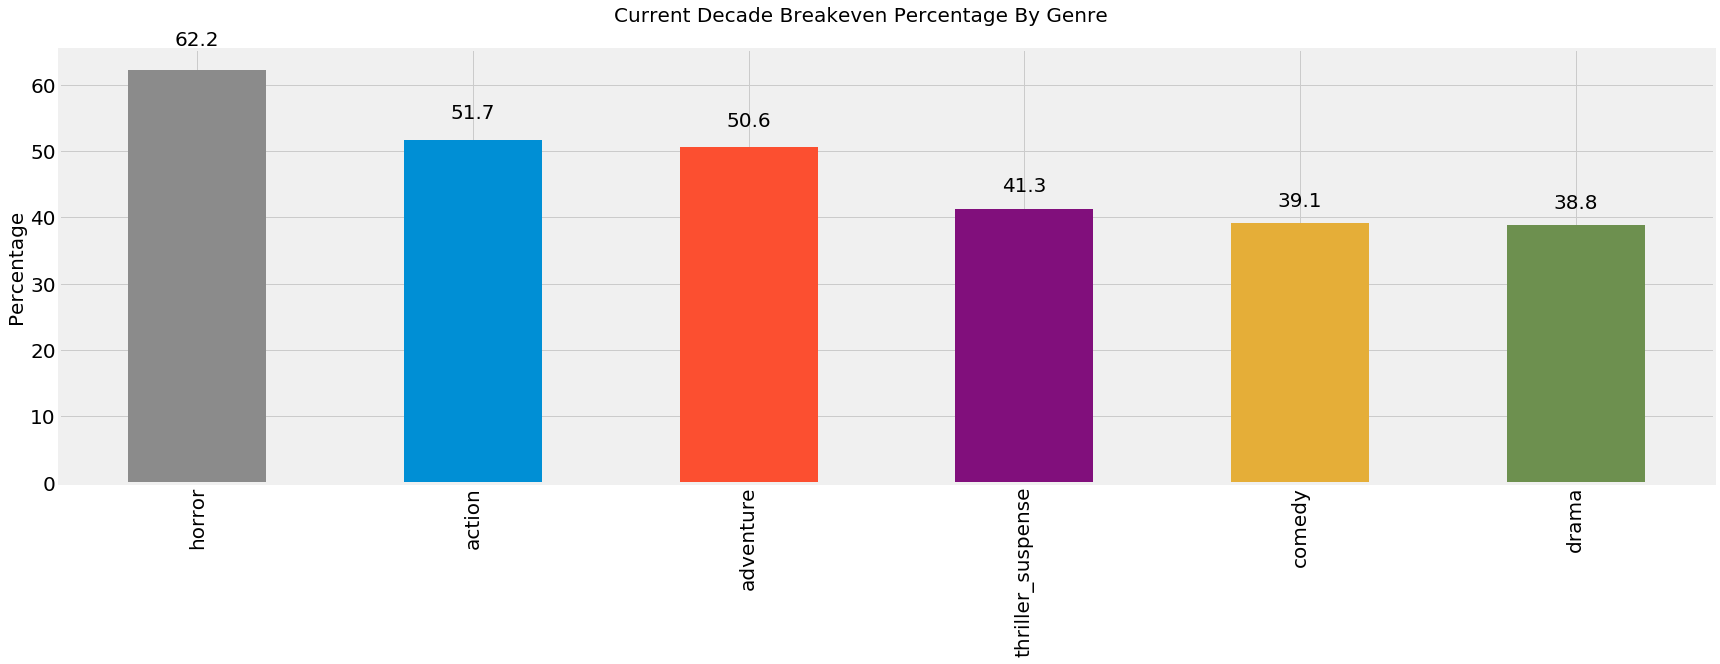

In [71]:
plot_summary_dataframe(summary=summary, 
                       sort_column='current_decade_breakeven_percentage',
                       plot_columns='current_decade_breakeven_percentage', 
                       title='Current Decade Breakeven Percentage By Genre', 
                       colors_needed=1, 
                       legend_needed=False, 
                       legend_text=[], 
                       y_label='Percentage', 
                       num_decimals=1)

## Quick Takeaways

**1970s to 2000s**
  - Overall, there was a big decrease in a movie's probability of breaking even.
  - The exceptions are Thriller/Suspense's bump in the 1980s and Horror's bump in the 2000s.
  
**2000s to 2010s**
  - All genres have seen a boost to their probability of breaking even in the last decade.

**Safest current genres**
  - Horror is by far the safest worldwide release genre with a 62% chance of at least breaking even.
  - Action and Adventure are the next safest from a breakeven perspective at around 50% each.
  - Comedy and Drama have the worst odds of breaking even.
  
**Movies are risky today**
  - From a breakeven standpoint, movies are safer today than they were in the 1990s or 2000s.
  - However, the best chance a movie has to breakeven in aggregate is still only 62% for Horror.
  - Movies are still a big risk.

## Breaking Down By Subgenres

The movie business is so variable that looking at trends within subgenres probably doesn't yield much actionable insight.

But we shall look at mean and median profitability of subgenres by decade just in case.

In [72]:
# Function to plot mean and median profitability by subgenre by decade
def subgenre_profitability_by_decade(genre, colors):
    subgenres = data[data[genre.lower()]].groupby('genres_mojo').count().index
    num_subgenres = len(subgenres)
    
    figure, axes = plt.subplots(nrows=num_subgenres, ncols=1, figsize=(24, 50), sharex=True)
    figure.suptitle('Mean and Median Profit By {} Subgenre And Decade'.format(genre.title()), fontsize=20, y=1.02)

    for subgenre, axis in zip(subgenres, axes.flat):
            grp = (data[data['genres_mojo'] == subgenre].groupby('release_decade').agg(['mean', 'median']) / 1000000)['profit']

            # If the series is missing a decade, add it as an index and set the value to zero
            for decade in range(1970, 2020, 10):
                if decade not in grp.index:
                    grp.loc[decade] = 0

            # Sort the series by its index to have the decades in chronological order                
            grp.sort_index(ascending=True, inplace=True)
 
            grp.plot(kind='bar', xticks=range(1970, 2020, 10), color=colors, linewidth=3, ax=axis)

            axis.set_ylabel('Millions', fontsize=20)
            axis.set_title(subgenre, fontsize=20)
            axis.legend(['Mean', 'Median'], loc='lower left', fontsize=15)
            axis.set_xlabel('')
            axis.tick_params(labelsize=20)
            axis.axhline(0, color='k', linewidth=1)

            autolabel(axis)

    plt.tight_layout()

### Action Subgenres By Decade

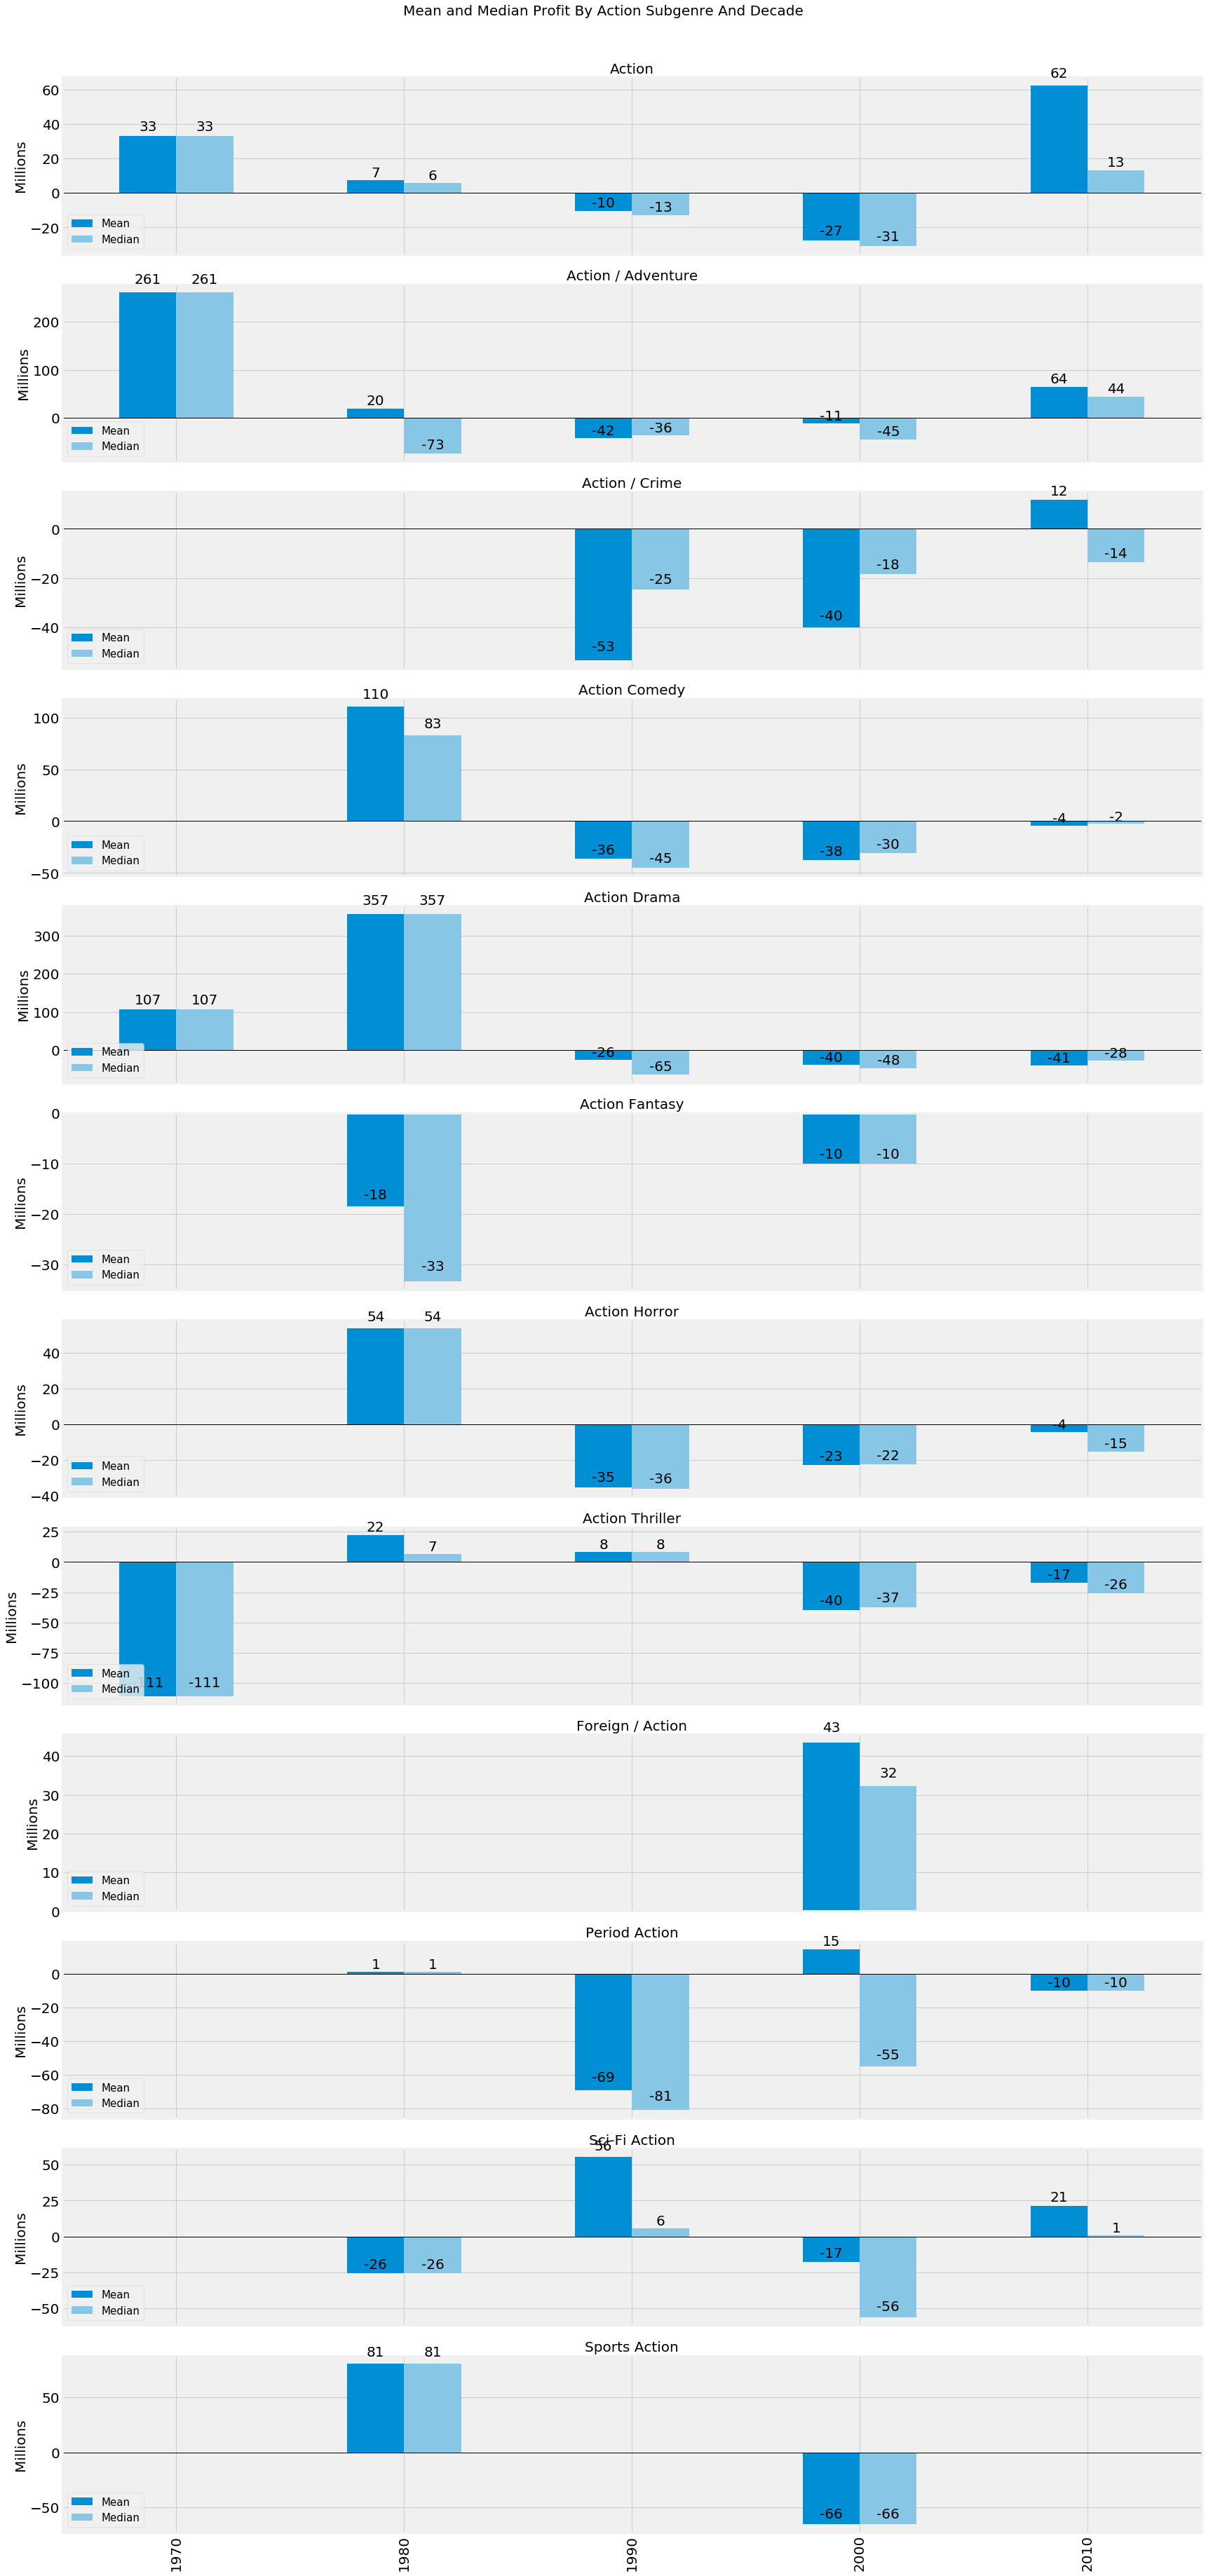

In [73]:
subgenre_profitability_by_decade('action', [genres_dict['action']['color1'], genres_dict['action']['color2']])

### Quick Takeaways

There's no clear best subgenre. There's too much variance by decade. In the current decade, the only subgenres with positive median profits are Action/Adventure, Action, and Sci-Fi Action.

### Adventure Subgenres By Decade

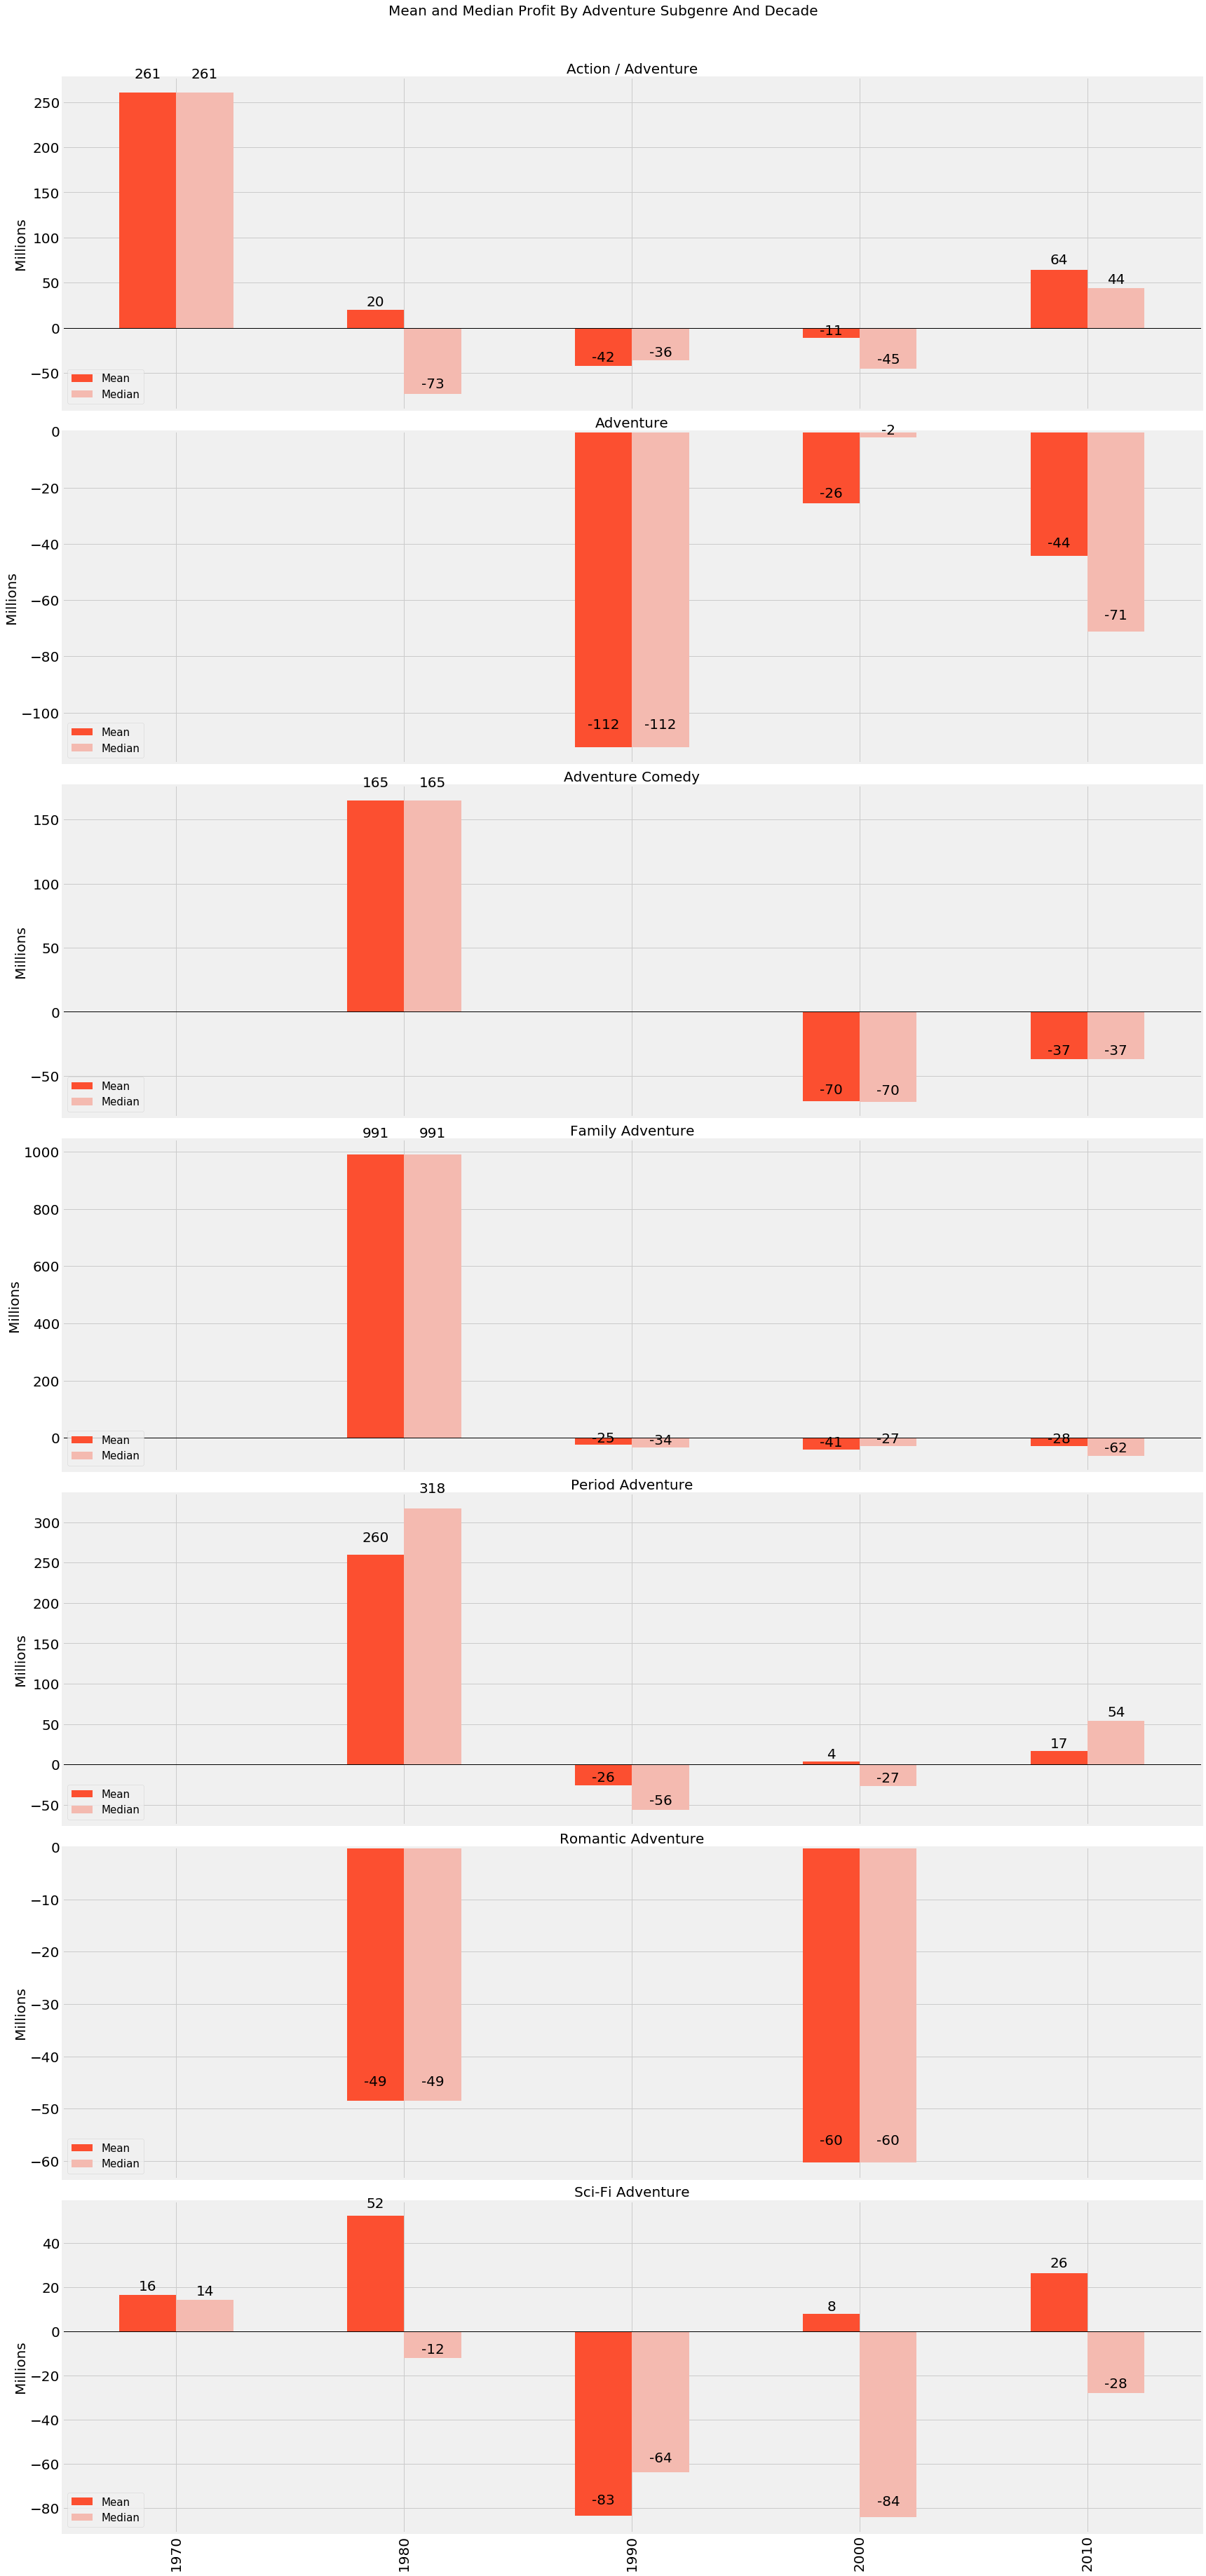

In [74]:
subgenre_profitability_by_decade('adventure', [genres_dict['adventure']['color1'], genres_dict['adventure']['color2']])

### Quick Takeaways

Period Adventure, Action/Adventure, and Adventure are the only profitable subgenres this decade.

### Comedy Subgenres By Decade

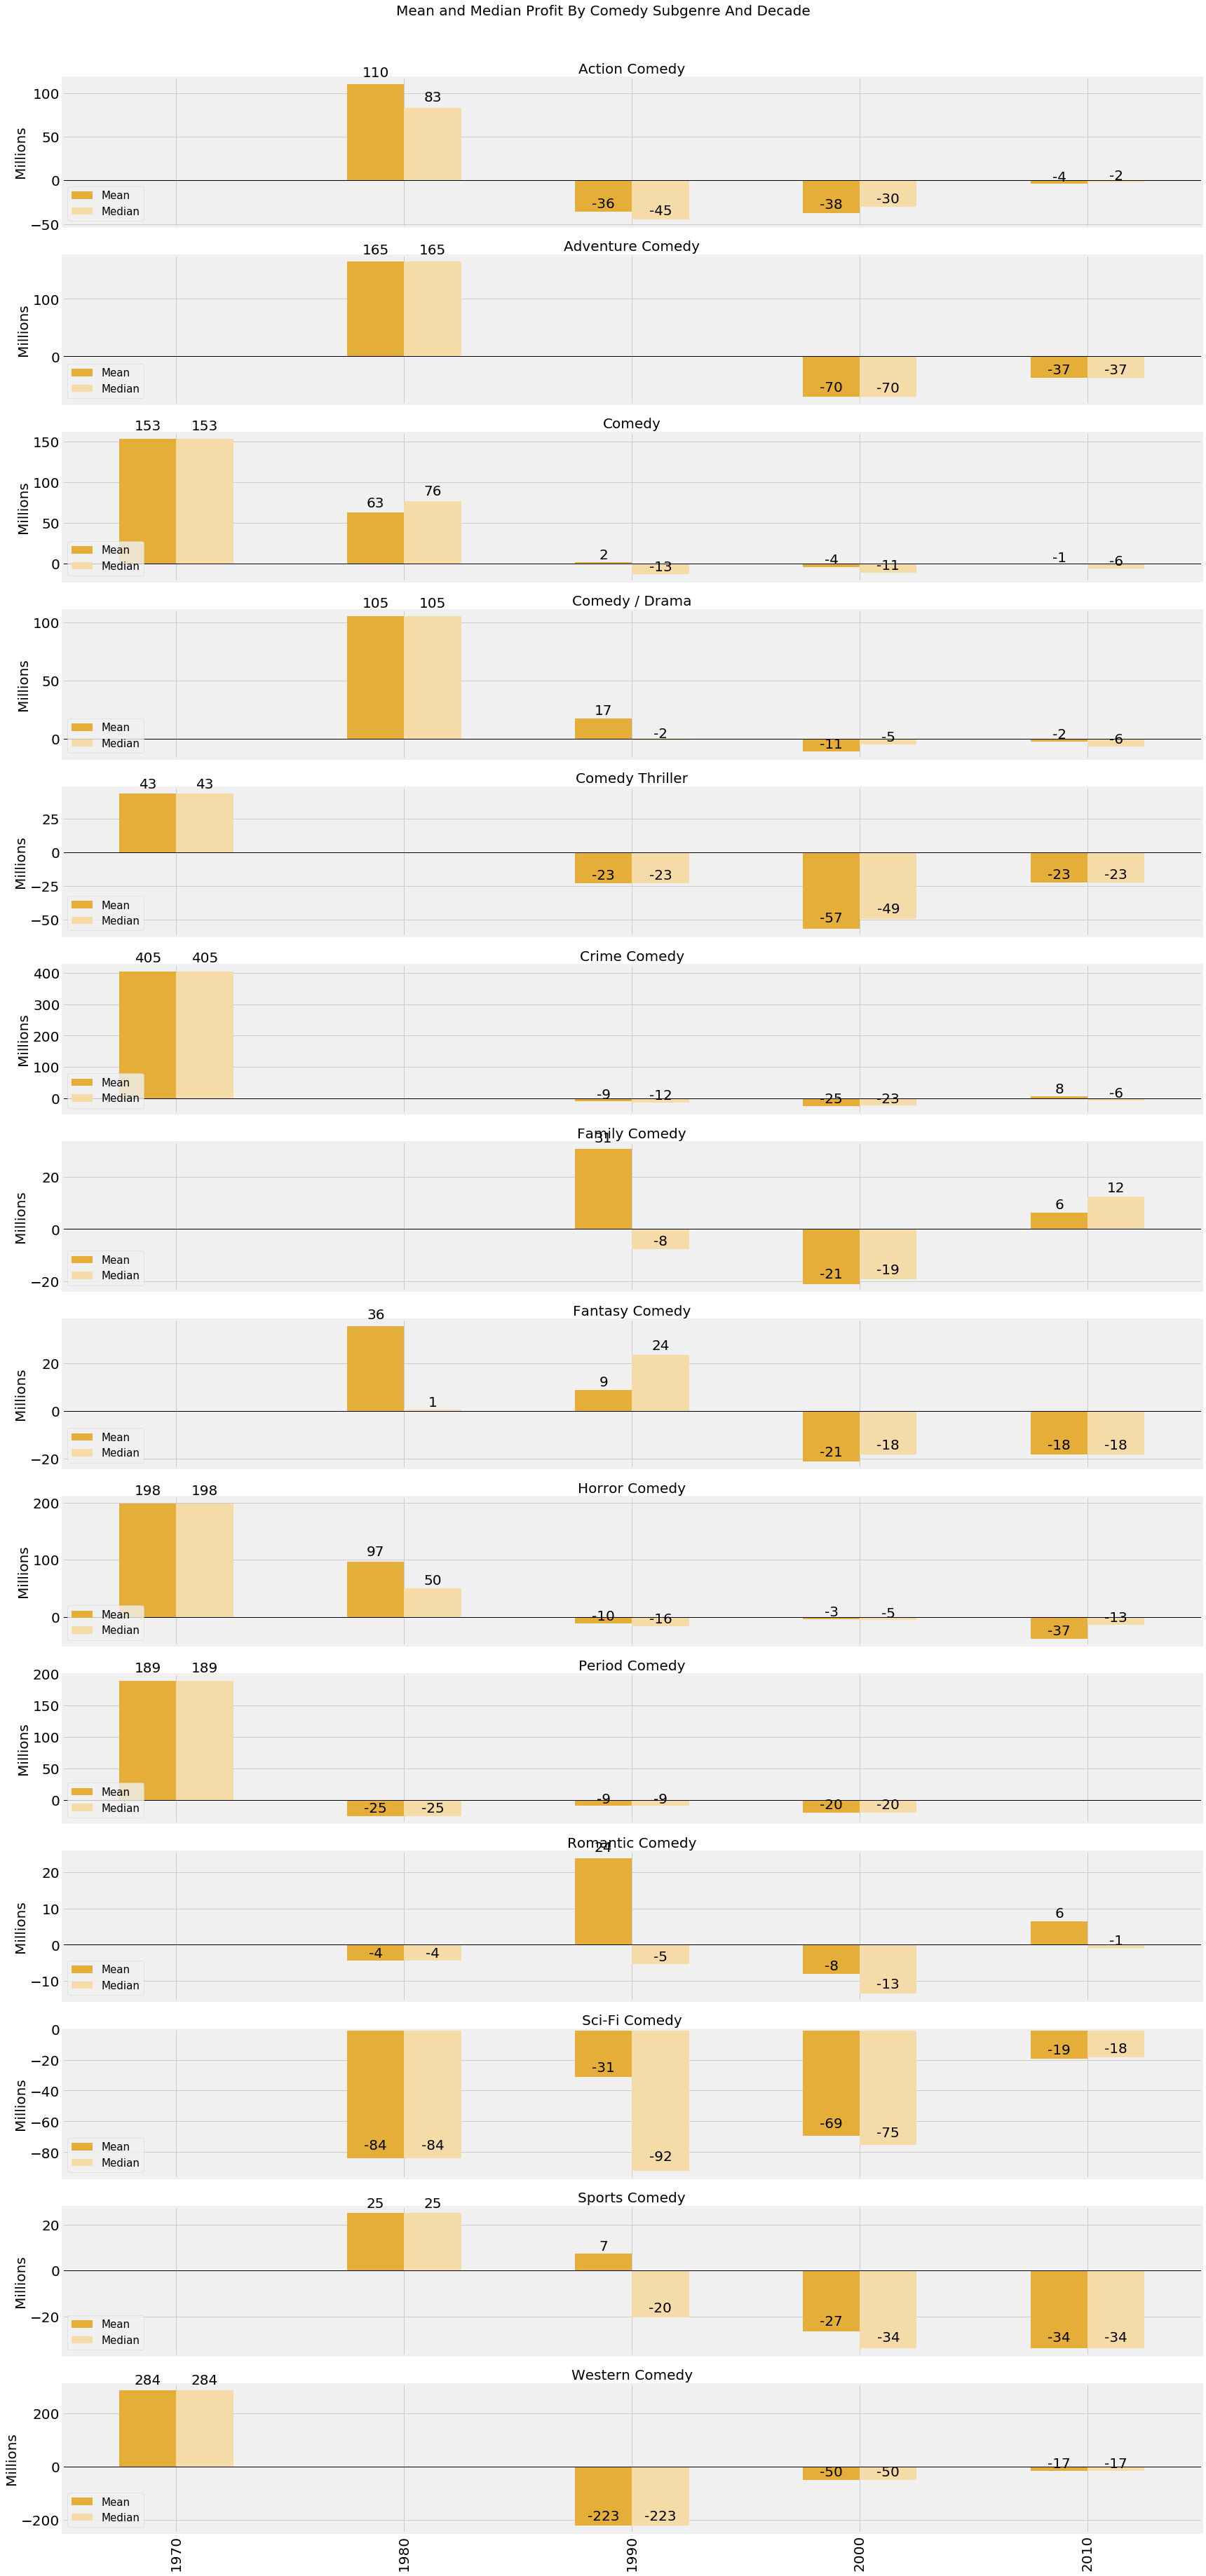

In [75]:
subgenre_profitability_by_decade('comedy', [genres_dict['comedy']['color1'], genres_dict['comedy']['color2']])

### Quick Takeaways

Median profitability of comedies since the 1990s hasn't been great, with most subgenres in the red for most if not all of the last three decades.

The only subgenre with positive median profitability in the 2010s is Family Comedy.

### Drama Subgenres By Decade

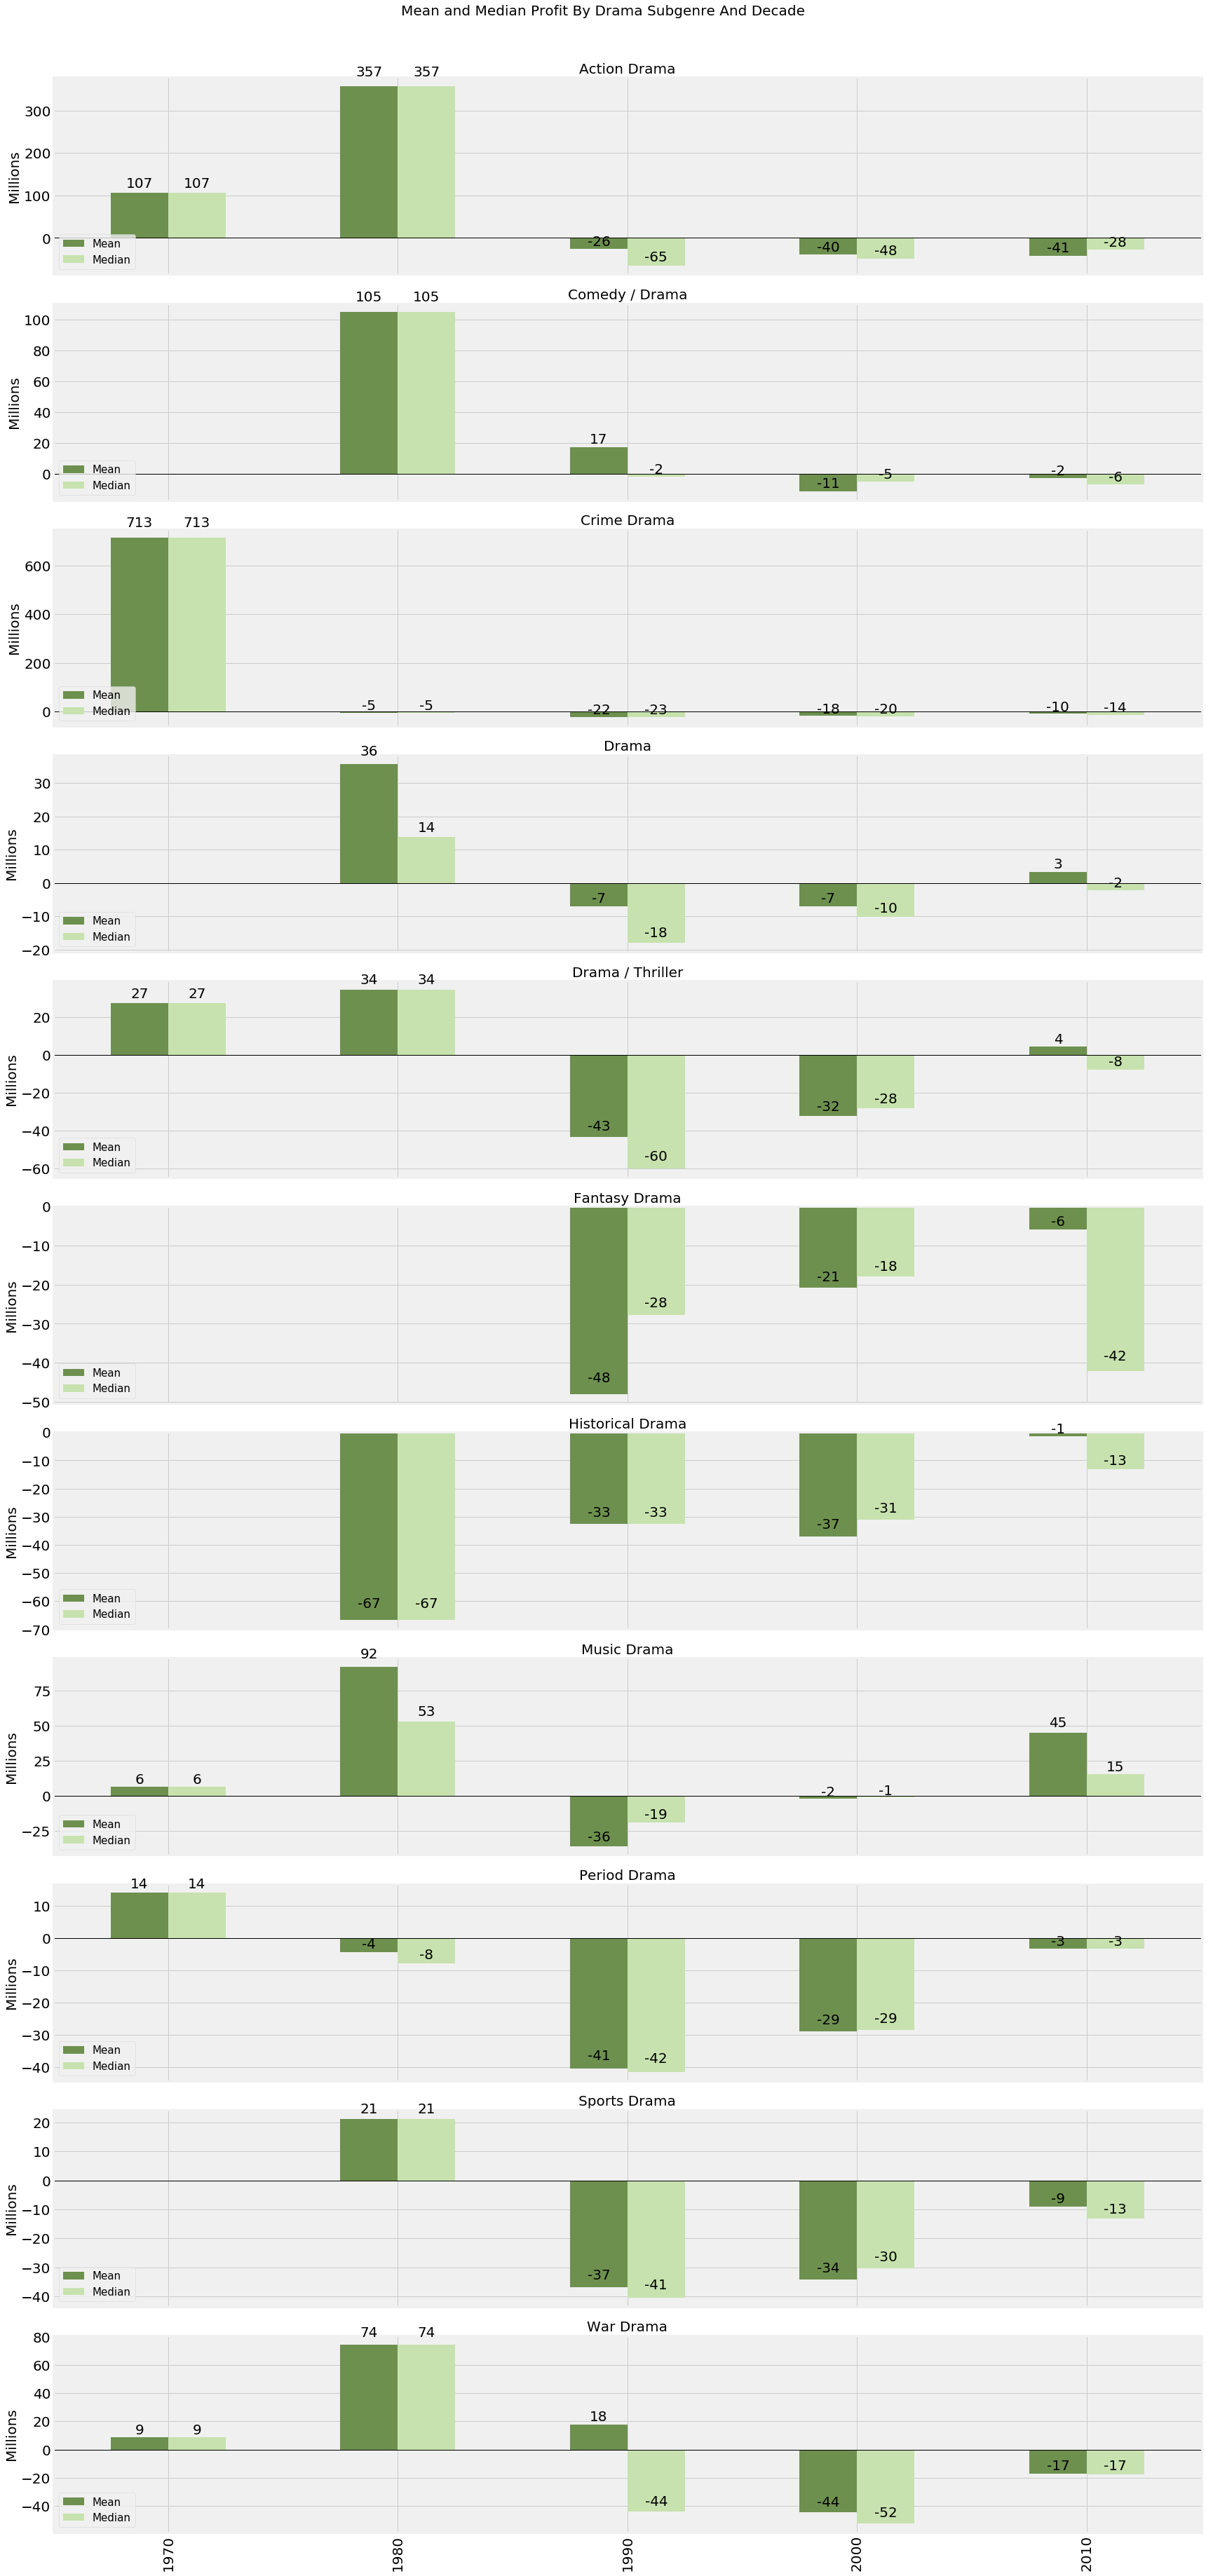

In [76]:
subgenre_profitability_by_decade('drama', [genres_dict['drama']['color1'], genres_dict['drama']['color2']])

### Quick Takeaways

Only Music Drama has a positive median profitability this decade.

### Horror Subgenres By Decade

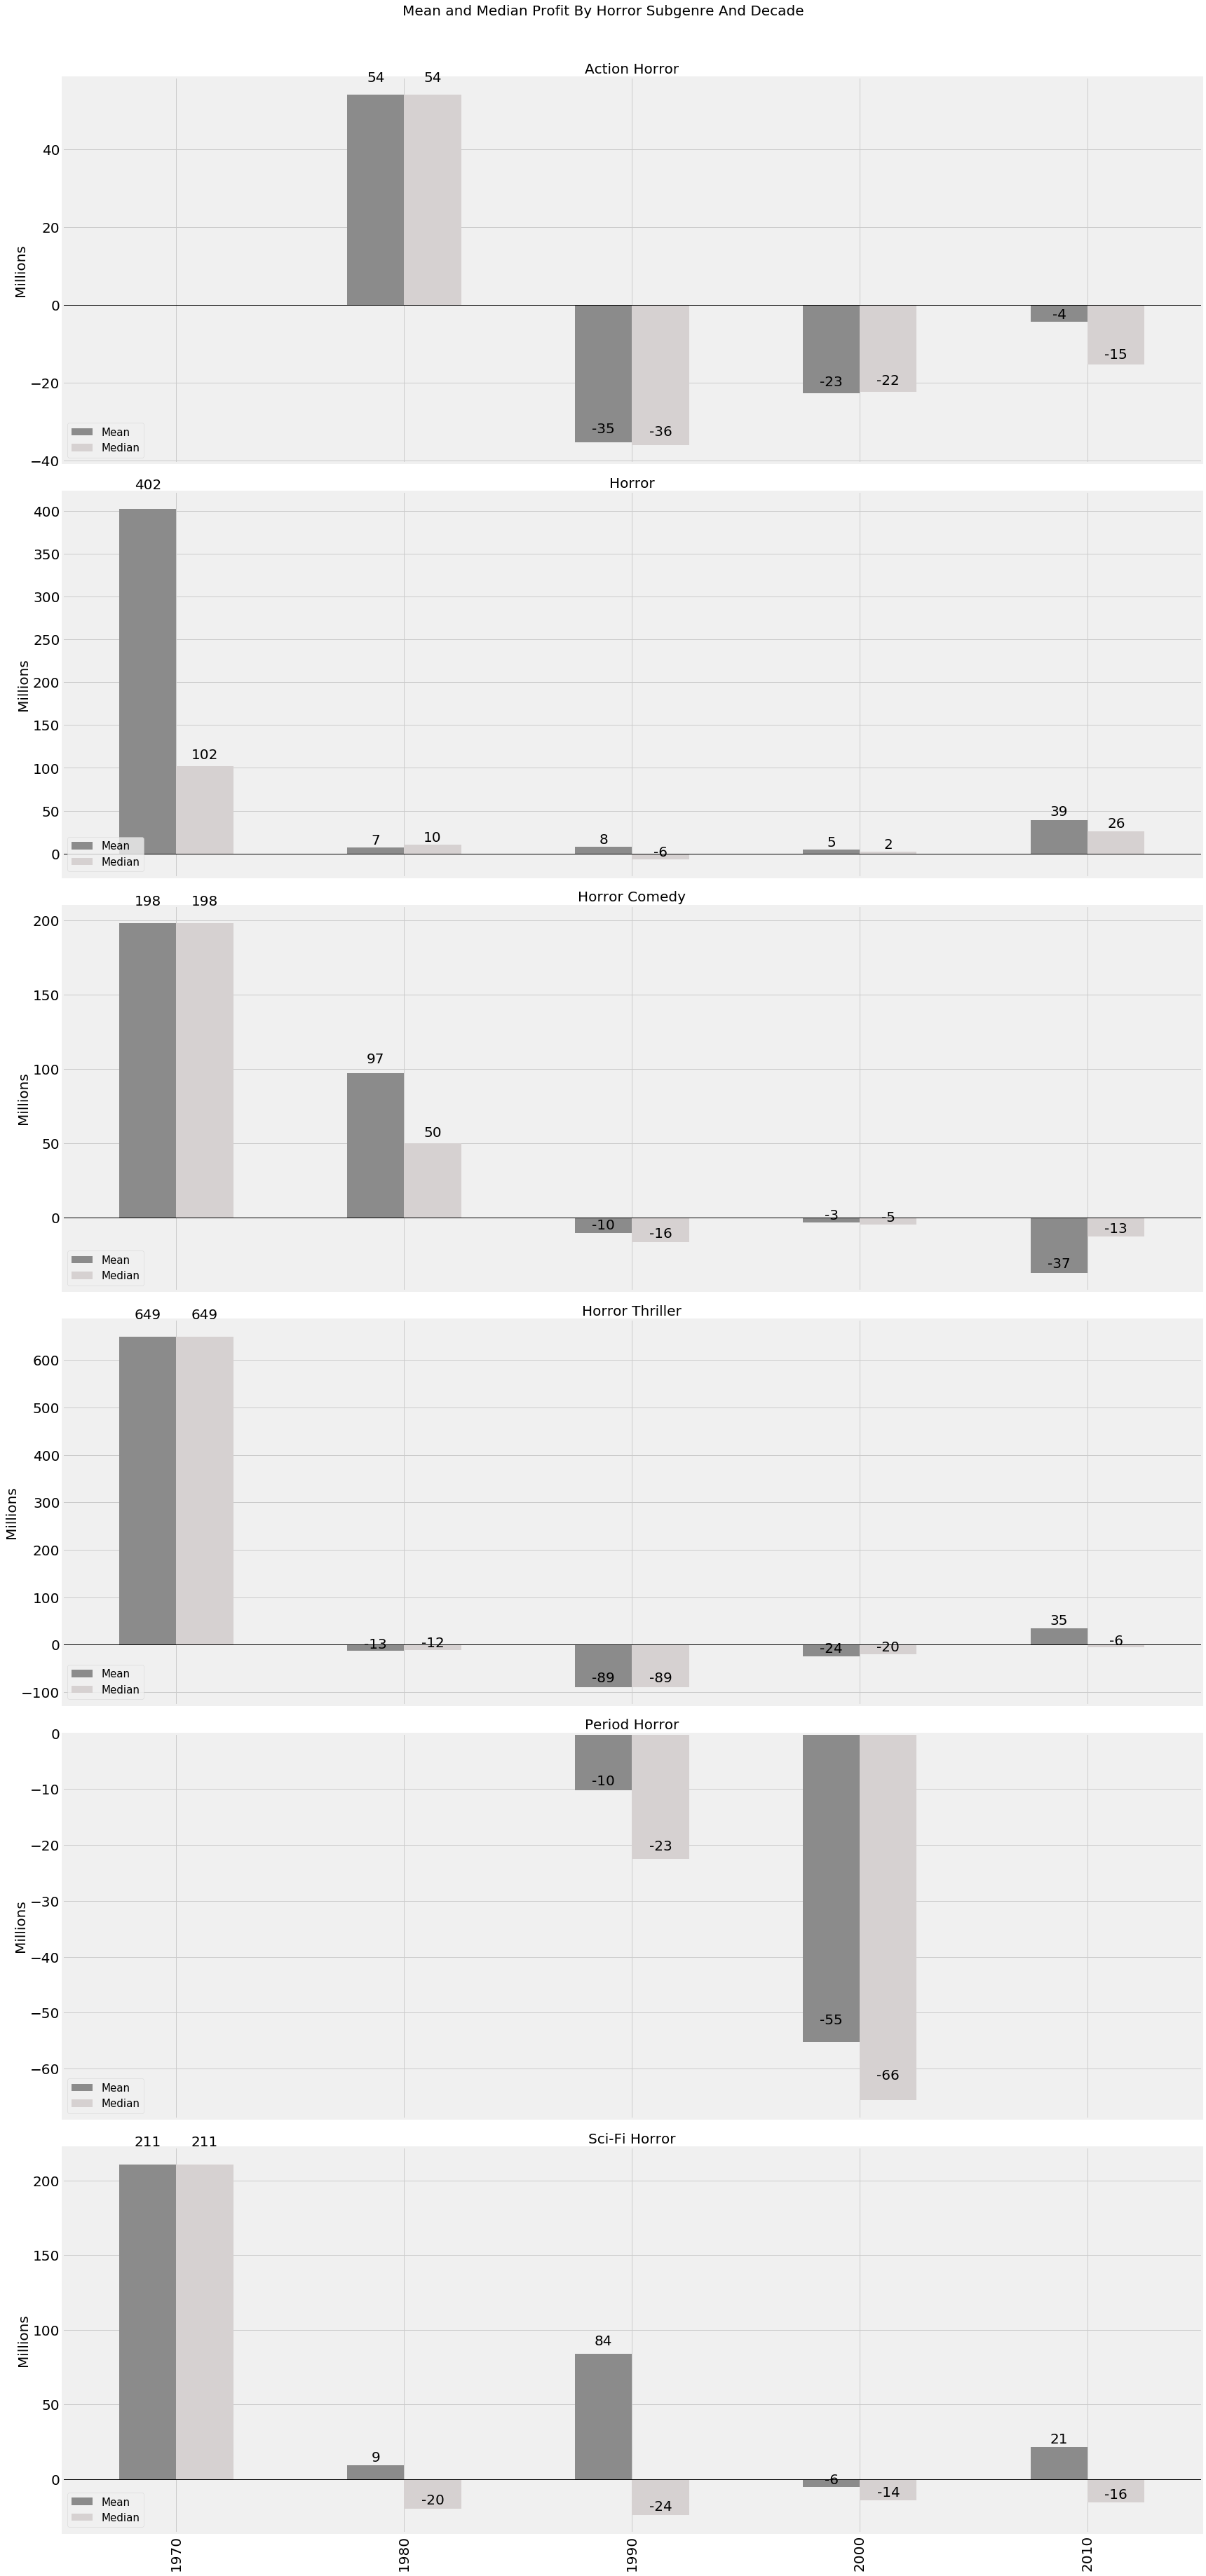

In [77]:
subgenre_profitability_by_decade('horror', [genres_dict['horror']['color1'], genres_dict['horror']['color2']])

### Quick Takeaways

Only movies labeled as just Horror have a positive median profitability this decade. All other subgenres have negative median profitability.

### Thriller/Suspense Subgenres By Decade

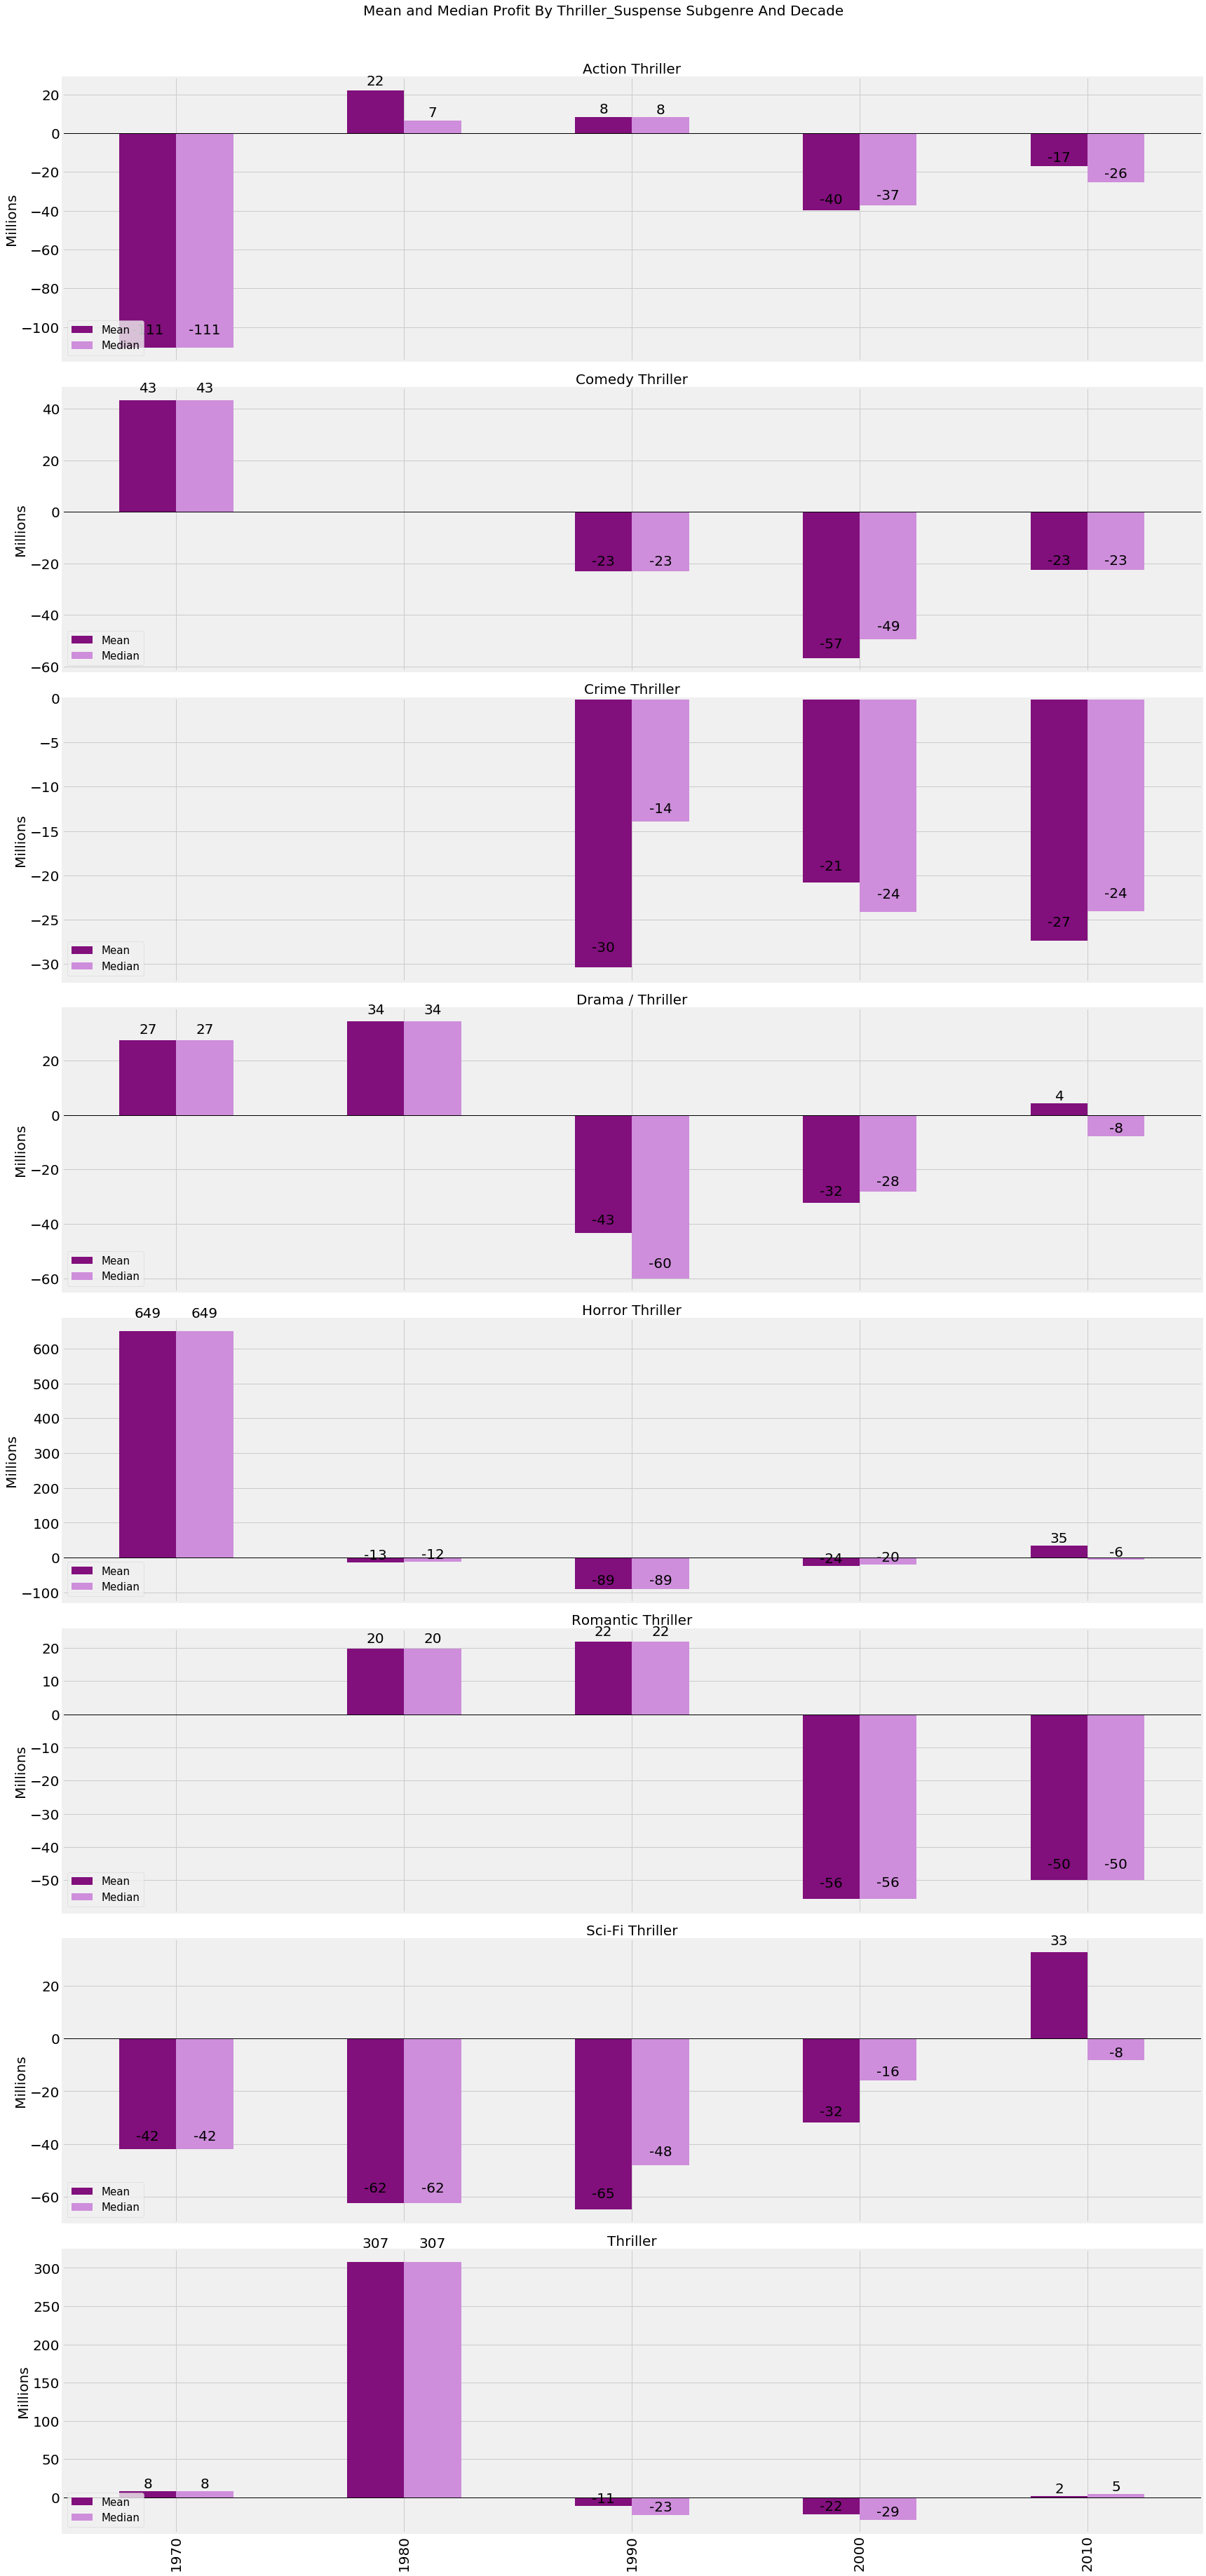

In [78]:
subgenre_profitability_by_decade('thriller_suspense', [genres_dict['thriller_suspense']['color1'], genres_dict['thriller_suspense']['color2']])

### Quick Takeaways

The only subgenre in Thriller/Suspense that has a positive median profitability this decade is Thriller.

### Summary

No subgenre stands out as a better play than any other. There's simply too much variance over time. There's also the problem of some subgenres appearing infrequently. For example, some decades are missing certain subgenres entirely.

As an example, our mean and median profitability in 'Family Adventure' movies is almost two billion dollars in the 1980s. But that is solely due to our only entry in that category being E.T., one of the most successful movies of all time. We should not conclude that our studio should start pumping out Family Adventure movies because of this information.

The movie business goes through phases like any other industry. Certain genres are hot for a minute, but then cool down for awhile. For this reason, scrutinizing subgenres over the past fifty years looking for solid trends might not yield much. 

If we restrict our focus to just the last decade, we might find some insights into the current state of genres and subgenres though.

# Current Decade

We will now dive into the performance of movies in this current decade (2010 - 2018).

- 16.1 Look at the breakeven percentage for all genres this decade. 
- 16.2 Summarize our findings.
- 16.3 Look at the worldwide profits for all genres this decade. 
- 16.4 Summarize our findings.
- 16.5 Create a new column `budget_bins` that categorizes each movie by budget size. The options are '0 - 1m', '1 - 5m', '5 - 10m', '10 - 25m', '25 - 50m', '50 - 100m', '100 - 200m', '200 - 300m', and '300 - 400m'. These represent where each movie's production budget falls (in millions of dollars). Then we create some custom functions to display worldwide profits, breakeven percentage, and the number of movies released for all genres when subdivided by budget size.
- 16.6 Look at Action movies by budget size.
- 16.7 Summarize our findings.
- 16.8 Look at Adventure movies by budget size.
- 16.9 Summarize our findings.
- 16.10 Look at Action/Adventure movies by budget size.
- 16.11 Summarize our findings.
- 16.12 Look at Comedy movies by budget size.
- 16.13 Summarize our findings.
- 16.14 Look at Drama movies by budget size.
- 16.15 Summarize our findings.
- 16.16 Look at Horror movies by budget size.
- 16.17 Summarize our findings.
- 16.18 Look at Thriller/Suspense movies by budget size.
- 16.19 Summarize our findings.
- 16.20 Look at a boxplot showing the worldwide profits for all genres this decade.
- 16.21 Summarize our findings.

## Breakeven

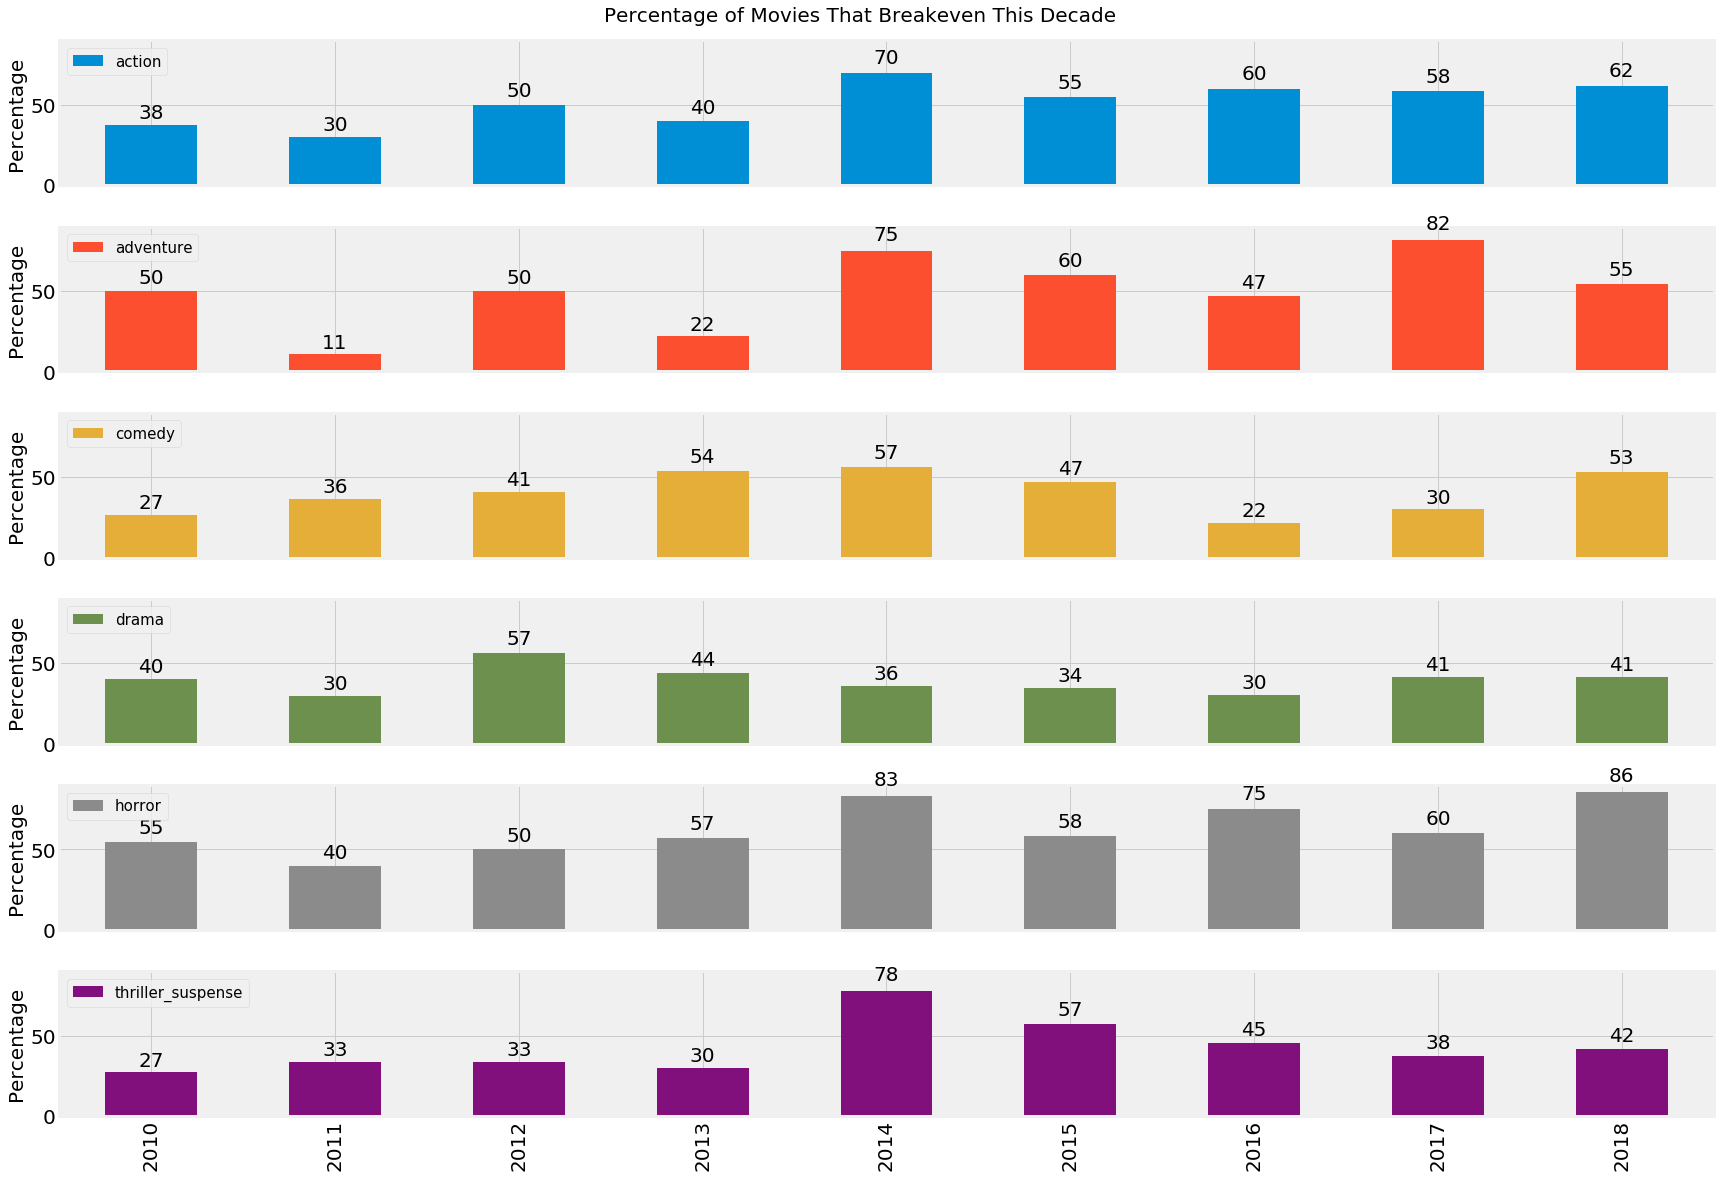

In [79]:
one_stat_over_time_in_separate_graphs(data=data, genres=genres, title='Percentage of Movies That Breakeven This Decade', figsize=(24,16), 
                                      colors=colors, groupby_column='release_year', stat_column='worldwide_breakeven', 
                                      aggregation_function='mean', starting_year=2010, apply_needed=True, apply_function=lambda x: x * 100, 
                                      xtick_values=range(2010, 2019, 1), y_label='Percentage', axhline_needed=False, axhline_value='')

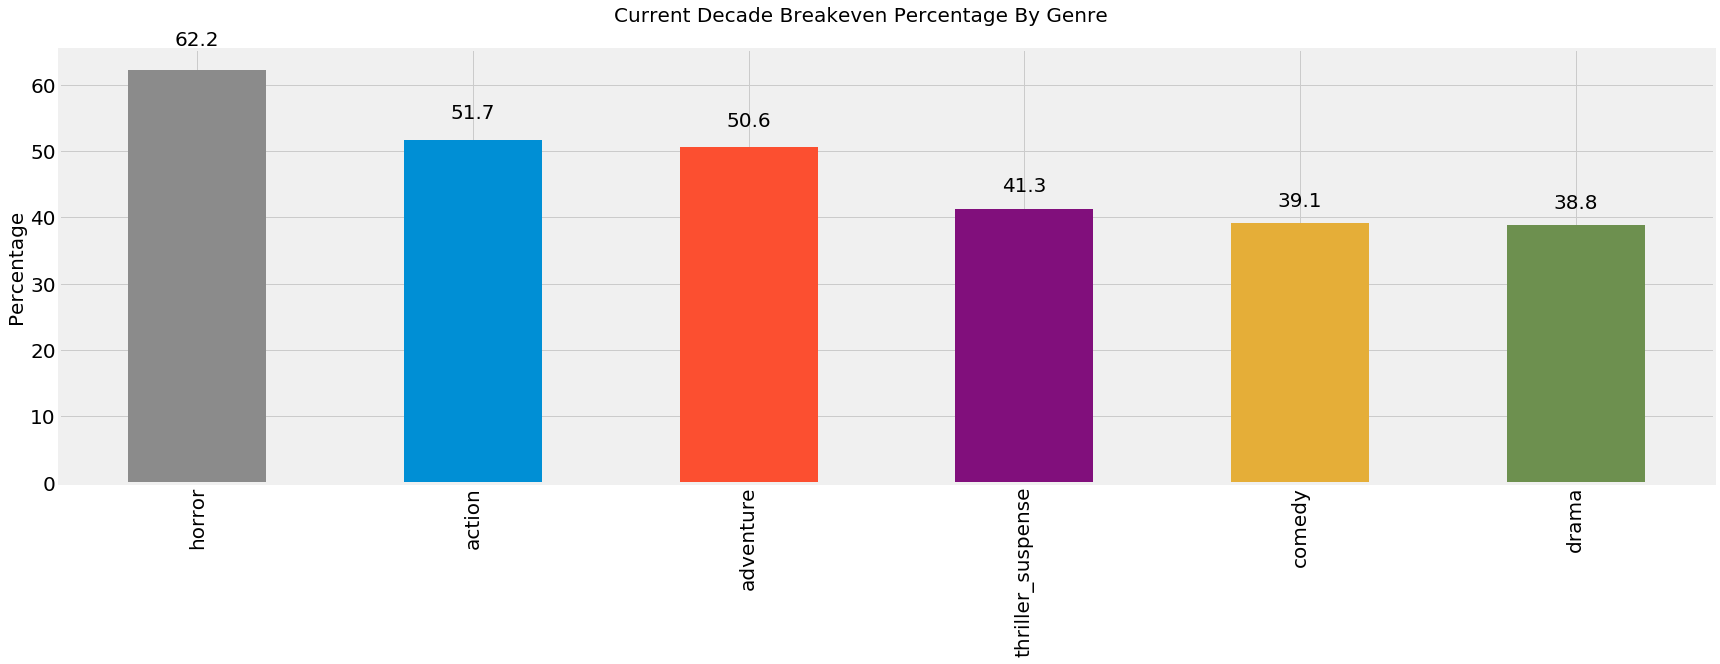

In [80]:
plot_summary_dataframe(summary=summary, sort_column='current_decade_breakeven_percentage', 
                       plot_columns='current_decade_breakeven_percentage', title='Current Decade Breakeven Percentage By Genre', 
                       colors_needed=1, legend_needed=False, legend_text=[], y_label='Percentage', num_decimals=1)

## Quick Thoughts

**Year by year takeaways**
  - There is a great deal of variety in box office results on a year by year basis
  - For the past decade, the strongest performing genre from a breakeven perspective is Horror
  - Action and Adventure are basically a coinflip to breakeven this decade  

## Profitability

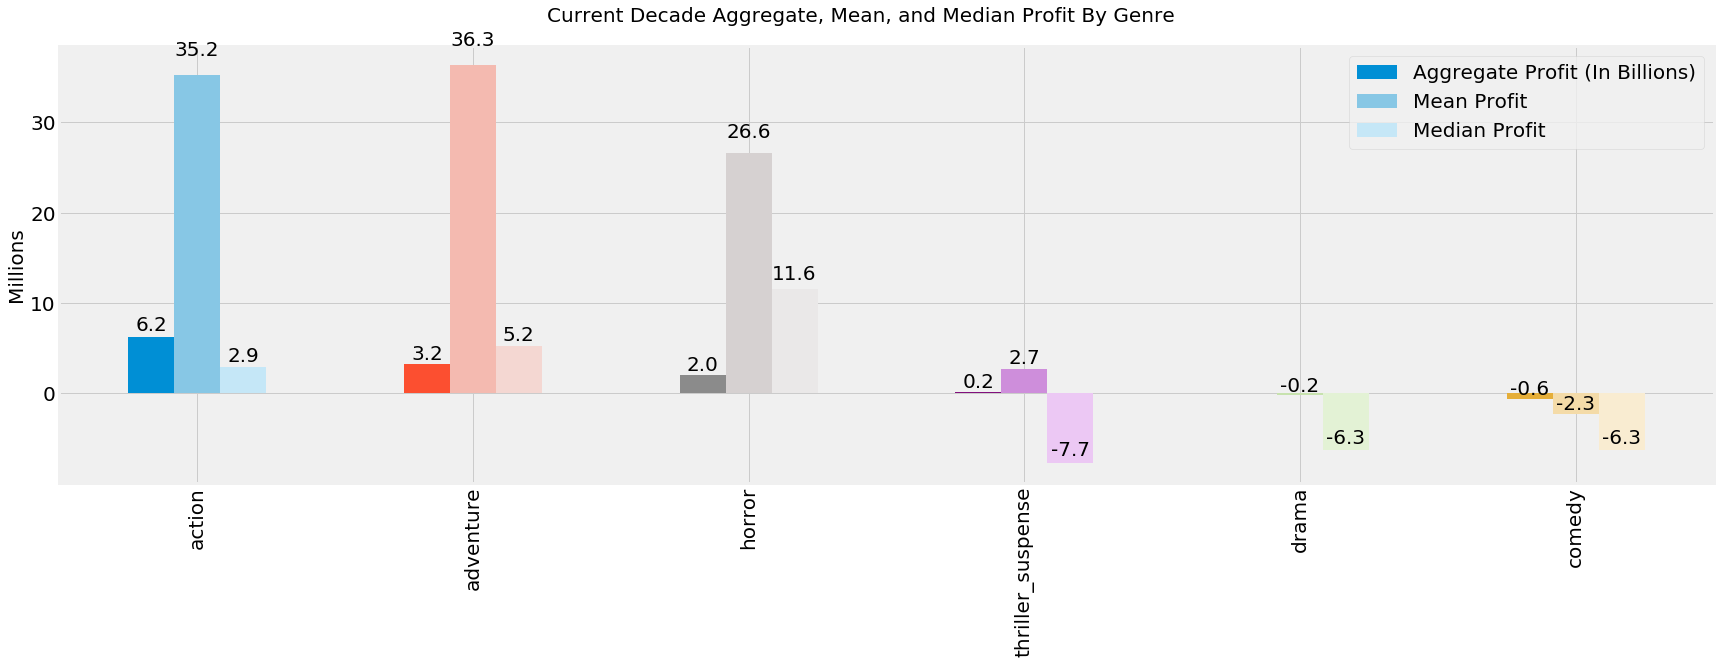

In [81]:
plot_summary_dataframe(summary=summary, sort_column='current_decade_profit', 
                       plot_columns=['current_decade_profit', 'current_decade_mean_profit', 'current_decade_median_profit'], 
                       title='Current Decade Aggregate, Mean, and Median Profit By Genre', colors_needed=3, 
                       legend_needed=True, legend_text=['Aggregate Profit (In Billions)', 'Mean Profit', 'Median Profit'], 
                       y_label='Millions', num_decimals=1)

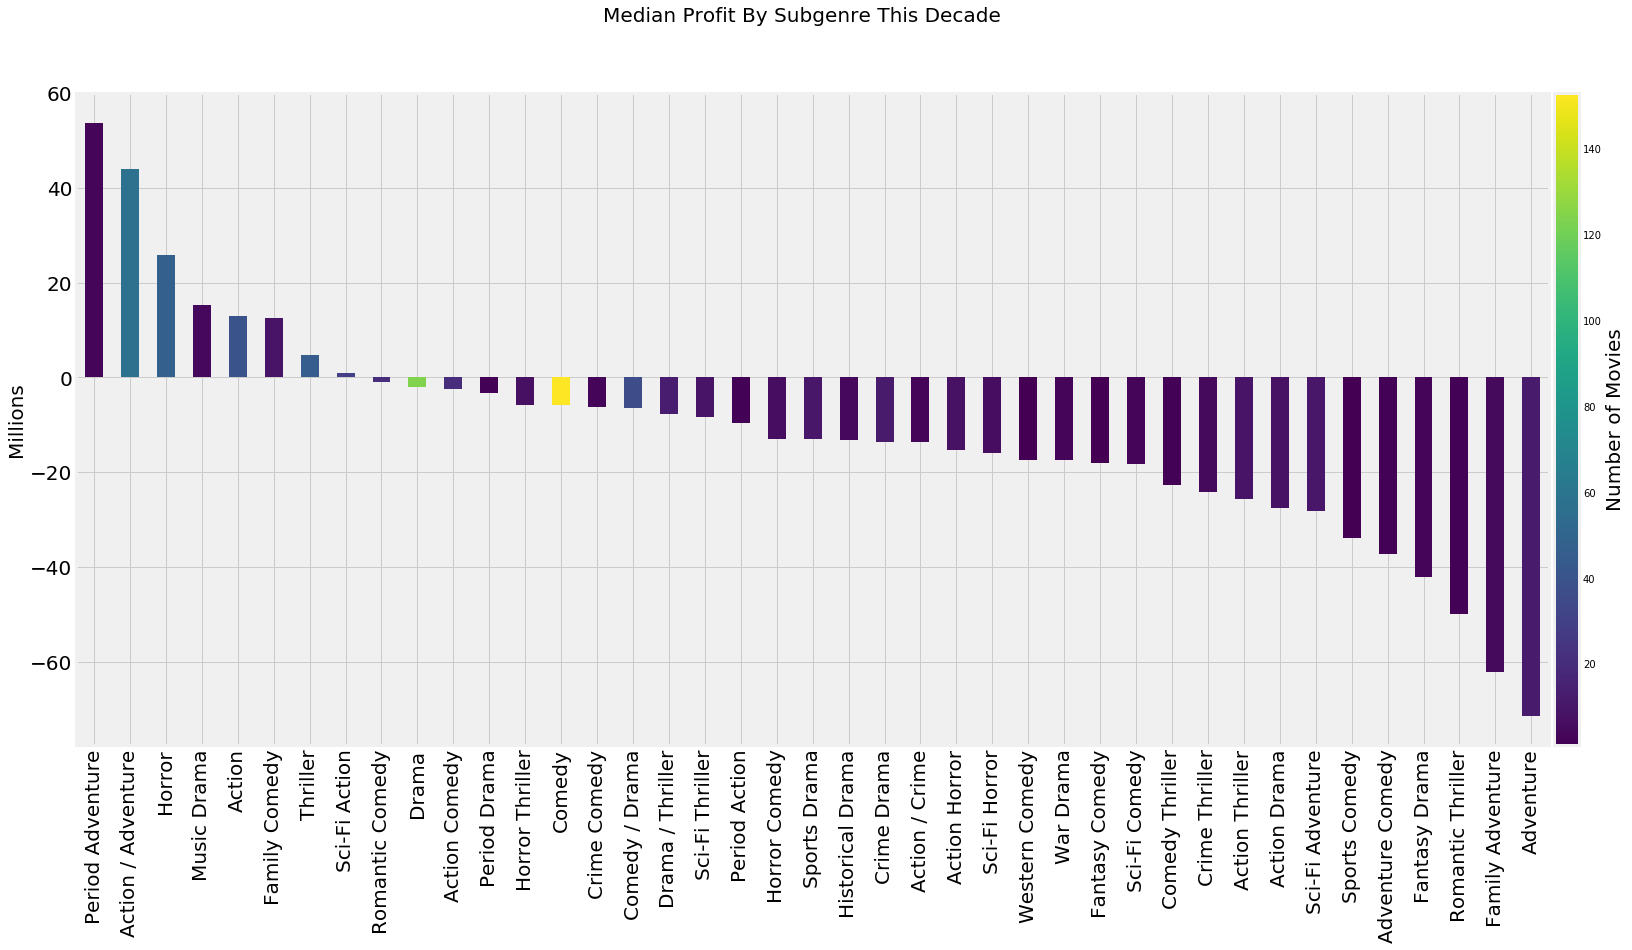

In [82]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html
# https://stackoverflow.com/questions/1735025/how-to-normalize-a-numpy-array-to-within-a-certain-range
# https://matplotlib.org/users/gridspec.html#gridspec-and-subplotspec

# Import colormap functionality from matplotlib
import matplotlib.cm as cm

# To scale our counts array from [0,1] create custom colormap
from sklearn.preprocessing import minmax_scale

figure = plt.figure(figsize=(24,12))
figure.suptitle('Median Profit By Subgenre This Decade', fontsize=20)

gs = matplotlib.gridspec.GridSpec(50, 50)
ax1 = plt.subplot(gs[:, :-1])
ax2 = plt.subplot(gs[:, -1:])

grp = data[data['release_year'] >= 2010].groupby('genres_mojo')['profit'].agg(['median', 'count']).sort_values(by='median', ascending=False)

# Use 'viridis' colormap
viridis = cm.get_cmap('viridis')

# Normalize our counts series
scaled_counts = minmax_scale(grp['count'].astype(float), feature_range=(0,1))

# List of colors using rescaled count values
new_cmap = [viridis(item) for item in scaled_counts]

(grp['median'] / 1000000).plot(kind='bar', ax=ax1, color=new_cmap)

norm = matplotlib.colors.Normalize(vmin=grp['count'].min(), vmax=grp['count'].max())

cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=viridis, norm=norm, orientation='vertical')
ax2.set_ylabel('Number of Movies', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('Millions', fontsize=20)
ax1.tick_params(labelsize=20)

## Quick Takeaways

**Aggregate Profit**
  - This is just adding up the profits (or losses) of each movie in each category in this decade.
  - The most profitable genre in aggregate is Action with &#0036;12.4 billion in aggregate profit.
  - Comedy and Drama both lost money in aggregate this decade.
  
**Mean Profit**
  - We see the power of the right tails here. Action and Adventure are neck and neck with mean profits for this decade in the &#0036;70 million range.
  - Horror is third with &#0036;53 million.
  
**Median Profit**
  - Horror is the slam dunk winner with a median profit of 11.6 million dollars, followed by Adventure at 5.2 million dollars, and Action at 2.9 million dollars.
  - Comedy, Drama, and Thriller/Suspense are all median net losers this decade.
  
**Subgenres**
  - The vast majority of subgenres are not profitable in aggregate this decade. If a main genre is profitable overall, it is due to a few subgenres performing really well, making up for the losses in the other subgenres.
  - Another takeaway is the relatively low number of movies produced in most of these subgenres this decade. That could be indicative of a contraction in output or simply having a time window too brief to allow enough data points. 
  
**Profitable Subgenres This Decade**
  - In descending order of median profitability:
    - Period Adventure: &#0036;54 million
    - Action/Adventure: &#0036;44 million
    - Horror: &#0036;26 million
    - Music Drama: &#0036;15 million
    - Action: &#0036;13 million
    - Family Comedy: &#0036;12 million
    - Thriller: &#0036;5 million
    - Sci-Fi Action: &#0036;1 million

## Breakdown By Budget

It might help to further subdivide our genres by their budgets to look for patterns there.

In [129]:
bins = [0, 1000000, 5000000, 10000000, 25000000, 50000000, 100000000, 200000000, 300000000, 400000000]
group_names = ['0 - 1m', '1 - 5m', '5 - 10m', '10 - 25m', '25 - 50m', '50 - 100m', '100 - 200m', '200 - 300m', '300 - 400m']
subgenre_colors = ['#8d6a9f', '#006494', '#fcfc62', '#2d4739', '#bb342f', '#6eeb83', '#e56399', '#ffe8d4', '#57886c', '#ff7700', '#16f4d0', '#bfae48', '#90c290', '#330f0a']

data['budget_bins'] = pd.cut(data['budget_adj'], bins, labels=group_names)

In [130]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
# Custom function to add blue if a majority of the films break even 
def background_color_blue_if_greater_than_fifty_percent(val):    
    if val > 0.5:
        return 'background-color: {}'.format('#87C7E5')
    
    return ''

In [131]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
# Custom function to highlight the max value in a series
def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)

## Action

In [86]:
# Create custom function to display profit and count information by genre and budget size for the current decade (2010s)
def current_decade_budget_sizes(data, genre):
    styler_object = (data[
        (data['release_year'] >= 2010) & 
        (data['genres_mojo'].str.contains(genre))
    ][['budget_bins', 'profit', 'worldwide_breakeven']]
    .apply(lambda x: x / 1000000 if x.name == 'profit' else x)
    .sort_values(by=['budget_bins', 'profit'], ascending=False)
    .groupby('budget_bins')
    .agg(['mean', 'median', 'count', 'sum'])
    .drop([('profit', 'count'), ('profit', 'mean'), ('profit', 'sum'), ('worldwide_breakeven', 'median')], axis=1)
    .dropna()
    .style
    .applymap(background_color_blue_if_greater_than_fifty_percent, subset=[('worldwide_breakeven', 'mean')])
    .apply(highlight_max, subset=[('worldwide_breakeven', 'count')])
    .background_gradient('winter', subset=[('profit', 'median')]))
    
    return styler_object

In [87]:
action_budget_info = current_decade_budget_sizes(data=data, genre='Action')
action_budget_info

## Quick Takeaways

**Most produced budget**
  - The 100-200m range has 73 movies produced and is median profitable this decade.
  
**Most profitable budget**
  - The 200-300m range has a median profit of 71.5m, and 17/24 movies profitable.
  - The 10-25m range has a median profit of 6.2m and has 4/7 movies profitable.
  - The 100-200m range has a median profit of 6m and has 39/73 movies profitable.
  
**Least profitable budget**
  - The 300-400m range has a median loss of 124.5m per movie. However, this category is comprised of a single movie, Justice League.
  
**Conclusions**
  - 200-300m make more money on average with 70% of movies profitable.
  - 100-200m make less money on average with only 53% of movies profitable.
  - We should go for 200-300m Action movies.

## Adventure

In [88]:
adventure_budget_info = current_decade_budget_sizes(data=data, genre='Adventure')
adventure_budget_info

## Quick Takeaways

**Most produced budget**
  - The 100-200m range with 42 movies.
  
**Most profitable budget (descending order)**
  - The 200-300m range with median profit of 49.5m and 14/24 movies profitable.
  - The 50-100m range with a median profit of 43.9m and 7/13 movies profitable. 
  - The 100-200m range with a median profit of 5.6m and 22/42 movies profitable.
  
**Least profitable budget**
  - The 300-400m range again because of Justice League, which is labeled as Action/Adventure.
  
**Conclusions**
  - Only about half of Adventure movies in the three most profitable budgets make money. This demonstrates how this genre is defined by its big winners and big losers.
  - The 200-300m range has the highest median profit and the highest breakeven percentage at 58%.
  - We should go with the 200-300m range.

## Quick Look At Action/Adventure

In [89]:
action_adventure_budget_info = current_decade_budget_sizes(data=data, genre='Action / Adventure')
action_adventure_budget_info

## Quick Takeaways

Since Action/Adventure is one of the only profitable subgenres this decade, it warrants a closer look at this specific subgenre.

**Most produced budget**
  - The 100-200m range with 29 movies.
  - Second place is 200-300m with 13 movies.
  
**Most profitable budget (descending order)**
  - The 200-300m range with median profit of 64.7m and 10/13 movies profitable.
  - The 100-200m range with a median profit of 62.8m and 19/29 movies profitable.
  - In third place is 50-100m with a median profit of 43.9m and 5/9 movies profitable.
  
**Least profitable budget**
  - The 300-400m range again because of Justice League.
  
**Conclusions**
  - In terms of median profit, both 100-200m and 200-300m movies are about the same. At least for the last decade though, the 200-300m movies have a much higher chance of making money: 77% versus 66%.
  - Both seem like good bets and have higher median profits than any other subgenre within Action or Adventure.

## Comedy

In [90]:
comedy_budget_info = current_decade_budget_sizes(data=data, genre='Comedy')
comedy_budget_info

## Quick Takeaways

**Most produced budget**
  - The 25-50m range with 92 movies, followed by the 10-25m range with 73 movies. Neither are median profitable this decade.
  
**Most profitable budget**
  - The 0-1m range with 2/3 profitable movies and a median profit of 0.5m. Every other budget size is a net loser.
  
**Least profitable budget**
  - The 100-200m range with 5/14 profitable movies and a median loss of 54.8m.
  
**Conclusions**
  - Comedies in general haven't performed well this decade, but definitely stay away from big budgeted ones.

## Drama

In [91]:
drama_budget_info = current_decade_budget_sizes(data=data, genre='Drama')
drama_budget_info

## Quick Takeaways

**Most produced budget**
  - The 10-25m range with 76 movies, followed by the 25-50m range with 56 movies. Neither are median profitable this decade.
  
**Most profitable budget**
  - The 0-1m range had 3/3 movies profitable with a median profit of 0.5m.
  - The 1-5m range had 10/19 movies profitable with a median profit of 0.8m.
  - Other than those two, all budgets were median losers.
  
**Least profitable budget**
  - The 100-200m range had 7/9 movies lose money with a median loss overall of 80.5m.
  - The 50-100m range had 22/31 movies lose money with a median loss overall of 31.6m.
  
**Conclusions**
  - There doesn't seem to be much upside in making Drama movies this decade.

## Horror

In [92]:
horror_budget_info = current_decade_budget_sizes(data=data, genre='Horror')
horror_budget_info

## Quick Takeaways

**Most produced budget**
  - The 5-10m, 10-25m, and 25-50m are all produced in roughly equal numbers.
  
**Most profitable budgets**
  - 1-5m range had 5/5 movies profitable with a median profit of 54m.
  - 5-10m range had 15/17 movies profitable with a median profit of 47m.
  - 10-25m range had 16/19 movies profitable with a median profit of 26m.
  
**Least profitable budget**
  - Any movie budgeted more than 25 million is a median loser.
  - The worst budget seems to be 100-200m as 3/3 movies were unprofitable with a median loss of 114m.
  
**Conclusions**
  - Horror movies in the 1-25m range have been a solid investment this decade.

## Thriller/Suspense

In [93]:
thriller_suspense_budget_info = current_decade_budget_sizes(data=data, genre='Thriller|Suspense')
thriller_suspense_budget_info

## Quick Takeaways

**Most produced budget**
  - The 25-50m range with 29 movies, followed by the 50-100m range with 24 movies. Both are median losers.
  
**Most profitable budget**
  - The 200-300m range only has one movie in it, The Dark Knight Rises. That movie was incredibly successful and thus has a tremendously high median profit for the category.
  - The 1-5m range has 3/4 movies profitable with a median profit of 32m.
  - The 5-10m range has 5/8 movies profitable with a median profit of 9m.
  - The 10-25m range has 10/19 movies profitable with a median profit of 4.6m.
  
**Least profitable budget**
  - The 50-100m range has only 6/24 movies profitable with a median loss of 24m.
  
**Conclusions**
  - Stick to Thriller/Suspense movies budgeted between 1-25m.

## Profit Boxplot For The Current Decade

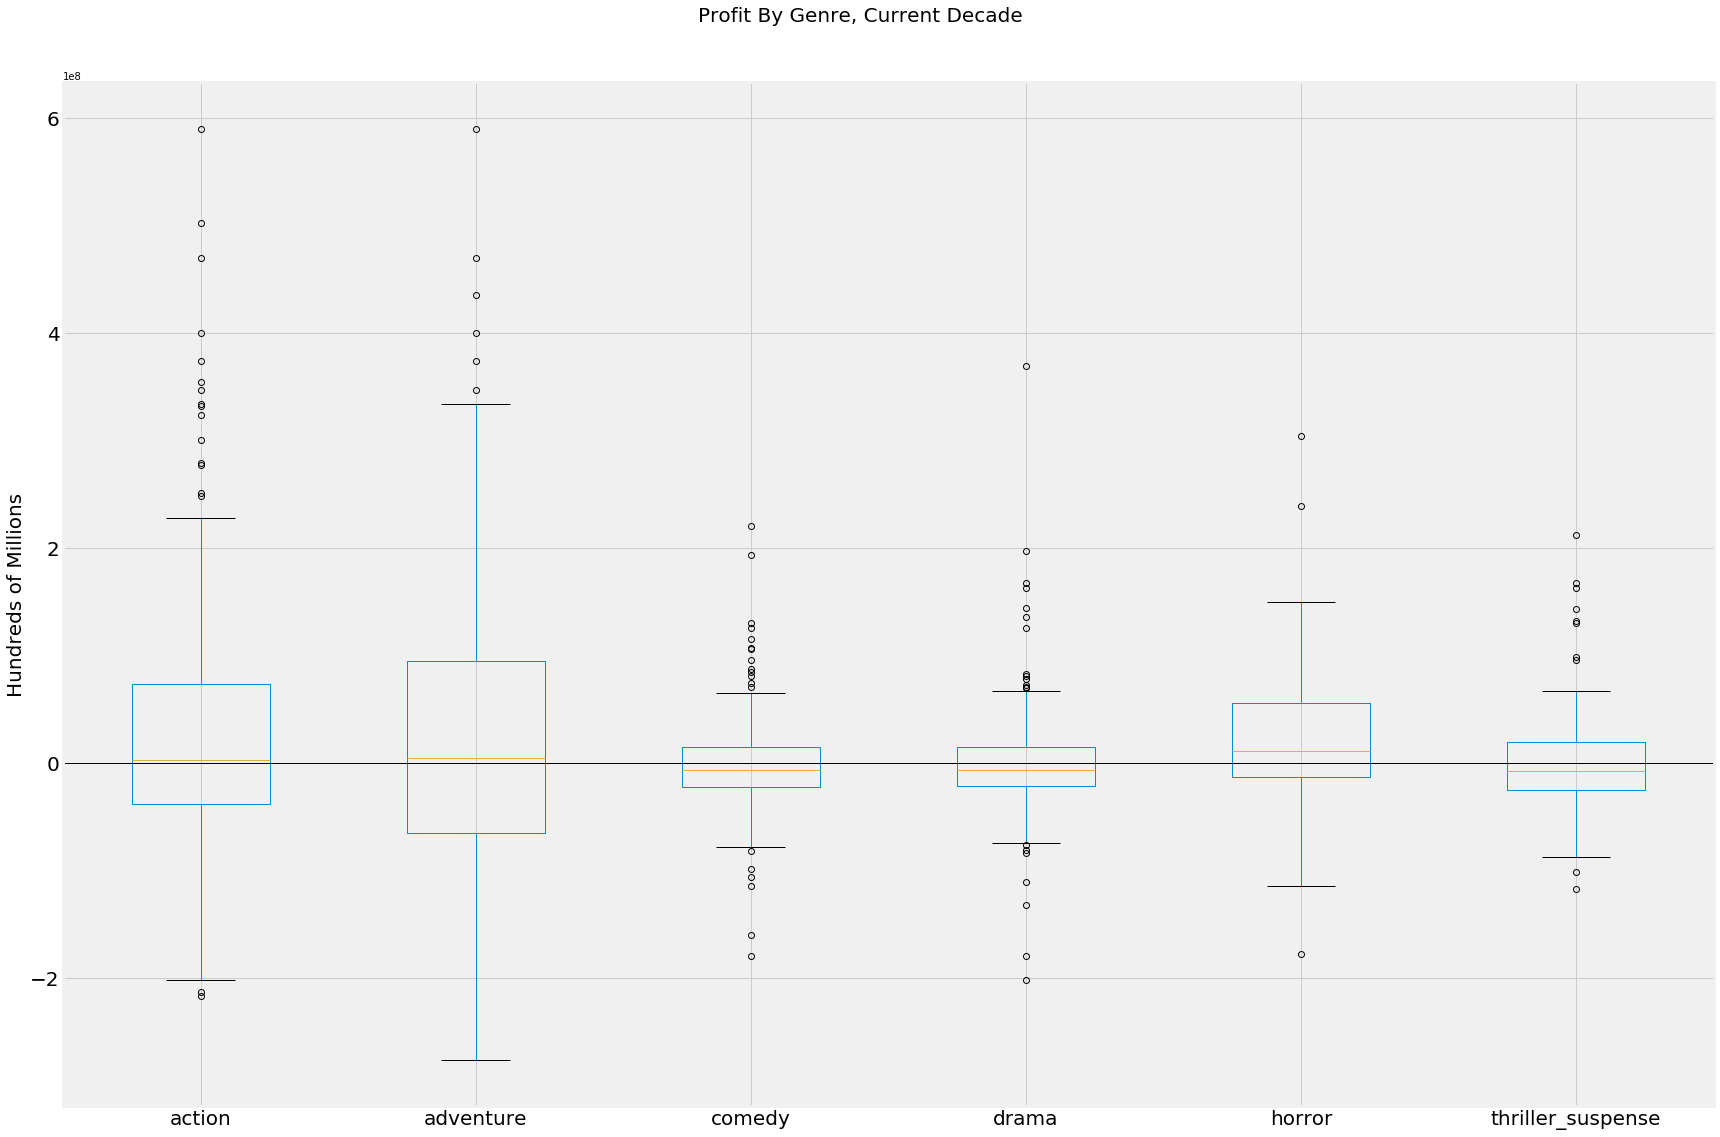

In [94]:
plot_boxplot(data=data, genres=genres, title='Profit By Genre, Current Decade', columns=profit_columns, starting_year=2010, y_label='Hundreds of Millions')

## Summary

The boxplot helps shed some light on each genre's strengths and weaknesses.

**Movies are an outlier-driven business**
  - In this decade, every genre has outliers on both sides of profit and loss.
  - Action and Adventure have the highest profit outliers.
  - Comedy and Drama have the most losing outliers.
  
**Safe versus Risky**
  - Action and Adventure movies can make the most money but also lose the most.
  - The "safest" genres of Comedy, Drama, and Thriller/Suspense (meaning the tightest whiskers) still have plenty of outliers on the loser side. 
  - Horror is in the middle of those two camps: more reward than Comedy/Drama/Thriller/Suspense and less loss than Action/Adventure.
  
**Breaking even**
  - Horror has the most chance to break even, followed by Action and Adventure.
  
**Median Profit**
  - In the scale on which movies make money, the median profits for all genres this decade are incredibly small.
  - Horror has the highest at 11.6 million. Adventure is at 5.2, and Action is at 2.9.
  - Comedy, Drama, and Thriller/Suspense are all double digit median losers this decade.
  
**Recommendation**
  - Based on the past decade of movie results, I would suggest pursuing Horror movies.
  
**Final step**
  - Let's examine each genre's performance by its release week and see if we learn anything interesting. 

# Analyze By Release Week

We will now dive into the performance of movies by their release week in the calendar year (e.g. 1 - 53 (some years stretch into a 53rd week)).

- 17.1 Look at the number of movies in every release week. 
- 17.2 Summarize our findings.
- 17.3 Look at the number of movies in every release week in separate bar graphs. 
- 17.4 Summarize our findings.
- 17.5 Look at the number of movies in every release week this decade in separate bar graphs. 
- 17.6 Summarize our findings. 
- 17.7 Look at the difference in median worldwide box office gross amounts in every release week (all-time versus this decade).
- 17.8 Summarize our findings. 
- 17.9 Look at the difference in median worldwide production budget amounts in every release week (all-time versus this decade).
- 17.10 Summarize our findings.
- 17.11 Look at the difference in median worldwide profit amounts in every release week (all-time versus this decade).
- 17.12 Summarize our findings.
- 17.13 Look at breakeven percentages.
  - 17.13.1 In every release week for all-time.
  - 17.13.2 Summarize our findings.
  - 17.13.3 In every release week for this decade.
  - 17.13.4 Summarize our findings.
  - 17.13.5 By decade.
  - 17.13.6 Summarize our findings.
- 17.14 Summarize our findings.

## Number of Movies

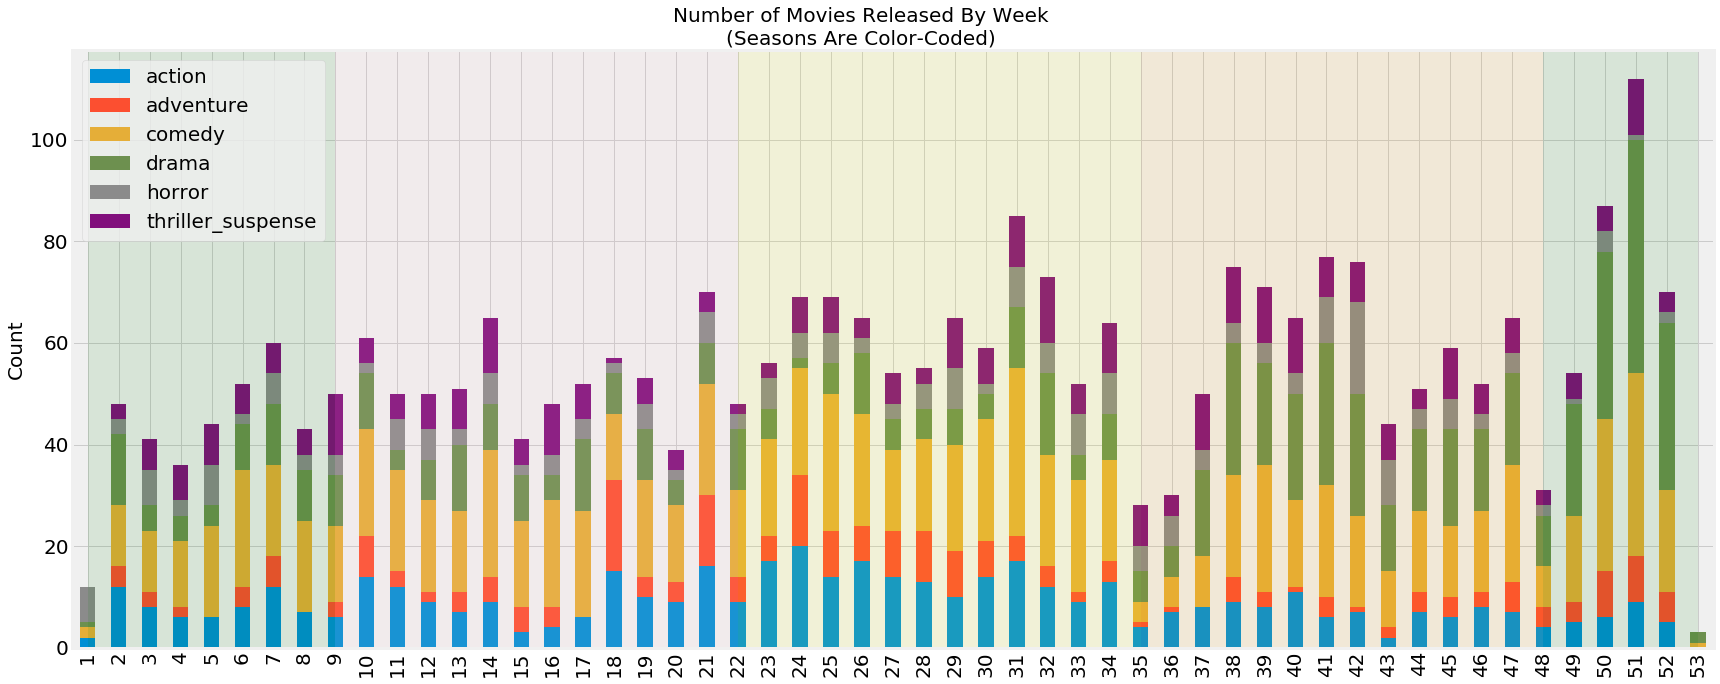

In [95]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24, 9))
figure.suptitle('Number of Movies Released By Week\n(Seasons Are Color-Coded)', fontsize=20, y=1.05)

grp = data.groupby('release_week')[genres].sum()
grp.plot(kind='bar', stacked=True, ax=axis)
axis.set_ylabel('Count', fontsize=20)
axis.set_xlabel('')
axis.tick_params(labelsize=20)
axis.legend(genres, fontsize=20)

# Subtract one from axvspan ranges to account for it being a bar chart and not a line chart (e.g. Spring is weeks 9-22)
axis.axvspan(8, 21, alpha=0.1, facecolor='pink')
axis.axvspan(21, 34, alpha=0.1, facecolor='yellow')
axis.axvspan(34, 47, alpha=0.1, facecolor='orange')
axis.axvspan(47, 52, alpha=0.1, facecolor='green')
axis.axvspan(0, 8, alpha=0.1, facecolor='green')

plt.tight_layout()

## Quick Takeaways

Other than a few weeks, there have been a healthy amount of movies being released on every possible week.

Let's subdivide by genre to get a better look.

## All-Time

In [96]:
def num_movies_released_by_release_week_by_genre(data, title, starting_year=1970, genres=genres, colors=colors):
    figure, axes = plt.subplots(nrows=6, ncols=1, figsize=(24, 16), sharex=True, sharey=True)
    figure.suptitle(title, fontsize=20, y=1.02)

    for genre, axis, color in zip(genres, axes.flat, colors):
        grp = data[(data['release_year'] >= starting_year) & (data[genre])].groupby('release_week')['title'].count()

        # If the series is missing a decade, add it as an index
        # Then set the value to 0
        for week in range(1, 54):
            if week not in grp.index:
                grp.loc[week] = 0

        grp.sort_index(inplace=True, ascending=True)

        grp.plot(kind='bar', xticks=range(1, 54), ax=axis, linewidth=3, color=color)
        axis.set_ylabel('Count', fontsize=12)
        axis.set_xlabel('')
        axis.legend([genre], loc=2, fontsize=15)

        # Subtract one from axvspan ranges to account for it being a bar chart and not a line chart
        axis.axvspan(8, 21, alpha=0.1, facecolor='pink')
        axis.axvspan(21, 34, alpha=0.1, facecolor='yellow')
        axis.axvspan(34, 47, alpha=0.1, facecolor='orange')
        axis.axvspan(47, 52, alpha=0.1, facecolor='green')
        axis.axvspan(0, 8, alpha=0.1, facecolor='green')

    plt.tight_layout() 

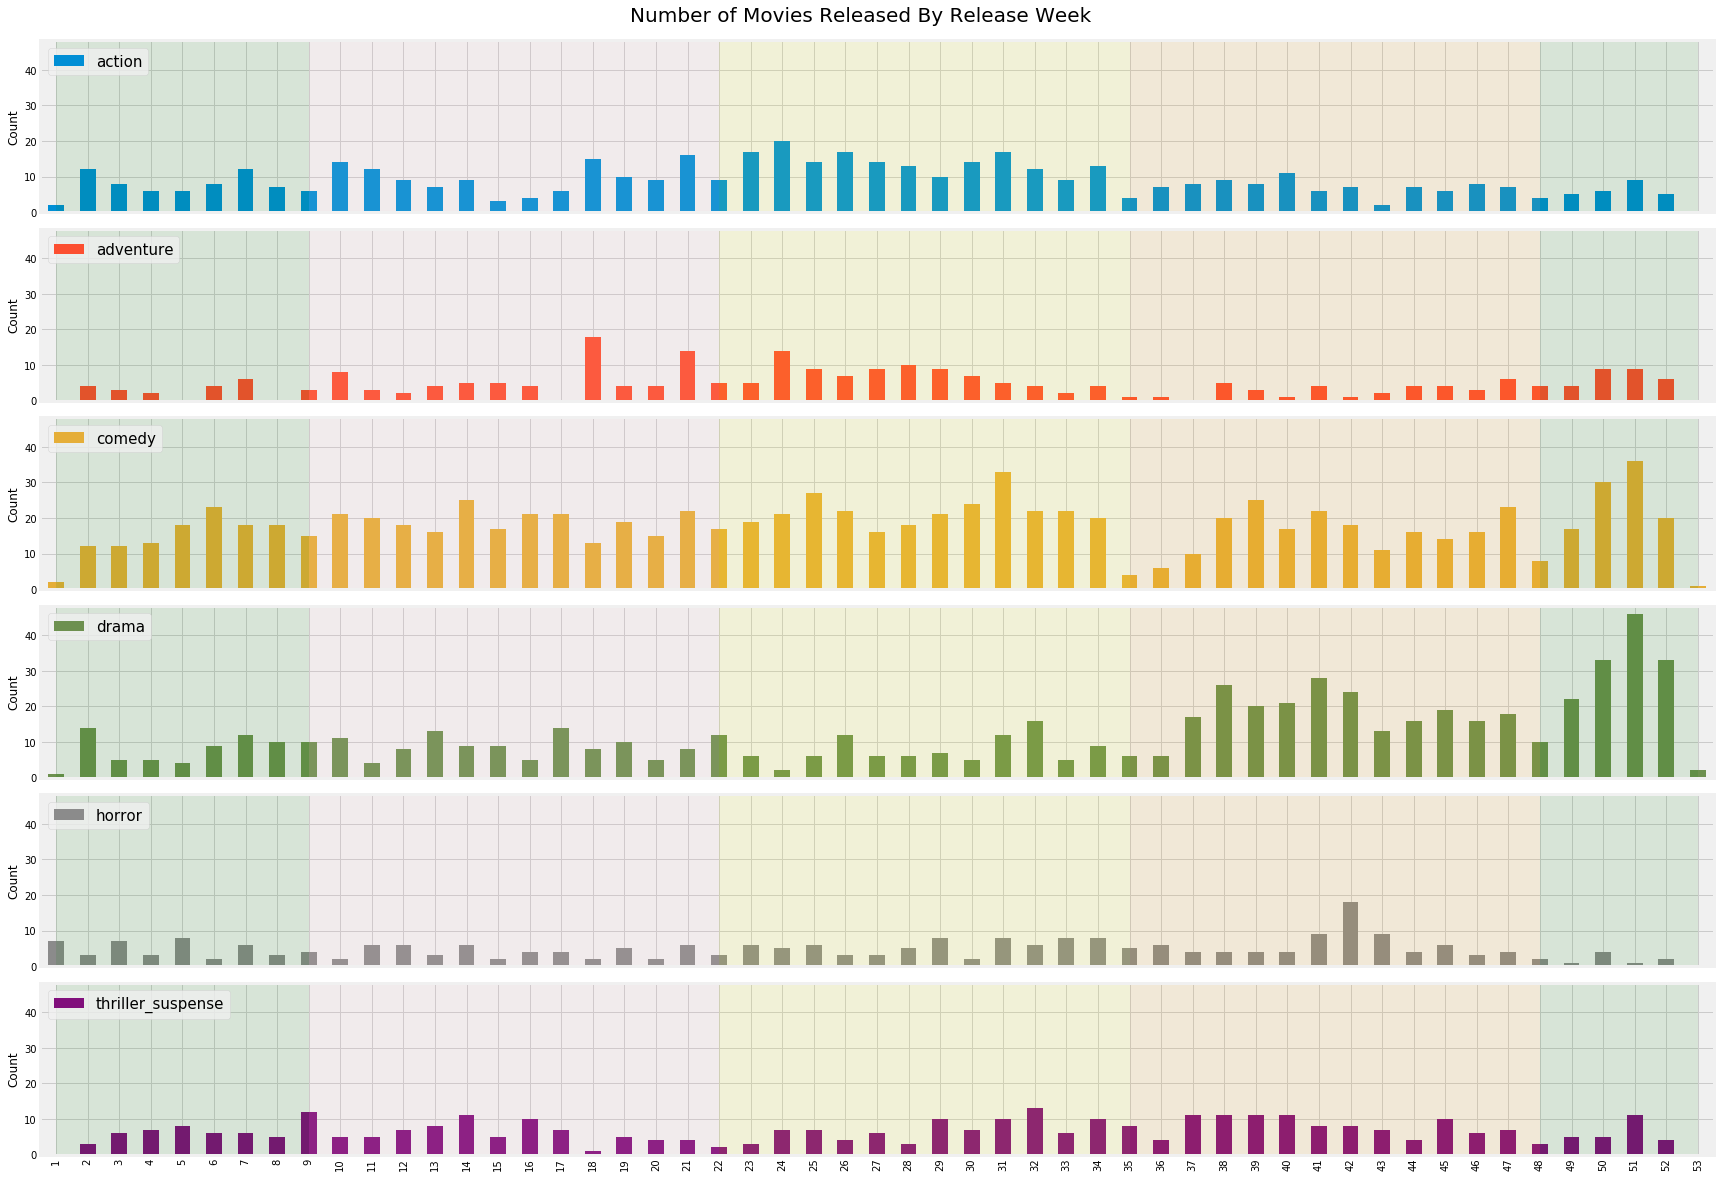

In [97]:
num_movies_released_by_release_week_by_genre(data=data, title='Number of Movies Released By Release Week', 
                                             starting_year=1970, genres=genres, colors=colors)

## Quick Takeaways

Comedy has been released in good numbers in practically every week.

Drama is released the most in Fall and Winter. 

Action and Adventure are released the most in Summer.

Horror and Thriller/Suspense don't really have clear patterns.

## This Decade

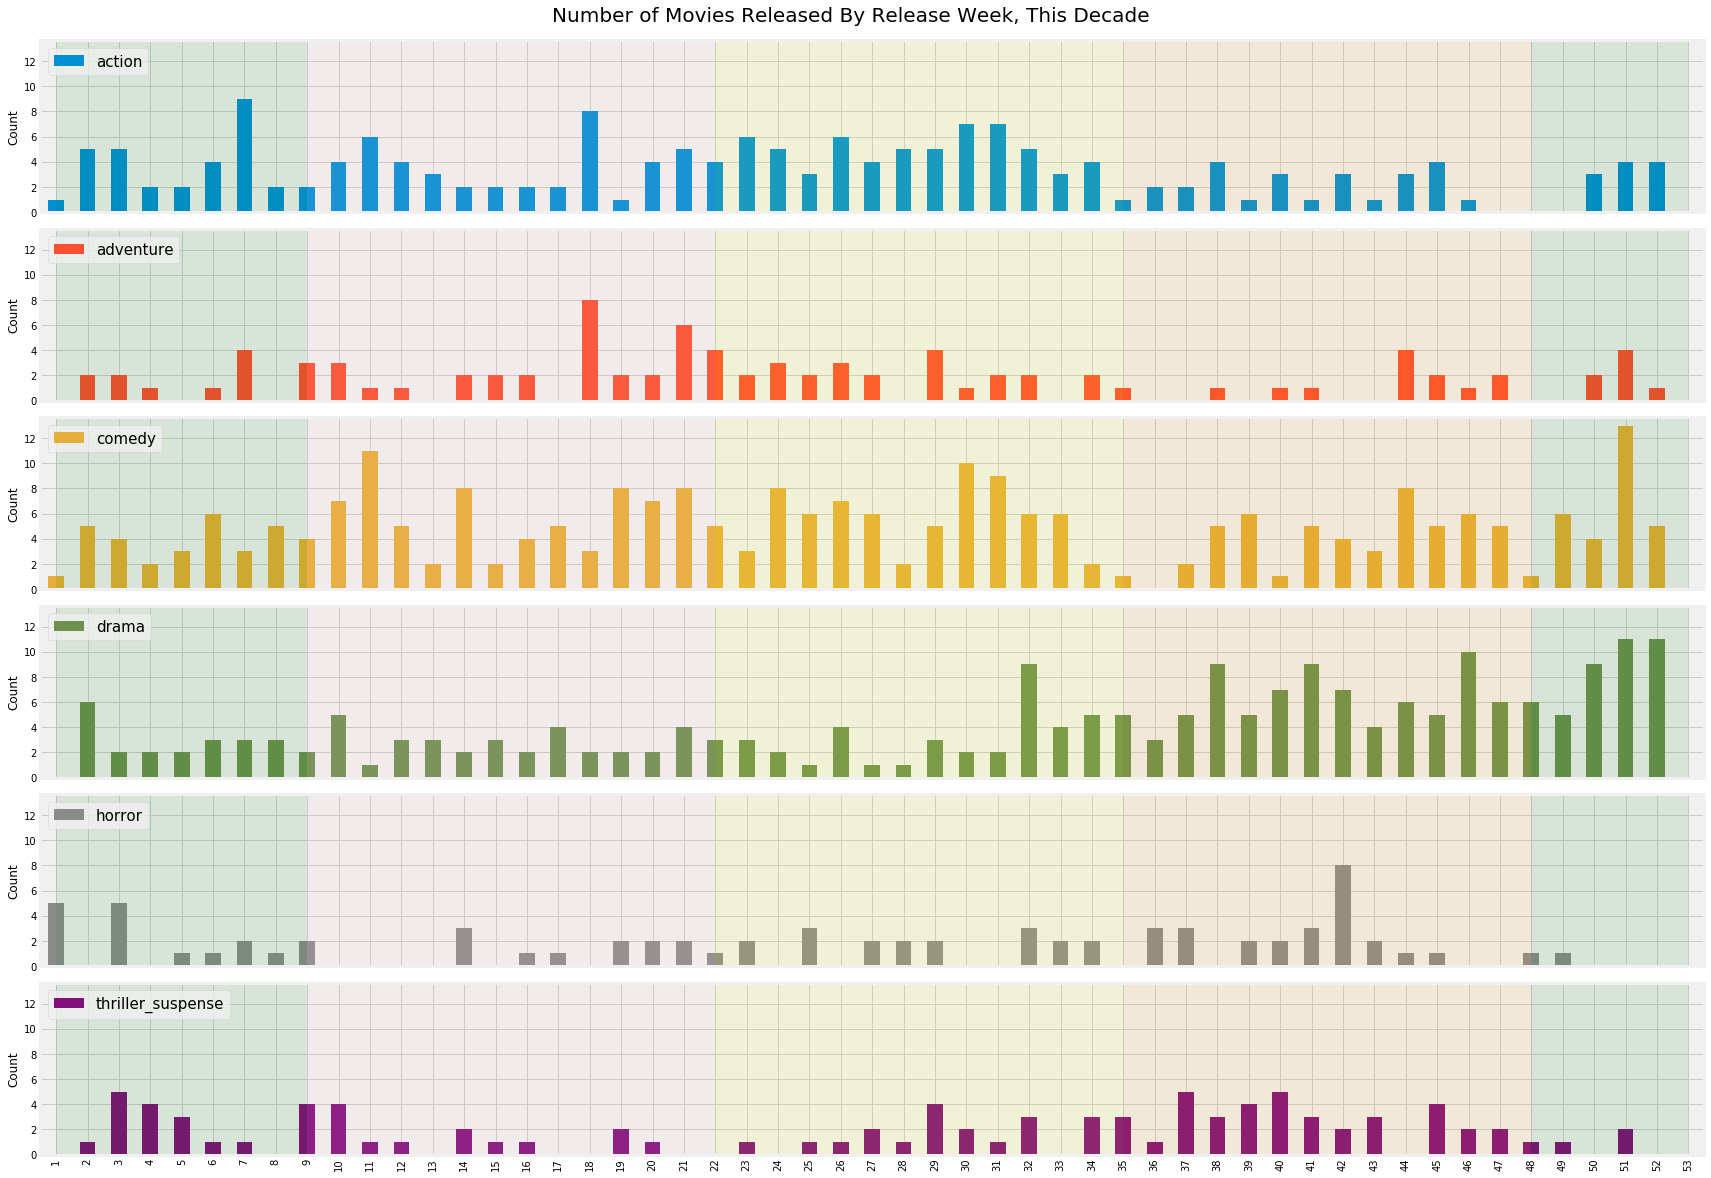

In [98]:
num_movies_released_by_release_week_by_genre(data=data, title='Number of Movies Released By Release Week, This Decade', 
                                             starting_year=2010, genres=genres, colors=colors)

## Quick Takeaways

Comedy is released consistently in more weeks than any other genre.

Drama is still weighted towards Fall and Winter weeks.

Action is concentrated on Summer releases.

Adventure, Horror, and Thriller/Suspense have less clear patterns.

## Median Gross

In [99]:
# Custom function to graph a fill_between line graph of a stat's performance by release week in two ways: all-time and the current decade 
def fill_between_by_release_week(data, title, stat, genres=genres, colors=colors, y_label='Millions'):
    figure, axes = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=True, figsize=(24, 16))
    figure.suptitle(title, fontsize=20, y=1.05)

    for genre, axis, color in zip(genres, axes.flat, colors):
        grp1 = data[data[genre]].groupby('release_week')[stat].median() / 1000000
        grp2 = data[(data['release_year'] >= 2010) & (data[genre])].groupby('release_week')[stat].median() / 1000000

        for year in range(1, 54, 1):
            if year not in grp1.index:
                grp1.loc[year] = 0

            if year not in grp2.index:
                grp2.loc[year] = 0

        # Sort the series by its index to have the decades in chronological order                
        grp1.sort_index(ascending=True, inplace=True)
        grp2.sort_index(ascending=True, inplace=True)

        axis.plot(range(1,54), grp1, color=colors[0], label='All-Time')
        axis.plot(range(1,54), grp2, color=colors[1], label='This Decade') 

        axis.fill_between(range(1, 54), y1=grp1, y2=grp2, where=grp2 <= grp1, facecolor=colors[0], interpolate=True, edgecolor='k')
        axis.fill_between(range(1, 54), y1=grp1, y2=grp2, where=grp2 > grp1, facecolor=colors[1], interpolate=True, edgecolor='k')

        axis.set_title(genre, fontsize=20)

        axis.set_ylabel(y_label, fontsize=12)
        axis.set_xlabel('')
        axis.legend(loc=2, fontsize=15)
        axis.axvspan(9, 22, alpha=0.2, color='pink')
        axis.axvspan(22, 35, alpha=0.2, color='yellow')
        axis.axvspan(35, 48, alpha=0.2, color='orange')
        axis.axvspan(48, 53, alpha=0.2, color='green')
        axis.axvspan(1, 9, alpha=0.2, color='green')

    plt.tight_layout() 

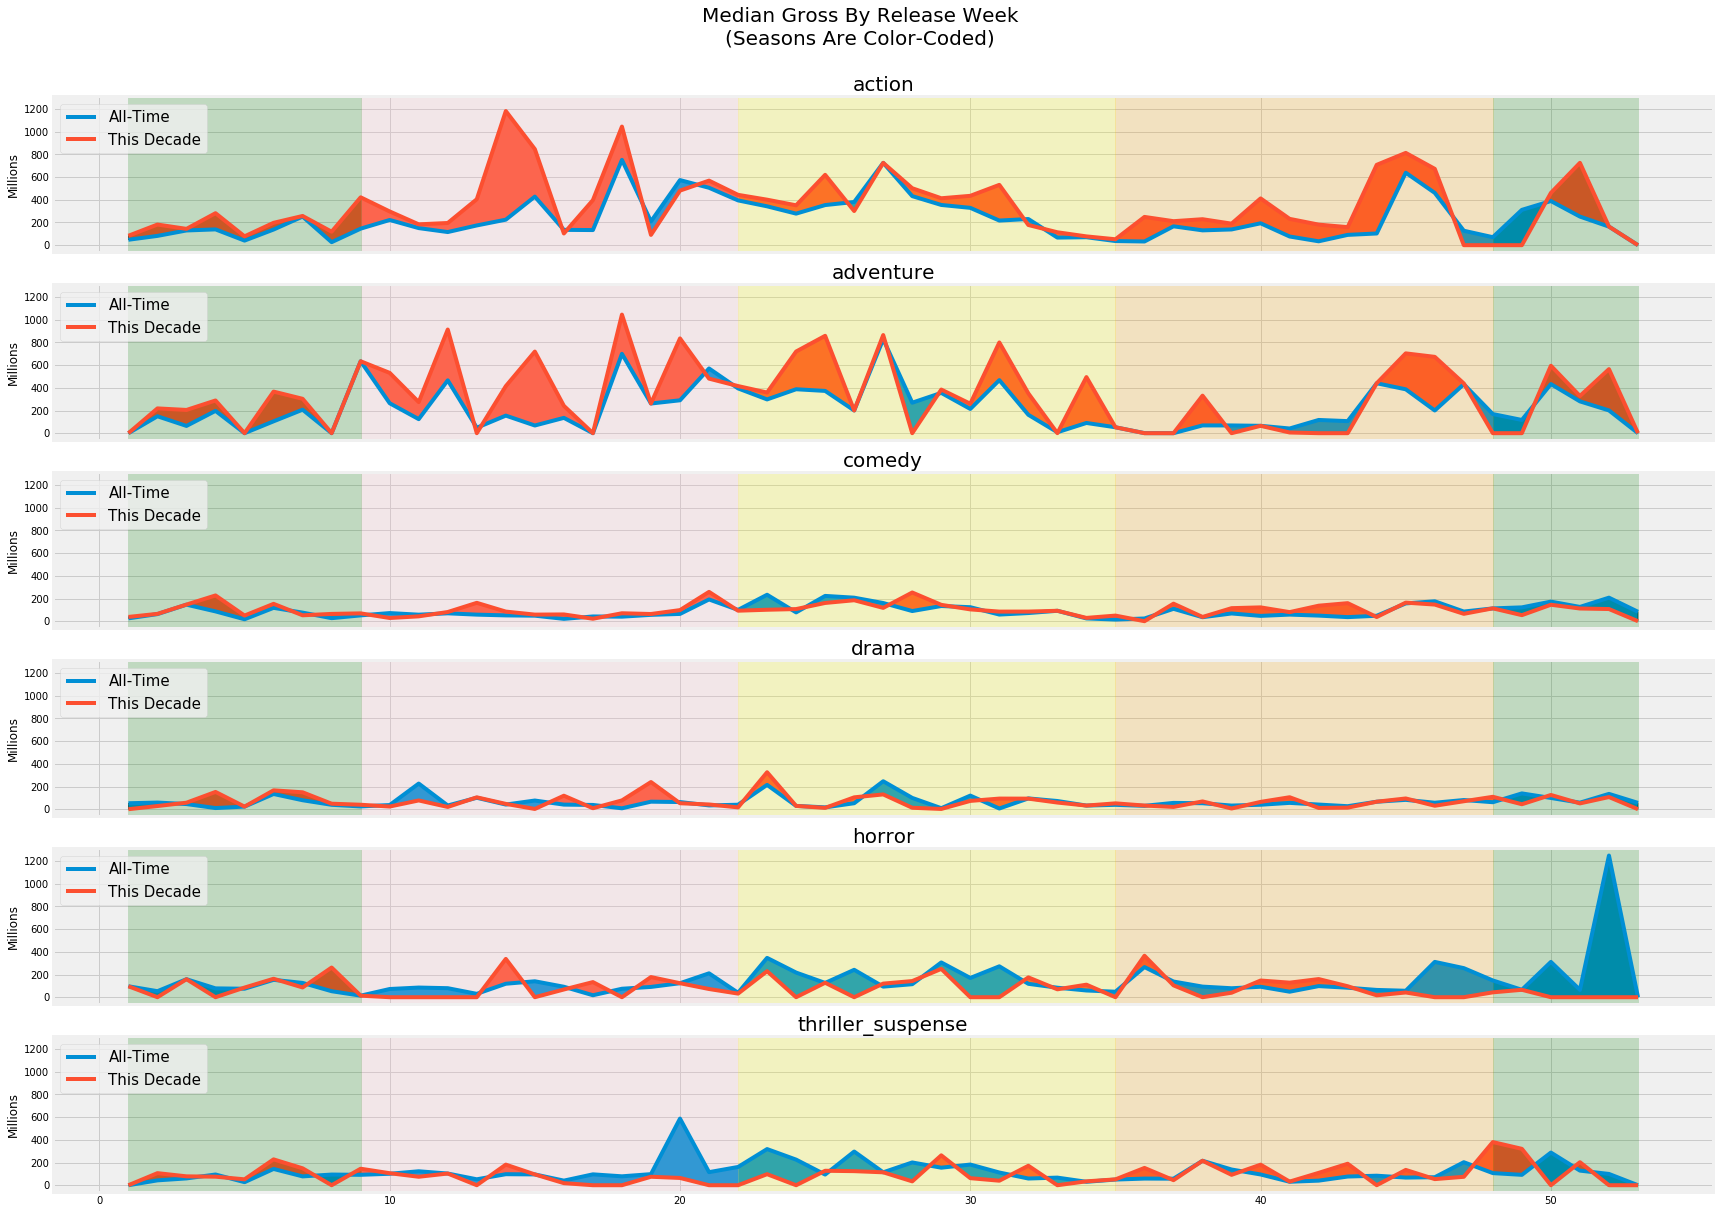

In [100]:
fill_between_by_release_week(data=data, title='Median Gross By Release Week\n(Seasons Are Color-Coded)', 
                             stat='worldwide_adj', genres=genres, colors=colors, y_label='Millions')

## Quick Takeaways

**Action**
  - Has higher median grosses on almost every release week this decade compared to its historical numbers.
  - The biggest increases occur in Spring and Fall.
  - Summer in general is higher this decade than it has been as well.
  
**Adventure**
  - Has higher median grosses on almost every release week this decade compared to its historical numbers.
  - The biggest increases occur in Spring and Summer.
  
**Comedy and Drama**
  - Seem to perform about the same this decade compared to historically.
  
**Horror**
  - Has worse grosses during Summer and Winter releases this decade.
  
**Thriller/Suspense**
  - Seems to have lower median grosses in general this decade, most notably from the end of Spring through Summer.

## Budgets

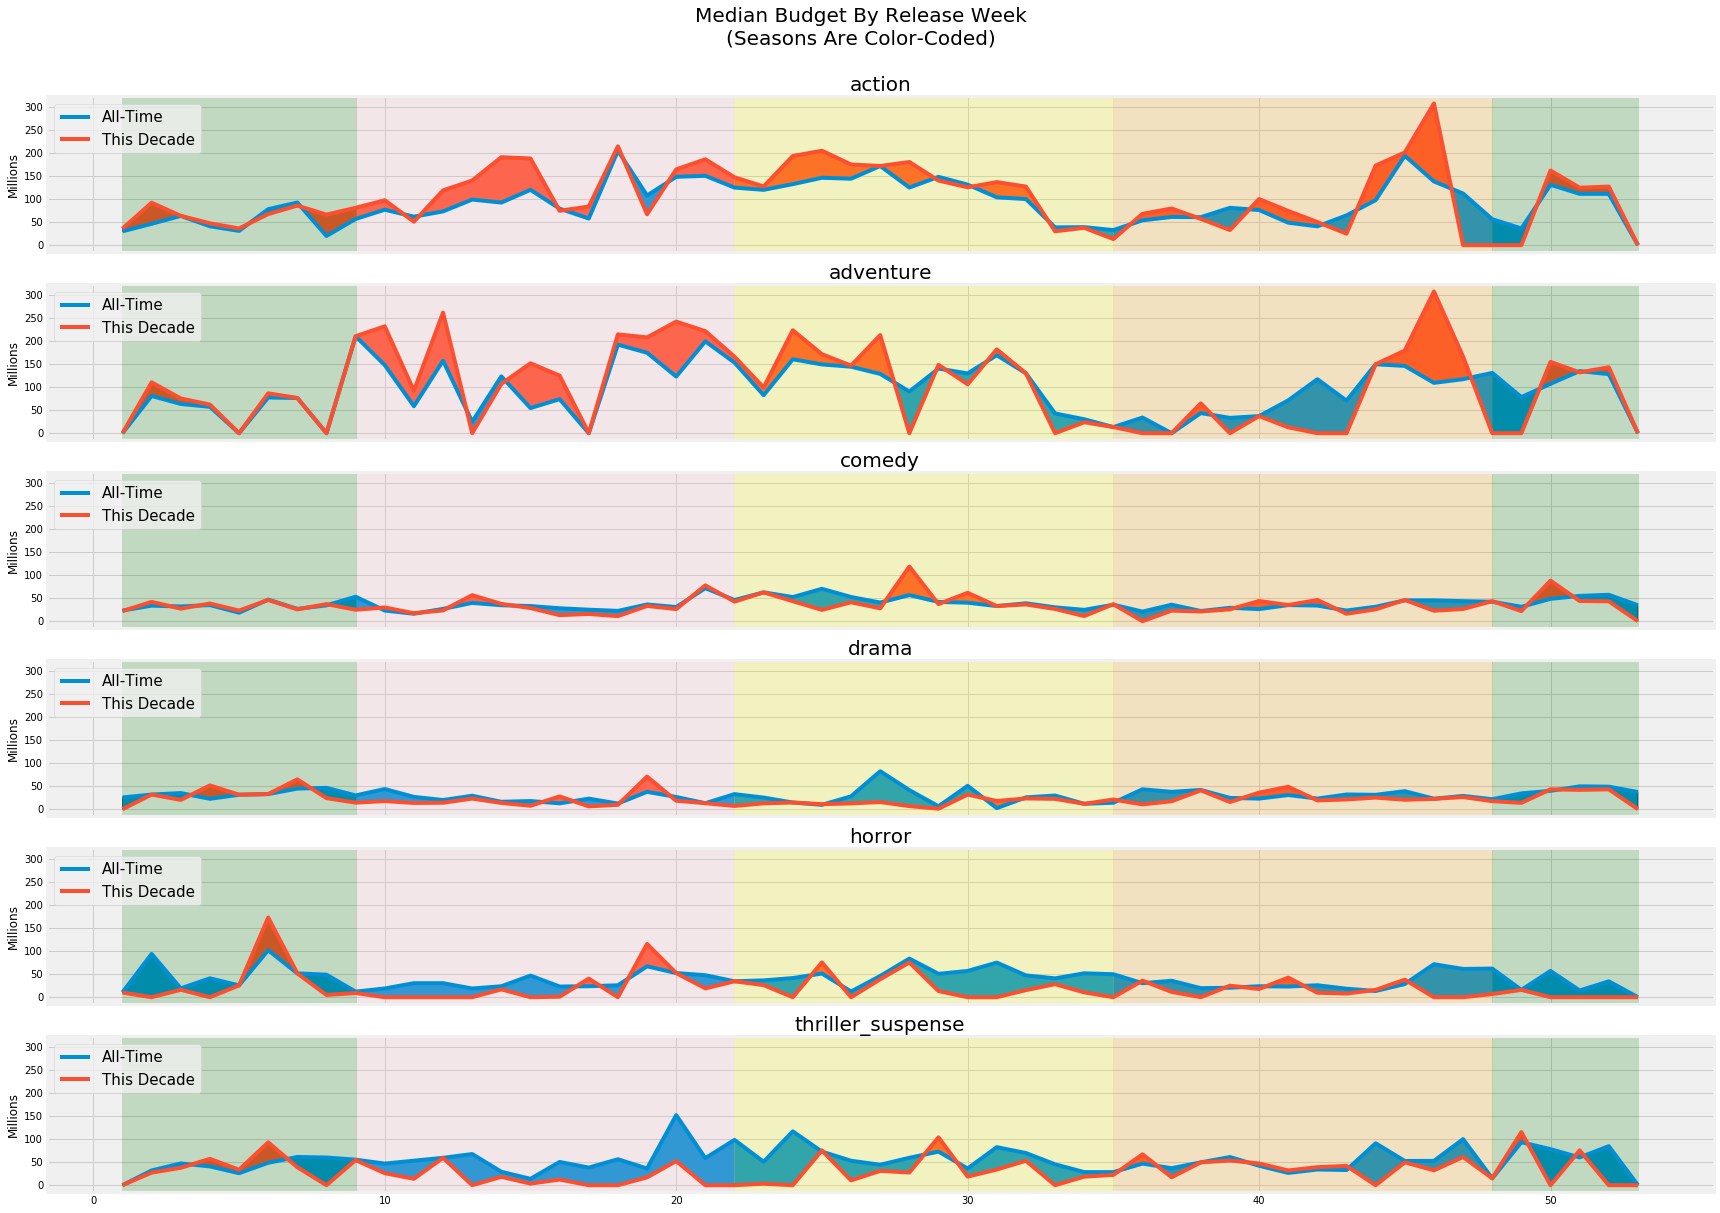

In [101]:
fill_between_by_release_week(data=data, title='Median Budget By Release Week\n(Seasons Are Color-Coded)', 
                             stat='budget_adj', genres=genres, colors=colors, y_label='Millions')

## Quick Takeaways

  - Action and Adventure have higher median budgets for pretty much every release week.
  - Comedy and Drama seem to have moderately lower budgets overall this decade in almost every release week.
  - Horror and Thriller/Suspense have steep drops in budget this decade for almost every release week.

## Median Profit

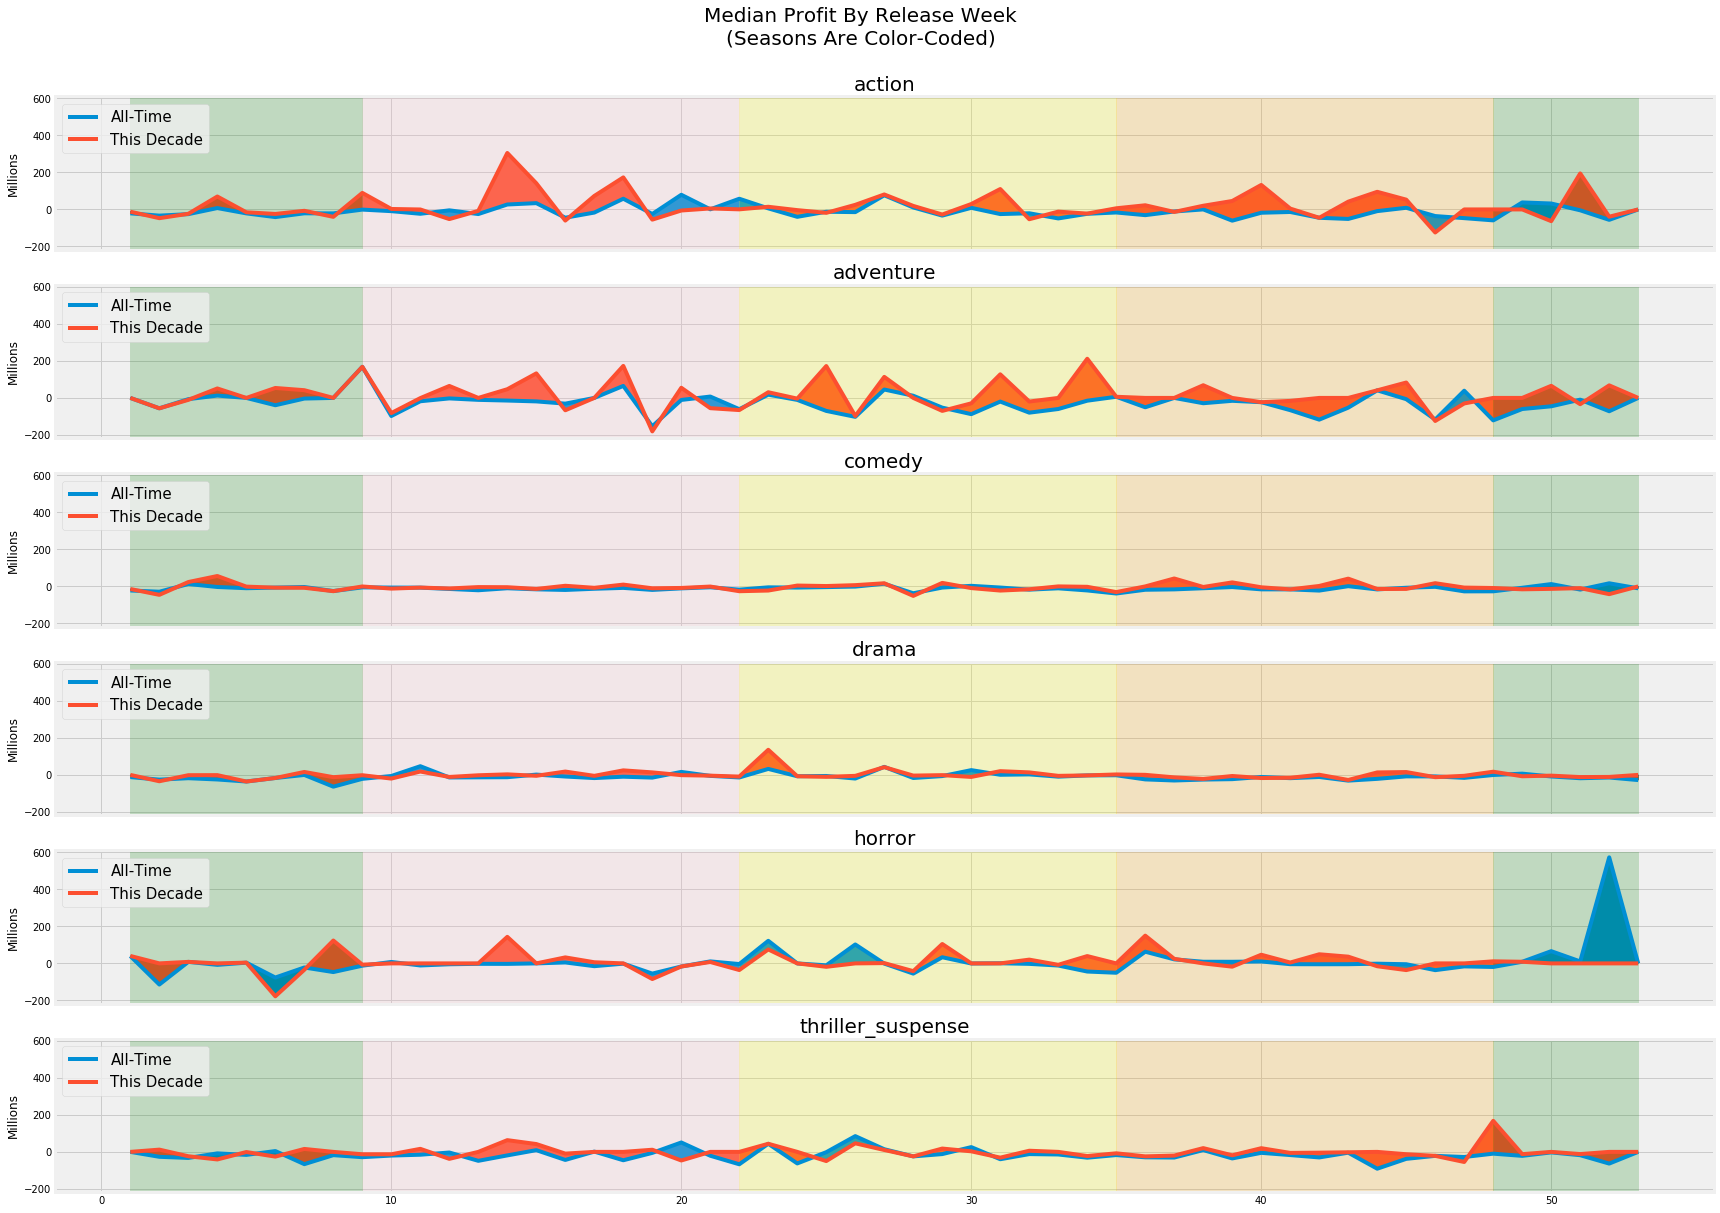

In [102]:
fill_between_by_release_week(data=data, title='Median Profit By Release Week\n(Seasons Are Color-Coded)', 
                             stat='profit', genres=genres, colors=colors, y_label='Millions')

## Quick Takeaways

**Similar results to Median Grosses analysis**
  - Action and Adventure are more profitable this decade than historically in almost every release week.
  - Comedy and Drama perform about the same as they did historically.
  - Horror has a few weeks where it has higher median profits than it does historically.
  - Thriller/Suspense in general performs a bit better this decade, most notably in Spring.

## Breakeven Percentage

### All-Time

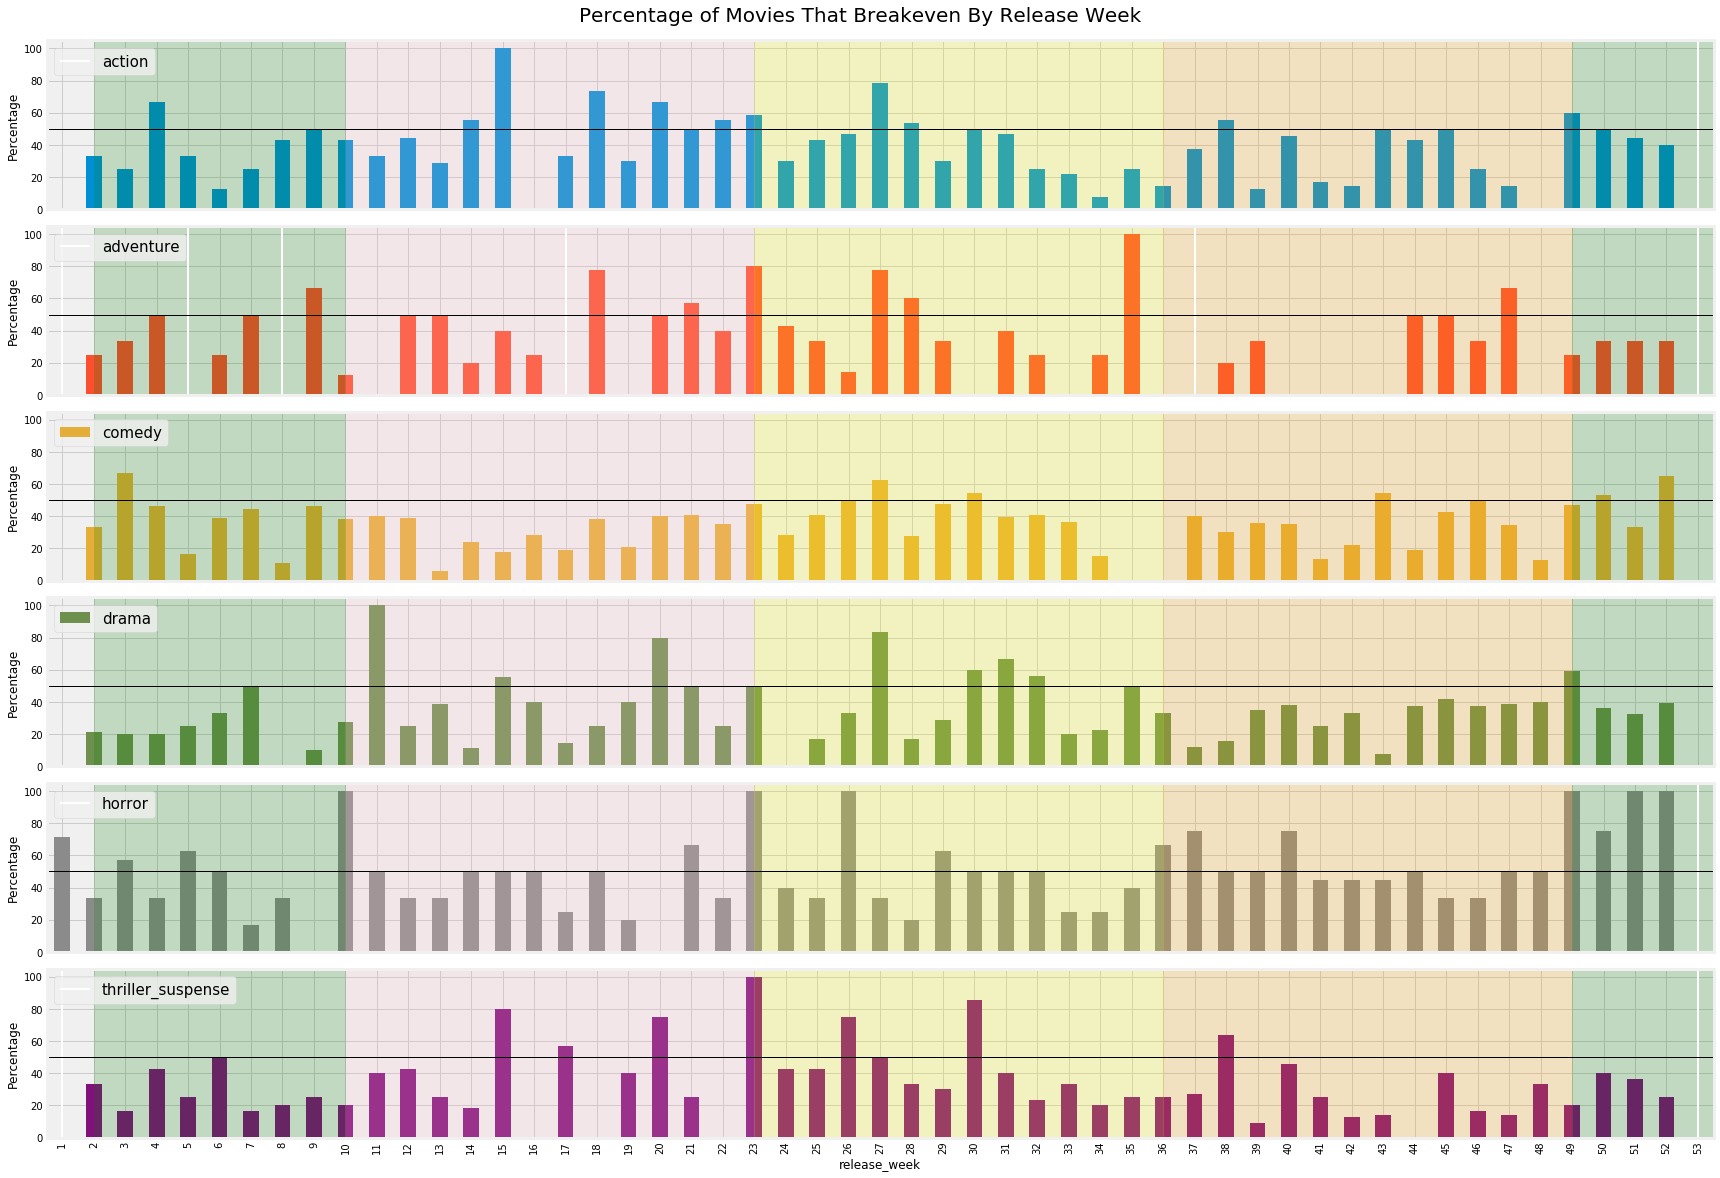

In [103]:
release_weeks_with_no_movies_all_time = [0] * 6
counter = [0, 1, 2, 3, 4, 5]

figure, axes = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=True, figsize=(24, 16))
figure.suptitle('Percentage of Movies That Breakeven By Release Week', fontsize=20, y=1.02)

for genre, axis, color, count in zip(genres, axes.flat, colors, counter):
    # Create two series with decades as indexes and count and sum as values
    #grp_count = data[data[genre]].groupby('release_week')['worldwide_breakeven'].count().copy()
    #grp_sum = data[data[genre]].groupby('release_week')['worldwide_breakeven'].sum().copy()
    grp = data[data[genre]].groupby('release_week')['worldwide_breakeven'].mean() * 100
    
    # If the series is missing a decade, add it as an index
    # Then set the count to 1 and the sum to 0
    # This avoids division by zero problems when calculating the percentages
    for week in range(1, 54):
        if week not in grp.index:
            grp.loc[week] = 0
            axis.axvline(week - 1, color='white', linewidth=2)
            release_weeks_with_no_movies_all_time[count] += 1

    # Sort the series by their index to have the decades in chronological order                
    grp.sort_index(ascending=True, inplace=True)

    grp.plot(kind='bar', xticks=range(1, 54), ax=axis, linewidth=3, color=color)
    axis.set_ylabel('Percentage', fontsize=12)
    axis.legend([genre], loc=2, fontsize=15)
    
    # Show 50% breakeven line
    axis.axhline(50, color='k', linewidth=1)
    
    axis.axvspan(9, 22, alpha=0.2, color='pink')
    axis.axvspan(22, 35, alpha=0.2, color='yellow')
    axis.axvspan(35, 48, alpha=0.2, color='orange')
    axis.axvspan(48, 53, alpha=0.2, color='green')
    axis.axvspan(1, 9, alpha=0.2, color='green')
    
plt.tight_layout() 

<div class="alert alert-block alert-info">
    <b>The white vertical lines mean that no movies of that genre have ever been released on that week.</b>
    <br>
    <br>
    <b>The black horizontal line marks the 50% breakeven percentage.</b>
</div>

### Quick Takeaways

It looks like historically the best chance to breakeven is with a Horror movie in December.

### This Decade

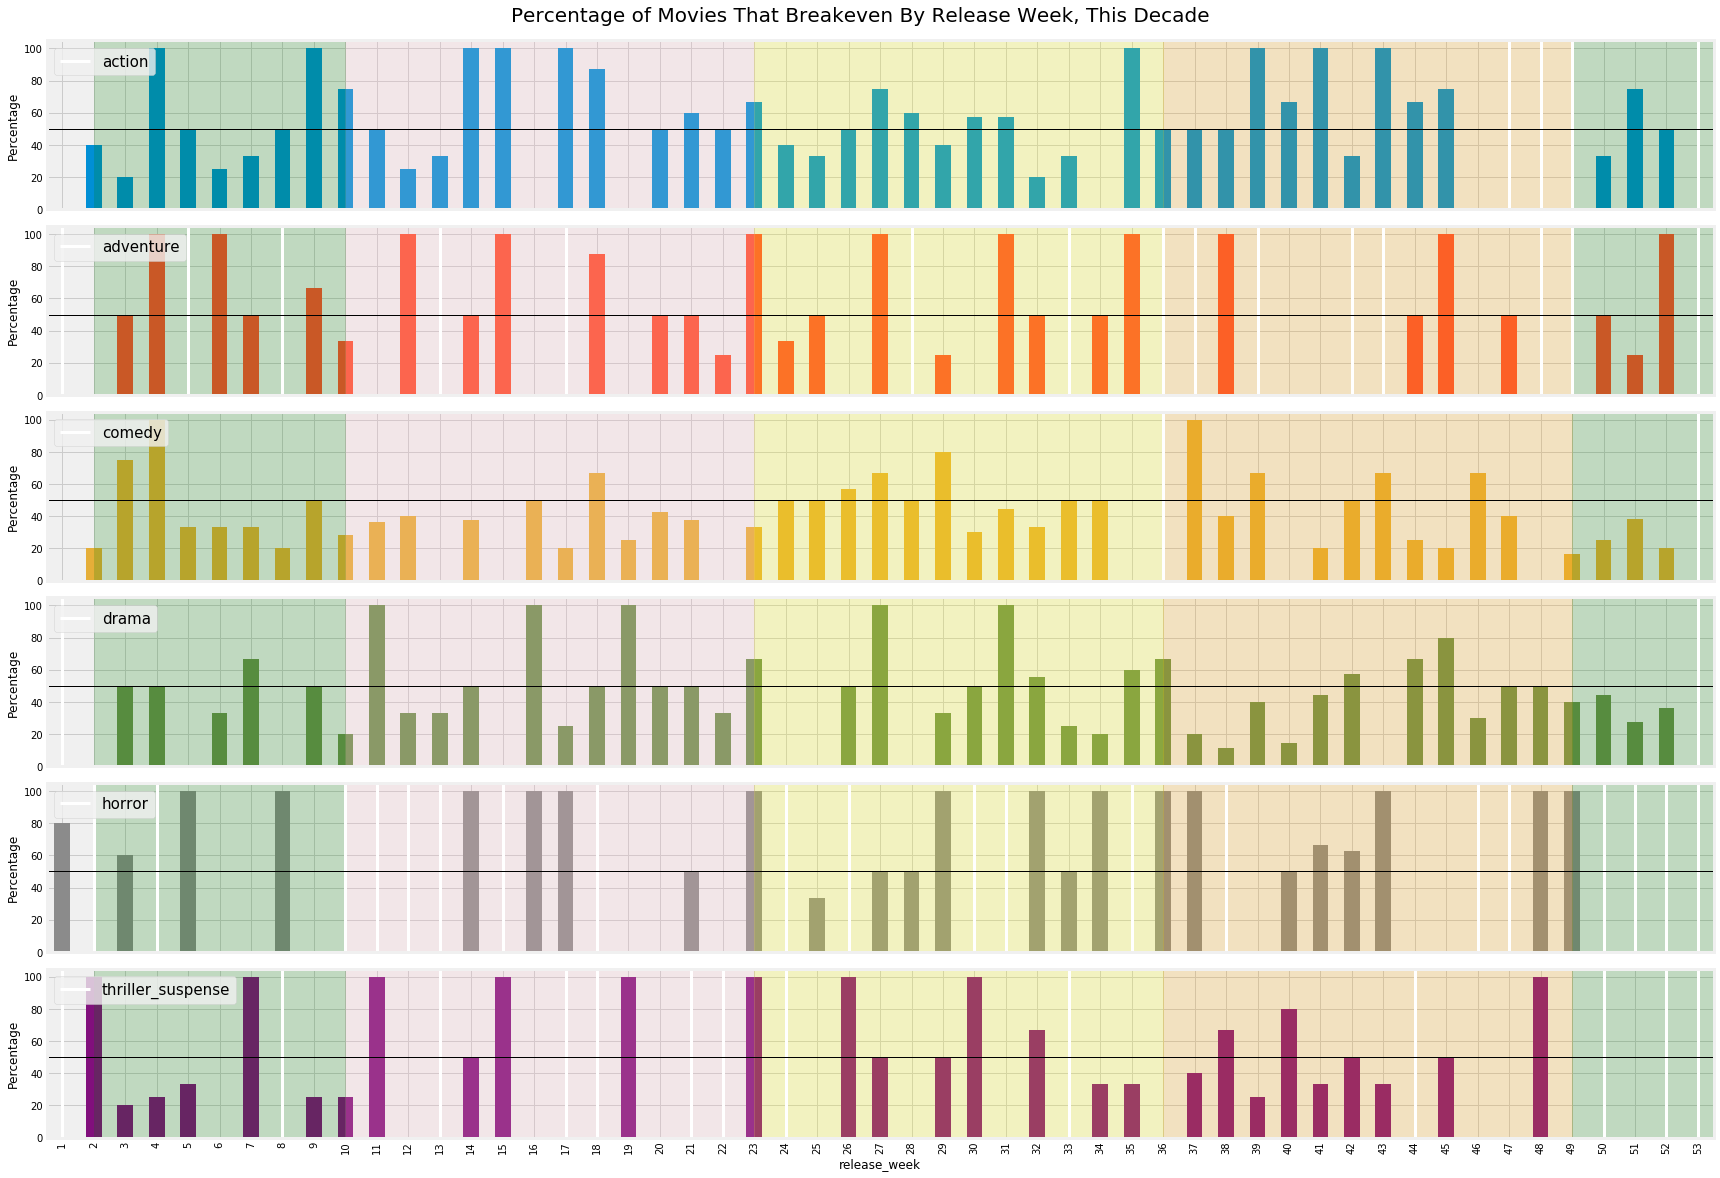

In [104]:
release_weeks_with_no_movies_this_decade = [0] * 6
counter = [0, 1, 2, 3, 4, 5]

figure, axes = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=True, figsize=(24, 16))
figure.suptitle('Percentage of Movies That Breakeven By Release Week, This Decade', fontsize=20, y=1.02)

for genre, axis, color, count in zip(genres, axes.flat, colors, counter):
    # Create two series with decades as indexes and count and sum as values
    #grp_count = data[data[genre]].groupby('release_week')['worldwide_breakeven'].count().copy()
    #grp_sum = data[data[genre]].groupby('release_week')['worldwide_breakeven'].sum().copy()
    grp = data[(data['release_year'] >= 2010) & (data[genre])].groupby('release_week')['worldwide_breakeven'].mean() * 100
    
    # If the series is missing a decade, add it as an index
    # Then set the count to 1 and the sum to 0
    # This avoids division by zero problems when calculating the percentages
    for week in range(1, 54):
        if week not in grp.index:
            grp.loc[week] = 0
            axis.axvline(week - 1, color='white', linewidth=3)
            release_weeks_with_no_movies_this_decade[count] += 1

    # Sort the series by their index to have the decades in chronological order                
    grp.sort_index(ascending=True, inplace=True)

    grp.plot(kind='bar', xticks=range(1, 54), ax=axis, linewidth=3, color=color)
    axis.set_ylabel('Percentage', fontsize=12)
    axis.legend([genre], loc=2, fontsize=15)
    
    # Show 50% breakeven line
    axis.axhline(50, color='k', linewidth=1)
    
    axis.axvspan(9, 22, alpha=0.2, color='pink')
    axis.axvspan(22, 35, alpha=0.2, color='yellow')
    axis.axvspan(35, 48, alpha=0.2, color='orange')
    axis.axvspan(48, 53, alpha=0.2, color='green')
    axis.axvspan(1, 9, alpha=0.2, color='green')
    
plt.tight_layout() 

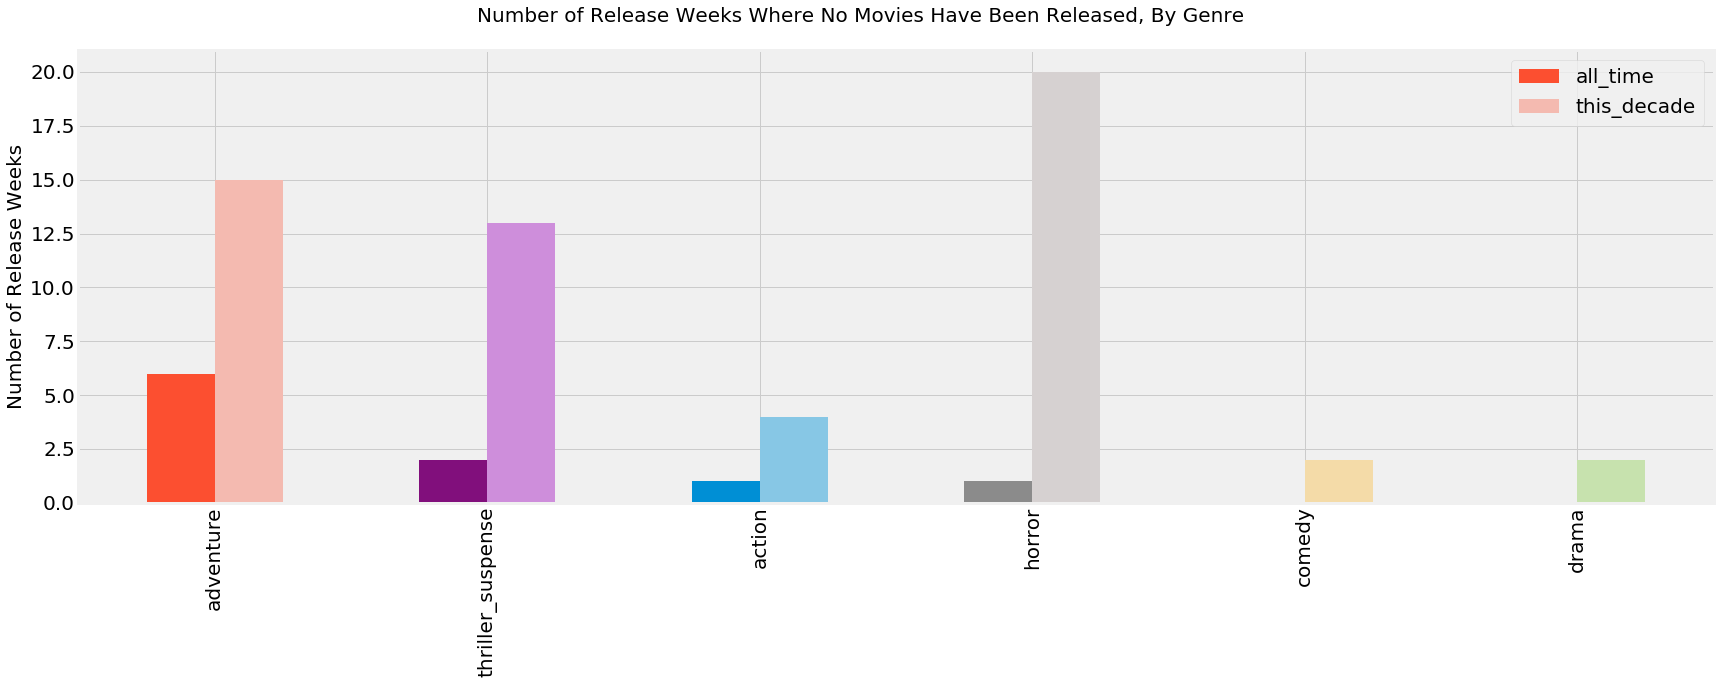

In [105]:
release_week = pd.DataFrame({'all_time': release_weeks_with_no_movies_all_time, 'this_decade': release_weeks_with_no_movies_this_decade}, index=genres)
release_week.sort_values(by='all_time', ascending=False, inplace=True)

color_list = generate_color_list(colors_needed=2, order_list=release_week.index)

figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(24, 9))
figure.suptitle('Number of Release Weeks Where No Movies Have Been Released, By Genre', fontsize=20, y=1.05)
release_week.plot(kind='bar', ax=axis, color=color_list)
axis.set_ylabel('Number of Release Weeks', fontsize=20)
axis.tick_params(labelsize=20)
axis.legend(fontsize=20)

plt.tight_layout()

### Quick Takeaways

It seems fewer release weeks are being utilized for some genres.

This might be coincidence, or it might be that studios don't think certain weeks work for some genres. 

In this decade, there are 20 weeks out of the year where a Horror movie hasn't been released!

In second place is Adventure with 15 missing weeks, then Thriller/Suspense with 13.

It seems like movies have a higher chance of breaking even this decade compared to the historical levels. This may be due to fewer movies being released overall, the growing assistance of the worlwide box office on a movie's financial picture, or studios being smarter about movie selection.

### Breakeven Percentage By Decade

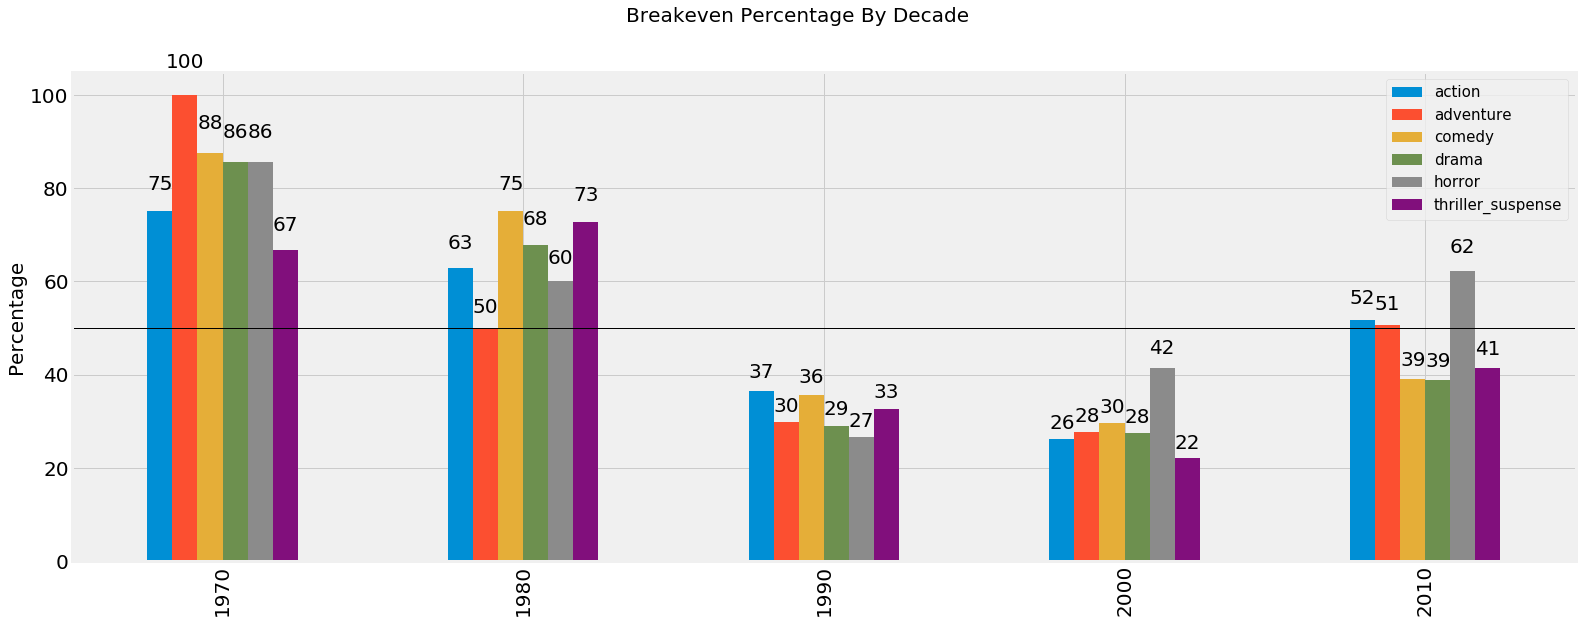

In [106]:
plot_by_time_and_stat(data=data, genres=genres, title='Breakeven Percentage By Decade', 
                      groupby_column='release_decade', stat_columns=breakeven_columns, 
                      aggregate_function='mean', apply_needed=True, apply_function=lambda x: x * 100, 
                      y_label='Percentage', y_ticks_needed=False, y_ticks='', legend_needed=True, 
                      legend_text=genres, color=colors, axhline_needed=True, axhline_value=50, autolabel_needed=True)

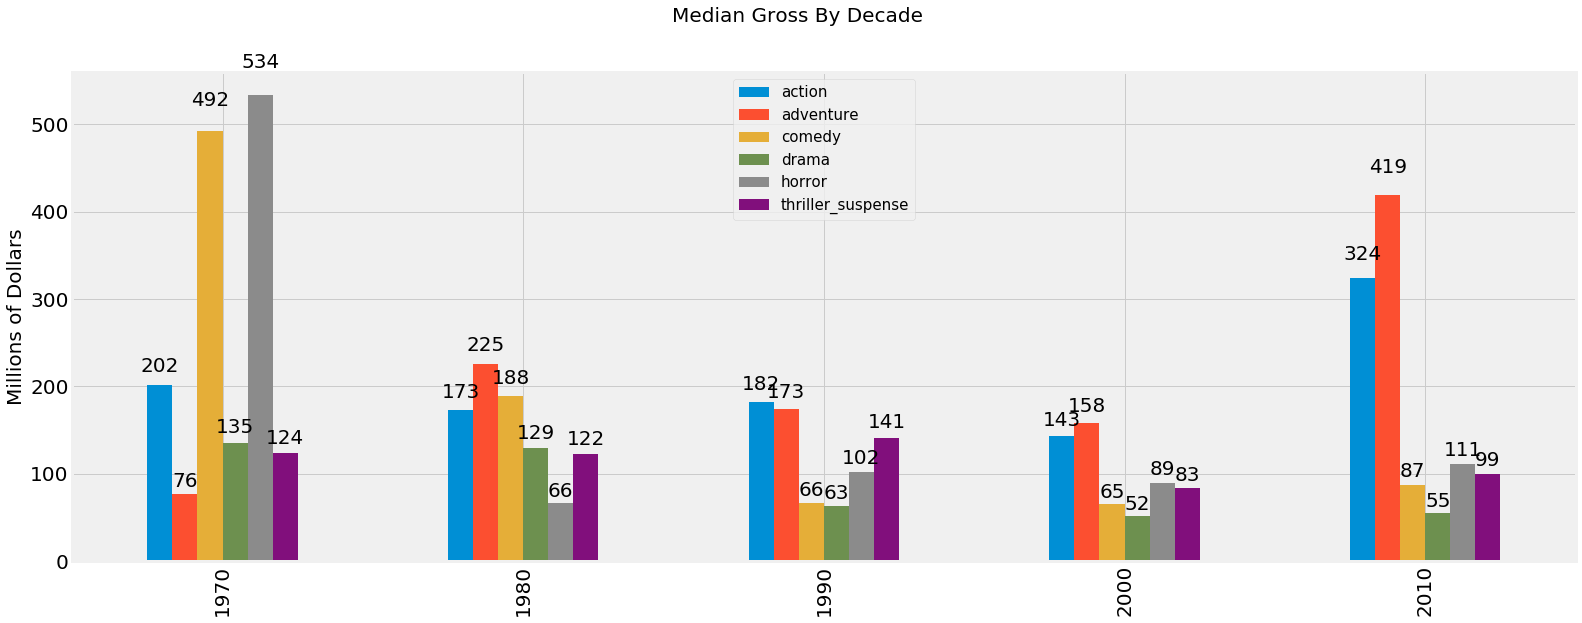

In [107]:
plot_by_time_and_stat(data=data, genres=genres, title='Median Gross By Decade', 
                      groupby_column='release_decade', stat_columns=gross_columns, 
                      aggregate_function='median', apply_needed=True, apply_function=lambda x: x / 1000000, 
                      y_label='Millions of Dollars', y_ticks_needed=False, y_ticks='', legend_needed=True, 
                      legend_text=genres, color=colors, axhline_needed=False, axhline_value='', autolabel_needed=True)

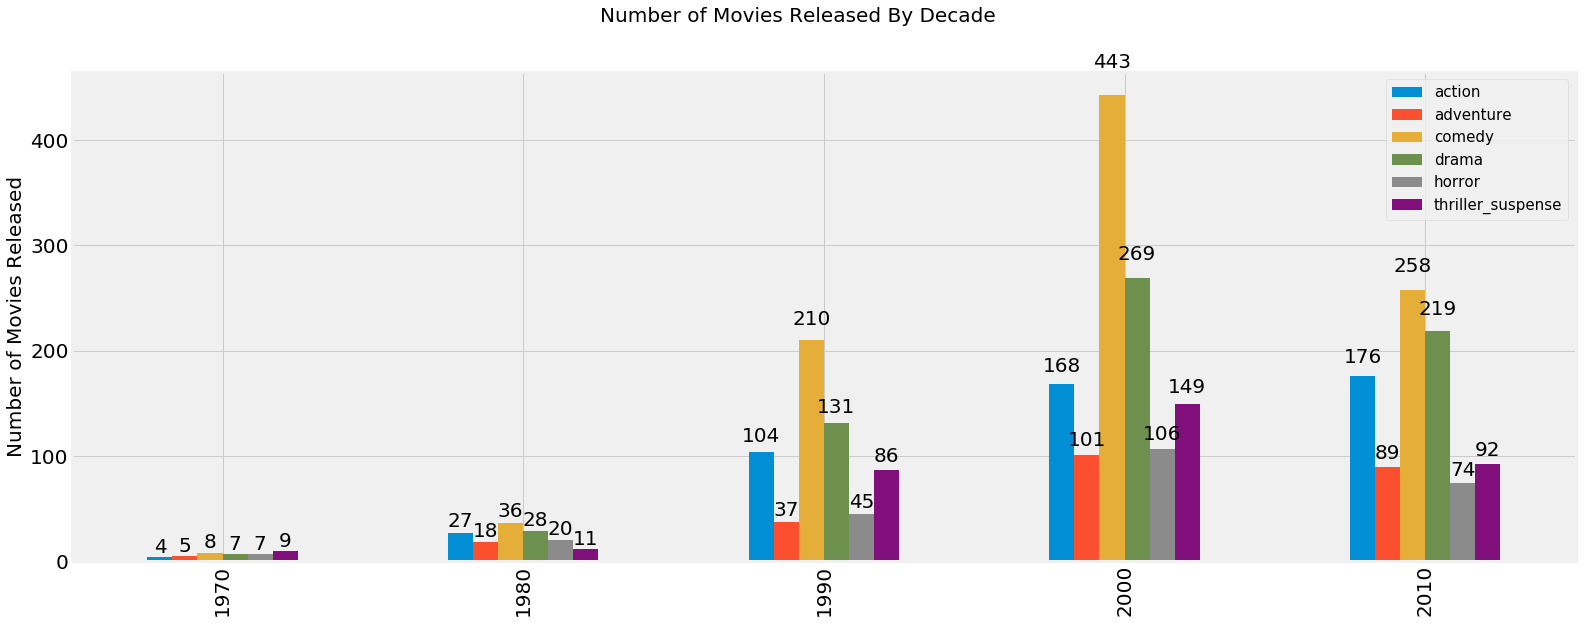

In [108]:
plot_by_time_and_stat(data=data, genres=genres, title='Number of Movies Released By Decade', 
                      groupby_column='release_decade', stat_columns=gross_columns, 
                      aggregate_function='count', apply_needed=False, apply_function=None, 
                      y_label='Number of Movies Released', y_ticks_needed=False, y_ticks='', legend_needed=True, 
                      legend_text=genres, color=colors, axhline_needed=False, axhline_value='', autolabel_needed=True)

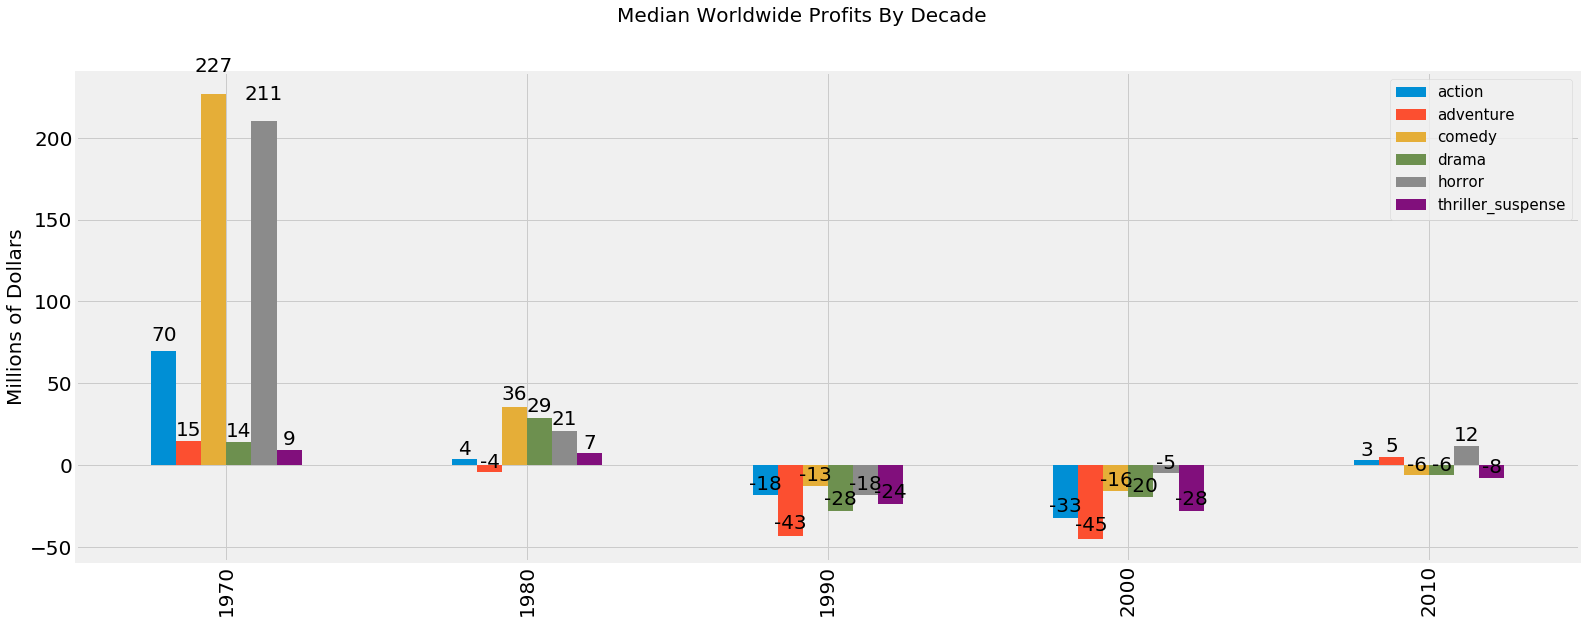

In [109]:
plot_by_time_and_stat(data=data, genres=genres, title='Median Worldwide Profits By Decade', 
                      groupby_column='release_decade', stat_columns=profit_columns, 
                      aggregate_function='median', apply_needed=True, apply_function=lambda x: x / 1000000, 
                      y_label='Millions of Dollars', y_ticks_needed=False, y_ticks='', legend_needed=True, 
                      legend_text=genres, color=colors, axhline_needed=False, axhline_value='', autolabel_needed=True)

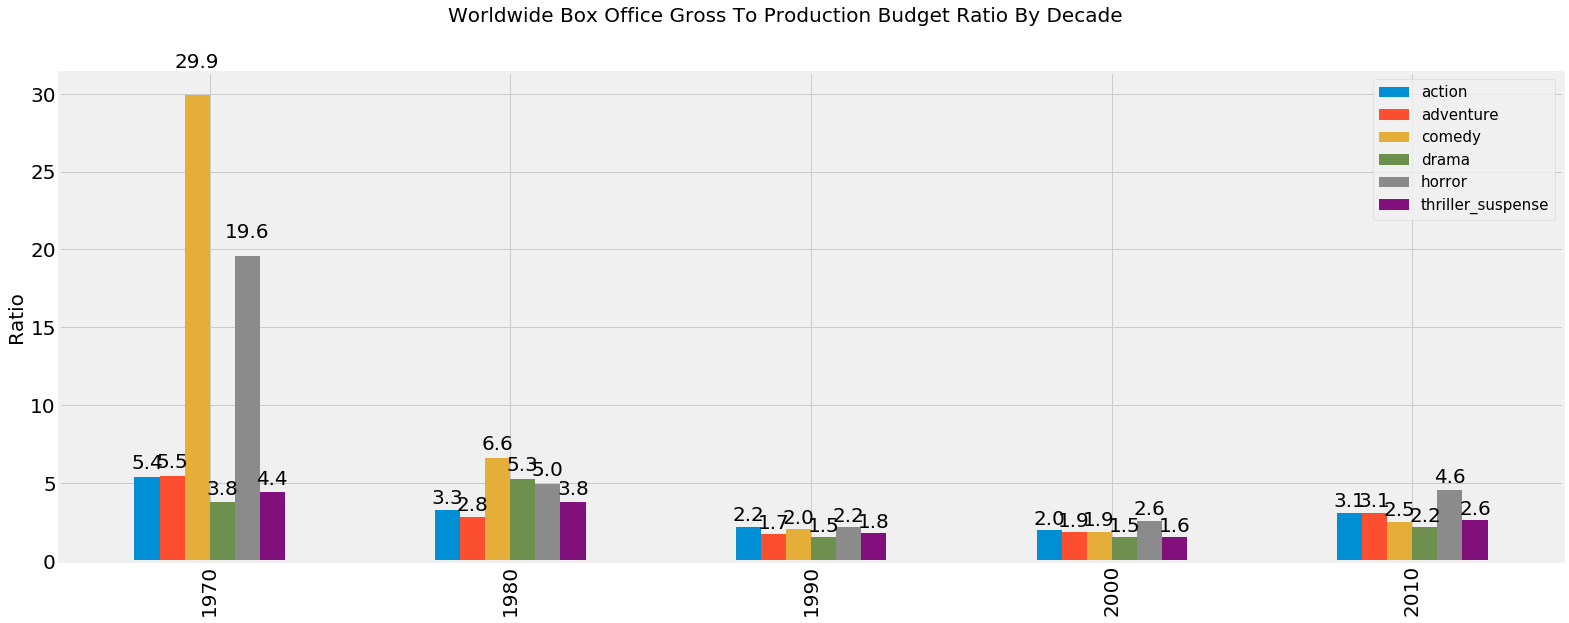

In [141]:
plot_by_time_and_stat(data=data, genres=genres, title='Worldwide Box Office Gross To Production Budget Ratio By Decade', 
                      groupby_column='release_decade', stat_columns=ratio_columns, 
                      aggregate_function='median', apply_needed=False, apply_function=None, 
                      y_label='Ratio', y_ticks_needed=False, y_ticks='', legend_needed=True, 
                      legend_text=genres, color=colors, axhline_needed=False, axhline_value='', autolabel_needed=True, num_decimals=1)

In [111]:
# Create custom function to display profit and count information by genre and budget size for the current decade (2010s)
def current_decade_budget_sizes(data, genre):
    styler_object = (data[
        (data['release_year'] >= 2010) & 
        (data['genres_mojo'].str.contains(genre))
    ][['budget_bins', 'profit', 'worldwide_breakeven']]
    .apply(lambda x: x / 1000000 if x.name == 'profit' else x)
    .sort_values(by=['budget_bins', 'profit'], ascending=False)
    .groupby('budget_bins')
    .agg(['mean', 'median', 'count', 'sum'])
    .drop([('profit', 'count'), ('profit', 'mean'), ('profit', 'sum'), ('worldwide_breakeven', 'median')], axis=1)
    .dropna()
    .style
    .applymap(background_color_blue_if_greater_than_fifty_percent, subset=[('worldwide_breakeven', 'mean')])
    .apply(highlight_max, subset=[('worldwide_breakeven', 'count')])
    .background_gradient('winter', subset=[('profit', 'median')]))
    
    return styler_object

In [112]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
# Custom function to add blue if a majority of the films break even 
def background_color_green_if_ratio_greater_than_three(val):    
    if val >= 3.0:
        return 'background-color: {}'.format('#C7E2AE')
    
    return ''

In [139]:
(data[
    (data['release_year'] >= 2010) & 
    (data['genres_mojo'].str.contains('Thriller|Suspense'))
][['budget_bins', 'profit', 'worldwide_breakeven', 'gross_budget_ratio']]
.apply(lambda x: x / 1000000 if x.name == 'profit' else x)
.sort_values(by=['budget_bins', 'profit'], ascending=False)
.groupby('budget_bins')
.agg(['mean', 'median', 'count', 'sum'])
.drop([('profit', 'count'), ('profit', 'mean'), ('profit', 'sum'), ('worldwide_breakeven', 'median'), ('gross_budget_ratio', 'mean'), ('gross_budget_ratio', 'count'), ('gross_budget_ratio', 'sum')], axis=1)
.dropna()
.style
.applymap(background_color_blue_if_greater_than_fifty_percent, subset=[('worldwide_breakeven', 'mean')])
.apply(highlight_max, subset=[('worldwide_breakeven', 'count')])
.background_gradient(cmap='winter', low=.5, high=0, subset=[('profit', 'median')])
.background_gradient(cmap='viridis', low=.5, high=0, subset=[('gross_budget_ratio', 'median')]))

In [140]:
(data[
    (data['release_year'] >= 2000) & 
    (data['release_year'] < 2010) & 
    (data['genres_mojo'].str.contains('Thriller|Suspense'))
][['budget_bins', 'profit', 'worldwide_breakeven', 'gross_budget_ratio']]
.apply(lambda x: x / 1000000 if x.name == 'profit' else x)
.sort_values(by=['budget_bins', 'profit'], ascending=False)
.groupby('budget_bins')
.agg(['mean', 'median', 'count', 'sum'])
.drop([('profit', 'count'), ('profit', 'mean'), ('profit', 'sum'), ('worldwide_breakeven', 'median'), ('gross_budget_ratio', 'mean'), ('gross_budget_ratio', 'count'), ('gross_budget_ratio', 'sum')], axis=1)
.dropna()
.style
.applymap(background_color_blue_if_greater_than_fifty_percent, subset=[('worldwide_breakeven', 'mean')])
.apply(highlight_max, subset=[('worldwide_breakeven', 'count')])
.background_gradient(cmap='winter', low=.5, high=0, subset=[('profit', 'median')])
.background_gradient(cmap='viridis', low=.5, high=0, subset=[('gross_budget_ratio', 'median')]))

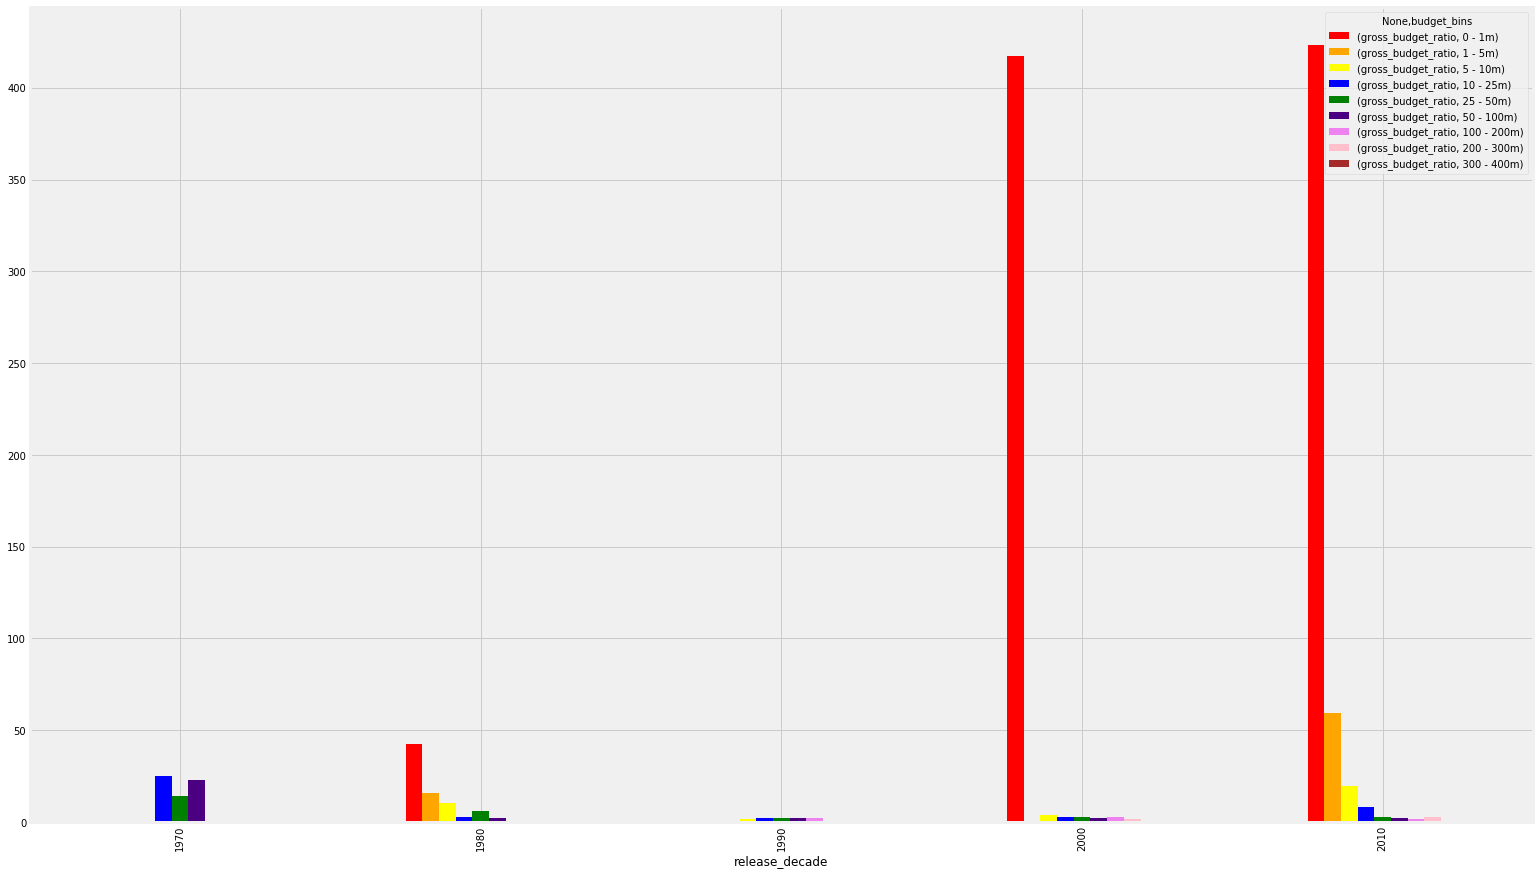

In [179]:
blue = data[(data['genres_mojo'].str.contains('Horror'))][['budget_bins', 'release_decade', 'gross_budget_ratio']].groupby(['release_decade', 'budget_bins']).agg('median').fillna(0)

blue.unstack().plot(kind='bar', colors=['red', 'orange', 'yellow', 'blue', 'green', 'indigo', 'violet', 'pink', 'brown'], figsize=(24,15))

In [182]:
data[(data['genres_mojo'].str.contains('Horror')) & (data['gross_budget_ratio'] > 30)][['title', 'release_year', 'gross_budget_ratio']]

title  release_year  gross_budget_ratio
1269               Annabelle          2014           39.531582
3175       Chernobyl Diaries          2012           39.784691
5926                 Get Out          2017           53.765850
7815                    Jaws          1975           49.544895
8023        Jurassic Park 3D          2013           47.392811
8851              Lights Out          2016           30.068216
11271    Paranormal Activity          2009          833.416772
11272  Paranormal Activity 2          2010           59.170685
11273  Paranormal Activity 3          2011           41.407967
13671                  Split          2017           39.815657
15252       The Devil Inside          2012          101.759007
15389          The Evil Dead          1983           42.399999
15395           The Exorcist          1973           36.230026
15576            The Gallows          2015          423.103308
18687             Unfriended          2015           64.210432
19661     Young Frankenstein          1974           30.821429

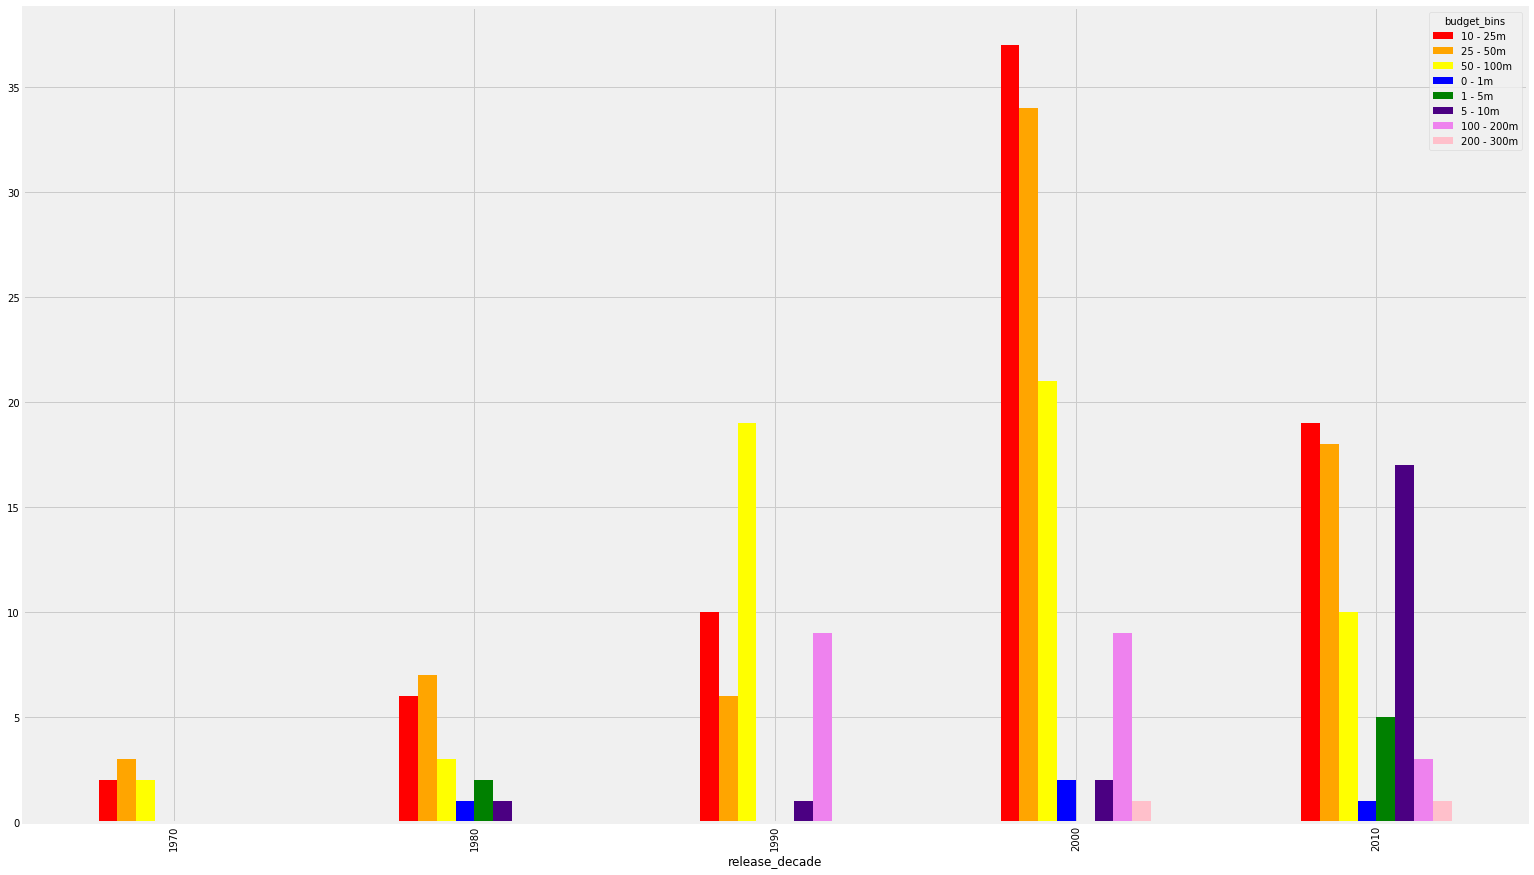

In [185]:
blue = data[(data['genres_mojo'].str.contains('Horror'))][['budget_bins', 'release_decade', 'gross_budget_ratio']].groupby(['release_decade', 'budget_bins']).size().fillna(0)

blue.unstack().plot(kind='bar', colors=['red', 'orange', 'yellow', 'blue', 'green', 'indigo', 'violet', 'pink', 'brown'], figsize=(24,15))

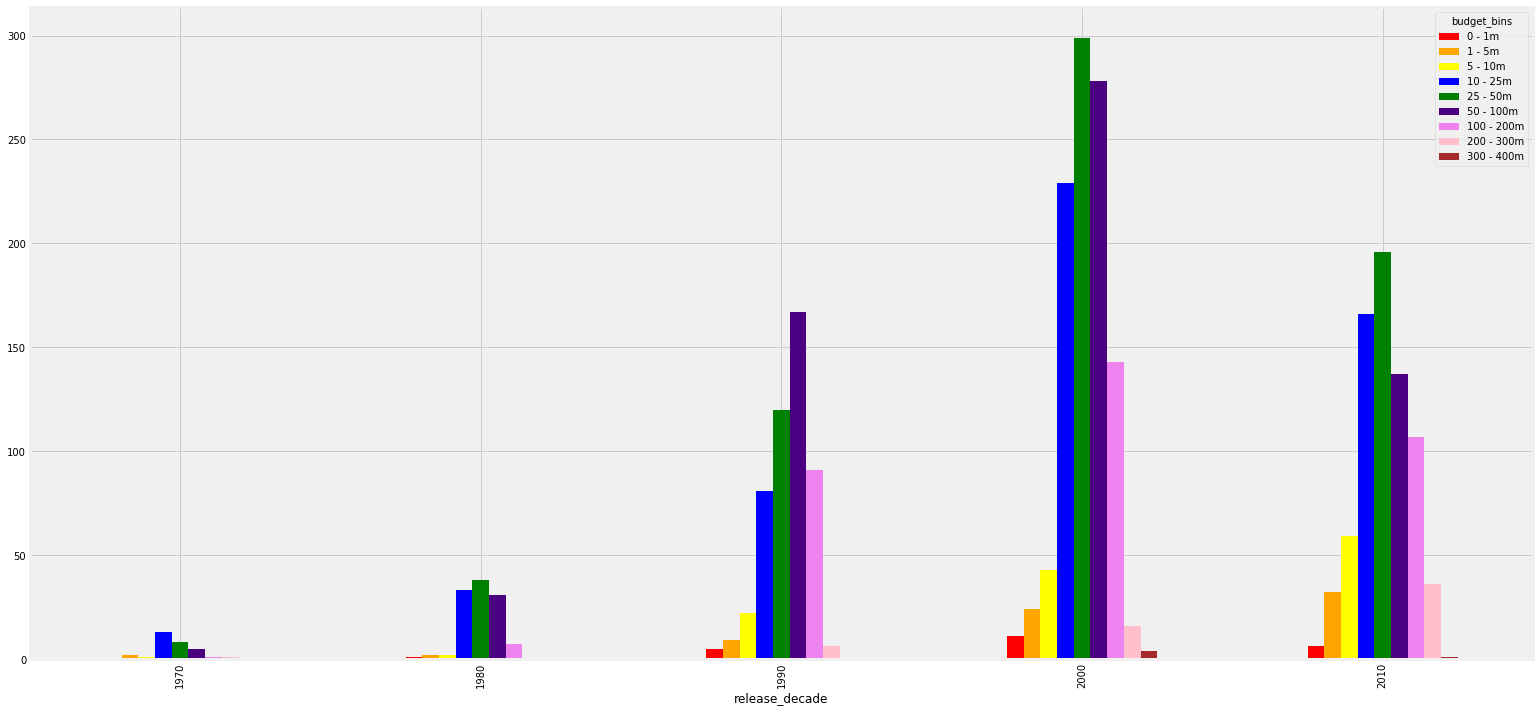

In [272]:
data[['budget_bins', 'release_decade', 'gross_budget_ratio']].groupby(['release_decade', 'budget_bins']).size().unstack().plot(kind='bar', figsize=(24,12), colors=['red', 'orange', 'yellow', 'blue', 'green', 'indigo', 'violet', 'pink', 'brown'])

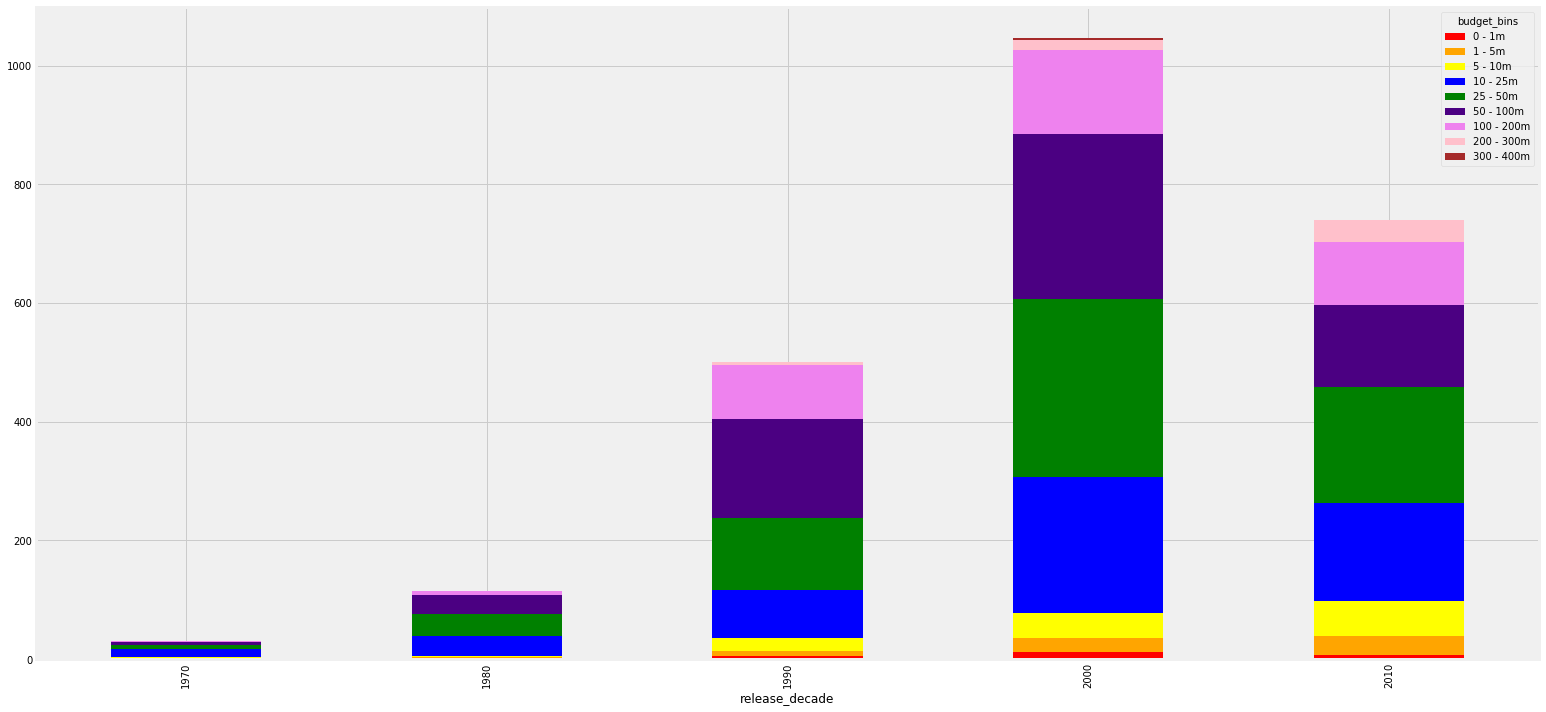

In [271]:
data[['budget_bins', 'release_decade', 'gross_budget_ratio']].groupby(['release_decade', 'budget_bins']).size().unstack().plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'blue', 'green', 'indigo', 'violet', 'pink', 'brown'])

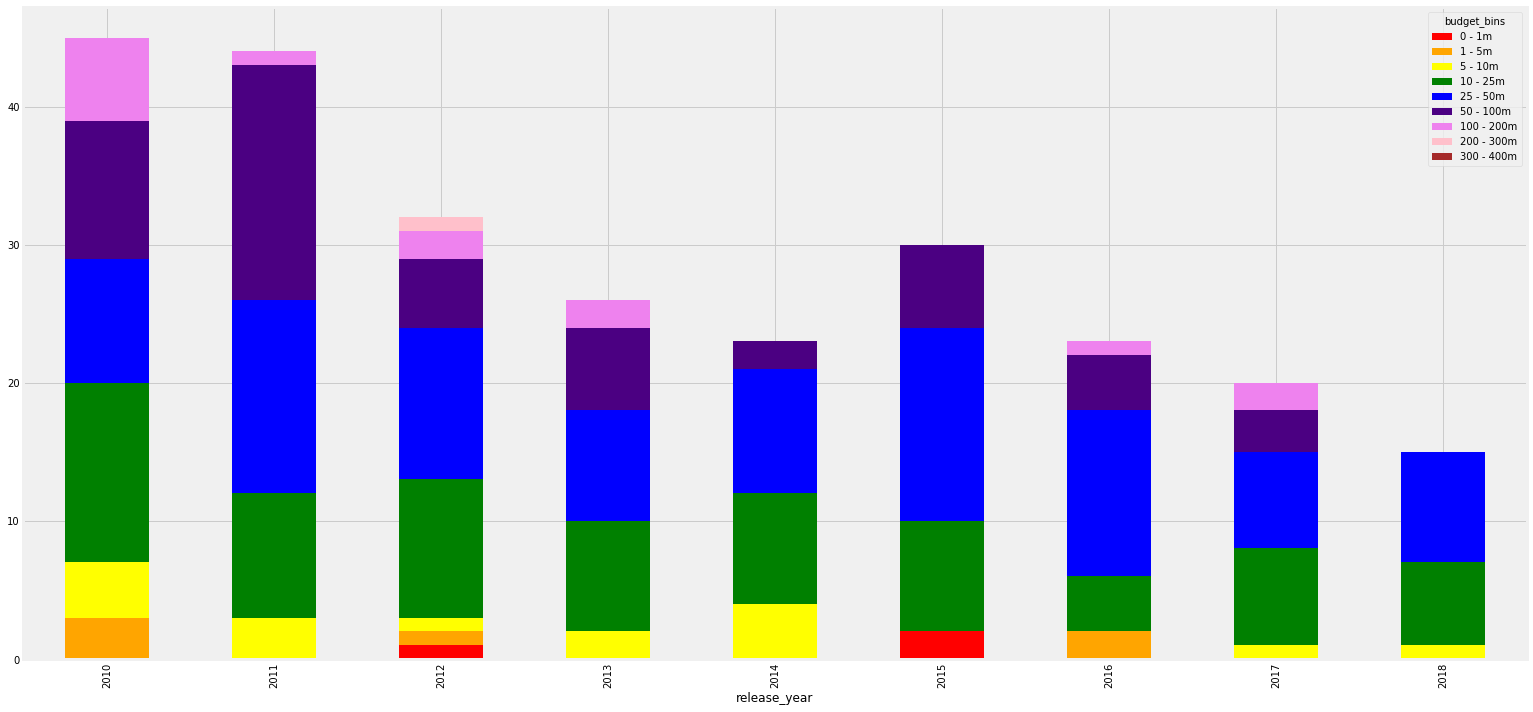

In [268]:
#data[(data['release_year'] >= 2010) & (data['comedy'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).size().unstack().plot(kind='bar', figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])
# Useful when you need to drop a top level of the index -- use `pandas.dataframe.droplevel`
data[(data['release_year'] >= 2010) & (data['comedy'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])

In [270]:
data[(data['comedy']) & (data['release_year'] == 2012) & (data['budget_bins'] == '200 - 300m')]

title  release_year distributor_mojo    genres_mojo release_date  \
9265  MIB 3          2012  Sony / Columbia  Sci-Fi Comedy   2012-05-25   

      worldwide_adj   budget_adj  release_week  release_decade  \
9265    682498200.0  246082541.0            21            2010   

      worldwide_breakeven      profit  gross_budget_ratio  action  adventure  \
9265                False -27874711.5            2.773452   False      False   

      comedy  drama  horror  thriller_suspense  universal  paramount  warner  \
9265    True  False   False              False      False      False   False   

      disney  sony distributor  worldwide_budget_action  ...  \
9265   False  True        Sony                      NaN  ...   

      worldwide_gross_action  worldwide_gross_adventure  \
9265                     NaN                        NaN   

      worldwide_gross_comedy  worldwide_gross_drama  worldwide_gross_horror  \
9265             682498200.0                    NaN                     NaN   

      worldwide_gross_thriller_suspense  worldwide_profit_action  \
9265                                NaN                      NaN   

      worldwide_profit_adventure  worldwide_profit_comedy  \
9265                         NaN              -27874711.5   

      worldwide_profit_drama  worldwide_profit_horror  \
9265                     NaN                      NaN   

      worldwide_profit_thriller_suspense  worldwide_breakeven_action  \
9265                                 NaN                         NaN   

      worldwide_breakeven_adventure  worldwide_breakeven_comedy  \
9265                            NaN                         0.0   

      worldwide_breakeven_drama  worldwide_breakeven_horror  \
9265                        NaN                         NaN   

      worldwide_breakeven_thriller_suspense  worldwide_ratio_action  \
9265                                    NaN                     NaN   

      worldwide_ratio_adventure  worldwide_ratio_comedy  \
9265                        NaN                2.773452   

      worldwide_ratio_drama  worldwide_ratio_horror  \
9265                    NaN                     NaN   

      worldwide_ratio_thriller_suspense  budget_bins  
9265                                NaN   200 - 300m  

[1 rows x 55 columns]

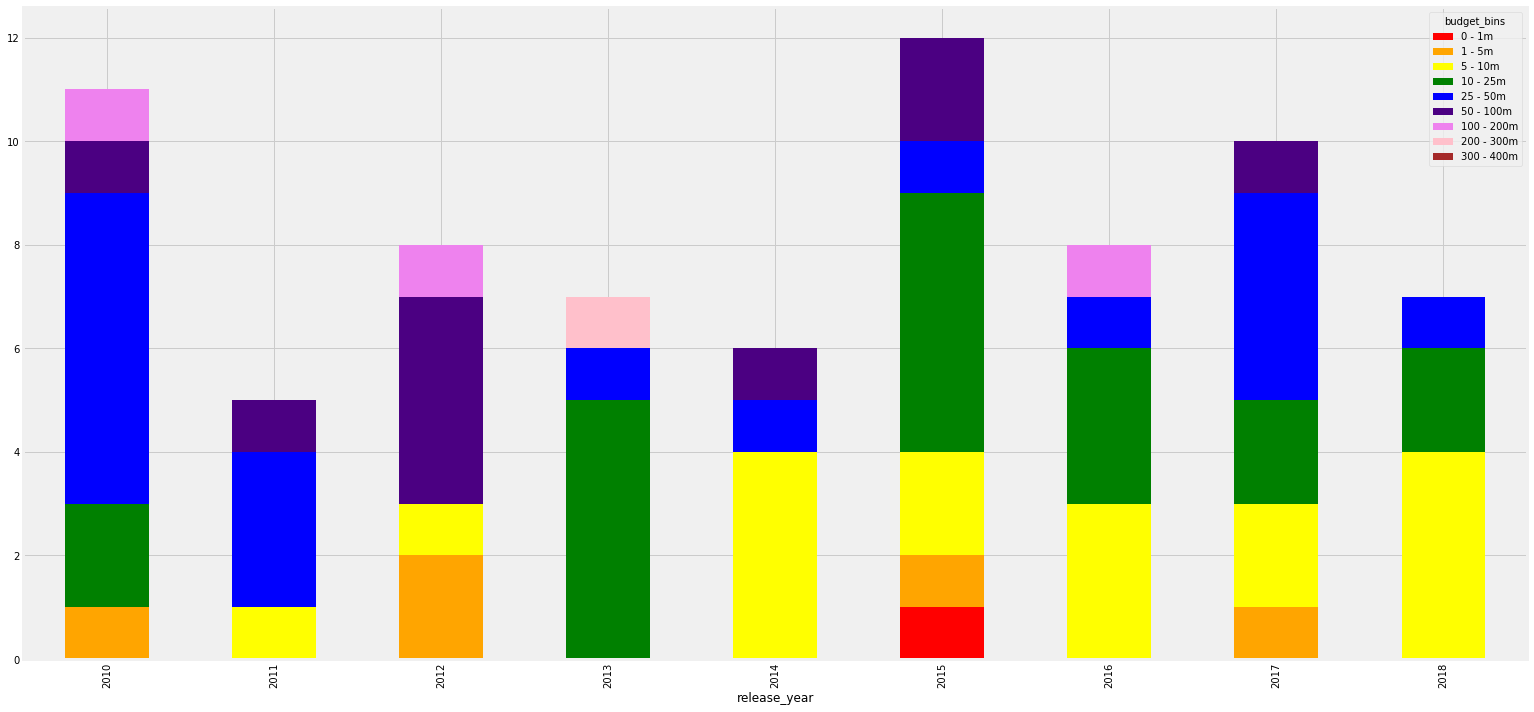

In [267]:
# Useful when you need to drop a top level of the index -- use `pandas.dataframe.droplevel`
data[(data['release_year'] >= 2010) & (data['horror'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])

In [258]:
data[(data['release_year'] >= 2010) & (data['horror'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack()

gross_budget_ratio                                             \
budget_bins              0 - 1m 1 - 5m 5 - 10m 10 - 25m 25 - 50m 50 - 100m   
release_year                                                                 
2010                        0.0    1.0     0.0      2.0      6.0       1.0   
2011                        0.0    0.0     1.0      0.0      3.0       1.0   
2012                        0.0    2.0     1.0      0.0      0.0       4.0   
2013                        0.0    0.0     0.0      5.0      1.0       0.0   
2014                        0.0    0.0     4.0      0.0      1.0       1.0   
2015                        1.0    1.0     2.0      5.0      1.0       2.0   
2016                        0.0    0.0     3.0      3.0      1.0       0.0   
2017                        0.0    1.0     2.0      2.0      4.0       1.0   
2018                        0.0    0.0     4.0      2.0      1.0       0.0   

                                               
budget_bins  100 - 200m 200 - 300m 300 - 400m  
release_year                                   
2010                1.0        0.0        0.0  
2011                0.0        0.0        0.0  
2012                1.0        0.0        0.0  
2013                0.0        1.0        0.0  
2014                0.0        0.0        0.0  
2015                0.0        0.0        0.0  
2016                1.0        0.0        0.0  
2017                0.0        0.0        0.0  
2018                0.0        0.0        0.0

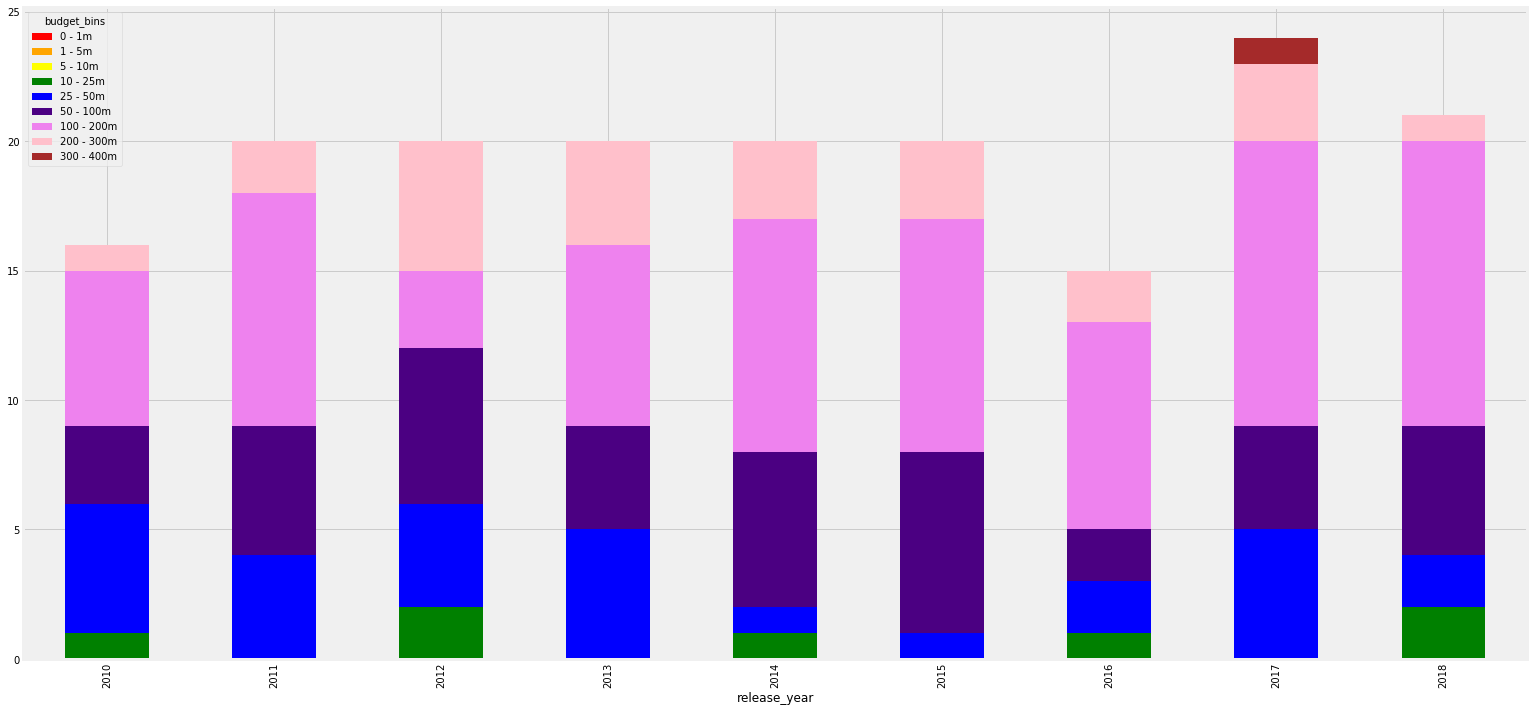

In [266]:
# Useful when you need to drop a top level of the index -- use `pandas.dataframe.droplevel`
data[(data['release_year'] >= 2010) & (data['action'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])

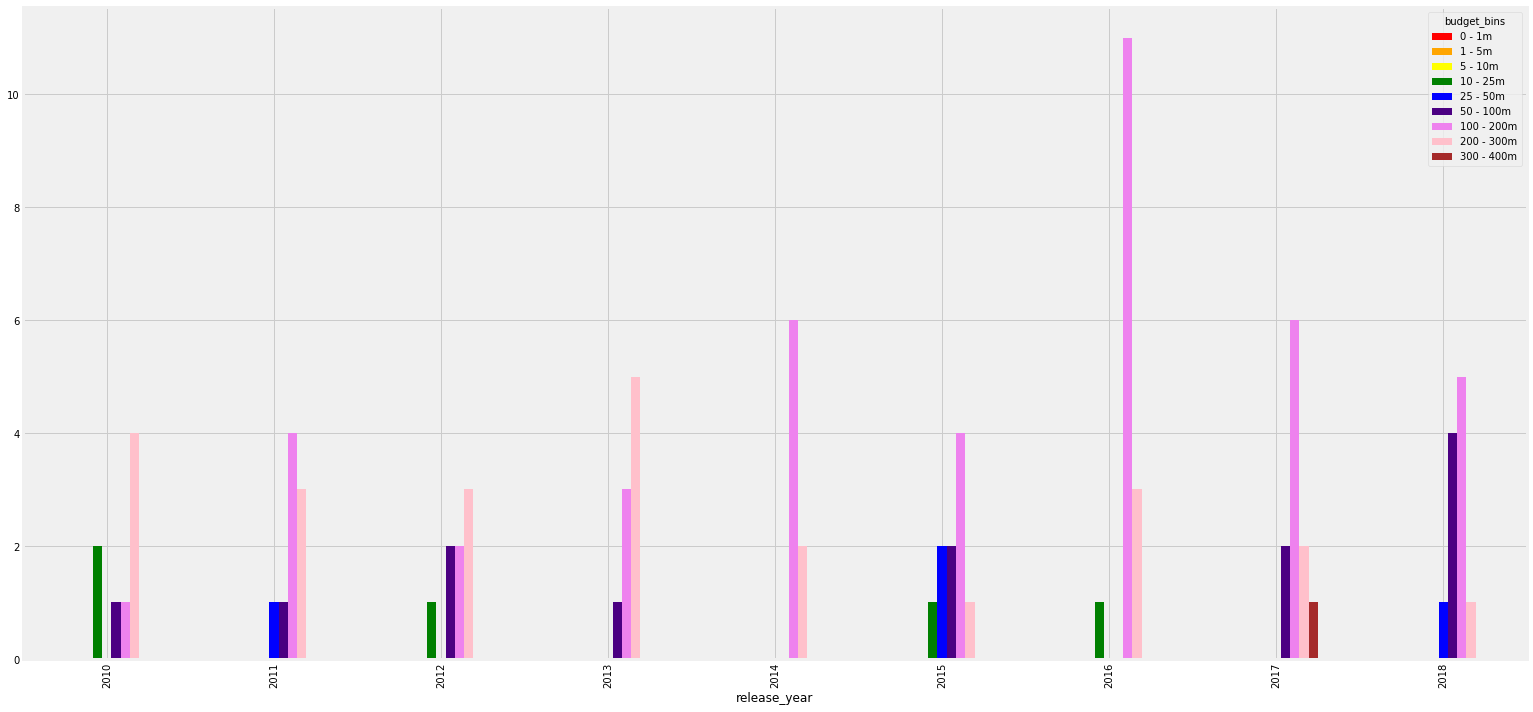

In [264]:
# Useful when you need to drop a top level of the index -- use `pandas.dataframe.droplevel`
data[(data['release_year'] >= 2010) & (data['adventure'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])

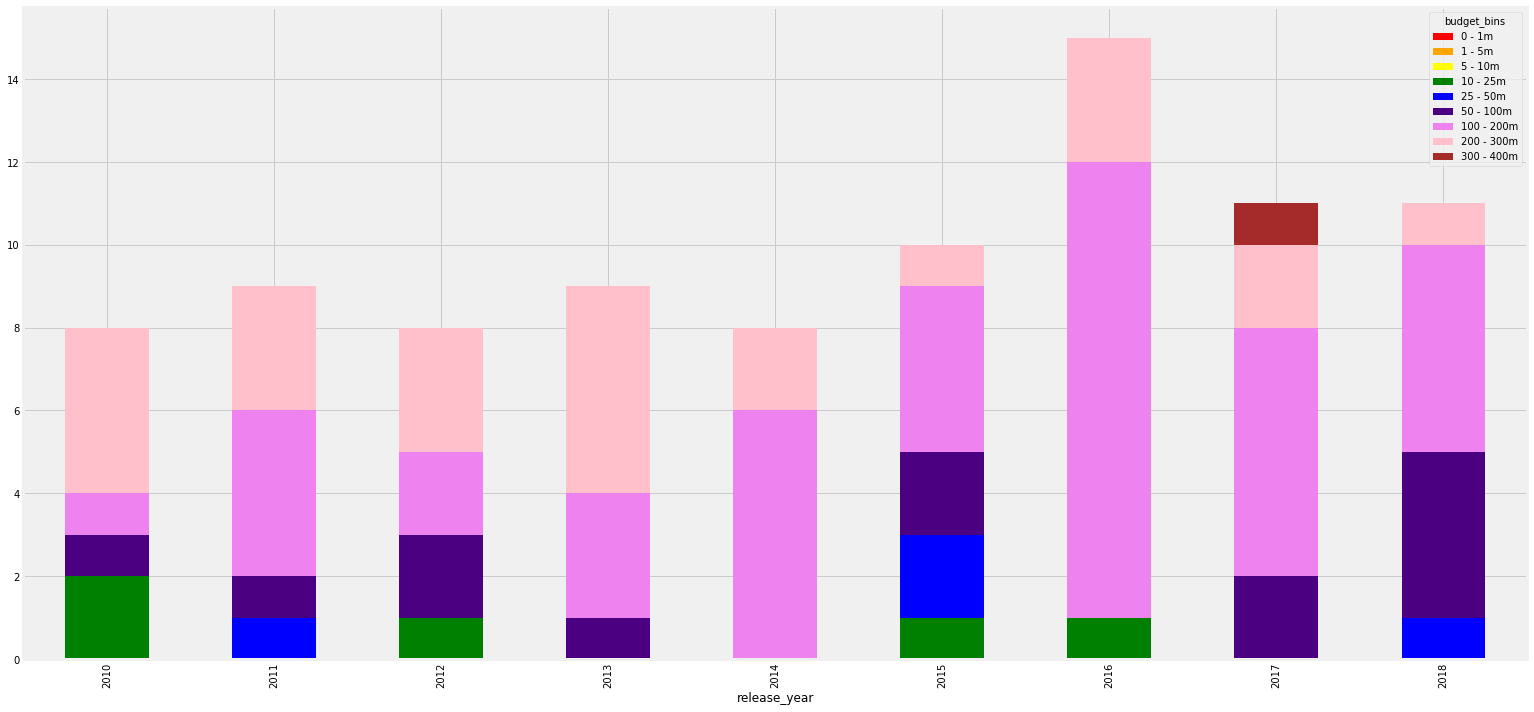

In [265]:
# Useful when you need to drop a top level of the index -- use `pandas.dataframe.droplevel`
data[(data['release_year'] >= 2010) & (data['adventure'])][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])

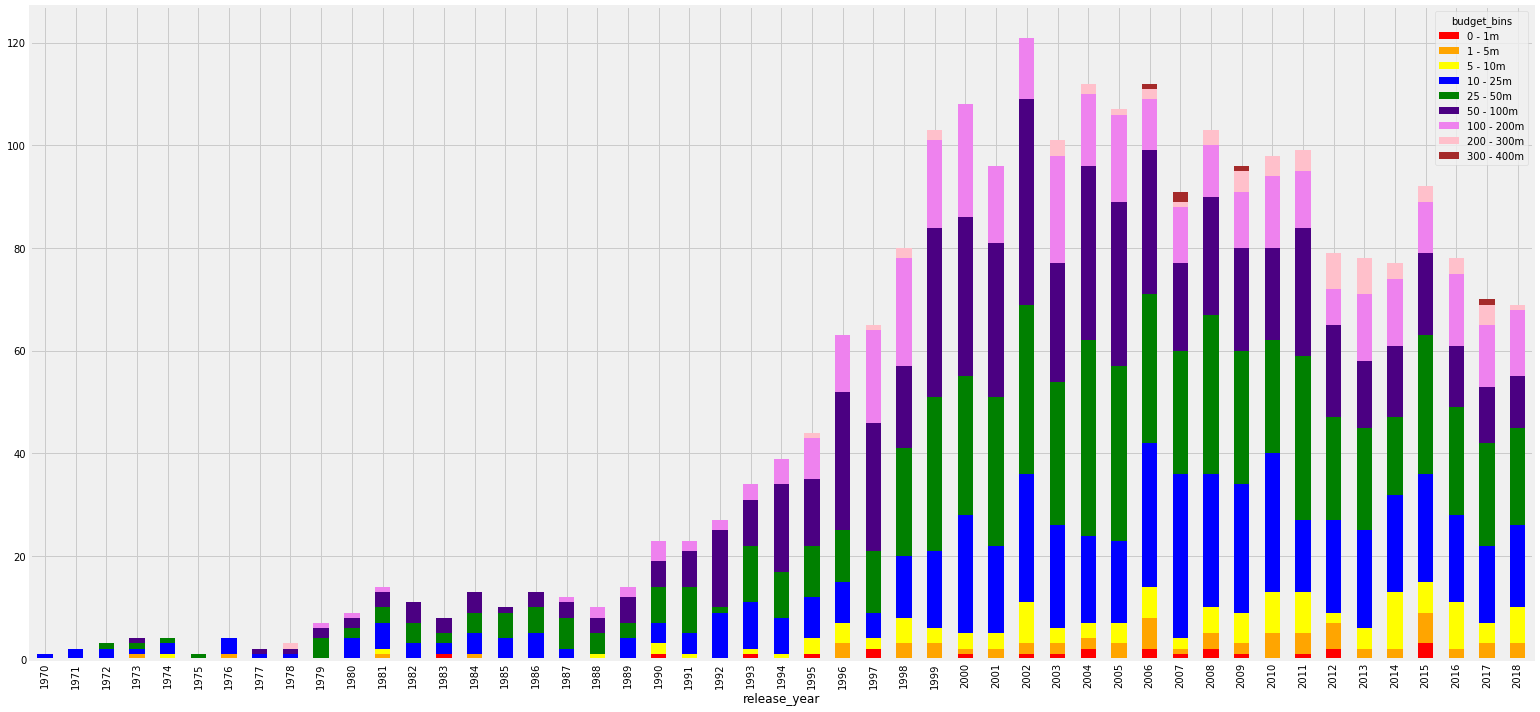

In [274]:
data[['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).size().unstack().plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'blue', 'green', 'indigo', 'violet', 'pink', 'brown'])

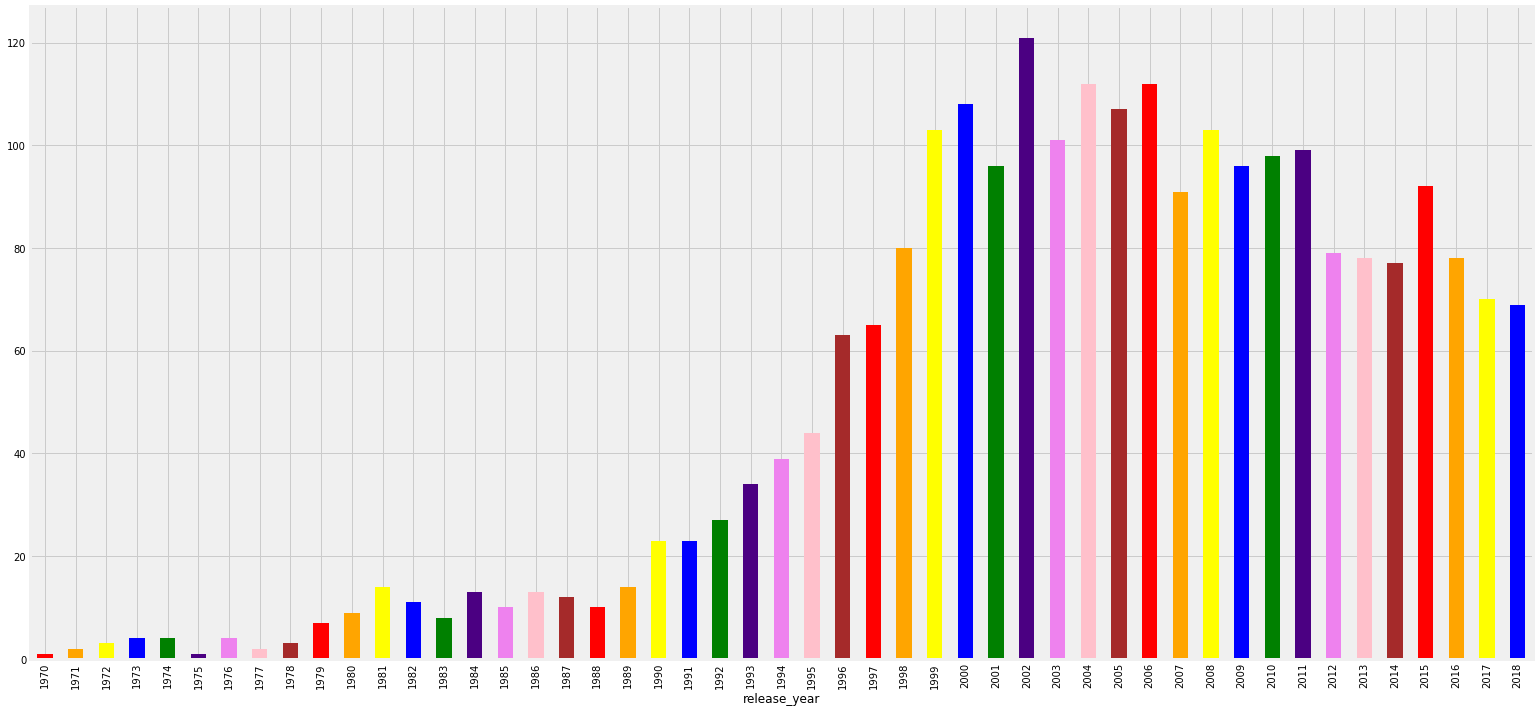

In [275]:
data[['release_year', 'gross_budget_ratio']].groupby('release_year').size().plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'blue', 'green', 'indigo', 'violet', 'pink', 'brown'])

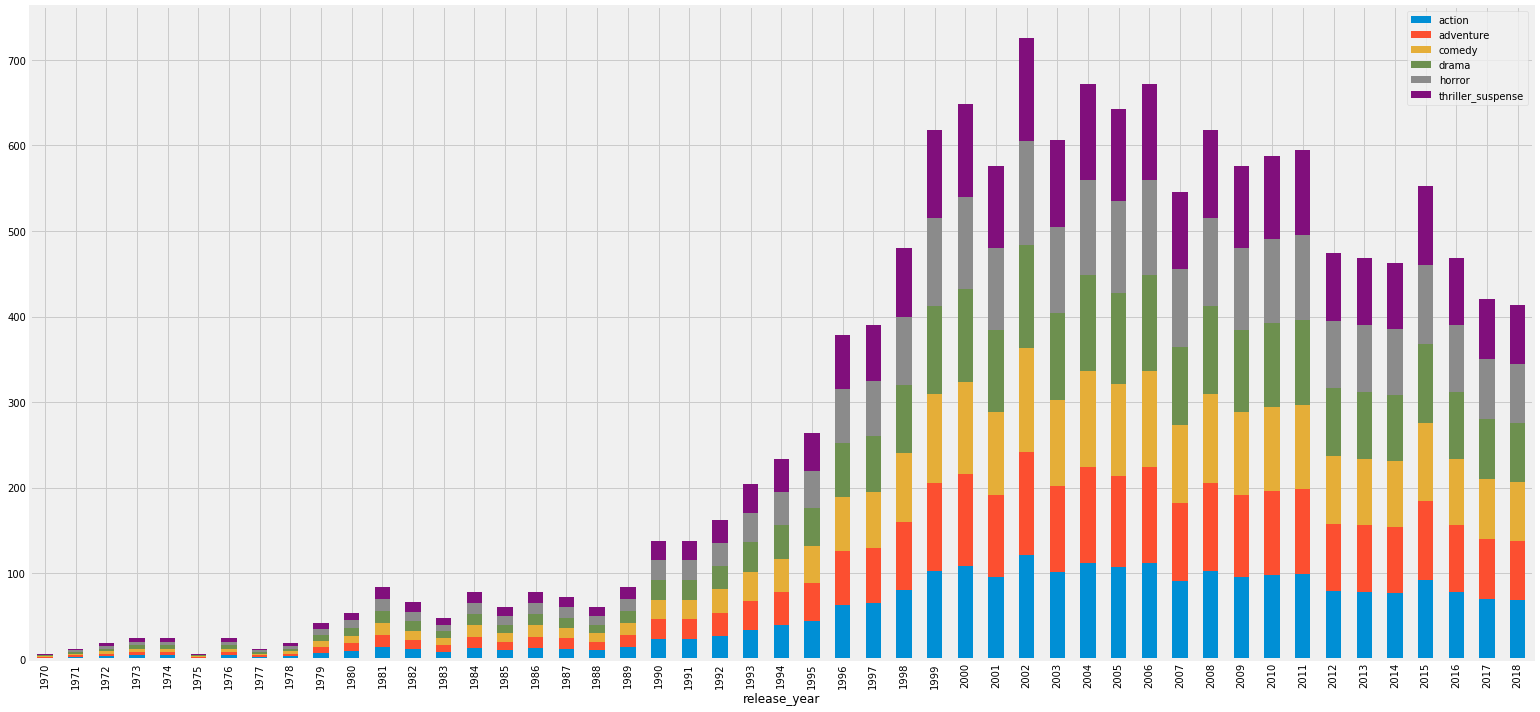

In [283]:
data[['action', 'adventure', 'comedy', 'drama', 'horror', 'thriller_suspense', 'release_year']].groupby('release_year').count().plot(kind='bar', stacked=True, figsize=(24,12), colors=colors)

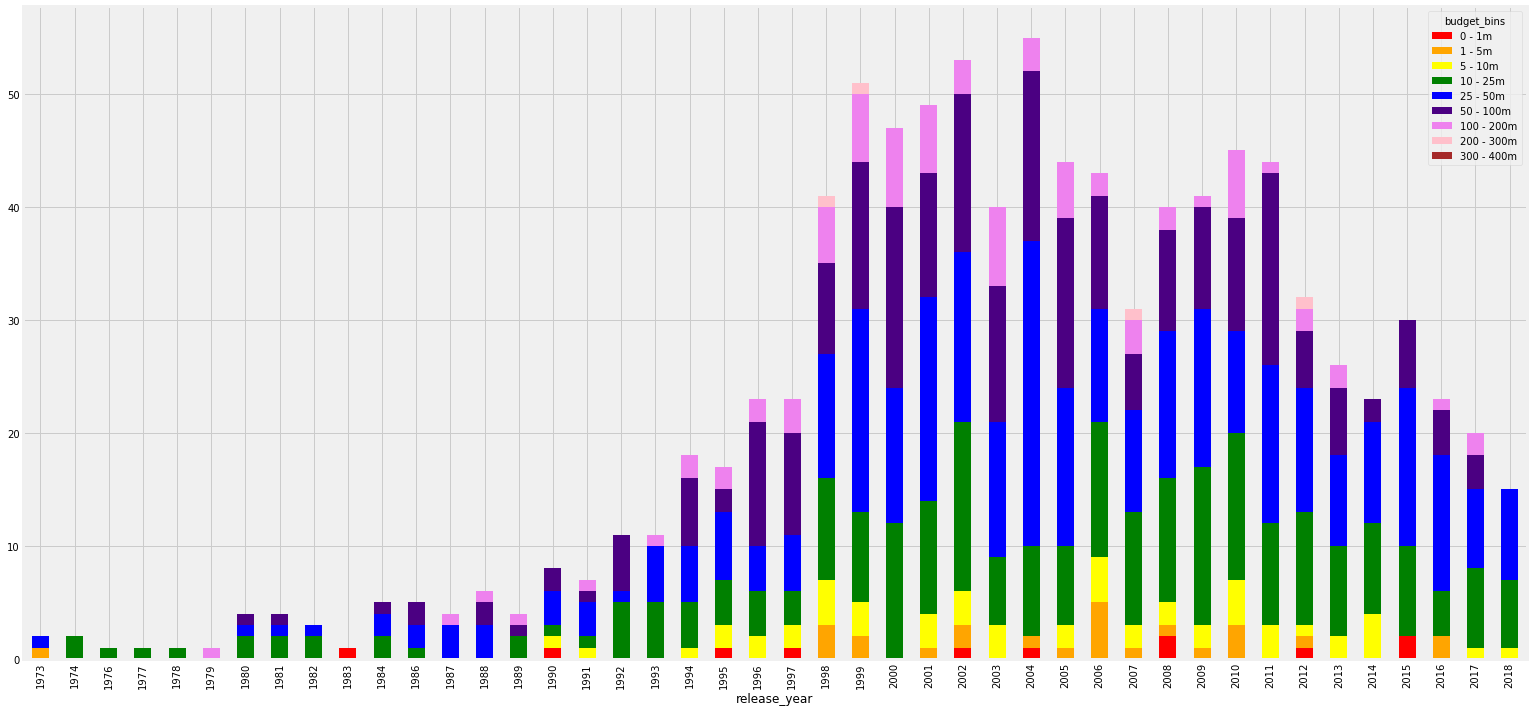

In [284]:
data[data['comedy']][['budget_bins', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'budget_bins']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown'])

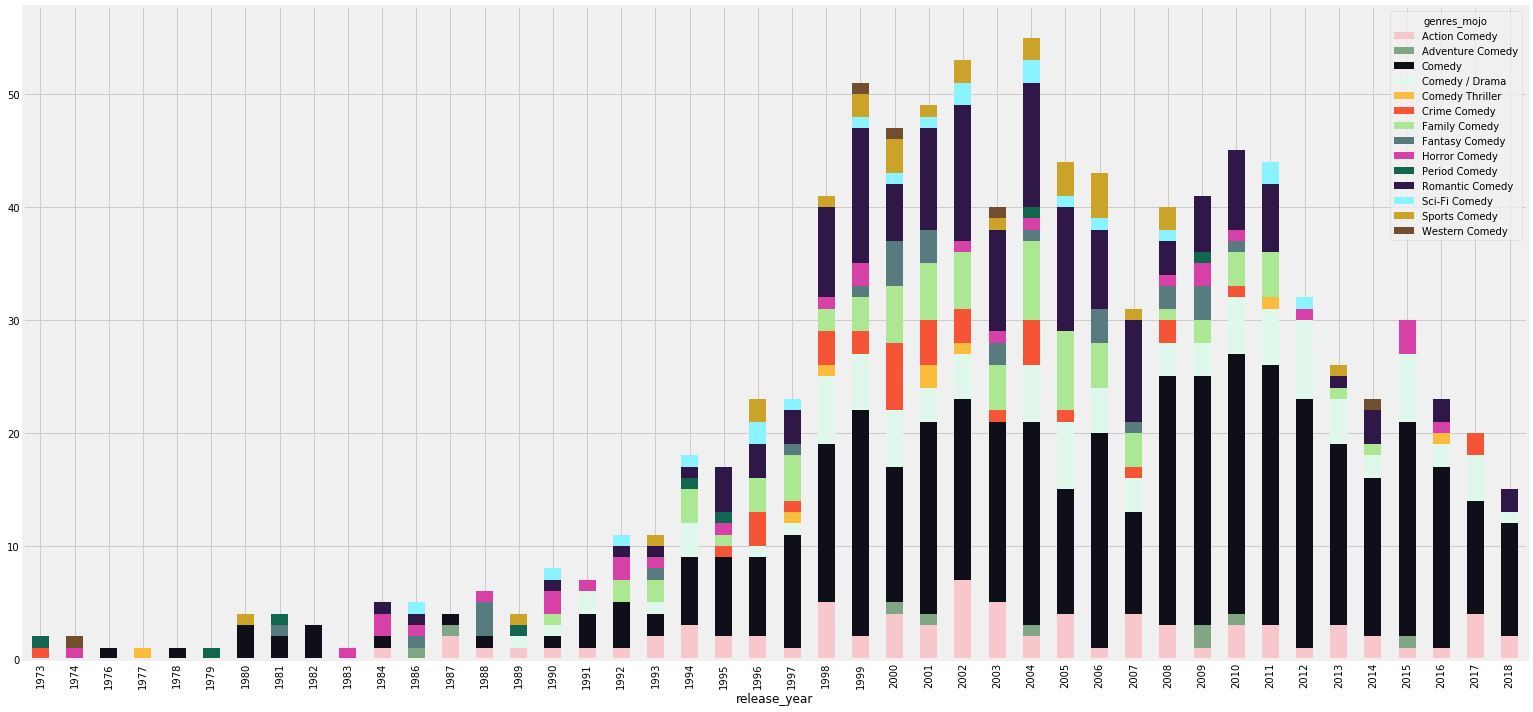

In [286]:
data[data['comedy']][['genres_mojo', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'genres_mojo']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['#f8c7cc', '#81a684', '#0e0f19', '#dff8eb', '#fabc3c', '#f55536', '#ace894', '#587b7f', '#d741a7', '#12664f', '#2f1847', '#8af3ff', '#cba328', '#704e2e'])

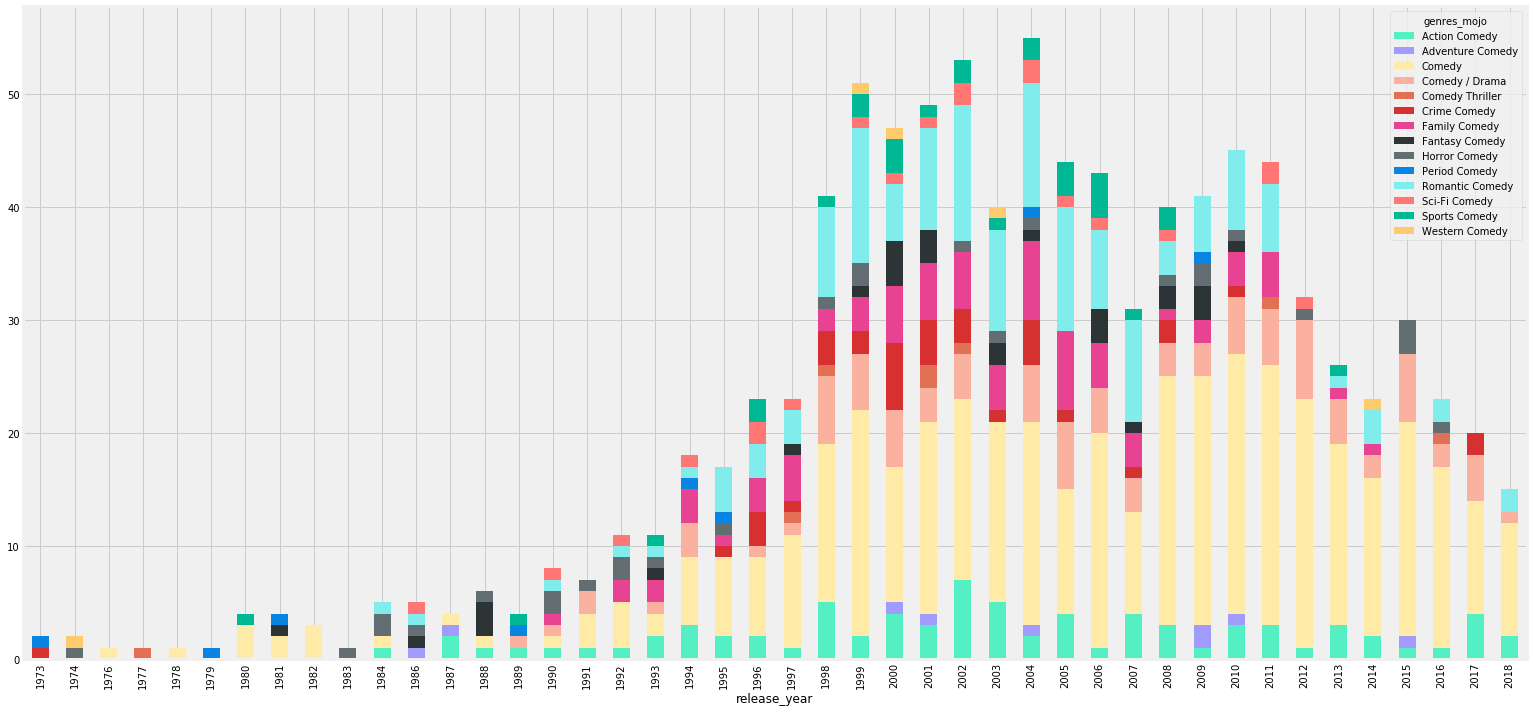

In [292]:
# https://flatuicolors.com/palette/us
data[data['comedy']][['genres_mojo', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'genres_mojo']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['#55efc4', '#a29bfe', '#ffeaa7', '#fab1a0', '#e17055', '#d63031', '#e84393', '#2d3436', '#636e72', '#0984e3', '#81ecec', '#ff7675', '#00b894', '#fdcb6e'])

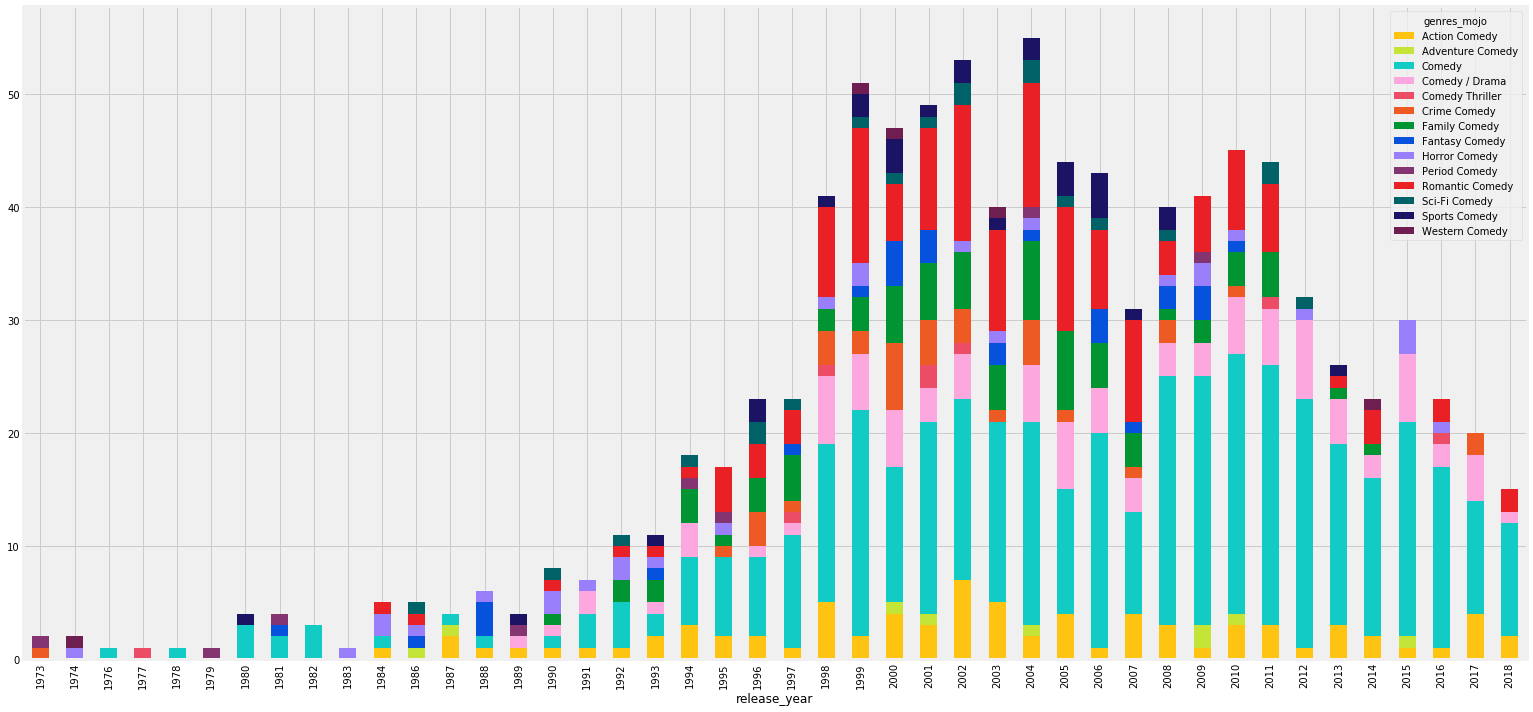

In [293]:
# https://flatuicolors.com/palette/nl
data[data['comedy']][['genres_mojo', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'genres_mojo']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['#FFC312', '#C4E538', '#12CBC4', '#FDA7DF', '#ED4C67', '#EE5A24', '#009432', '#0652DD', '#9980FA', '#833471', '#EA2027', '#006266', '#1B1464', '#6F1E51'])

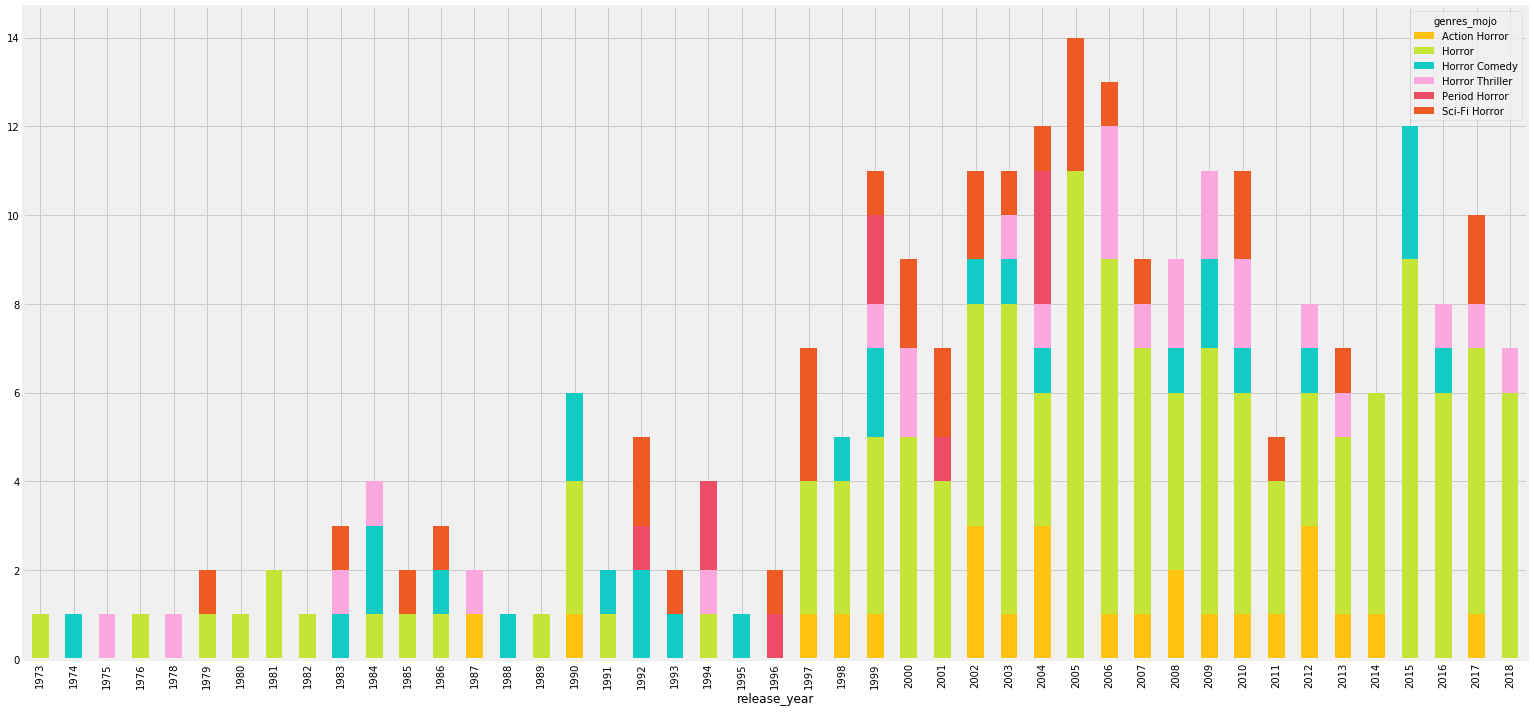

In [290]:
data[data['horror']][['genres_mojo', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'genres_mojo']).agg('count').fillna(0).unstack().droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['#FFC312', '#C4E538', '#12CBC4', '#FDA7DF', '#ED4C67', '#EE5A24', '#009432', '#0652DD', '#9980FA', '#833471', '#EA2027', '#006266', '#1B1464', '#6F1E51'])

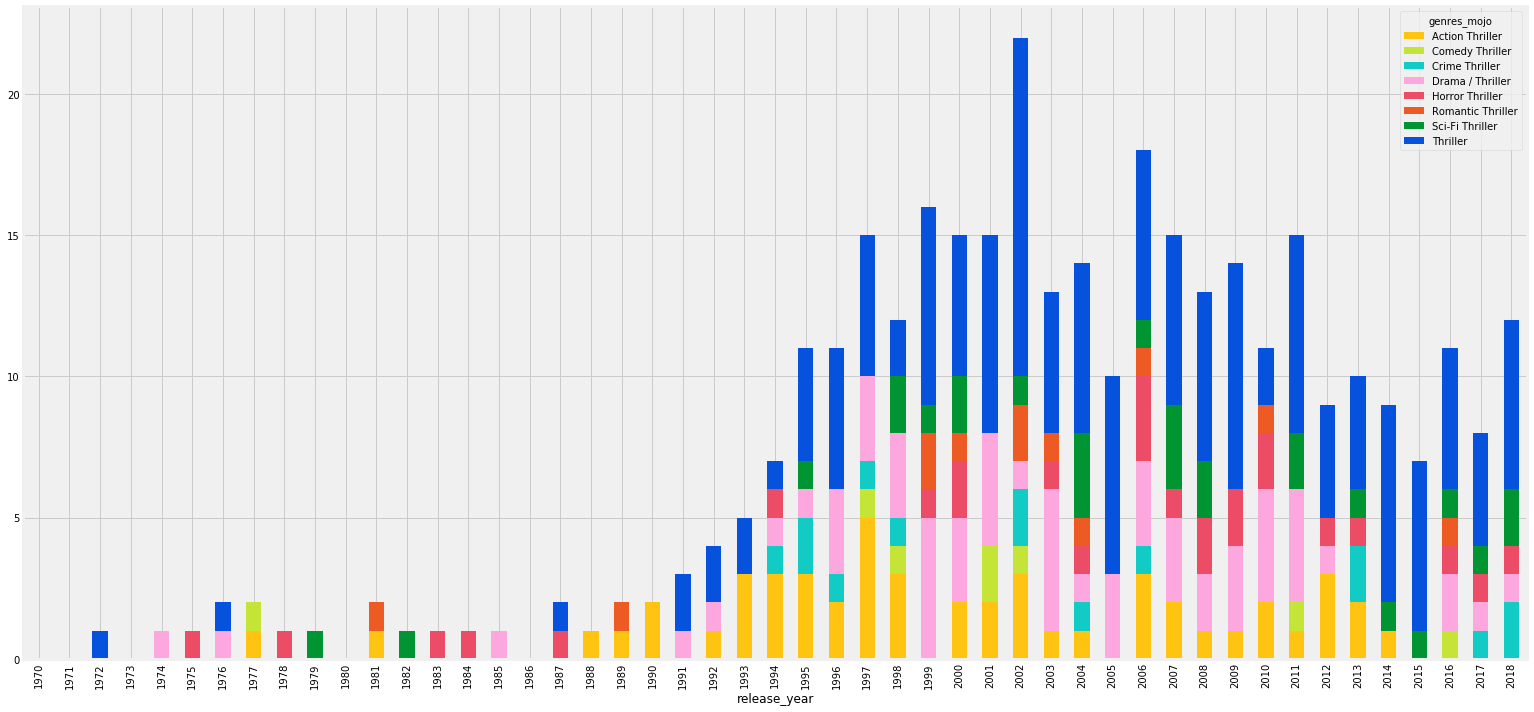

In [303]:
# https://flatuicolors.com/palette/nl
blerg = data[data['thriller_suspense']][['genres_mojo', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'genres_mojo']).agg('count').unstack()

for i in range(1970, 2019):
    if i not in blerg.index:
        blerg.loc[i] = np.nan
        
blerg.sort_index().fillna(0).droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['#FFC312', '#C4E538', '#12CBC4', '#FDA7DF', '#ED4C67', '#EE5A24', '#009432', '#0652DD', '#9980FA', '#833471', '#EA2027', '#006266', '#1B1464', '#6F1E51'])

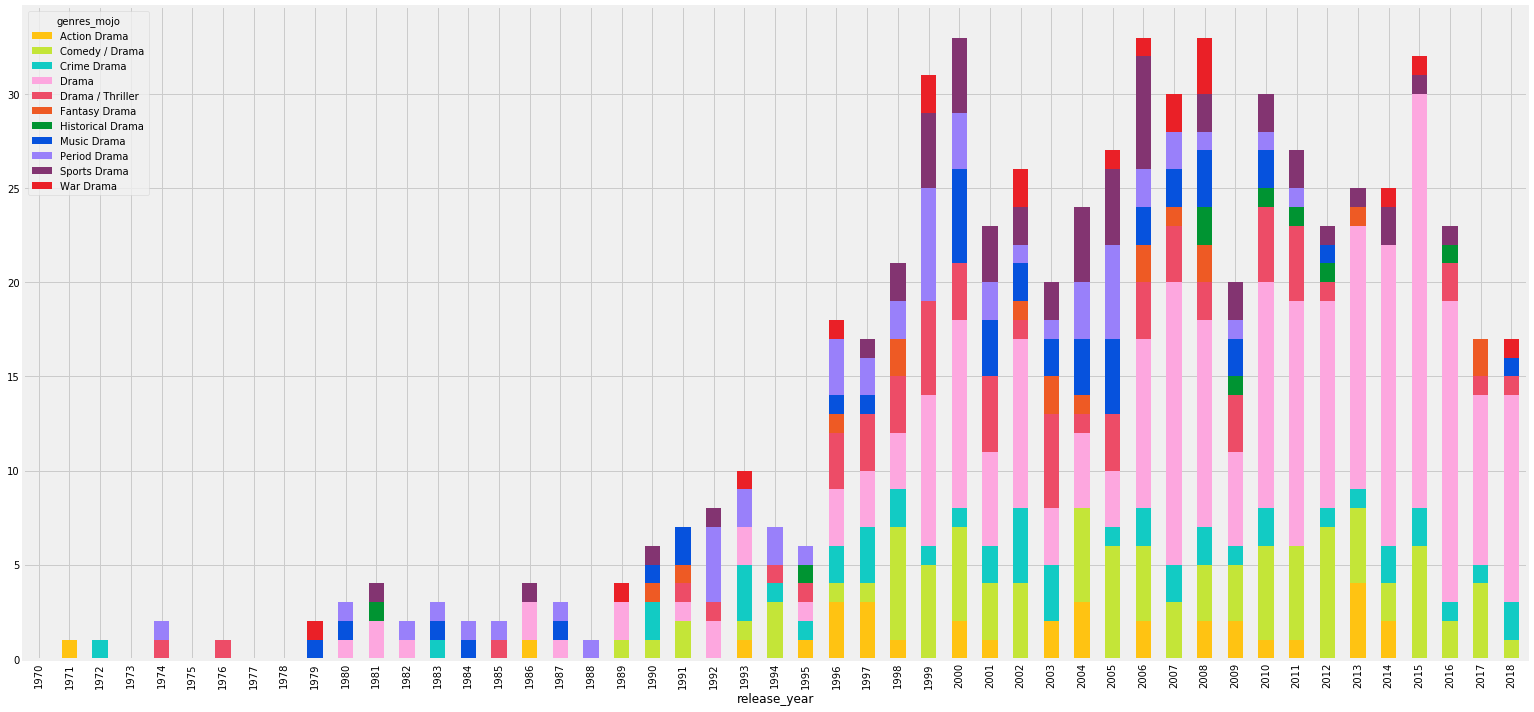

In [304]:
# https://flatuicolors.com/palette/nl
blerg = data[data['drama']][['genres_mojo', 'release_year', 'gross_budget_ratio']].groupby(['release_year', 'genres_mojo']).agg('count').unstack()

for i in range(1970, 2019):
    if i not in blerg.index:
        blerg.loc[i] = np.nan
        
blerg.sort_index().fillna(0).droplevel(0, axis=1).plot(kind='bar', stacked=True, figsize=(24,12), colors=['#FFC312', '#C4E538', '#12CBC4', '#FDA7DF', '#ED4C67', '#EE5A24', '#009432', '#0652DD', '#9980FA', '#833471', '#EA2027', '#006266', '#1B1464', '#6F1E51'])

In [276]:
data.groupby('release_year').count()

title  distributor_mojo  genres_mojo  release_date  \
release_year                                                       
1970              1                 1            1             1   
1971              2                 2            2             2   
1972              3                 3            3             3   
1973              4                 4            4             4   
1974              4                 4            4             4   
1975              1                 1            1             1   
1976              4                 4            4             4   
1977              2                 2            2             2   
1978              3                 3            3             3   
1979              7                 7            7             7   
1980              9                 9            9             9   
1981             14                14           14            14   
1982             11                11           11            11   
1983              8                 8            8             8   
1984             13                13           13            13   
1985             10                10           10            10   
1986             13                13           13            13   
1987             12                12           12            12   
1988             10                10           10            10   
1989             14                14           14            14   
1990             23                23           23            23   
1991             23                23           23            23   
1992             27                27           27            27   
1993             34                34           34            34   
1994             39                39           39            39   
1995             44                44           44            44   
1996             63                63           63            63   
1997             65                65           65            65   
1998             80                80           80            80   
1999            103               103          103           103   
2000            108               108          108           108   
2001             96                96           96            96   
2002            121               121          121           121   
2003            101               101          101           101   
2004            112               112          112           112   
2005            107               107          107           107   
2006            112               112          112           112   
2007             91                91           91            91   
2008            103               103          103           103   
2009             96                96           96            96   
2010             98                98           98            98   
2011             99                99           99            99   
2012             79                79           79            79   
2013             78                78           78            78   
2014             77                77           77            77   
2015             92                92           92            92   
2016             78                78           78            78   
2017             70                70           70            70   
2018             69                69           69            69   

              worldwide_adj  budget_adj  release_week  release_decade  \
release_year                                                            
1970                      1           1             1               1   
1971                      2           2             2               2   
1972                      3           3             3               3   
1973                      4           4             4               4   
1974                      4           4             4               4   
1975                      1       

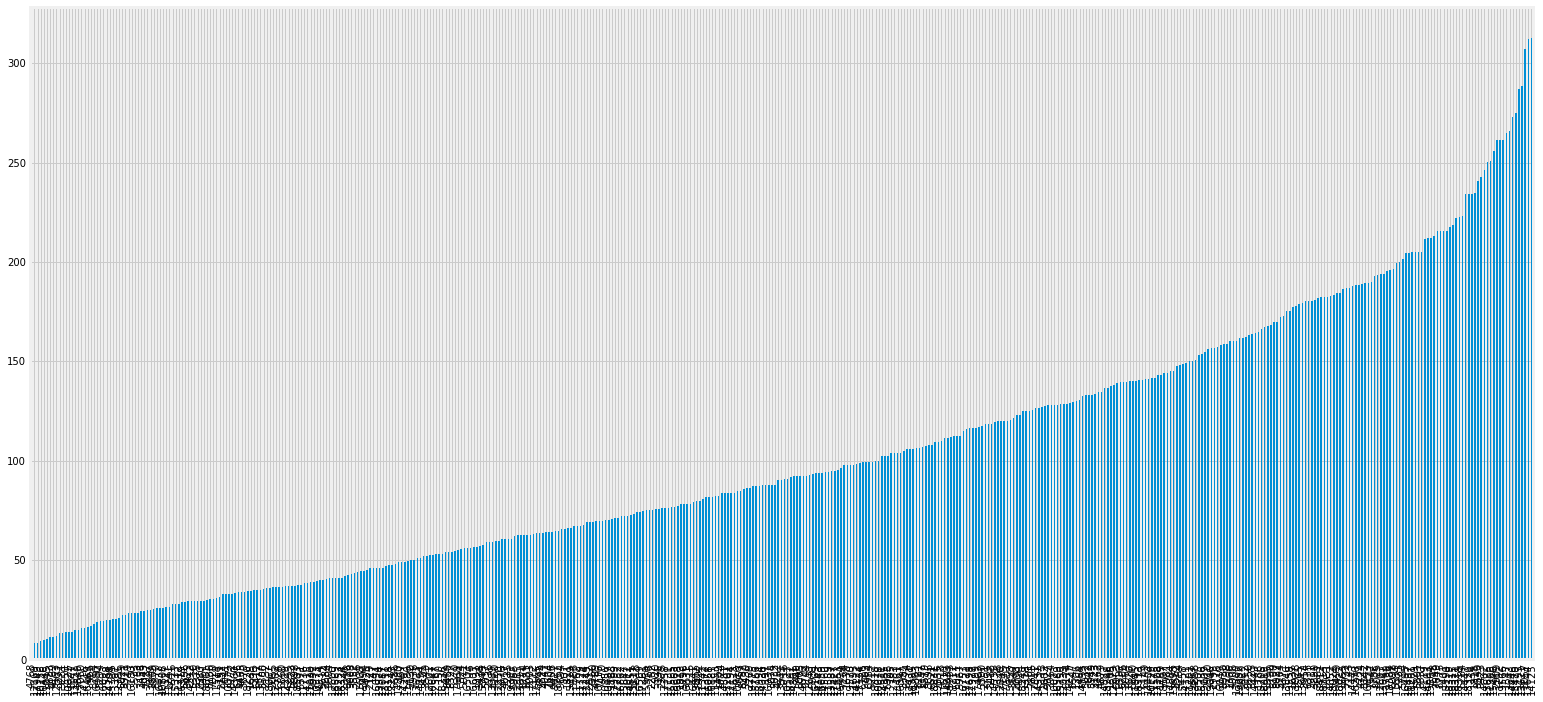

In [198]:
data[data['action']]['budget_adj'].apply(lambda x: x / 1000000).sort_values(ascending=True).plot(kind='bar', figsize=(24,12))

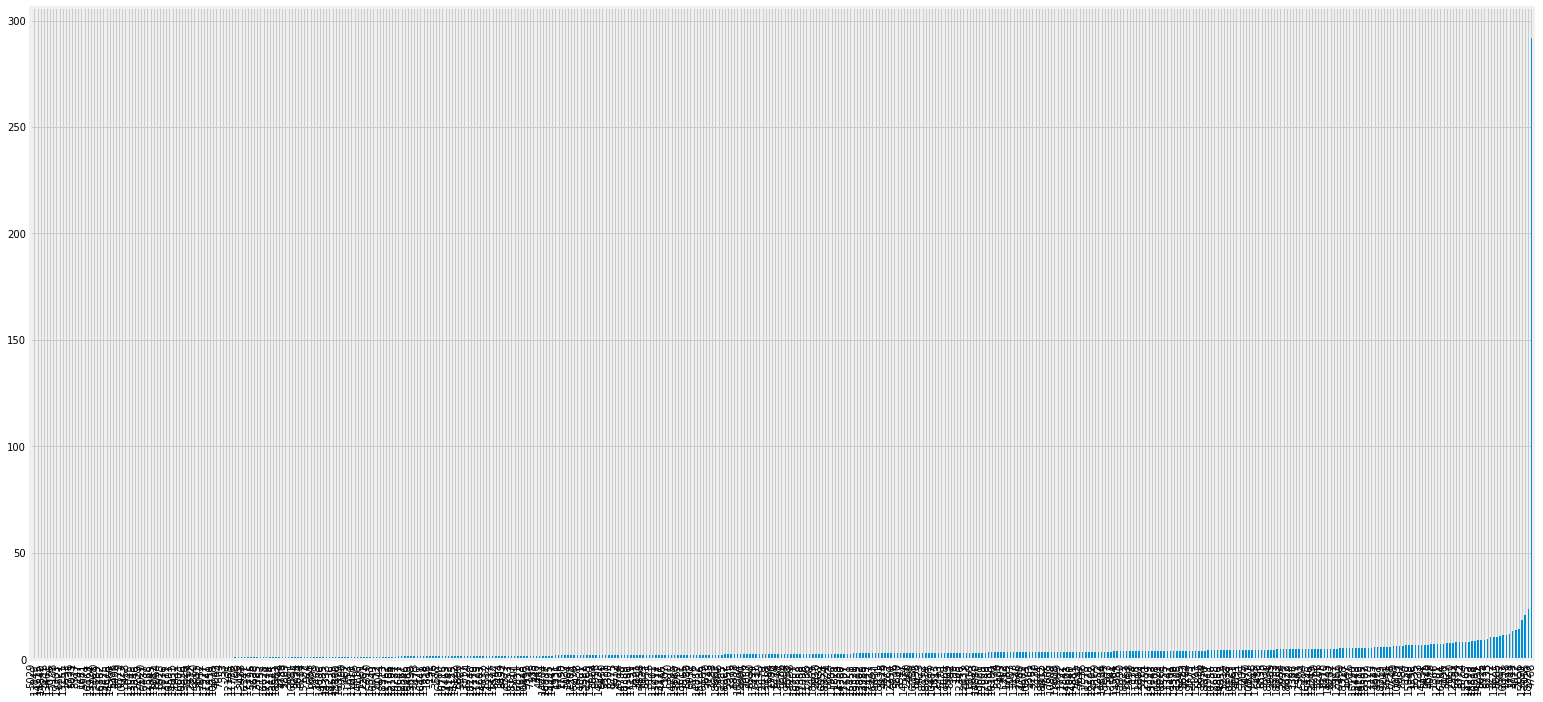

In [201]:
data[data['action']]['gross_budget_ratio'].sort_values(ascending=True).plot(kind='bar', figsize=(24,12))

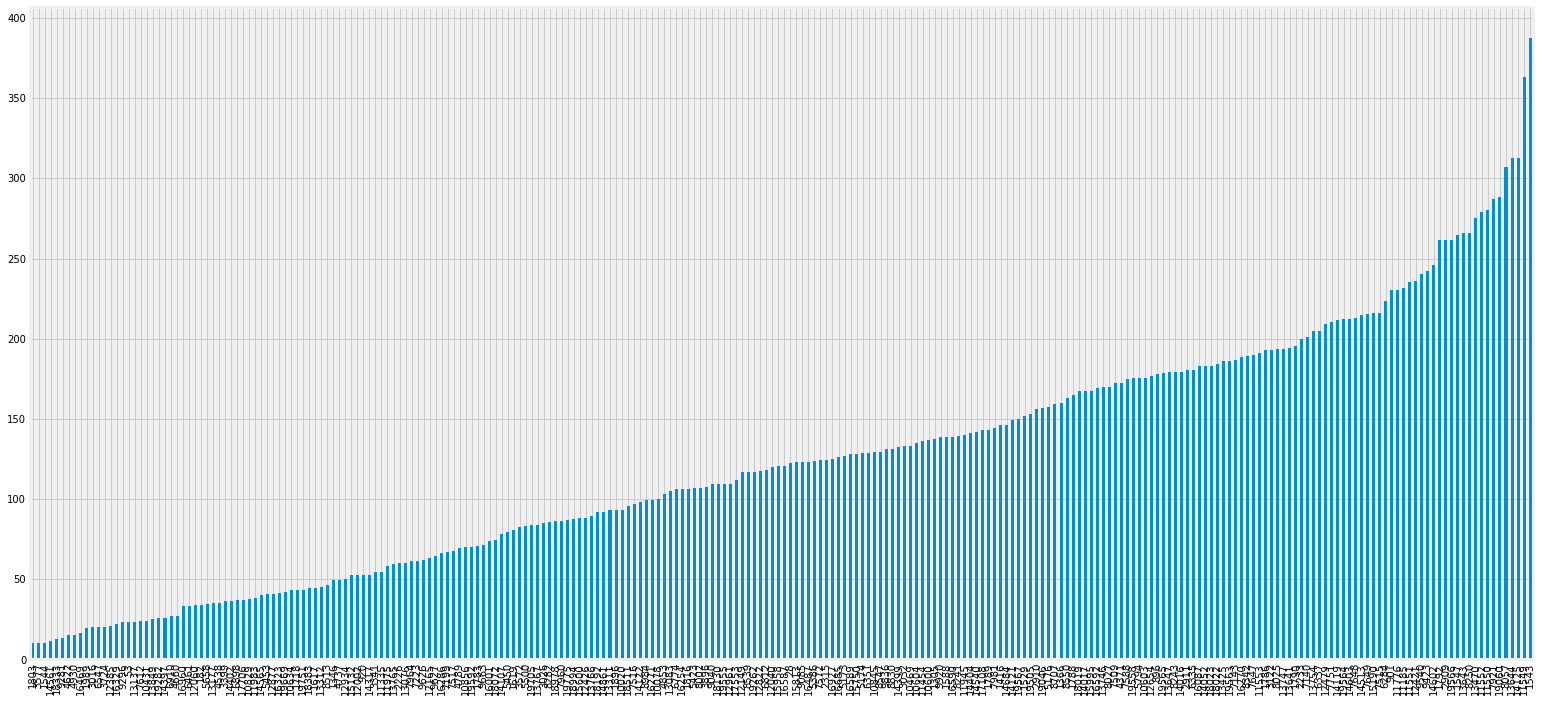

In [199]:
data[data['adventure']]['budget_adj'].apply(lambda x: x / 1000000).sort_values(ascending=True).plot(kind='bar', figsize=(24,12))

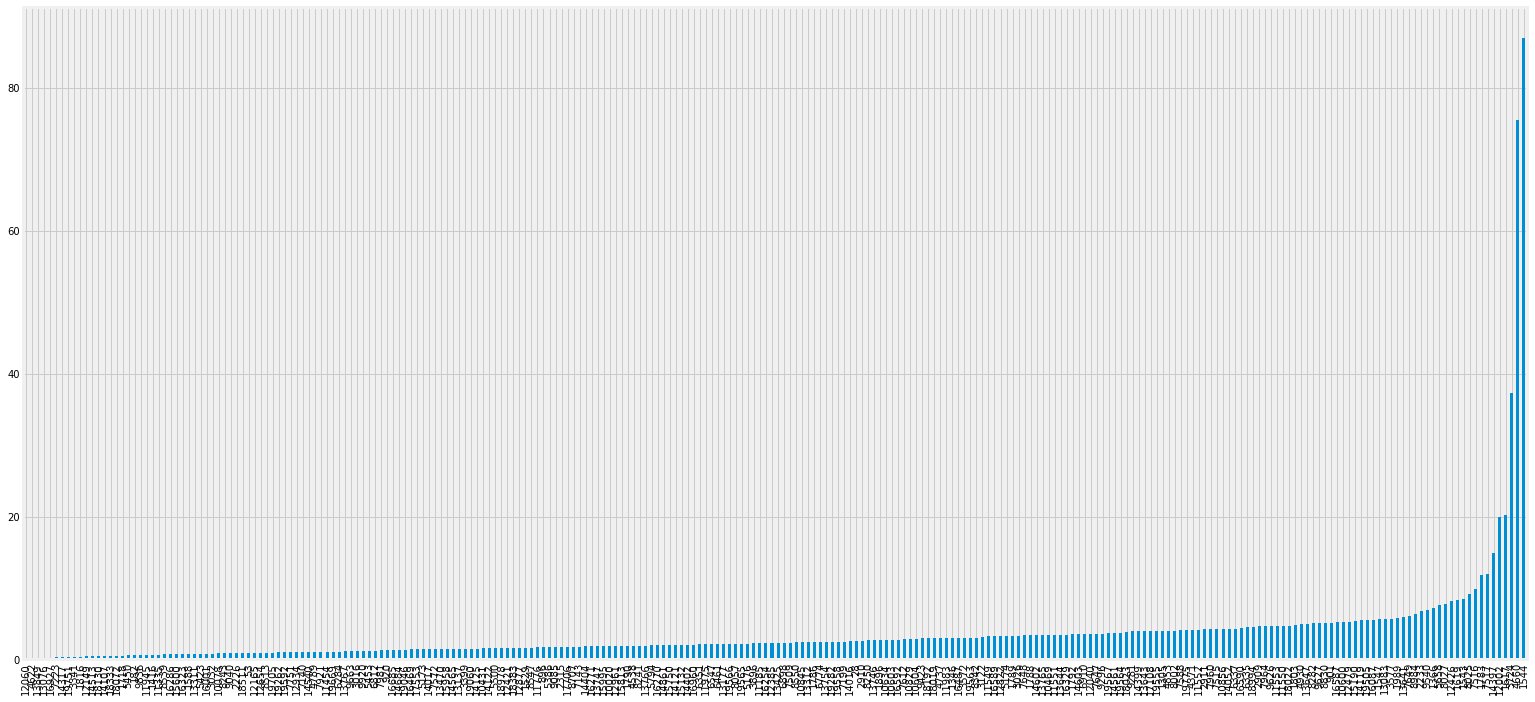

In [204]:
data[data['adventure']]['gross_budget_ratio'].sort_values(ascending=True).plot(kind='bar', figsize=(24,12))

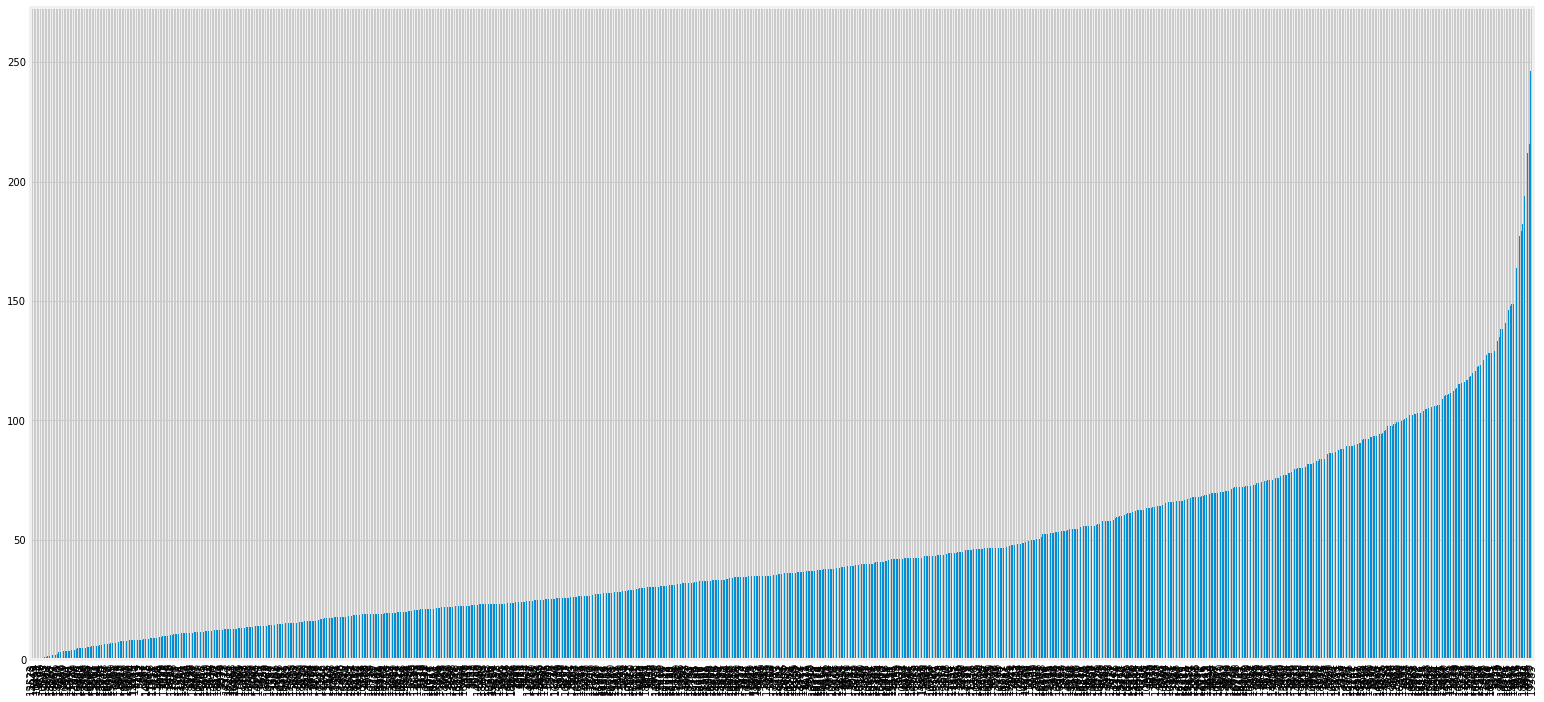

In [200]:
data[data['comedy']]['budget_adj'].apply(lambda x: x / 1000000).sort_values(ascending=True).plot(kind='bar', figsize=(24,12))

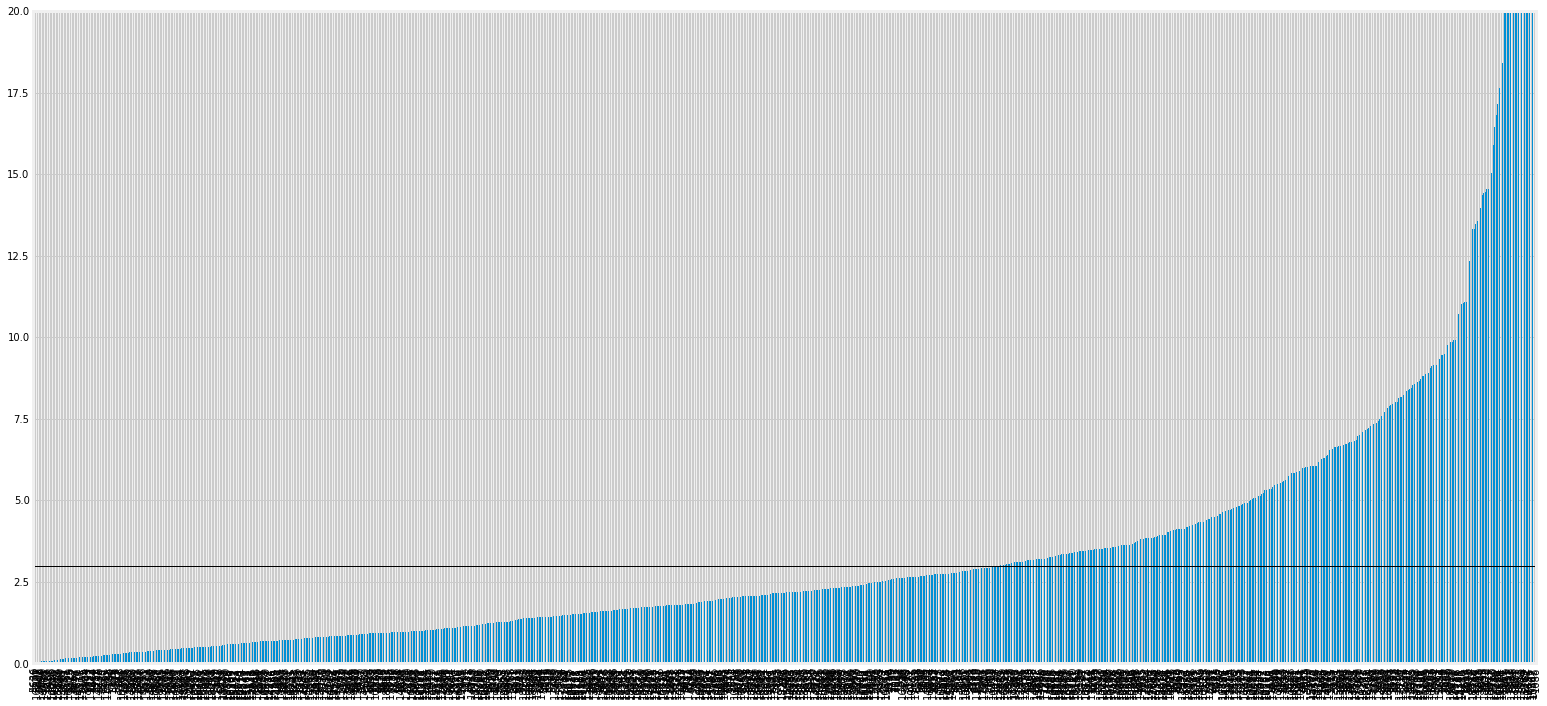

In [207]:
figure, axis = plt.subplots(1, 1, figsize=(24,12))

data[data['comedy']]['gross_budget_ratio'].sort_values(ascending=True).plot(kind='bar', ax=axis, ylim=(0, 20))
axis.axhline(3, color='black', linewidth=1)

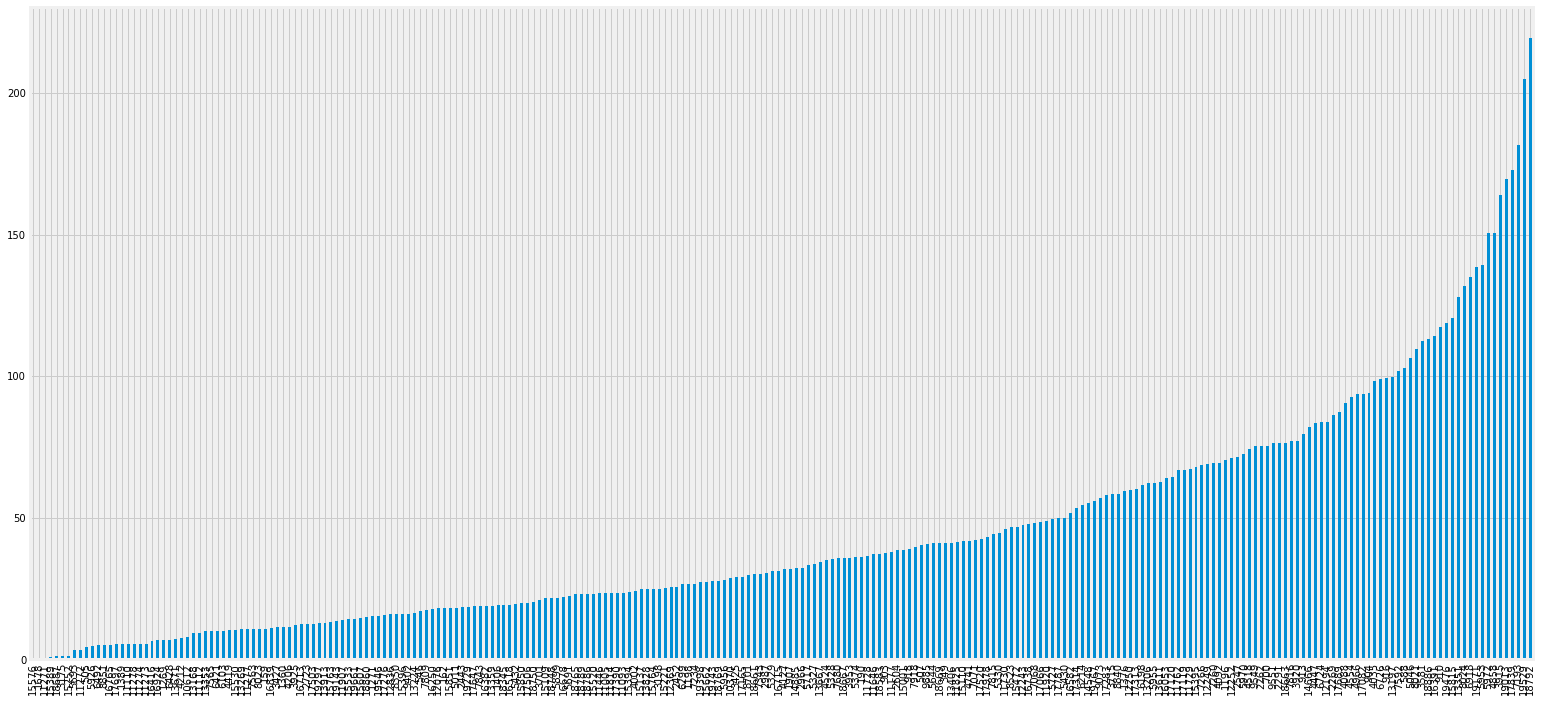

In [208]:
data[data['horror']]['budget_adj'].apply(lambda x: x / 1000000).sort_values(ascending=True).plot(kind='bar', figsize=(24,12))

### Quick Takeaways

**Current Decade**
  - We are on an uptick in the probability that a movie will breakeven, regardless of genre
  - One explanation could be that since fewer movies are released overall, there's less competition at the theaters. If the same number of consumer dollars chase fewer movies, then more movies will be profitable. 
  - Another explanation is the rise in foreign box office dollars making otherwise unprofitable movies winners.

## Summary

  - Action and Adventure are currently performing better than they have historically regardless of release week.
  - Horror, Adventure, and Thriller/Suspense have been released on the fewest weeks this decade.
  - Budgets have risen this decade for Action and Adventure, whereas they have dropped for Horror and Thriller/Suspense.
  - All genres have their highest breakeven percentage this decade since the 1990s.
  - From a median profitability standpoint, Action and Adventure have improved the most since the 2000s.

# Conclusions, Conclusions, Conclusions

Our bosses want us to wrap this up at some point, so here we go...

Dear, sweet bosses, 

Can you give us data on ancillary revenue streams of these movies like DVD/Blu-ray, TV Airings, and Streaming?

You can't?

You can't, or you won't?

Aha, I knew it! 

So please take these conclusions with a large grain of salt. So large it might be called a heap of salt. Or a salt mountain, if you please.

## Summing Up

**Safest**
  - I would classify no genre as safe. All genres historically have negative median profit. 
  - Just looking at this decade, three genres have positive median profit: Horror (11.6 million dollars), Adventure (5.2 million dollars), and Action (2.9 million dollars).
  - With a very low median production budget (17 million dollars) and the highest chance of breaking even this decade (62%), Horror seems like the safest genre to invest in.
  - Note that historically Horror is one of the least produced genres, and yet has had the third highest median worldwide gross since the 2000s. In this decade, the top three highest median grossers are Adventure (419 million dollars), Action (324 million dollars), then Horror (110 million dollars).
  - It doesn't seem like the Horror market is oversaturated. It has followed the same trajectory in terms of number of movies produced as any other genre. Perhaps studios intentionally limit their Horror exposure. For example, if people associate a studio with Horror movies, they might be less inclined to see its other movies due to Horror's reputation as a low quality product (bad writing, bad acting, low budget, bad visuals).

**Highest potential return per movie**
  - If our boses want to maximize their return per movie, then either Action or Adventure are the best. They carry with them much higher production budgets, but also gross higher amounts than all other genres.

**Most calendar-friendly**
  - Comedy and Drama are the least affected by release week. If we want maximum flexibility there (for example, to avoid opening the same weekend as another big movie and thus incurring higher marketing costs), we can plug and play one of these genres into almost any week.
  
**Recent box office trends**
  - In the past decade, the most consistent genre in terms of median profit per movie is Horror, followed by Adventure, then Action. If we want to follow trends, these genres have been outperforming the others.


## Final Recommendations

### If we don't mind being associated with Horror movies

Then Horror, Horror, Horror.

There's a pretty good reason [Blumhouse](https://en.wikipedia.org/wiki/Blumhouse_Productions) is doing so well. It makes high quality movies that are inexpensive to produce. It's basically impossible to do that with Action or Adventure movies, but it can be done with Horror. Other studios could mimic Blumhouse's business model with the least expensive genres.

**Median Budgets This Decade**
  - Horror: &#0036;17 million
  - Drama: &#0036;22 million
  - Comedy: &#0036;32 million
  - Thriller/Suspense: &#0036;35 million
  - Action: &#0036;115 million
  - Adventure: &#0036;172 million
  
How many movies could we make for the same price as a typical Action or Adventure movie (not including marketing costs)?

**Number of movies per one Action movie**
  - Horror: 6.8 movies
  - Drama: 5.2 movies
  - Comedy: 3.6 movies
  - Thriller/Suspense: 3.3 movies

**Number of movies per one Adventure movie**  
  - Horror:            10.1
  - Drama:             7.8 movies
  - Comedy:            5.4 movies
  - Thriller/Suspense: 4.9 movies
  
Then what's the problem? Why can't we make these low to mid budget movies at a fraction of the cost and make money on them?

**The Streaming Problem**
  - It's entirely possible that Horror is the only inexpensive genre that audiences will still go to theaters for.
  - Many Drama, Comedy, and Thriller/Suspense movies that historically would have had a theatrical release are instead headed directly to streaming platforms like Netflix.
  - It might be that the concept and execution have to be much higher in these other genres than they do for Horror. After all, audiences seem willing to support a level of shlockiness in Horror movies that they won't in other genres. 
  - The financial upside may not be high enough to produce the other genres theatrically.
  
**Median Grosses This Decade**
  - Drama: &#0036;54 million
  - Comedy: &#0036;87 million
  - Thriller/Suspense: &#0036;99 million
  - Horror: &#0036;110 million
  - Action: &#0036;324 million
  - Adventure: &#0036;419 million
 
Currently, Drama, Comedy, and Thriller/Suspense might be too expensive theatrically but cheap enough for streaming. Even though they have much smaller budgets, the amount of marketing dollars to wide release a movie is substantial if you aren't great at viral marketing campaigns. Blumhose is particularly good at getting the most for their marketing dollar.

Studios may be shifting a lot of low budget fare to streaming platforms, where they get predetermined fees for their content and save big on marketing dollars. 

### If we don't want anything to do with Horror movies

The writing seems to be on the wall. Action and Adventure are the only other genres that are doing well this decade. They tend to travel well, which means the explosion in the foreign box office market bodes well for them. 

They are the most expensive genres to produce and market, but they are the big winners in terms of box office dollars.

## Parting Thoughts and Next Steps

Our dataset only includes revenue that movies generate from ticket sales, but that is only a slice of the movie revenue pie.

Stephen Follows has a [great article](https://stephenfollows.com/how-movies-make-money-hollywood-blockbusters/) detailing the revenue stream of movies nowadays. The following image comes from his article.

![Movie Revenue Stream](movie_money_chart.png)

To summarize, the release windows are:
  - Theatrical - movie theaters
  - Airlines and Hospitality - airplanes and hotels
  - Home Entertainment - purchase and rental of DVDs and Blu-ray
  - Video on Demand - these include several types
    - Transactional (TVOD) - purchase and rental of electronic copies from iTunes, Amazon, Google Play, etc.
    - Subscription (SVOD) - Netflix, HBO Now, YouTube TV, Amazon Video, Hulu Plus, etc.
    - Ad-funded (AVOD) - Hulu, Vudu, YouTube, etc.
  - Television - various forms
    - Pay TV (premium channels like HBO, Starz, Epix)
    - Free-to-air/Broadcast channels like BBC One, ABC, NBC, CBS, Fox, etc.
    - Syndication on digital channels like AMC, FX, TMC, TNT, etc.
  - Merchandising - products consumers buy like toys, games, clothes, etc.
  - Product Placement - charging brands to feature products in movies
  
Many of these later release windows gain higher license fees if a movie is successful at the box office, making the theatrical window very important. On the other hand, theatrical isn't the only moneymaker, and movies can make up for lackluster box office with future revenue streams.

Here are some next steps to spruce up our analyis: 
  - Getting access to data from other release windows to get the full financial scope of each movie
  - Dive deeper into analyzing movies by budget size (for example, analyzing subgenres by budget size)
  - Analyzing movies based on distributor
  - Analyzing movies based on key talent (such as actors, directors, etc.)
  - Instead of looking at profit, using a metric like the ratio of worldwide gross to budget to eliminate dealing with sums involving negative numbers
  
We have only scratched the surface in our analysis here, but our results provide very actionable insight. Genres that travel well (Action and Adventure) are earning the most these days, and Horror, due to its low cost and consistently good box office results, is a great genre to invest in.